In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random
import scipy

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import dm_search


lc_i = likelihood_analyser.LikelihoodAnalyser()
DManalyzer = dm_search.DMAnalyser()

### 10 sec. data

In [86]:
fnames = [r'/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_X/Discharge_{}.h5'.format(i) for i in range(200)]
DManalyzer.BDFs = [BeadDataFile.BeadDataFile(fname_) for fname_ in fnames]

OSError: Unable to open file (unable to open file: name = '/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_X5/Discharge_0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
DManalyzer.estimate_noise()  # estimate noise of x2 and x3

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  5.9774125066765444
x3 noise rms:  1.3947830355802813


<IPython.core.display.Javascript object>


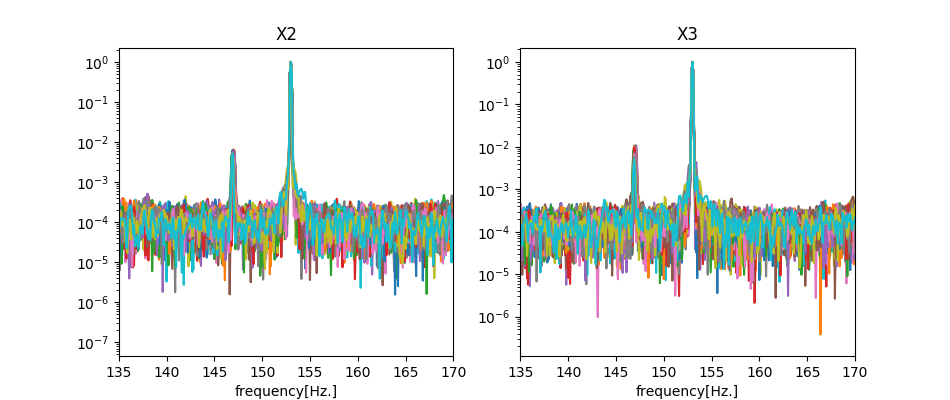

[(135, 170), Text(0.5, 0, 'frequency[Hz.]'), Text(0.5, 1.0, 'X3')]

In [7]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
for bb in DManalyzer.BDFs[::5]:
    fft2, freq2 = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft2 /= fft2[freq2==153]
    ax[0].semilogy(freq2, np.sqrt(fft2))
    
    fft3, freq3 = matplotlib.mlab.psd(bb.x3,Fs=5000, detrend='linear', NFFT=50000)
    fft3 /= fft3[freq3==153]
    ax[1].semilogy(freq3, np.sqrt(fft3))
ax[0].set(xlim=(135,170), xlabel='frequency[Hz.]', title='X2')
ax[1].set(xlim=(135,170), xlabel='frequency[Hz.]', title='X3')

In [8]:
DManalyzer.get_delta_alpha(bdf_i=10, alpha_frequency=1, frequency=153)

***************************************************
bdf_i:  10 , AM frequency:  1
sensitivity:  9.74e-05


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(9.738209999800885e-05, <iminuit._libiminuit.Minuit at 0x79c09578>)

In [9]:
DManalyzer.estimate_noise()  # estimate noise of x2 and x3
limit_1Hz = DManalyzer.get_sensitivity(alpha_frequency=1, bandwidth=10, frequency=153)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  5.9774125066765444
x3 noise rms:  1.3947830355802813
***************************************************
bdf_i:  0 , AM frequency:  1
sensitivity:  2.82e-04
***************************************************
bdf_i:  1 , AM frequency:  1
sensitivity:  1.01e-04
***************************************************
bdf_i:  2 , AM frequency:  1
sensitivity:  4.43e-04
***************************************************
bdf_i:  3 , AM frequency:  1
sensitivity:  3.05e-04
***************************************************
bdf_i:  4 , AM frequency:  1
sensitivity:  2.30e-04
***************************************************
bdf_i:  5 , AM frequency:  1
sensitivity:  2.48e-04
***************************************************
bdf_i:  6 , AM frequency:  1
sensitivity:  1.28e-04
***************************************************
bdf_i:  7 , AM frequency:  1
sensitivity:  1.63e-04
***************************************************
bdf_i:  8 , AM frequency:  1
sensitivity:  1.79e

***************************************************
bdf_i:  90 , AM frequency:  1
sensitivity:  9.66e-04
***************************************************
bdf_i:  91 , AM frequency:  1
sensitivity:  1.70e-03
***************************************************
bdf_i:  92 , AM frequency:  1
sensitivity:  6.11e-04
***************************************************
bdf_i:  93 , AM frequency:  1
sensitivity:  6.22e-04
***************************************************
bdf_i:  94 , AM frequency:  1
sensitivity:  6.86e-04
***************************************************
bdf_i:  95 , AM frequency:  1
sensitivity:  8.17e-04
***************************************************
bdf_i:  96 , AM frequency:  1
sensitivity:  3.79e-04
***************************************************
bdf_i:  97 , AM frequency:  1
sensitivity:  2.19e-05
***************************************************
bdf_i:  98 , AM frequency:  1
sensitivity:  1.06e-05
***************************************************
bdf

***************************************************
bdf_i:  170 , AM frequency:  1
sensitivity:  1.08e-04
***************************************************
bdf_i:  171 , AM frequency:  1
sensitivity:  4.49e-04
***************************************************
bdf_i:  172 , AM frequency:  1
sensitivity:  3.38e-05
***************************************************
bdf_i:  173 , AM frequency:  1
sensitivity:  4.71e-04
***************************************************
bdf_i:  174 , AM frequency:  1
sensitivity:  2.26e-04
***************************************************
bdf_i:  175 , AM frequency:  1
sensitivity:  2.48e-04
***************************************************
bdf_i:  176 , AM frequency:  1
sensitivity:  1.69e-04
***************************************************
bdf_i:  177 , AM frequency:  1
sensitivity:  1.02e-04
***************************************************
bdf_i:  178 , AM frequency:  1
sensitivity:  2.65e-04
**********************************************

In [10]:
resp_x3 = np.array([np.std(bb.response_at_freq3('x',drive_freq=153)/6) for bb in DManalyzer.BDFs])

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


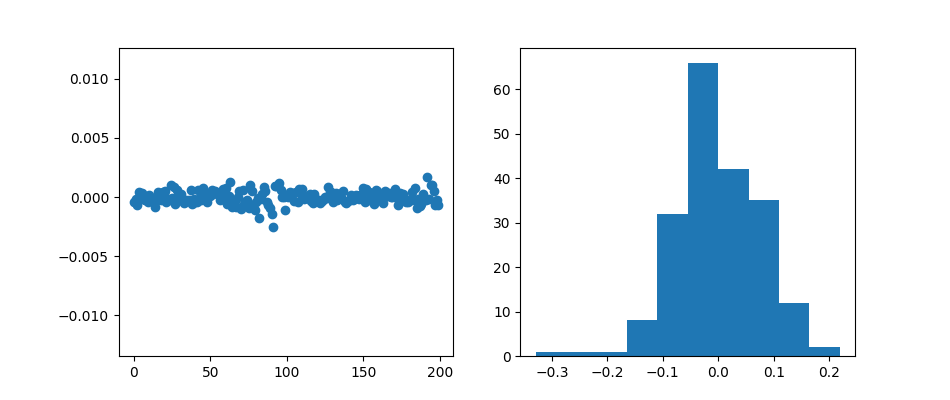

(array([ 1.,  1.,  1.,  8., 32., 66., 42., 35., 12.,  2.]),
 array([-3.29542908e-01, -2.74664481e-01, -2.19786055e-01, -1.64907628e-01,
        -1.10029201e-01, -5.51507739e-02, -2.72347052e-04,  5.46060798e-02,
         1.09484507e-01,  1.64362934e-01,  2.19241360e-01]),
 <a list of 10 Patch objects>)

In [11]:
A = [res_.values[0] for res_ in DManalyzer.minimizer_2d_results]
Phi = [res_.values[4] for res_ in DManalyzer.minimizer_2d_results]
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(A)),A/resp_x3)
ax[1].hist(A)

In [12]:
alphas_freq = np.logspace(-4, 0.7, 100)
limit = [DManalyzer.get_sensitivity(alpha_frequency=freq) for freq in alphas_freq]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
bdf_i:  0 , AM frequency:  0.0001
sensitivity:  2.73e-02
***************************************************
bdf_i:  1 , AM frequency:  0.0001
sensitivity:  8.93e-02
***************************************************
bdf_i:  2 , AM frequency:  0.0001
sensitivity:  4.42e-01
***************************************************
bdf_i:  3 , AM frequency:  0.0001
sensitivity:  5.14e-02
***************************************************
bdf_i:  4 , AM frequency:  0.0001
sensitivity:  4.36e-01
***************************************************
bdf_i:  5 , AM frequency:  0.0001
sensitivity:  2.41e-01
***************************************************
bdf_i:  6 , AM frequency:  0.0001
sensitivity:  4.25e-01
***************************************************
bdf_i:  7 , AM frequency:  0.0001
sensitivity:  2.50e-01
***************************************************
bdf_i:  8 , AM frequency:  0.0001
sensitivity:  4.57e-02
*******************

***************************************************
bdf_i:  84 , AM frequency:  0.0001
sensitivity:  3.88e-02
***************************************************
bdf_i:  85 , AM frequency:  0.0001
sensitivity:  5.17e-01
***************************************************
bdf_i:  86 , AM frequency:  0.0001
sensitivity:  1.92e-01
***************************************************
bdf_i:  87 , AM frequency:  0.0001
sensitivity:  5.17e-01
***************************************************
bdf_i:  88 , AM frequency:  0.0001
sensitivity:  5.15e-01
***************************************************
bdf_i:  89 , AM frequency:  0.0001
sensitivity:  5.12e-01
***************************************************
bdf_i:  90 , AM frequency:  0.0001
sensitivity:  4.26e-01
***************************************************
bdf_i:  91 , AM frequency:  0.0001
sensitivity:  3.62e-01
***************************************************
bdf_i:  92 , AM frequency:  0.0001
sensitivity:  3.98e-01
**********

***************************************************
bdf_i:  165 , AM frequency:  0.0001
sensitivity:  2.64e-06
***************************************************
bdf_i:  166 , AM frequency:  0.0001
sensitivity:  8.27e-02
***************************************************
bdf_i:  167 , AM frequency:  0.0001
sensitivity:  1.36e-01
***************************************************
bdf_i:  168 , AM frequency:  0.0001
sensitivity:  1.46e-02
***************************************************
bdf_i:  169 , AM frequency:  0.0001
sensitivity:  8.40e-06
***************************************************
bdf_i:  170 , AM frequency:  0.0001
sensitivity:  1.30e-01
***************************************************
bdf_i:  171 , AM frequency:  0.0001
sensitivity:  4.84e-01
***************************************************
bdf_i:  172 , AM frequency:  0.0001
sensitivity:  3.31e-06
***************************************************
bdf_i:  173 , AM frequency:  0.0001
sensitivity:  7.66e-03
*

***************************************************
bdf_i:  34 , AM frequency:  0.00011155132867310928
sensitivity:  4.67e-01
***************************************************
bdf_i:  35 , AM frequency:  0.00011155132867310928
sensitivity:  1.51e-01
***************************************************
bdf_i:  36 , AM frequency:  0.00011155132867310928
sensitivity:  6.18e-02
***************************************************
bdf_i:  37 , AM frequency:  0.00011155132867310928
sensitivity:  4.82e-01
***************************************************
bdf_i:  38 , AM frequency:  0.00011155132867310928
sensitivity:  2.36e-01
***************************************************
bdf_i:  39 , AM frequency:  0.00011155132867310928
sensitivity:  8.81e-02
***************************************************
bdf_i:  40 , AM frequency:  0.00011155132867310928
sensitivity:  3.65e-01
***************************************************
bdf_i:  41 , AM frequency:  0.00011155132867310928
sensitivity:  1

***************************************************
bdf_i:  103 , AM frequency:  0.00011155132867310928
sensitivity:  1.86e-01
***************************************************
bdf_i:  104 , AM frequency:  0.00011155132867310928
sensitivity:  4.74e-01
***************************************************
bdf_i:  105 , AM frequency:  0.00011155132867310928
sensitivity:  4.73e-01
***************************************************
bdf_i:  106 , AM frequency:  0.00011155132867310928
sensitivity:  1.13e-01
***************************************************
bdf_i:  107 , AM frequency:  0.00011155132867310928
sensitivity:  6.51e-06
***************************************************
bdf_i:  108 , AM frequency:  0.00011155132867310928
sensitivity:  2.18e-01
***************************************************
bdf_i:  109 , AM frequency:  0.00011155132867310928
sensitivity:  2.31e-01
***************************************************
bdf_i:  110 , AM frequency:  0.00011155132867310928
sensiti

***************************************************
bdf_i:  180 , AM frequency:  0.00011155132867310928
sensitivity:  4.29e-02
***************************************************
bdf_i:  181 , AM frequency:  0.00011155132867310928
sensitivity:  4.91e-01
***************************************************
bdf_i:  182 , AM frequency:  0.00011155132867310928
sensitivity:  4.97e-01
***************************************************
bdf_i:  183 , AM frequency:  0.00011155132867310928
sensitivity:  1.45e-01
***************************************************
bdf_i:  184 , AM frequency:  0.00011155132867310928
sensitivity:  4.11e-01
***************************************************
bdf_i:  185 , AM frequency:  0.00011155132867310928
sensitivity:  5.05e-01
***************************************************
bdf_i:  186 , AM frequency:  0.00011155132867310928
sensitivity:  4.66e-02
***************************************************
bdf_i:  187 , AM frequency:  0.00011155132867310928
sensiti

***************************************************
bdf_i:  52 , AM frequency:  0.0001244369892873604
sensitivity:  2.56e-01
***************************************************
bdf_i:  53 , AM frequency:  0.0001244369892873604
sensitivity:  8.95e-02
***************************************************
bdf_i:  54 , AM frequency:  0.0001244369892873604
sensitivity:  1.61e-02
***************************************************
bdf_i:  55 , AM frequency:  0.0001244369892873604
sensitivity:  3.64e-02
***************************************************
bdf_i:  56 , AM frequency:  0.0001244369892873604
sensitivity:  5.03e-01
***************************************************
bdf_i:  57 , AM frequency:  0.0001244369892873604
sensitivity:  4.39e-02
***************************************************
bdf_i:  58 , AM frequency:  0.0001244369892873604
sensitivity:  2.99e-06
***************************************************
bdf_i:  59 , AM frequency:  0.0001244369892873604
sensitivity:  1.21e-01


***************************************************
bdf_i:  121 , AM frequency:  0.0001244369892873604
sensitivity:  1.61e-01
***************************************************
bdf_i:  122 , AM frequency:  0.0001244369892873604
sensitivity:  2.25e-01
***************************************************
bdf_i:  123 , AM frequency:  0.0001244369892873604
sensitivity:  2.01e-01
***************************************************
bdf_i:  124 , AM frequency:  0.0001244369892873604
sensitivity:  5.84e-02
***************************************************
bdf_i:  125 , AM frequency:  0.0001244369892873604
sensitivity:  4.42e-01
***************************************************
bdf_i:  126 , AM frequency:  0.0001244369892873604
sensitivity:  1.24e-01
***************************************************
bdf_i:  127 , AM frequency:  0.0001244369892873604
sensitivity:  2.73e-01
***************************************************
bdf_i:  128 , AM frequency:  0.0001244369892873604
sensitivity:  2

***************************************************
bdf_i:  195 , AM frequency:  0.0001244369892873604
sensitivity:  2.23e-01
***************************************************
bdf_i:  196 , AM frequency:  0.0001244369892873604
sensitivity:  1.79e-01
***************************************************
bdf_i:  197 , AM frequency:  0.0001244369892873604
sensitivity:  1.26e-05
***************************************************
bdf_i:  198 , AM frequency:  0.0001244369892873604
sensitivity:  3.81e-03
***************************************************
bdf_i:  199 , AM frequency:  0.0001244369892873604
sensitivity:  6.61e-06
***************************************************
average:  0.19443172157460037 std:  0.17261617418850242
standard error:  0.012205806731116835
***************************************************
bdf_i:  0 , AM frequency:  0.00013881111491086522
sensitivity:  7.87e-02
***************************************************
bdf_i:  1 , AM frequency:  0.000138811114910865

***************************************************
bdf_i:  59 , AM frequency:  0.00013881111491086522
sensitivity:  1.08e-01
***************************************************
bdf_i:  60 , AM frequency:  0.00013881111491086522
sensitivity:  3.27e-01
***************************************************
bdf_i:  61 , AM frequency:  0.00013881111491086522
sensitivity:  3.83e-06
***************************************************
bdf_i:  62 , AM frequency:  0.00013881111491086522
sensitivity:  5.95e-06
***************************************************
bdf_i:  63 , AM frequency:  0.00013881111491086522
sensitivity:  5.16e-01
***************************************************
bdf_i:  64 , AM frequency:  0.00013881111491086522
sensitivity:  2.76e-02
***************************************************
bdf_i:  65 , AM frequency:  0.00013881111491086522
sensitivity:  1.25e-02
***************************************************
bdf_i:  66 , AM frequency:  0.00013881111491086522
sensitivity:  1

***************************************************
bdf_i:  129 , AM frequency:  0.00013881111491086522
sensitivity:  4.56e-01
***************************************************
bdf_i:  130 , AM frequency:  0.00013881111491086522
sensitivity:  1.47e-01
***************************************************
bdf_i:  131 , AM frequency:  0.00013881111491086522
sensitivity:  2.44e-01
***************************************************
bdf_i:  132 , AM frequency:  0.00013881111491086522
sensitivity:  4.49e-01
***************************************************
bdf_i:  133 , AM frequency:  0.00013881111491086522
sensitivity:  2.23e-01
***************************************************
bdf_i:  134 , AM frequency:  0.00013881111491086522
sensitivity:  3.98e-02
***************************************************
bdf_i:  135 , AM frequency:  0.00013881111491086522
sensitivity:  1.00e-01
***************************************************
bdf_i:  136 , AM frequency:  0.00013881111491086522
sensiti

***************************************************
bdf_i:  4 , AM frequency:  0.00015484564302902648
sensitivity:  9.39e-02
***************************************************
bdf_i:  5 , AM frequency:  0.00015484564302902648
sensitivity:  1.56e-01
***************************************************
bdf_i:  6 , AM frequency:  0.00015484564302902648
sensitivity:  7.91e-02
***************************************************
bdf_i:  7 , AM frequency:  0.00015484564302902648
sensitivity:  1.61e-01
***************************************************
bdf_i:  8 , AM frequency:  0.00015484564302902648
sensitivity:  2.95e-02
***************************************************
bdf_i:  9 , AM frequency:  0.00015484564302902648
sensitivity:  6.19e-02
***************************************************
bdf_i:  10 , AM frequency:  0.00015484564302902648
sensitivity:  2.75e-02
***************************************************
bdf_i:  11 , AM frequency:  0.00015484564302902648
sensitivity:  1.81e-0

***************************************************
bdf_i:  76 , AM frequency:  0.00015484564302902648
sensitivity:  5.22e-01
***************************************************
bdf_i:  77 , AM frequency:  0.00015484564302902648
sensitivity:  1.04e-02
***************************************************
bdf_i:  78 , AM frequency:  0.00015484564302902648
sensitivity:  2.81e-02
***************************************************
bdf_i:  79 , AM frequency:  0.00015484564302902648
sensitivity:  1.63e-01
***************************************************
bdf_i:  80 , AM frequency:  0.00015484564302902648
sensitivity:  3.01e-01
***************************************************
bdf_i:  81 , AM frequency:  0.00015484564302902648
sensitivity:  1.29e-05
***************************************************
bdf_i:  82 , AM frequency:  0.00015484564302902648
sensitivity:  1.60e-01
***************************************************
bdf_i:  83 , AM frequency:  0.00015484564302902648
sensitivity:  1

***************************************************
bdf_i:  151 , AM frequency:  0.00015484564302902648
sensitivity:  1.14e-01
***************************************************
bdf_i:  152 , AM frequency:  0.00015484564302902648
sensitivity:  2.60e-01
***************************************************
bdf_i:  153 , AM frequency:  0.00015484564302902648
sensitivity:  9.56e-02
***************************************************
bdf_i:  154 , AM frequency:  0.00015484564302902648
sensitivity:  5.58e-02
***************************************************
bdf_i:  155 , AM frequency:  0.00015484564302902648
sensitivity:  5.82e-02
***************************************************
bdf_i:  156 , AM frequency:  0.00015484564302902648
sensitivity:  3.07e-06
***************************************************
bdf_i:  157 , AM frequency:  0.00015484564302902648
sensitivity:  4.13e-01
***************************************************
bdf_i:  158 , AM frequency:  0.00015484564302902648
sensiti

***************************************************
bdf_i:  22 , AM frequency:  0.00017273237219129887
sensitivity:  5.09e-06
***************************************************
bdf_i:  23 , AM frequency:  0.00017273237219129887
sensitivity:  2.12e-02
***************************************************
bdf_i:  24 , AM frequency:  0.00017273237219129887
sensitivity:  2.56e-01
***************************************************
bdf_i:  25 , AM frequency:  0.00017273237219129887
sensitivity:  1.48e-05
***************************************************
bdf_i:  26 , AM frequency:  0.00017273237219129887
sensitivity:  4.06e-01
***************************************************
bdf_i:  27 , AM frequency:  0.00017273237219129887
sensitivity:  1.58e-01
***************************************************
bdf_i:  28 , AM frequency:  0.00017273237219129887
sensitivity:  3.39e-01
***************************************************
bdf_i:  29 , AM frequency:  0.00017273237219129887
sensitivity:  1

***************************************************
bdf_i:  90 , AM frequency:  0.00017273237219129887
sensitivity:  5.14e-01
***************************************************
bdf_i:  91 , AM frequency:  0.00017273237219129887
sensitivity:  2.09e-01
***************************************************
bdf_i:  92 , AM frequency:  0.00017273237219129887
sensitivity:  2.30e-01
***************************************************
bdf_i:  93 , AM frequency:  0.00017273237219129887
sensitivity:  6.95e-06
***************************************************
bdf_i:  94 , AM frequency:  0.00017273237219129887
sensitivity:  2.51e-01
***************************************************
bdf_i:  95 , AM frequency:  0.00017273237219129887
sensitivity:  1.40e-05
***************************************************
bdf_i:  96 , AM frequency:  0.00017273237219129887
sensitivity:  2.12e-01
***************************************************
bdf_i:  97 , AM frequency:  0.00017273237219129887
sensitivity:  2

***************************************************
bdf_i:  160 , AM frequency:  0.00017273237219129887
sensitivity:  3.76e-01
***************************************************
bdf_i:  161 , AM frequency:  0.00017273237219129887
sensitivity:  1.03e-01
***************************************************
bdf_i:  162 , AM frequency:  0.00017273237219129887
sensitivity:  4.69e-01
***************************************************
bdf_i:  163 , AM frequency:  0.00017273237219129887
sensitivity:  1.81e-01
***************************************************
bdf_i:  164 , AM frequency:  0.00017273237219129887
sensitivity:  3.80e-05
***************************************************
bdf_i:  165 , AM frequency:  0.00017273237219129887
sensitivity:  3.30e-06
***************************************************
bdf_i:  166 , AM frequency:  0.00017273237219129887
sensitivity:  4.79e-02
***************************************************
bdf_i:  167 , AM frequency:  0.00017273237219129887
sensiti

***************************************************
bdf_i:  31 , AM frequency:  0.00019268525622797403
sensitivity:  4.17e-01
***************************************************
bdf_i:  32 , AM frequency:  0.00019268525622797403
sensitivity:  1.21e-01
***************************************************
bdf_i:  33 , AM frequency:  0.00019268525622797403
sensitivity:  2.33e-01
***************************************************
bdf_i:  34 , AM frequency:  0.00019268525622797403
sensitivity:  4.67e-01
***************************************************
bdf_i:  35 , AM frequency:  0.00019268525622797403
sensitivity:  2.20e-02
***************************************************
bdf_i:  36 , AM frequency:  0.00019268525622797403
sensitivity:  5.15e-04
***************************************************
bdf_i:  37 , AM frequency:  0.00019268525622797403
sensitivity:  4.82e-01
***************************************************
bdf_i:  38 , AM frequency:  0.00019268525622797403
sensitivity:  1

***************************************************
bdf_i:  98 , AM frequency:  0.00019268525622797403
sensitivity:  5.13e-01
***************************************************
bdf_i:  99 , AM frequency:  0.00019268525622797403
sensitivity:  5.06e-01
***************************************************
bdf_i:  100 , AM frequency:  0.00019268525622797403
sensitivity:  4.68e-01
***************************************************
bdf_i:  101 , AM frequency:  0.00019268525622797403
sensitivity:  2.56e-01
***************************************************
bdf_i:  102 , AM frequency:  0.00019268525622797403
sensitivity:  2.65e-06
***************************************************
bdf_i:  103 , AM frequency:  0.00019268525622797403
sensitivity:  1.08e-01
***************************************************
bdf_i:  104 , AM frequency:  0.00019268525622797403
sensitivity:  3.45e-01
***************************************************
bdf_i:  105 , AM frequency:  0.00019268525622797403
sensitivi

***************************************************
bdf_i:  169 , AM frequency:  0.00019268525622797403
sensitivity:  2.40e-01
***************************************************
bdf_i:  170 , AM frequency:  0.00019268525622797403
sensitivity:  6.75e-02
***************************************************
bdf_i:  171 , AM frequency:  0.00019268525622797403
sensitivity:  1.22e-01
***************************************************
bdf_i:  172 , AM frequency:  0.00019268525622797403
sensitivity:  1.16e-01
***************************************************
bdf_i:  173 , AM frequency:  0.00019268525622797403
sensitivity:  2.18e-02
***************************************************
bdf_i:  174 , AM frequency:  0.00019268525622797403
sensitivity:  4.14e-01
***************************************************
bdf_i:  175 , AM frequency:  0.00019268525622797403
sensitivity:  4.38e-01
***************************************************
bdf_i:  176 , AM frequency:  0.00019268525622797403
sensiti

***************************************************
bdf_i:  42 , AM frequency:  0.0002149429634794901
sensitivity:  5.39e-06
***************************************************
bdf_i:  43 , AM frequency:  0.0002149429634794901
sensitivity:  1.30e-01
***************************************************
bdf_i:  44 , AM frequency:  0.0002149429634794901
sensitivity:  7.51e-02
***************************************************
bdf_i:  45 , AM frequency:  0.0002149429634794901
sensitivity:  2.38e-06
***************************************************
bdf_i:  46 , AM frequency:  0.0002149429634794901
sensitivity:  5.53e-06
***************************************************
bdf_i:  47 , AM frequency:  0.0002149429634794901
sensitivity:  2.58e-02
***************************************************
bdf_i:  48 , AM frequency:  0.0002149429634794901
sensitivity:  3.07e-04
***************************************************
bdf_i:  49 , AM frequency:  0.0002149429634794901
sensitivity:  9.25e-02


***************************************************
bdf_i:  108 , AM frequency:  0.0002149429634794901
sensitivity:  4.52e-01
***************************************************
bdf_i:  109 , AM frequency:  0.0002149429634794901
sensitivity:  2.97e-02
***************************************************
bdf_i:  110 , AM frequency:  0.0002149429634794901
sensitivity:  9.43e-02
***************************************************
bdf_i:  111 , AM frequency:  0.0002149429634794901
sensitivity:  4.14e-01
***************************************************
bdf_i:  112 , AM frequency:  0.0002149429634794901
sensitivity:  7.56e-02
***************************************************
bdf_i:  113 , AM frequency:  0.0002149429634794901
sensitivity:  7.56e-02
***************************************************
bdf_i:  114 , AM frequency:  0.0002149429634794901
sensitivity:  1.52e-01
***************************************************
bdf_i:  115 , AM frequency:  0.0002149429634794901
sensitivity:  5

***************************************************
bdf_i:  177 , AM frequency:  0.0002149429634794901
sensitivity:  3.96e-01
***************************************************
bdf_i:  178 , AM frequency:  0.0002149429634794901
sensitivity:  3.94e-02
***************************************************
bdf_i:  179 , AM frequency:  0.0002149429634794901
sensitivity:  4.86e-01
***************************************************
bdf_i:  180 , AM frequency:  0.0002149429634794901
sensitivity:  2.22e-02
***************************************************
bdf_i:  181 , AM frequency:  0.0002149429634794901
sensitivity:  8.57e-02
***************************************************
bdf_i:  182 , AM frequency:  0.0002149429634794901
sensitivity:  2.27e-01
***************************************************
bdf_i:  183 , AM frequency:  0.0002149429634794901
sensitivity:  2.11e-06
***************************************************
bdf_i:  184 , AM frequency:  0.0002149429634794901
sensitivity:  5

***************************************************
bdf_i:  46 , AM frequency:  0.00023977173165072702
sensitivity:  4.58e-03
***************************************************
bdf_i:  47 , AM frequency:  0.00023977173165072702
sensitivity:  2.31e-02
***************************************************
bdf_i:  48 , AM frequency:  0.00023977173165072702
sensitivity:  1.59e-05
***************************************************
bdf_i:  49 , AM frequency:  0.00023977173165072702
sensitivity:  3.32e-01
***************************************************
bdf_i:  50 , AM frequency:  0.00023977173165072702
sensitivity:  5.70e-03
***************************************************
bdf_i:  51 , AM frequency:  0.00023977173165072702
sensitivity:  1.91e-02
***************************************************
bdf_i:  52 , AM frequency:  0.00023977173165072702
sensitivity:  1.33e-01
***************************************************
bdf_i:  53 , AM frequency:  0.00023977173165072702
sensitivity:  4

***************************************************
bdf_i:  118 , AM frequency:  0.00023977173165072702
sensitivity:  3.21e-07
***************************************************
bdf_i:  119 , AM frequency:  0.00023977173165072702
sensitivity:  6.62e-02
***************************************************
bdf_i:  120 , AM frequency:  0.00023977173165072702
sensitivity:  3.94e-02
***************************************************
bdf_i:  121 , AM frequency:  0.00023977173165072702
sensitivity:  8.36e-02
***************************************************
bdf_i:  122 , AM frequency:  0.00023977173165072702
sensitivity:  1.17e-01
***************************************************
bdf_i:  123 , AM frequency:  0.00023977173165072702
sensitivity:  1.04e-01
***************************************************
bdf_i:  124 , AM frequency:  0.00023977173165072702
sensitivity:  3.03e-02
***************************************************
bdf_i:  125 , AM frequency:  0.00023977173165072702
sensiti

***************************************************
bdf_i:  187 , AM frequency:  0.00023977173165072702
sensitivity:  6.65e-02
***************************************************
bdf_i:  188 , AM frequency:  0.00023977173165072702
sensitivity:  2.98e-02
***************************************************
bdf_i:  189 , AM frequency:  0.00023977173165072702
sensitivity:  2.25e-02
***************************************************
bdf_i:  190 , AM frequency:  0.00023977173165072702
sensitivity:  1.01e-01
***************************************************
bdf_i:  191 , AM frequency:  0.00023977173165072702
sensitivity:  9.97e-04
***************************************************
bdf_i:  192 , AM frequency:  0.00023977173165072702
sensitivity:  8.94e-06
***************************************************
bdf_i:  193 , AM frequency:  0.00023977173165072702
sensitivity:  1.14e-01
***************************************************
bdf_i:  194 , AM frequency:  0.00023977173165072702
sensiti

***************************************************
bdf_i:  58 , AM frequency:  0.0002674685524389081
sensitivity:  5.98e-02
***************************************************
bdf_i:  59 , AM frequency:  0.0002674685524389081
sensitivity:  5.62e-02
***************************************************
bdf_i:  60 , AM frequency:  0.0002674685524389081
sensitivity:  1.70e-01
***************************************************
bdf_i:  61 , AM frequency:  0.0002674685524389081
sensitivity:  1.83e-02
***************************************************
bdf_i:  62 , AM frequency:  0.0002674685524389081
sensitivity:  8.48e-06
***************************************************
bdf_i:  63 , AM frequency:  0.0002674685524389081
sensitivity:  1.64e-01
***************************************************
bdf_i:  64 , AM frequency:  0.0002674685524389081
sensitivity:  3.91e-06
***************************************************
bdf_i:  65 , AM frequency:  0.0002674685524389081
sensitivity:  1.34e-05


***************************************************
bdf_i:  125 , AM frequency:  0.0002674685524389081
sensitivity:  2.84e-01
***************************************************
bdf_i:  126 , AM frequency:  0.0002674685524389081
sensitivity:  5.77e-02
***************************************************
bdf_i:  127 , AM frequency:  0.0002674685524389081
sensitivity:  2.10e-06
***************************************************
bdf_i:  128 , AM frequency:  0.0002674685524389081
sensitivity:  1.04e-01
***************************************************
bdf_i:  129 , AM frequency:  0.0002674685524389081
sensitivity:  6.88e-02
***************************************************
bdf_i:  130 , AM frequency:  0.0002674685524389081
sensitivity:  7.63e-02
***************************************************
bdf_i:  131 , AM frequency:  0.0002674685524389081
sensitivity:  1.27e-01
***************************************************
bdf_i:  132 , AM frequency:  0.0002674685524389081
sensitivity:  8

***************************************************
bdf_i:  193 , AM frequency:  0.0002674685524389081
sensitivity:  4.08e-01
***************************************************
bdf_i:  194 , AM frequency:  0.0002674685524389081
sensitivity:  2.47e-02
***************************************************
bdf_i:  195 , AM frequency:  0.0002674685524389081
sensitivity:  2.61e-02
***************************************************
bdf_i:  196 , AM frequency:  0.0002674685524389081
sensitivity:  8.34e-02
***************************************************
bdf_i:  197 , AM frequency:  0.0002674685524389081
sensitivity:  1.11e-02
***************************************************
bdf_i:  198 , AM frequency:  0.0002674685524389081
sensitivity:  1.77e-03
***************************************************
bdf_i:  199 , AM frequency:  0.0002674685524389081
sensitivity:  7.21e-03
***************************************************
average:  0.10946402642445775 std:  0.12159335117792765
standard e

***************************************************
bdf_i:  61 , AM frequency:  0.00029836472402833405
sensitivity:  1.64e-02
***************************************************
bdf_i:  62 , AM frequency:  0.00029836472402833405
sensitivity:  1.92e-05
***************************************************
bdf_i:  63 , AM frequency:  0.00029836472402833405
sensitivity:  1.47e-01
***************************************************
bdf_i:  64 , AM frequency:  0.00029836472402833405
sensitivity:  1.29e-02
***************************************************
bdf_i:  65 , AM frequency:  0.00029836472402833405
sensitivity:  2.84e-02
***************************************************
bdf_i:  66 , AM frequency:  0.00029836472402833405
sensitivity:  1.58e-02
***************************************************
bdf_i:  67 , AM frequency:  0.00029836472402833405
sensitivity:  1.60e-01
***************************************************
bdf_i:  68 , AM frequency:  0.00029836472402833405
sensitivity:  1

bdf_i:  128 , AM frequency:  0.00029836472402833405
sensitivity:  3.72e-01
***************************************************
bdf_i:  129 , AM frequency:  0.00029836472402833405
sensitivity:  6.17e-02
***************************************************
bdf_i:  130 , AM frequency:  0.00029836472402833405
sensitivity:  2.68e-01
***************************************************
bdf_i:  131 , AM frequency:  0.00029836472402833405
sensitivity:  4.43e-01
***************************************************
bdf_i:  132 , AM frequency:  0.00029836472402833405
sensitivity:  7.25e-02
***************************************************
bdf_i:  133 , AM frequency:  0.00029836472402833405
sensitivity:  1.04e-01
***************************************************
bdf_i:  134 , AM frequency:  0.00029836472402833405
sensitivity:  1.85e-02
***************************************************
bdf_i:  135 , AM frequency:  0.00029836472402833405
sensitivity:  4.66e-02
************************************

***************************************************
bdf_i:  198 , AM frequency:  0.00029836472402833405
sensitivity:  1.83e-06
***************************************************
bdf_i:  199 , AM frequency:  0.00029836472402833405
sensitivity:  4.02e-06
***************************************************
average:  0.11189339045275135 std:  0.1313604812960776
standard error:  0.009288588710438512
***************************************************
bdf_i:  0 , AM frequency:  0.000332829813945462
sensitivity:  8.19e-03
***************************************************
bdf_i:  1 , AM frequency:  0.000332829813945462
sensitivity:  2.68e-02
***************************************************
bdf_i:  2 , AM frequency:  0.000332829813945462
sensitivity:  1.96e-01
***************************************************
bdf_i:  3 , AM frequency:  0.000332829813945462
sensitivity:  1.54e-02
***************************************************
bdf_i:  4 , AM frequency:  0.000332829813945462
sensitivi

sensitivity:  4.41e-06
***************************************************
bdf_i:  65 , AM frequency:  0.000332829813945462
sensitivity:  5.20e-03
***************************************************
bdf_i:  66 , AM frequency:  0.000332829813945462
sensitivity:  1.42e-02
***************************************************
bdf_i:  67 , AM frequency:  0.000332829813945462
sensitivity:  3.49e-02
***************************************************
bdf_i:  68 , AM frequency:  0.000332829813945462
sensitivity:  1.26e-01
***************************************************
bdf_i:  69 , AM frequency:  0.000332829813945462
sensitivity:  1.84e-01
***************************************************
bdf_i:  70 , AM frequency:  0.000332829813945462
sensitivity:  1.14e-01
***************************************************
bdf_i:  71 , AM frequency:  0.000332829813945462
sensitivity:  3.90e-02
***************************************************
bdf_i:  72 , AM frequency:  0.000332829813945462
sensitiv

***************************************************
bdf_i:  140 , AM frequency:  0.000332829813945462
sensitivity:  6.28e-02
***************************************************
bdf_i:  141 , AM frequency:  0.000332829813945462
sensitivity:  1.03e-01
***************************************************
bdf_i:  142 , AM frequency:  0.000332829813945462
sensitivity:  3.62e-01
***************************************************
bdf_i:  143 , AM frequency:  0.000332829813945462
sensitivity:  7.44e-02
***************************************************
bdf_i:  144 , AM frequency:  0.000332829813945462
sensitivity:  3.87e-03
***************************************************
bdf_i:  145 , AM frequency:  0.000332829813945462
sensitivity:  1.38e-01
***************************************************
bdf_i:  146 , AM frequency:  0.000332829813945462
sensitivity:  1.11e-02
***************************************************
bdf_i:  147 , AM frequency:  0.000332829813945462
sensitivity:  5.47e-02


***************************************************
bdf_i:  6 , AM frequency:  0.0003712760796764005
sensitivity:  3.30e-02
***************************************************
bdf_i:  7 , AM frequency:  0.0003712760796764005
sensitivity:  2.66e-01
***************************************************
bdf_i:  8 , AM frequency:  0.0003712760796764005
sensitivity:  4.92e-02
***************************************************
bdf_i:  9 , AM frequency:  0.0003712760796764005
sensitivity:  2.58e-02
***************************************************
bdf_i:  10 , AM frequency:  0.0003712760796764005
sensitivity:  1.15e-02
***************************************************
bdf_i:  11 , AM frequency:  0.0003712760796764005
sensitivity:  3.15e-06
***************************************************
bdf_i:  12 , AM frequency:  0.0003712760796764005
sensitivity:  3.28e-02
***************************************************
bdf_i:  13 , AM frequency:  0.0003712760796764005
sensitivity:  8.62e-03
****

***************************************************
bdf_i:  77 , AM frequency:  0.0003712760796764005
sensitivity:  4.31e-03
***************************************************
bdf_i:  78 , AM frequency:  0.0003712760796764005
sensitivity:  1.17e-02
***************************************************
bdf_i:  79 , AM frequency:  0.0003712760796764005
sensitivity:  2.76e-01
***************************************************
bdf_i:  80 , AM frequency:  0.0003712760796764005
sensitivity:  1.25e-01
***************************************************
bdf_i:  81 , AM frequency:  0.0003712760796764005
sensitivity:  1.26e-02
***************************************************
bdf_i:  82 , AM frequency:  0.0003712760796764005
sensitivity:  6.66e-02
***************************************************
bdf_i:  83 , AM frequency:  0.0003712760796764005
sensitivity:  8.88e-07
***************************************************
bdf_i:  84 , AM frequency:  0.0003712760796764005
sensitivity:  1.05e-02


***************************************************
bdf_i:  143 , AM frequency:  0.0003712760796764005
sensitivity:  6.67e-02
***************************************************
bdf_i:  144 , AM frequency:  0.0003712760796764005
sensitivity:  3.47e-03
***************************************************
bdf_i:  145 , AM frequency:  0.0003712760796764005
sensitivity:  1.24e-06
***************************************************
bdf_i:  146 , AM frequency:  0.0003712760796764005
sensitivity:  9.96e-03
***************************************************
bdf_i:  147 , AM frequency:  0.0003712760796764005
sensitivity:  4.91e-02
***************************************************
bdf_i:  148 , AM frequency:  0.0003712760796764005
sensitivity:  9.50e-02
***************************************************
bdf_i:  149 , AM frequency:  0.0003712760796764005
sensitivity:  4.23e-01
***************************************************
bdf_i:  150 , AM frequency:  0.0003712760796764005
sensitivity:  6

***************************************************
bdf_i:  17 , AM frequency:  0.0004141633999244562
sensitivity:  7.11e-02
***************************************************
bdf_i:  18 , AM frequency:  0.0004141633999244562
sensitivity:  5.16e-02
***************************************************
bdf_i:  19 , AM frequency:  0.0004141633999244562
sensitivity:  2.84e-01
***************************************************
bdf_i:  20 , AM frequency:  0.0004141633999244562
sensitivity:  5.25e-02
***************************************************
bdf_i:  21 , AM frequency:  0.0004141633999244562
sensitivity:  1.80e-01
***************************************************
bdf_i:  22 , AM frequency:  0.0004141633999244562
sensitivity:  8.15e-03
***************************************************
bdf_i:  23 , AM frequency:  0.0004141633999244562
sensitivity:  3.39e-06
***************************************************
bdf_i:  24 , AM frequency:  0.0004141633999244562
sensitivity:  1.07e-01


***************************************************
bdf_i:  91 , AM frequency:  0.0004141633999244562
sensitivity:  8.74e-02
***************************************************
bdf_i:  92 , AM frequency:  0.0004141633999244562
sensitivity:  2.36e-02
***************************************************
bdf_i:  93 , AM frequency:  0.0004141633999244562
sensitivity:  2.14e-03
***************************************************
bdf_i:  94 , AM frequency:  0.0004141633999244562
sensitivity:  1.05e-01
***************************************************
bdf_i:  95 , AM frequency:  0.0004141633999244562
sensitivity:  8.73e-02
***************************************************
bdf_i:  96 , AM frequency:  0.0004141633999244562
sensitivity:  8.84e-02
***************************************************
bdf_i:  97 , AM frequency:  0.0004141633999244562
sensitivity:  8.78e-02
***************************************************
bdf_i:  98 , AM frequency:  0.0004141633999244562
sensitivity:  8.47e-02


***************************************************
bdf_i:  157 , AM frequency:  0.0004141633999244562
sensitivity:  1.54e-01
***************************************************
bdf_i:  158 , AM frequency:  0.0004141633999244562
sensitivity:  6.12e-02
***************************************************
bdf_i:  159 , AM frequency:  0.0004141633999244562
sensitivity:  9.72e-03
***************************************************
bdf_i:  160 , AM frequency:  0.0004141633999244562
sensitivity:  3.91e-02
***************************************************
bdf_i:  161 , AM frequency:  0.0004141633999244562
sensitivity:  4.32e-02
***************************************************
bdf_i:  162 , AM frequency:  0.0004141633999244562
sensitivity:  1.30e-01
***************************************************
bdf_i:  163 , AM frequency:  0.0004141633999244562
sensitivity:  7.53e-02
***************************************************
bdf_i:  164 , AM frequency:  0.0004141633999244562
sensitivity:  7

***************************************************
bdf_i:  23 , AM frequency:  0.00046200477549345414
sensitivity:  3.24e-02
***************************************************
bdf_i:  24 , AM frequency:  0.00046200477549345414
sensitivity:  3.87e-01
***************************************************
bdf_i:  25 , AM frequency:  0.00046200477549345414
sensitivity:  6.57e-02
***************************************************
bdf_i:  26 , AM frequency:  0.00046200477549345414
sensitivity:  4.63e-01
***************************************************
bdf_i:  27 , AM frequency:  0.00046200477549345414
sensitivity:  5.91e-02
***************************************************
bdf_i:  28 , AM frequency:  0.00046200477549345414
sensitivity:  1.27e-01
***************************************************
bdf_i:  29 , AM frequency:  0.00046200477549345414
sensitivity:  1.26e-02
***************************************************
bdf_i:  30 , AM frequency:  0.00046200477549345414
sensitivity:  4

***************************************************
bdf_i:  94 , AM frequency:  0.00046200477549345414
sensitivity:  9.39e-02
***************************************************
bdf_i:  95 , AM frequency:  0.00046200477549345414
sensitivity:  7.82e-02
***************************************************
bdf_i:  96 , AM frequency:  0.00046200477549345414
sensitivity:  7.93e-02
***************************************************
bdf_i:  97 , AM frequency:  0.00046200477549345414
sensitivity:  7.88e-02
***************************************************
bdf_i:  98 , AM frequency:  0.00046200477549345414
sensitivity:  7.60e-02
***************************************************
bdf_i:  99 , AM frequency:  0.00046200477549345414
sensitivity:  2.11e-01
***************************************************
bdf_i:  100 , AM frequency:  0.00046200477549345414
sensitivity:  5.04e-02
***************************************************
bdf_i:  101 , AM frequency:  0.00046200477549345414
sensitivity: 

***************************************************
bdf_i:  165 , AM frequency:  0.00046200477549345414
sensitivity:  2.02e-02
***************************************************
bdf_i:  166 , AM frequency:  0.00046200477549345414
sensitivity:  1.79e-02
***************************************************
bdf_i:  167 , AM frequency:  0.00046200477549345414
sensitivity:  6.70e-03
***************************************************
bdf_i:  168 , AM frequency:  0.00046200477549345414
sensitivity:  8.85e-06
***************************************************
bdf_i:  169 , AM frequency:  0.00046200477549345414
sensitivity:  1.00e-01
***************************************************
bdf_i:  170 , AM frequency:  0.00046200477549345414
sensitivity:  2.82e-02
***************************************************
bdf_i:  171 , AM frequency:  0.00046200477549345414
sensitivity:  5.10e-02
***************************************************
bdf_i:  172 , AM frequency:  0.00046200477549345414
sensiti

***************************************************
bdf_i:  34 , AM frequency:  0.0005153724655961631
sensitivity:  1.76e-01
***************************************************
bdf_i:  35 , AM frequency:  0.0005153724655961631
sensitivity:  8.23e-03
***************************************************
bdf_i:  36 , AM frequency:  0.0005153724655961631
sensitivity:  1.34e-02
***************************************************
bdf_i:  37 , AM frequency:  0.0005153724655961631
sensitivity:  2.05e-06
***************************************************
bdf_i:  38 , AM frequency:  0.0005153724655961631
sensitivity:  2.03e-01
***************************************************
bdf_i:  39 , AM frequency:  0.0005153724655961631
sensitivity:  7.55e-02
***************************************************
bdf_i:  40 , AM frequency:  0.0005153724655961631
sensitivity:  7.91e-02
***************************************************
bdf_i:  41 , AM frequency:  0.0005153724655961631
sensitivity:  2.96e-05


***************************************************
bdf_i:  101 , AM frequency:  0.0005153724655961631
sensitivity:  2.43e-02
***************************************************
bdf_i:  102 , AM frequency:  0.0005153724655961631
sensitivity:  2.19e-02
***************************************************
bdf_i:  103 , AM frequency:  0.0005153724655961631
sensitivity:  4.03e-02
***************************************************
bdf_i:  104 , AM frequency:  0.0005153724655961631
sensitivity:  1.29e-01
***************************************************
bdf_i:  105 , AM frequency:  0.0005153724655961631
sensitivity:  4.05e-02
***************************************************
bdf_i:  106 , AM frequency:  0.0005153724655961631
sensitivity:  2.45e-02
***************************************************
bdf_i:  107 , AM frequency:  0.0005153724655961631
sensitivity:  5.86e-06
***************************************************
bdf_i:  108 , AM frequency:  0.0005153724655961631
sensitivity:  1

***************************************************
bdf_i:  174 , AM frequency:  0.0005153724655961631
sensitivity:  1.55e-01
***************************************************
bdf_i:  175 , AM frequency:  0.0005153724655961631
sensitivity:  4.07e-02
***************************************************
bdf_i:  176 , AM frequency:  0.0005153724655961631
sensitivity:  3.27e-03
***************************************************
bdf_i:  177 , AM frequency:  0.0005153724655961631
sensitivity:  4.14e-02
***************************************************
bdf_i:  178 , AM frequency:  0.0005153724655961631
sensitivity:  1.64e-02
***************************************************
bdf_i:  179 , AM frequency:  0.0005153724655961631
sensitivity:  6.29e-02
***************************************************
bdf_i:  180 , AM frequency:  0.0005153724655961631
sensitivity:  9.28e-03
***************************************************
bdf_i:  181 , AM frequency:  0.0005153724655961631
sensitivity:  1

***************************************************
bdf_i:  49 , AM frequency:  0.0005749048329878831
sensitivity:  1.39e-01
***************************************************
bdf_i:  50 , AM frequency:  0.0005749048329878831
sensitivity:  2.38e-03
***************************************************
bdf_i:  51 , AM frequency:  0.0005749048329878831
sensitivity:  7.98e-03
***************************************************
bdf_i:  52 , AM frequency:  0.0005749048329878831
sensitivity:  5.55e-02
***************************************************
bdf_i:  53 , AM frequency:  0.0005749048329878831
sensitivity:  1.94e-02
***************************************************
bdf_i:  54 , AM frequency:  0.0005749048329878831
sensitivity:  3.44e-03
***************************************************
bdf_i:  55 , AM frequency:  0.0005749048329878831
sensitivity:  7.87e-03
***************************************************
bdf_i:  56 , AM frequency:  0.0005749048329878831
sensitivity:  2.83e-02


***************************************************
bdf_i:  117 , AM frequency:  0.0005749048329878831
sensitivity:  7.21e-04
***************************************************
bdf_i:  118 , AM frequency:  0.0005749048329878831
sensitivity:  5.81e-02
***************************************************
bdf_i:  119 , AM frequency:  0.0005749048329878831
sensitivity:  2.77e-02
***************************************************
bdf_i:  120 , AM frequency:  0.0005749048329878831
sensitivity:  1.64e-02
***************************************************
bdf_i:  121 , AM frequency:  0.0005749048329878831
sensitivity:  1.38e-01
***************************************************
bdf_i:  122 , AM frequency:  0.0005749048329878831
sensitivity:  4.87e-02
***************************************************
bdf_i:  123 , AM frequency:  0.0005749048329878831
sensitivity:  4.36e-02
***************************************************
bdf_i:  124 , AM frequency:  0.0005749048329878831
sensitivity:  1

***************************************************
bdf_i:  186 , AM frequency:  0.0005749048329878831
sensitivity:  9.04e-03
***************************************************
bdf_i:  187 , AM frequency:  0.0005749048329878831
sensitivity:  3.42e-06
***************************************************
bdf_i:  188 , AM frequency:  0.0005749048329878831
sensitivity:  5.08e-02
***************************************************
bdf_i:  189 , AM frequency:  0.0005749048329878831
sensitivity:  3.68e-02
***************************************************
bdf_i:  190 , AM frequency:  0.0005749048329878831
sensitivity:  4.22e-02
***************************************************
bdf_i:  191 , AM frequency:  0.0005749048329878831
sensitivity:  1.34e-05
***************************************************
bdf_i:  192 , AM frequency:  0.0005749048329878831
sensitivity:  9.99e-04
***************************************************
bdf_i:  193 , AM frequency:  0.0005749048329878831
sensitivity:  1

***************************************************
bdf_i:  57 , AM frequency:  0.0006413139798039034
sensitivity:  3.35e-02
***************************************************
bdf_i:  58 , AM frequency:  0.0006413139798039034
sensitivity:  2.50e-02
***************************************************
bdf_i:  59 , AM frequency:  0.0006413139798039034
sensitivity:  9.27e-02
***************************************************
bdf_i:  60 , AM frequency:  0.0006413139798039034
sensitivity:  7.08e-02
***************************************************
bdf_i:  61 , AM frequency:  0.0006413139798039034
sensitivity:  3.10e-02
***************************************************
bdf_i:  62 , AM frequency:  0.0006413139798039034
sensitivity:  5.65e-03
***************************************************
bdf_i:  63 , AM frequency:  0.0006413139798039034
sensitivity:  2.76e-01
***************************************************
bdf_i:  64 , AM frequency:  0.0006413139798039034
sensitivity:  5.98e-03


***************************************************
bdf_i:  124 , AM frequency:  0.0006413139798039034
sensitivity:  4.62e-02
***************************************************
bdf_i:  125 , AM frequency:  0.0006413139798039034
sensitivity:  2.94e-02
***************************************************
bdf_i:  126 , AM frequency:  0.0006413139798039034
sensitivity:  2.41e-02
***************************************************
bdf_i:  127 , AM frequency:  0.0006413139798039034
sensitivity:  5.31e-02
***************************************************
bdf_i:  128 , AM frequency:  0.0006413139798039034
sensitivity:  4.35e-02
***************************************************
bdf_i:  129 , AM frequency:  0.0006413139798039034
sensitivity:  2.87e-02
***************************************************
bdf_i:  130 , AM frequency:  0.0006413139798039034
sensitivity:  3.19e-02
***************************************************
bdf_i:  131 , AM frequency:  0.0006413139798039034
sensitivity:  2

***************************************************
bdf_i:  190 , AM frequency:  0.0006413139798039034
sensitivity:  3.79e-02
***************************************************
bdf_i:  191 , AM frequency:  0.0006413139798039034
sensitivity:  3.74e-04
***************************************************
bdf_i:  192 , AM frequency:  0.0006413139798039034
sensitivity:  5.06e-06
***************************************************
bdf_i:  193 , AM frequency:  0.0006413139798039034
sensitivity:  4.26e-02
***************************************************
bdf_i:  194 , AM frequency:  0.0006413139798039034
sensitivity:  4.15e-02
***************************************************
bdf_i:  195 , AM frequency:  0.0006413139798039034
sensitivity:  1.09e-02
***************************************************
bdf_i:  196 , AM frequency:  0.0006413139798039034
sensitivity:  3.48e-02
***************************************************
bdf_i:  197 , AM frequency:  0.0006413139798039034
sensitivity:  4

***************************************************
bdf_i:  59 , AM frequency:  0.0007153942654376493
sensitivity:  2.10e-02
***************************************************
bdf_i:  60 , AM frequency:  0.0007153942654376493
sensitivity:  6.35e-02
***************************************************
bdf_i:  61 , AM frequency:  0.0007153942654376493
sensitivity:  6.83e-03
***************************************************
bdf_i:  62 , AM frequency:  0.0007153942654376493
sensitivity:  5.05e-03
***************************************************
bdf_i:  63 , AM frequency:  0.0007153942654376493
sensitivity:  6.13e-02
***************************************************
bdf_i:  64 , AM frequency:  0.0007153942654376493
sensitivity:  2.21e-02
***************************************************
bdf_i:  65 , AM frequency:  0.0007153942654376493
sensitivity:  1.18e-02
***************************************************
bdf_i:  66 , AM frequency:  0.0007153942654376493
sensitivity:  6.61e-03


***************************************************
bdf_i:  127 , AM frequency:  0.0007153942654376493
sensitivity:  4.76e-02
***************************************************
bdf_i:  128 , AM frequency:  0.0007153942654376493
sensitivity:  3.90e-02
***************************************************
bdf_i:  129 , AM frequency:  0.0007153942654376493
sensitivity:  2.57e-02
***************************************************
bdf_i:  130 , AM frequency:  0.0007153942654376493
sensitivity:  1.12e-01
***************************************************
bdf_i:  131 , AM frequency:  0.0007153942654376493
sensitivity:  1.88e-01
***************************************************
bdf_i:  132 , AM frequency:  0.0007153942654376493
sensitivity:  3.02e-02
***************************************************
bdf_i:  133 , AM frequency:  0.0007153942654376493
sensitivity:  1.74e-01
***************************************************
bdf_i:  134 , AM frequency:  0.0007153942654376493
sensitivity:  3

***************************************************
bdf_i:  193 , AM frequency:  0.0007153942654376493
sensitivity:  3.82e-02
***************************************************
bdf_i:  194 , AM frequency:  0.0007153942654376493
sensitivity:  3.72e-02
***************************************************
bdf_i:  195 , AM frequency:  0.0007153942654376493
sensitivity:  9.75e-03
***************************************************
bdf_i:  196 , AM frequency:  0.0007153942654376493
sensitivity:  3.12e-02
***************************************************
bdf_i:  197 , AM frequency:  0.0007153942654376493
sensitivity:  4.17e-03
***************************************************
bdf_i:  198 , AM frequency:  0.0007153942654376493
sensitivity:  6.63e-04
***************************************************
bdf_i:  199 , AM frequency:  0.0007153942654376493
sensitivity:  2.69e-03
***************************************************
average:  0.05630366933940868 std:  0.07405012358291597
standard e

***************************************************
bdf_i:  69 , AM frequency:  0.0007980318083469281
sensitivity:  1.88e-02
***************************************************
bdf_i:  70 , AM frequency:  0.0007980318083469281
sensitivity:  4.75e-02
***************************************************
bdf_i:  71 , AM frequency:  0.0007980318083469281
sensitivity:  1.63e-02
***************************************************
bdf_i:  72 , AM frequency:  0.0007980318083469281
sensitivity:  1.66e-01
***************************************************
bdf_i:  73 , AM frequency:  0.0007980318083469281
sensitivity:  4.29e-03
***************************************************
bdf_i:  74 , AM frequency:  0.0007980318083469281
sensitivity:  1.12e-02
***************************************************
bdf_i:  75 , AM frequency:  0.0007980318083469281
sensitivity:  2.46e-06
***************************************************
bdf_i:  76 , AM frequency:  0.0007980318083469281
sensitivity:  4.52e-02


***************************************************
bdf_i:  137 , AM frequency:  0.0007980318083469281
sensitivity:  1.07e-01
***************************************************
bdf_i:  138 , AM frequency:  0.0007980318083469281
sensitivity:  3.85e-01
***************************************************
bdf_i:  139 , AM frequency:  0.0007980318083469281
sensitivity:  4.22e-02
***************************************************
bdf_i:  140 , AM frequency:  0.0007980318083469281
sensitivity:  6.23e-03
***************************************************
bdf_i:  141 , AM frequency:  0.0007980318083469281
sensitivity:  4.28e-02
***************************************************
bdf_i:  142 , AM frequency:  0.0007980318083469281
sensitivity:  3.80e-02
***************************************************
bdf_i:  143 , AM frequency:  0.0007980318083469281
sensitivity:  3.10e-02
***************************************************
bdf_i:  144 , AM frequency:  0.0007980318083469281
sensitivity:  1

***************************************************
bdf_i:  8 , AM frequency:  0.0008902150854450384
sensitivity:  5.13e-03
***************************************************
bdf_i:  9 , AM frequency:  0.0008902150854450384
sensitivity:  4.27e-02
***************************************************
bdf_i:  10 , AM frequency:  0.0008902150854450384
sensitivity:  1.82e-02
***************************************************
bdf_i:  11 , AM frequency:  0.0008902150854450384
sensitivity:  1.27e-01
***************************************************
bdf_i:  12 , AM frequency:  0.0008902150854450384
sensitivity:  1.37e-02
***************************************************
bdf_i:  13 , AM frequency:  0.0008902150854450384
sensitivity:  3.57e-03
***************************************************
bdf_i:  14 , AM frequency:  0.0008902150854450384
sensitivity:  3.48e-01
***************************************************
bdf_i:  15 , AM frequency:  0.0008902150854450384
sensitivity:  2.40e-02
**

***************************************************
bdf_i:  76 , AM frequency:  0.0008902150854450384
sensitivity:  4.05e-02
***************************************************
bdf_i:  77 , AM frequency:  0.0008902150854450384
sensitivity:  1.12e-05
***************************************************
bdf_i:  78 , AM frequency:  0.0008902150854450384
sensitivity:  1.97e-02
***************************************************
bdf_i:  79 , AM frequency:  0.0008902150854450384
sensitivity:  2.83e-02
***************************************************
bdf_i:  80 , AM frequency:  0.0008902150854450384
sensitivity:  5.23e-02
***************************************************
bdf_i:  81 , AM frequency:  0.0008902150854450384
sensitivity:  5.26e-03
***************************************************
bdf_i:  82 , AM frequency:  0.0008902150854450384
sensitivity:  1.14e-01
***************************************************
bdf_i:  83 , AM frequency:  0.0008902150854450384
sensitivity:  3.08e-02


***************************************************
bdf_i:  143 , AM frequency:  0.0008902150854450384
sensitivity:  2.78e-02
***************************************************
bdf_i:  144 , AM frequency:  0.0008902150854450384
sensitivity:  3.98e-07
***************************************************
bdf_i:  145 , AM frequency:  0.0008902150854450384
sensitivity:  1.29e-02
***************************************************
bdf_i:  146 , AM frequency:  0.0008902150854450384
sensitivity:  1.65e-02
***************************************************
bdf_i:  147 , AM frequency:  0.0008902150854450384
sensitivity:  5.00e-03
***************************************************
bdf_i:  148 , AM frequency:  0.0008902150854450384
sensitivity:  9.64e-03
***************************************************
bdf_i:  149 , AM frequency:  0.0008902150854450384
sensitivity:  2.33e-01
***************************************************
bdf_i:  150 , AM frequency:  0.0008902150854450384
sensitivity:  1

***************************************************
bdf_i:  9 , AM frequency:  0.0009930467558623955
sensitivity:  9.65e-03
***************************************************
bdf_i:  10 , AM frequency:  0.0009930467558623955
sensitivity:  4.29e-03
***************************************************
bdf_i:  11 , AM frequency:  0.0009930467558623955
sensitivity:  1.13e-01
***************************************************
bdf_i:  12 , AM frequency:  0.0009930467558623955
sensitivity:  1.23e-02
***************************************************
bdf_i:  13 , AM frequency:  0.0009930467558623955
sensitivity:  3.20e-03
***************************************************
bdf_i:  14 , AM frequency:  0.0009930467558623955
sensitivity:  7.80e-02
***************************************************
bdf_i:  15 , AM frequency:  0.0009930467558623955
sensitivity:  2.15e-02
***************************************************
bdf_i:  16 , AM frequency:  0.0009930467558623955
sensitivity:  1.28e-02
*

bdf_i:  88 , AM frequency:  0.0009930467558623955
sensitivity:  5.51e-02
***************************************************
bdf_i:  89 , AM frequency:  0.0009930467558623955
sensitivity:  2.80e-01
***************************************************
bdf_i:  90 , AM frequency:  0.0009930467558623955
sensitivity:  4.29e-02
***************************************************
bdf_i:  91 , AM frequency:  0.0009930467558623955
sensitivity:  1.47e-01
***************************************************
bdf_i:  92 , AM frequency:  0.0009930467558623955
sensitivity:  9.82e-03
***************************************************
bdf_i:  93 , AM frequency:  0.0009930467558623955
sensitivity:  8.99e-04
***************************************************
bdf_i:  94 , AM frequency:  0.0009930467558623955
sensitivity:  1.08e-02
***************************************************
bdf_i:  95 , AM frequency:  0.0009930467558623955
sensitivity:  1.47e-01
***************************************************


***************************************************
bdf_i:  163 , AM frequency:  0.0009930467558623955
sensitivity:  3.14e-02
***************************************************
bdf_i:  164 , AM frequency:  0.0009930467558623955
sensitivity:  3.16e-03
***************************************************
bdf_i:  165 , AM frequency:  0.0009930467558623955
sensitivity:  9.42e-03
***************************************************
bdf_i:  166 , AM frequency:  0.0009930467558623955
sensitivity:  3.30e-02
***************************************************
bdf_i:  167 , AM frequency:  0.0009930467558623955
sensitivity:  3.12e-03
***************************************************
bdf_i:  168 , AM frequency:  0.0009930467558623955
sensitivity:  6.66e-03
***************************************************
bdf_i:  169 , AM frequency:  0.0009930467558623955
sensitivity:  1.16e-02
***************************************************
bdf_i:  170 , AM frequency:  0.0009930467558623955
sensitivity:  1

***************************************************
bdf_i:  33 , AM frequency:  0.0011077568505097088
sensitivity:  1.01e-02
***************************************************
bdf_i:  34 , AM frequency:  0.0011077568505097088
sensitivity:  2.05e-02
***************************************************
bdf_i:  35 , AM frequency:  0.0011077568505097088
sensitivity:  1.53e-02
***************************************************
bdf_i:  36 , AM frequency:  0.0011077568505097088
sensitivity:  6.22e-03
***************************************************
bdf_i:  37 , AM frequency:  0.0011077568505097088
sensitivity:  4.15e-02
***************************************************
bdf_i:  38 , AM frequency:  0.0011077568505097088
sensitivity:  2.37e-02
***************************************************
bdf_i:  39 , AM frequency:  0.0011077568505097088
sensitivity:  8.87e-03
***************************************************
bdf_i:  40 , AM frequency:  0.0011077568505097088
sensitivity:  3.68e-02


***************************************************
bdf_i:  108 , AM frequency:  0.0011077568505097088
sensitivity:  8.78e-02
***************************************************
bdf_i:  109 , AM frequency:  0.0011077568505097088
sensitivity:  2.33e-02
***************************************************
bdf_i:  110 , AM frequency:  0.0011077568505097088
sensitivity:  1.83e-02
***************************************************
bdf_i:  111 , AM frequency:  0.0011077568505097088
sensitivity:  8.04e-02
***************************************************
bdf_i:  112 , AM frequency:  0.0011077568505097088
sensitivity:  5.73e-02
***************************************************
bdf_i:  113 , AM frequency:  0.0011077568505097088
sensitivity:  3.62e-03
***************************************************
bdf_i:  114 , AM frequency:  0.0011077568505097088
sensitivity:  2.96e-02
***************************************************
bdf_i:  115 , AM frequency:  0.0011077568505097088
sensitivity:  1

***************************************************
bdf_i:  174 , AM frequency:  0.0011077568505097088
sensitivity:  1.82e-02
***************************************************
bdf_i:  175 , AM frequency:  0.0011077568505097088
sensitivity:  1.90e-02
***************************************************
bdf_i:  176 , AM frequency:  0.0011077568505097088
sensitivity:  1.52e-03
***************************************************
bdf_i:  177 , AM frequency:  0.0011077568505097088
sensitivity:  1.93e-02
***************************************************
bdf_i:  178 , AM frequency:  0.0011077568505097088
sensitivity:  3.05e-02
***************************************************
bdf_i:  179 , AM frequency:  0.0011077568505097088
sensitivity:  1.18e-01
***************************************************
bdf_i:  180 , AM frequency:  0.0011077568505097088
sensitivity:  1.72e-02
***************************************************
bdf_i:  181 , AM frequency:  0.0011077568505097088
sensitivity:  1

***************************************************
bdf_i:  50 , AM frequency:  0.001235717485210969
sensitivity:  1.11e-03
***************************************************
bdf_i:  51 , AM frequency:  0.001235717485210969
sensitivity:  3.71e-03
***************************************************
bdf_i:  52 , AM frequency:  0.001235717485210969
sensitivity:  1.03e-01
***************************************************
bdf_i:  53 , AM frequency:  0.001235717485210969
sensitivity:  3.54e-02
***************************************************
bdf_i:  54 , AM frequency:  0.001235717485210969
sensitivity:  1.62e-03
***************************************************
bdf_i:  55 , AM frequency:  0.001235717485210969
sensitivity:  3.66e-03
***************************************************
bdf_i:  56 , AM frequency:  0.001235717485210969
sensitivity:  1.32e-02
***************************************************
bdf_i:  57 , AM frequency:  0.001235717485210969
sensitivity:  1.74e-02
********

***************************************************
bdf_i:  122 , AM frequency:  0.001235717485210969
sensitivity:  8.97e-02
***************************************************
bdf_i:  123 , AM frequency:  0.001235717485210969
sensitivity:  2.03e-02
***************************************************
bdf_i:  124 , AM frequency:  0.001235717485210969
sensitivity:  2.40e-02
***************************************************
bdf_i:  125 , AM frequency:  0.001235717485210969
sensitivity:  1.52e-02
***************************************************
bdf_i:  126 , AM frequency:  0.001235717485210969
sensitivity:  1.25e-02
***************************************************
bdf_i:  127 , AM frequency:  0.001235717485210969
sensitivity:  2.76e-02
***************************************************
bdf_i:  128 , AM frequency:  0.001235717485210969
sensitivity:  2.26e-02
***************************************************
bdf_i:  129 , AM frequency:  0.001235717485210969
sensitivity:  1.49e-02


***************************************************
bdf_i:  0 , AM frequency:  0.0013784592733987687
sensitivity:  1.98e-03
***************************************************
bdf_i:  1 , AM frequency:  0.0013784592733987687
sensitivity:  6.48e-03
***************************************************
bdf_i:  2 , AM frequency:  0.0013784592733987687
sensitivity:  4.74e-02
***************************************************
bdf_i:  3 , AM frequency:  0.0013784592733987687
sensitivity:  3.74e-03
***************************************************
bdf_i:  4 , AM frequency:  0.0013784592733987687
sensitivity:  1.06e-02
***************************************************
bdf_i:  5 , AM frequency:  0.0013784592733987687
sensitivity:  1.75e-02
***************************************************
bdf_i:  6 , AM frequency:  0.0013784592733987687
sensitivity:  8.88e-03
***************************************************
bdf_i:  7 , AM frequency:  0.0013784592733987687
sensitivity:  7.16e-02
********

***************************************************
bdf_i:  76 , AM frequency:  0.0013784592733987687
sensitivity:  2.62e-02
***************************************************
bdf_i:  77 , AM frequency:  0.0013784592733987687
sensitivity:  1.14e-03
***************************************************
bdf_i:  78 , AM frequency:  0.0013784592733987687
sensitivity:  3.15e-03
***************************************************
bdf_i:  79 , AM frequency:  0.0013784592733987687
sensitivity:  7.42e-02
***************************************************
bdf_i:  80 , AM frequency:  0.0013784592733987687
sensitivity:  3.38e-02
***************************************************
bdf_i:  81 , AM frequency:  0.0013784592733987687
sensitivity:  3.40e-03
***************************************************
bdf_i:  82 , AM frequency:  0.0013784592733987687
sensitivity:  7.35e-02
***************************************************
bdf_i:  83 , AM frequency:  0.0013784592733987687
sensitivity:  7.97e-02


***************************************************
bdf_i:  152 , AM frequency:  0.0013784592733987687
sensitivity:  2.92e-02
***************************************************
bdf_i:  153 , AM frequency:  0.0013784592733987687
sensitivity:  1.53e-06
***************************************************
bdf_i:  154 , AM frequency:  0.0013784592733987687
sensitivity:  2.52e-02
***************************************************
bdf_i:  155 , AM frequency:  0.0013784592733987687
sensitivity:  2.62e-02
***************************************************
bdf_i:  156 , AM frequency:  0.0013784592733987687
sensitivity:  2.23e-02
***************************************************
bdf_i:  157 , AM frequency:  0.0013784592733987687
sensitivity:  4.64e-02
***************************************************
bdf_i:  158 , AM frequency:  0.0013784592733987687
sensitivity:  1.84e-02
***************************************************
bdf_i:  159 , AM frequency:  0.0013784592733987687
sensitivity:  2

bdf_i:  26 , AM frequency:  0.001537689634694013
sensitivity:  4.57e-02
***************************************************
bdf_i:  27 , AM frequency:  0.001537689634694013
sensitivity:  1.78e-02
***************************************************
bdf_i:  28 , AM frequency:  0.001537689634694013
sensitivity:  1.52e-01
***************************************************
bdf_i:  29 , AM frequency:  0.001537689634694013
sensitivity:  1.41e-02
***************************************************
bdf_i:  30 , AM frequency:  0.001537689634694013
sensitivity:  1.35e-02
***************************************************
bdf_i:  31 , AM frequency:  0.001537689634694013
sensitivity:  1.33e-02
***************************************************
bdf_i:  32 , AM frequency:  0.001537689634694013
sensitivity:  1.52e-02
***************************************************
bdf_i:  33 , AM frequency:  0.001537689634694013
sensitivity:  7.28e-03
***************************************************
bdf_i:  

***************************************************
bdf_i:  98 , AM frequency:  0.001537689634694013
sensitivity:  2.28e-02
***************************************************
bdf_i:  99 , AM frequency:  0.001537689634694013
sensitivity:  6.34e-02
***************************************************
bdf_i:  100 , AM frequency:  0.001537689634694013
sensitivity:  1.51e-02
***************************************************
bdf_i:  101 , AM frequency:  0.001537689634694013
sensitivity:  8.13e-03
***************************************************
bdf_i:  102 , AM frequency:  0.001537689634694013
sensitivity:  7.36e-03
***************************************************
bdf_i:  103 , AM frequency:  0.001537689634694013
sensitivity:  5.34e-02
***************************************************
bdf_i:  104 , AM frequency:  0.001537689634694013
sensitivity:  4.32e-02
***************************************************
bdf_i:  105 , AM frequency:  0.001537689634694013
sensitivity:  1.36e-02
**

bdf_i:  176 , AM frequency:  0.001537689634694013
sensitivity:  1.09e-03
***************************************************
bdf_i:  177 , AM frequency:  0.001537689634694013
sensitivity:  5.54e-02
***************************************************
bdf_i:  178 , AM frequency:  0.001537689634694013
sensitivity:  5.52e-03
***************************************************
bdf_i:  179 , AM frequency:  0.001537689634694013
sensitivity:  2.11e-02
***************************************************
bdf_i:  180 , AM frequency:  0.001537689634694013
sensitivity:  3.11e-03
***************************************************
bdf_i:  181 , AM frequency:  0.001537689634694013
sensitivity:  1.20e-02
***************************************************
bdf_i:  182 , AM frequency:  0.001537689634694013
sensitivity:  1.27e-01
***************************************************
bdf_i:  183 , AM frequency:  0.001537689634694013
sensitivity:  1.05e-02
***************************************************


***************************************************
bdf_i:  49 , AM frequency:  0.0017153132183698502
sensitivity:  1.16e-02
***************************************************
bdf_i:  50 , AM frequency:  0.0017153132183698502
sensitivity:  8.00e-04
***************************************************
bdf_i:  51 , AM frequency:  0.0017153132183698502
sensitivity:  2.68e-03
***************************************************
bdf_i:  52 , AM frequency:  0.0017153132183698502
sensitivity:  1.86e-02
***************************************************
bdf_i:  53 , AM frequency:  0.0017153132183698502
sensitivity:  6.48e-03
***************************************************
bdf_i:  54 , AM frequency:  0.0017153132183698502
sensitivity:  1.17e-03
***************************************************
bdf_i:  55 , AM frequency:  0.0017153132183698502
sensitivity:  2.64e-03
***************************************************
bdf_i:  56 , AM frequency:  0.0017153132183698502
sensitivity:  9.49e-03


***************************************************
bdf_i:  124 , AM frequency:  0.0017153132183698502
sensitivity:  1.73e-02
***************************************************
bdf_i:  125 , AM frequency:  0.0017153132183698502
sensitivity:  1.10e-02
***************************************************
bdf_i:  126 , AM frequency:  0.0017153132183698502
sensitivity:  3.55e-02
***************************************************
bdf_i:  127 , AM frequency:  0.0017153132183698502
sensitivity:  1.98e-02
***************************************************
bdf_i:  128 , AM frequency:  0.0017153132183698502
sensitivity:  1.63e-02
***************************************************
bdf_i:  129 , AM frequency:  0.0017153132183698502
sensitivity:  1.07e-02
***************************************************
bdf_i:  130 , AM frequency:  0.0017153132183698502
sensitivity:  1.19e-02
***************************************************
bdf_i:  131 , AM frequency:  0.0017153132183698502
sensitivity:  1

***************************************************
bdf_i:  0 , AM frequency:  0.0019134546859970404
sensitivity:  1.43e-03
***************************************************
bdf_i:  1 , AM frequency:  0.0019134546859970404
sensitivity:  4.67e-03
***************************************************
bdf_i:  2 , AM frequency:  0.0019134546859970404
sensitivity:  3.42e-02
***************************************************
bdf_i:  3 , AM frequency:  0.0019134546859970404
sensitivity:  9.90e-03
***************************************************
bdf_i:  4 , AM frequency:  0.0019134546859970404
sensitivity:  7.60e-03
***************************************************
bdf_i:  5 , AM frequency:  0.0019134546859970404
sensitivity:  1.26e-02
***************************************************
bdf_i:  6 , AM frequency:  0.0019134546859970404
sensitivity:  8.80e-07
***************************************************
bdf_i:  7 , AM frequency:  0.0019134546859970404
sensitivity:  1.31e-02
********

***************************************************
bdf_i:  66 , AM frequency:  0.0019134546859970404
sensitivity:  1.76e-06
***************************************************
bdf_i:  67 , AM frequency:  0.0019134546859970404
sensitivity:  2.51e-02
***************************************************
bdf_i:  68 , AM frequency:  0.0019134546859970404
sensitivity:  2.20e-02
***************************************************
bdf_i:  69 , AM frequency:  0.0019134546859970404
sensitivity:  3.20e-02
***************************************************
bdf_i:  70 , AM frequency:  0.0019134546859970404
sensitivity:  8.49e-06
***************************************************
bdf_i:  71 , AM frequency:  0.0019134546859970404
sensitivity:  2.77e-02
***************************************************
bdf_i:  72 , AM frequency:  0.0019134546859970404
sensitivity:  1.70e-02
***************************************************
bdf_i:  73 , AM frequency:  0.0019134546859970404
sensitivity:  1.79e-03


***************************************************
bdf_i:  139 , AM frequency:  0.0019134546859970404
sensitivity:  7.11e-02
***************************************************
bdf_i:  140 , AM frequency:  0.0019134546859970404
sensitivity:  2.60e-03
***************************************************
bdf_i:  141 , AM frequency:  0.0019134546859970404
sensitivity:  1.79e-02
***************************************************
bdf_i:  142 , AM frequency:  0.0019134546859970404
sensitivity:  1.59e-02
***************************************************
bdf_i:  143 , AM frequency:  0.0019134546859970404
sensitivity:  3.23e-03
***************************************************
bdf_i:  144 , AM frequency:  0.0019134546859970404
sensitivity:  6.76e-04
***************************************************
bdf_i:  145 , AM frequency:  0.0019134546859970404
sensitivity:  2.41e-02
***************************************************
bdf_i:  146 , AM frequency:  0.0019134546859970404
sensitivity:  1

***************************************************
bdf_i:  3 , AM frequency:  0.00213448412578757
sensitivity:  2.41e-03
***************************************************
bdf_i:  4 , AM frequency:  0.00213448412578757
sensitivity:  2.78e-02
***************************************************
bdf_i:  5 , AM frequency:  0.00213448412578757
sensitivity:  4.47e-02
***************************************************
bdf_i:  6 , AM frequency:  0.00213448412578757
sensitivity:  5.73e-03
***************************************************
bdf_i:  7 , AM frequency:  0.00213448412578757
sensitivity:  1.17e-02
***************************************************
bdf_i:  8 , AM frequency:  0.00213448412578757
sensitivity:  8.55e-03
***************************************************
bdf_i:  9 , AM frequency:  0.00213448412578757
sensitivity:  4.49e-03
***************************************************
bdf_i:  10 , AM frequency:  0.00213448412578757
sensitivity:  1.99e-03
***********************

***************************************************
bdf_i:  83 , AM frequency:  0.00213448412578757
sensitivity:  1.28e-02
***************************************************
bdf_i:  84 , AM frequency:  0.00213448412578757
sensitivity:  7.64e-03
***************************************************
bdf_i:  85 , AM frequency:  0.00213448412578757
sensitivity:  1.12e-02
***************************************************
bdf_i:  86 , AM frequency:  0.00213448412578757
sensitivity:  9.01e-03
***************************************************
bdf_i:  87 , AM frequency:  0.00213448412578757
sensitivity:  1.07e-01
***************************************************
bdf_i:  88 , AM frequency:  0.00213448412578757
sensitivity:  2.56e-02
***************************************************
bdf_i:  89 , AM frequency:  0.00213448412578757
sensitivity:  3.23e-02
***************************************************
bdf_i:  90 , AM frequency:  0.00213448412578757
sensitivity:  8.07e-02
****************

***************************************************
bdf_i:  159 , AM frequency:  0.00213448412578757
sensitivity:  7.95e-03
***************************************************
bdf_i:  160 , AM frequency:  0.00213448412578757
sensitivity:  3.05e-02
***************************************************
bdf_i:  161 , AM frequency:  0.00213448412578757
sensitivity:  8.37e-03
***************************************************
bdf_i:  162 , AM frequency:  0.00213448412578757
sensitivity:  1.01e-01
***************************************************
bdf_i:  163 , AM frequency:  0.00213448412578757
sensitivity:  1.46e-02
***************************************************
bdf_i:  164 , AM frequency:  0.00213448412578757
sensitivity:  1.47e-03
***************************************************
bdf_i:  165 , AM frequency:  0.00213448412578757
sensitivity:  4.39e-03
***************************************************
bdf_i:  166 , AM frequency:  0.00213448412578757
sensitivity:  1.53e-02
********

***************************************************
bdf_i:  24 , AM frequency:  0.002381045402632633
sensitivity:  7.52e-02
***************************************************
bdf_i:  25 , AM frequency:  0.002381045402632633
sensitivity:  1.28e-02
***************************************************
bdf_i:  26 , AM frequency:  0.002381045402632633
sensitivity:  1.19e-01
***************************************************
bdf_i:  27 , AM frequency:  0.002381045402632633
sensitivity:  1.15e-02
***************************************************
bdf_i:  28 , AM frequency:  0.002381045402632633
sensitivity:  2.47e-02
***************************************************
bdf_i:  29 , AM frequency:  0.002381045402632633
sensitivity:  2.42e-03
***************************************************
bdf_i:  30 , AM frequency:  0.002381045402632633
sensitivity:  3.60e-02
***************************************************
bdf_i:  31 , AM frequency:  0.002381045402632633
sensitivity:  3.38e-02
********

***************************************************
bdf_i:  92 , AM frequency:  0.002381045402632633
sensitivity:  1.67e-02
***************************************************
bdf_i:  93 , AM frequency:  0.002381045402632633
sensitivity:  1.42e-03
***************************************************
bdf_i:  94 , AM frequency:  0.002381045402632633
sensitivity:  4.49e-03
***************************************************
bdf_i:  95 , AM frequency:  0.002381045402632633
sensitivity:  1.52e-02
***************************************************
bdf_i:  96 , AM frequency:  0.002381045402632633
sensitivity:  1.54e-02
***************************************************
bdf_i:  97 , AM frequency:  0.002381045402632633
sensitivity:  1.53e-02
***************************************************
bdf_i:  98 , AM frequency:  0.002381045402632633
sensitivity:  5.83e-02
***************************************************
bdf_i:  99 , AM frequency:  0.002381045402632633
sensitivity:  4.10e-02
********

***************************************************
bdf_i:  169 , AM frequency:  0.002381045402632633
sensitivity:  1.94e-02
***************************************************
bdf_i:  170 , AM frequency:  0.002381045402632633
sensitivity:  2.18e-02
***************************************************
bdf_i:  171 , AM frequency:  0.002381045402632633
sensitivity:  9.88e-03
***************************************************
bdf_i:  172 , AM frequency:  0.002381045402632633
sensitivity:  2.40e-03
***************************************************
bdf_i:  173 , AM frequency:  0.002381045402632633
sensitivity:  3.22e-04
***************************************************
bdf_i:  174 , AM frequency:  0.002381045402632633
sensitivity:  8.46e-03
***************************************************
bdf_i:  175 , AM frequency:  0.002381045402632633
sensitivity:  3.55e-02
***************************************************
bdf_i:  176 , AM frequency:  0.002381045402632633
sensitivity:  6.96e-04


***************************************************
bdf_i:  36 , AM frequency:  0.0026560877829466868
sensitivity:  2.60e-03
***************************************************
bdf_i:  37 , AM frequency:  0.0026560877829466868
sensitivity:  1.73e-02
***************************************************
bdf_i:  38 , AM frequency:  0.0026560877829466868
sensitivity:  9.91e-03
***************************************************
bdf_i:  39 , AM frequency:  0.0026560877829466868
sensitivity:  3.70e-03
***************************************************
bdf_i:  40 , AM frequency:  0.0026560877829466868
sensitivity:  3.95e-04
***************************************************
bdf_i:  41 , AM frequency:  0.0026560877829466868
sensitivity:  3.23e-02
***************************************************
bdf_i:  42 , AM frequency:  0.0026560877829466868
sensitivity:  3.48e-03
***************************************************
bdf_i:  43 , AM frequency:  0.0026560877829466868
sensitivity:  2.65e-03


***************************************************
bdf_i:  109 , AM frequency:  0.0026560877829466868
sensitivity:  2.40e-03
***************************************************
bdf_i:  110 , AM frequency:  0.0026560877829466868
sensitivity:  3.02e-02
***************************************************
bdf_i:  111 , AM frequency:  0.0026560877829466868
sensitivity:  8.47e-03
***************************************************
bdf_i:  112 , AM frequency:  0.0026560877829466868
sensitivity:  6.13e-03
***************************************************
bdf_i:  113 , AM frequency:  0.0026560877829466868
sensitivity:  1.50e-03
***************************************************
bdf_i:  114 , AM frequency:  0.0026560877829466868
sensitivity:  4.94e-02
***************************************************
bdf_i:  115 , AM frequency:  0.0026560877829466868
sensitivity:  4.38e-03
***************************************************
bdf_i:  116 , AM frequency:  0.0026560877829466868
sensitivity:  2

***************************************************
bdf_i:  187 , AM frequency:  0.0026560877829466868
sensitivity:  1.45e-03
***************************************************
bdf_i:  188 , AM frequency:  0.0026560877829466868
sensitivity:  1.10e-02
***************************************************
bdf_i:  189 , AM frequency:  0.0026560877829466868
sensitivity:  2.03e-03
***************************************************
bdf_i:  190 , AM frequency:  0.0026560877829466868
sensitivity:  3.61e-02
***************************************************
bdf_i:  191 , AM frequency:  0.0026560877829466868
sensitivity:  1.77e-05
***************************************************
bdf_i:  192 , AM frequency:  0.0026560877829466868
sensitivity:  2.18e-04
***************************************************
bdf_i:  193 , AM frequency:  0.0026560877829466868
sensitivity:  4.11e-02
***************************************************
bdf_i:  194 , AM frequency:  0.0026560877829466868
sensitivity:  2

***************************************************
bdf_i:  54 , AM frequency:  0.00296290121260116
sensitivity:  6.80e-04
***************************************************
bdf_i:  55 , AM frequency:  0.00296290121260116
sensitivity:  5.94e-03
***************************************************
bdf_i:  56 , AM frequency:  0.00296290121260116
sensitivity:  5.50e-03
***************************************************
bdf_i:  57 , AM frequency:  0.00296290121260116
sensitivity:  1.82e-03
***************************************************
bdf_i:  58 , AM frequency:  0.00296290121260116
sensitivity:  3.11e-06
***************************************************
bdf_i:  59 , AM frequency:  0.00296290121260116
sensitivity:  5.06e-03
***************************************************
bdf_i:  60 , AM frequency:  0.00296290121260116
sensitivity:  3.71e-03
***************************************************
bdf_i:  61 , AM frequency:  0.00296290121260116
sensitivity:  1.65e-03
****************

***************************************************
bdf_i:  121 , AM frequency:  0.00296290121260116
sensitivity:  6.78e-03
***************************************************
bdf_i:  122 , AM frequency:  0.00296290121260116
sensitivity:  9.45e-03
***************************************************
bdf_i:  123 , AM frequency:  0.00296290121260116
sensitivity:  8.45e-03
***************************************************
bdf_i:  124 , AM frequency:  0.00296290121260116
sensitivity:  2.45e-03
***************************************************
bdf_i:  125 , AM frequency:  0.00296290121260116
sensitivity:  6.37e-03
***************************************************
bdf_i:  126 , AM frequency:  0.00296290121260116
sensitivity:  5.22e-03
***************************************************
bdf_i:  127 , AM frequency:  0.00296290121260116
sensitivity:  4.62e-02
***************************************************
bdf_i:  128 , AM frequency:  0.00296290121260116
sensitivity:  9.41e-03
********

***************************************************
bdf_i:  188 , AM frequency:  0.00296290121260116
sensitivity:  2.41e-03
***************************************************
bdf_i:  189 , AM frequency:  0.00296290121260116
sensitivity:  7.14e-03
***************************************************
bdf_i:  190 , AM frequency:  0.00296290121260116
sensitivity:  8.19e-03
***************************************************
bdf_i:  191 , AM frequency:  0.00296290121260116
sensitivity:  8.47e-05
***************************************************
bdf_i:  192 , AM frequency:  0.00296290121260116
sensitivity:  5.92e-06
***************************************************
bdf_i:  193 , AM frequency:  0.00296290121260116
sensitivity:  9.23e-03
***************************************************
bdf_i:  194 , AM frequency:  0.00296290121260116
sensitivity:  2.23e-03
***************************************************
bdf_i:  195 , AM frequency:  0.00296290121260116
sensitivity:  9.35e-03
********

***************************************************
bdf_i:  55 , AM frequency:  0.003305155669928257
sensitivity:  1.37e-03
***************************************************
bdf_i:  56 , AM frequency:  0.003305155669928257
sensitivity:  4.94e-03
***************************************************
bdf_i:  57 , AM frequency:  0.003305155669928257
sensitivity:  1.63e-03
***************************************************
bdf_i:  58 , AM frequency:  0.003305155669928257
sensitivity:  2.49e-06
***************************************************
bdf_i:  59 , AM frequency:  0.003305155669928257
sensitivity:  1.80e-02
***************************************************
bdf_i:  60 , AM frequency:  0.003305155669928257
sensitivity:  1.38e-02
***************************************************
bdf_i:  61 , AM frequency:  0.003305155669928257
sensitivity:  1.48e-03
***************************************************
bdf_i:  62 , AM frequency:  0.003305155669928257
sensitivity:  4.39e-03
********

bdf_i:  124 , AM frequency:  0.003305155669928257
sensitivity:  8.97e-03
***************************************************
bdf_i:  125 , AM frequency:  0.003305155669928257
sensitivity:  5.72e-03
***************************************************
bdf_i:  126 , AM frequency:  0.003305155669928257
sensitivity:  4.68e-03
***************************************************
bdf_i:  127 , AM frequency:  0.003305155669928257
sensitivity:  4.14e-02
***************************************************
bdf_i:  128 , AM frequency:  0.003305155669928257
sensitivity:  3.36e-02
***************************************************
bdf_i:  129 , AM frequency:  0.003305155669928257
sensitivity:  2.23e-02
***************************************************
bdf_i:  130 , AM frequency:  0.003305155669928257
sensitivity:  6.18e-03
***************************************************
bdf_i:  131 , AM frequency:  0.003305155669928257
sensitivity:  4.07e-02
***************************************************


***************************************************
bdf_i:  196 , AM frequency:  0.003305155669928257
sensitivity:  2.72e-02
***************************************************
bdf_i:  197 , AM frequency:  0.003305155669928257
sensitivity:  9.04e-04
***************************************************
bdf_i:  198 , AM frequency:  0.003305155669928257
sensitivity:  1.43e-04
***************************************************
bdf_i:  199 , AM frequency:  0.003305155669928257
sensitivity:  2.19e-03
***************************************************
average:  0.011633474047408644 std:  0.014496743044191324
standard error:  0.0010250745311666599
***************************************************
bdf_i:  0 , AM frequency:  0.0036869450645195733
sensitivity:  7.49e-04
***************************************************
bdf_i:  1 , AM frequency:  0.0036869450645195733
sensitivity:  2.43e-03
***************************************************
bdf_i:  2 , AM frequency:  0.0036869450645195733
se

***************************************************
bdf_i:  70 , AM frequency:  0.0036869450645195733
sensitivity:  1.03e-02
***************************************************
bdf_i:  71 , AM frequency:  0.0036869450645195733
sensitivity:  3.53e-03
***************************************************
bdf_i:  72 , AM frequency:  0.0036869450645195733
sensitivity:  8.81e-03
***************************************************
bdf_i:  73 , AM frequency:  0.0036869450645195733
sensitivity:  3.78e-03
***************************************************
bdf_i:  74 , AM frequency:  0.0036869450645195733
sensitivity:  2.42e-03
***************************************************
bdf_i:  75 , AM frequency:  0.0036869450645195733
sensitivity:  2.21e-02
***************************************************
bdf_i:  76 , AM frequency:  0.0036869450645195733
sensitivity:  9.80e-03
***************************************************
bdf_i:  77 , AM frequency:  0.0036869450645195733
sensitivity:  4.16e-04


***************************************************
bdf_i:  140 , AM frequency:  0.0036869450645195733
sensitivity:  1.36e-03
***************************************************
bdf_i:  141 , AM frequency:  0.0036869450645195733
sensitivity:  9.27e-03
***************************************************
bdf_i:  142 , AM frequency:  0.0036869450645195733
sensitivity:  8.25e-03
***************************************************
bdf_i:  143 , AM frequency:  0.0036869450645195733
sensitivity:  1.68e-03
***************************************************
bdf_i:  144 , AM frequency:  0.0036869450645195733
sensitivity:  3.17e-04
***************************************************
bdf_i:  145 , AM frequency:  0.0036869450645195733
sensitivity:  3.12e-03
***************************************************
bdf_i:  146 , AM frequency:  0.0036869450645195733
sensitivity:  1.01e-03
***************************************************
bdf_i:  147 , AM frequency:  0.0036869450645195733
sensitivity:  1

***************************************************
bdf_i:  7 , AM frequency:  0.004112836206919211
sensitivity:  6.10e-03
***************************************************
bdf_i:  8 , AM frequency:  0.004112836206919211
sensitivity:  1.10e-03
***************************************************
bdf_i:  9 , AM frequency:  0.004112836206919211
sensitivity:  2.34e-03
***************************************************
bdf_i:  10 , AM frequency:  0.004112836206919211
sensitivity:  1.02e-03
***************************************************
bdf_i:  11 , AM frequency:  0.004112836206919211
sensitivity:  6.83e-03
***************************************************
bdf_i:  12 , AM frequency:  0.004112836206919211
sensitivity:  1.23e-02
***************************************************
bdf_i:  13 , AM frequency:  0.004112836206919211
sensitivity:  2.98e-03
***************************************************
bdf_i:  14 , AM frequency:  0.004112836206919211
sensitivity:  1.89e-02
***********

***************************************************
bdf_i:  76 , AM frequency:  0.004112836206919211
sensitivity:  8.79e-03
***************************************************
bdf_i:  77 , AM frequency:  0.004112836206919211
sensitivity:  3.66e-04
***************************************************
bdf_i:  78 , AM frequency:  0.004112836206919211
sensitivity:  1.04e-03
***************************************************
bdf_i:  79 , AM frequency:  0.004112836206919211
sensitivity:  2.49e-02
***************************************************
bdf_i:  80 , AM frequency:  0.004112836206919211
sensitivity:  1.13e-02
***************************************************
bdf_i:  81 , AM frequency:  0.004112836206919211
sensitivity:  4.31e-03
***************************************************
bdf_i:  82 , AM frequency:  0.004112836206919211
sensitivity:  2.47e-02
***************************************************
bdf_i:  83 , AM frequency:  0.004112836206919211
sensitivity:  6.69e-03
********

***************************************************
bdf_i:  143 , AM frequency:  0.004112836206919211
sensitivity:  1.51e-03
***************************************************
bdf_i:  144 , AM frequency:  0.004112836206919211
sensitivity:  3.19e-04
***************************************************
bdf_i:  145 , AM frequency:  0.004112836206919211
sensitivity:  2.80e-03
***************************************************
bdf_i:  146 , AM frequency:  0.004112836206919211
sensitivity:  9.03e-04
***************************************************
bdf_i:  147 , AM frequency:  0.004112836206919211
sensitivity:  1.08e-03
***************************************************
bdf_i:  148 , AM frequency:  0.004112836206919211
sensitivity:  8.59e-03
***************************************************
bdf_i:  149 , AM frequency:  0.004112836206919211
sensitivity:  5.05e-02
***************************************************
bdf_i:  150 , AM frequency:  0.004112836206919211
sensitivity:  2.33e-02


***************************************************
bdf_i:  8 , AM frequency:  0.00458792343496709
sensitivity:  3.97e-03
***************************************************
bdf_i:  9 , AM frequency:  0.00458792343496709
sensitivity:  2.10e-03
***************************************************
bdf_i:  10 , AM frequency:  0.00458792343496709
sensitivity:  3.53e-03
***************************************************
bdf_i:  11 , AM frequency:  0.00458792343496709
sensitivity:  2.46e-02
***************************************************
bdf_i:  12 , AM frequency:  0.00458792343496709
sensitivity:  2.66e-03
***************************************************
bdf_i:  13 , AM frequency:  0.00458792343496709
sensitivity:  2.67e-03
***************************************************
bdf_i:  14 , AM frequency:  0.00458792343496709
sensitivity:  1.69e-02
***************************************************
bdf_i:  15 , AM frequency:  0.00458792343496709
sensitivity:  4.68e-03
******************

***************************************************
bdf_i:  85 , AM frequency:  0.00458792343496709
sensitivity:  5.20e-03
***************************************************
bdf_i:  86 , AM frequency:  0.00458792343496709
sensitivity:  1.68e-02
***************************************************
bdf_i:  87 , AM frequency:  0.00458792343496709
sensitivity:  1.25e-02
***************************************************
bdf_i:  88 , AM frequency:  0.00458792343496709
sensitivity:  1.20e-02
***************************************************
bdf_i:  89 , AM frequency:  0.00458792343496709
sensitivity:  6.06e-02
***************************************************
bdf_i:  90 , AM frequency:  0.00458792343496709
sensitivity:  9.27e-03
***************************************************
bdf_i:  91 , AM frequency:  0.00458792343496709
sensitivity:  7.90e-03
***************************************************
bdf_i:  92 , AM frequency:  0.00458792343496709
sensitivity:  8.69e-03
****************

***************************************************
bdf_i:  155 , AM frequency:  0.00458792343496709
sensitivity:  7.88e-03
***************************************************
bdf_i:  156 , AM frequency:  0.00458792343496709
sensitivity:  6.68e-03
***************************************************
bdf_i:  157 , AM frequency:  0.00458792343496709
sensitivity:  1.40e-02
***************************************************
bdf_i:  158 , AM frequency:  0.00458792343496709
sensitivity:  5.55e-03
***************************************************
bdf_i:  159 , AM frequency:  0.00458792343496709
sensitivity:  9.04e-04
***************************************************
bdf_i:  160 , AM frequency:  0.00458792343496709
sensitivity:  3.54e-03
***************************************************
bdf_i:  161 , AM frequency:  0.00458792343496709
sensitivity:  3.89e-03
***************************************************
bdf_i:  162 , AM frequency:  0.00458792343496709
sensitivity:  4.70e-02
********

***************************************************
bdf_i:  20 , AM frequency:  0.0051178895502107385
sensitivity:  1.70e-02
***************************************************
bdf_i:  21 , AM frequency:  0.0051178895502107385
sensitivity:  3.70e-03
***************************************************
bdf_i:  22 , AM frequency:  0.0051178895502107385
sensitivity:  2.62e-03
***************************************************
bdf_i:  23 , AM frequency:  0.0051178895502107385
sensitivity:  2.92e-03
***************************************************
bdf_i:  24 , AM frequency:  0.0051178895502107385
sensitivity:  3.50e-02
***************************************************
bdf_i:  25 , AM frequency:  0.0051178895502107385
sensitivity:  1.39e-03
***************************************************
bdf_i:  26 , AM frequency:  0.0051178895502107385
sensitivity:  1.37e-02
***************************************************
bdf_i:  27 , AM frequency:  0.0051178895502107385
sensitivity:  5.36e-03


***************************************************
bdf_i:  89 , AM frequency:  0.0051178895502107385
sensitivity:  1.36e-02
***************************************************
bdf_i:  90 , AM frequency:  0.0051178895502107385
sensitivity:  8.30e-03
***************************************************
bdf_i:  91 , AM frequency:  0.0051178895502107385
sensitivity:  7.08e-03
***************************************************
bdf_i:  92 , AM frequency:  0.0051178895502107385
sensitivity:  1.96e-03
***************************************************
bdf_i:  93 , AM frequency:  0.0051178895502107385
sensitivity:  6.73e-04
***************************************************
bdf_i:  94 , AM frequency:  0.0051178895502107385
sensitivity:  2.09e-03
***************************************************
bdf_i:  95 , AM frequency:  0.0051178895502107385
sensitivity:  7.11e-03
***************************************************
bdf_i:  96 , AM frequency:  0.0051178895502107385
sensitivity:  2.85e-02


***************************************************
bdf_i:  164 , AM frequency:  0.0051178895502107385
sensitivity:  6.19e-04
***************************************************
bdf_i:  165 , AM frequency:  0.0051178895502107385
sensitivity:  7.37e-03
***************************************************
bdf_i:  166 , AM frequency:  0.0051178895502107385
sensitivity:  1.62e-03
***************************************************
bdf_i:  167 , AM frequency:  0.0051178895502107385
sensitivity:  6.08e-04
***************************************************
bdf_i:  168 , AM frequency:  0.0051178895502107385
sensitivity:  7.03e-07
***************************************************
bdf_i:  169 , AM frequency:  0.0051178895502107385
sensitivity:  2.24e-03
***************************************************
bdf_i:  170 , AM frequency:  0.0051178895502107385
sensitivity:  2.56e-03
***************************************************
bdf_i:  171 , AM frequency:  0.0051178895502107385
sensitivity:  4

***************************************************
bdf_i:  40 , AM frequency:  0.005709073793282295
sensitivity:  2.89e-02
***************************************************
bdf_i:  41 , AM frequency:  0.005709073793282295
sensitivity:  1.51e-02
***************************************************
bdf_i:  42 , AM frequency:  0.005709073793282295
sensitivity:  1.63e-03
***************************************************
bdf_i:  43 , AM frequency:  0.005709073793282295
sensitivity:  4.92e-03
***************************************************
bdf_i:  44 , AM frequency:  0.005709073793282295
sensitivity:  2.85e-03
***************************************************
bdf_i:  45 , AM frequency:  0.005709073793282295
sensitivity:  6.76e-04
***************************************************
bdf_i:  46 , AM frequency:  0.005709073793282295
sensitivity:  1.92e-04
***************************************************
bdf_i:  47 , AM frequency:  0.005709073793282295
sensitivity:  9.97e-04
********

***************************************************
bdf_i:  112 , AM frequency:  0.005709073793282295
sensitivity:  2.86e-03
***************************************************
bdf_i:  113 , AM frequency:  0.005709073793282295
sensitivity:  6.93e-04
***************************************************
bdf_i:  114 , AM frequency:  0.005709073793282295
sensitivity:  5.75e-03
***************************************************
bdf_i:  115 , AM frequency:  0.005709073793282295
sensitivity:  2.05e-03
***************************************************
bdf_i:  116 , AM frequency:  0.005709073793282295
sensitivity:  3.23e-03
***************************************************
bdf_i:  117 , AM frequency:  0.005709073793282295
sensitivity:  1.26e-02
***************************************************
bdf_i:  118 , AM frequency:  0.005709073793282295
sensitivity:  2.34e-02
***************************************************
bdf_i:  119 , AM frequency:  0.005709073793282295
sensitivity:  2.85e-03


***************************************************
bdf_i:  185 , AM frequency:  0.005709073793282295
sensitivity:  7.72e-03
***************************************************
bdf_i:  186 , AM frequency:  0.005709073793282295
sensitivity:  8.98e-04
***************************************************
bdf_i:  187 , AM frequency:  0.005709073793282295
sensitivity:  6.49e-04
***************************************************
bdf_i:  188 , AM frequency:  0.005709073793282295
sensitivity:  5.12e-03
***************************************************
bdf_i:  189 , AM frequency:  0.005709073793282295
sensitivity:  3.71e-03
***************************************************
bdf_i:  190 , AM frequency:  0.005709073793282295
sensitivity:  4.25e-03
***************************************************
bdf_i:  191 , AM frequency:  0.005709073793282295
sensitivity:  4.29e-04
***************************************************
bdf_i:  192 , AM frequency:  0.005709073793282295
sensitivity:  4.90e-04


***************************************************
bdf_i:  56 , AM frequency:  0.006368547671334681
sensitivity:  2.59e-03
***************************************************
bdf_i:  57 , AM frequency:  0.006368547671334681
sensitivity:  8.30e-04
***************************************************
bdf_i:  58 , AM frequency:  0.006368547671334681
sensitivity:  6.12e-04
***************************************************
bdf_i:  59 , AM frequency:  0.006368547671334681
sensitivity:  9.33e-03
***************************************************
bdf_i:  60 , AM frequency:  0.006368547671334681
sensitivity:  1.74e-03
***************************************************
bdf_i:  61 , AM frequency:  0.006368547671334681
sensitivity:  3.12e-03
***************************************************
bdf_i:  62 , AM frequency:  0.006368547671334681
sensitivity:  5.56e-04
***************************************************
bdf_i:  63 , AM frequency:  0.006368547671334681
sensitivity:  2.79e-02
********

***************************************************
bdf_i:  129 , AM frequency:  0.006368547671334681
sensitivity:  2.85e-03
***************************************************
bdf_i:  130 , AM frequency:  0.006368547671334681
sensitivity:  1.26e-02
***************************************************
bdf_i:  131 , AM frequency:  0.006368547671334681
sensitivity:  5.37e-03
***************************************************
bdf_i:  132 , AM frequency:  0.006368547671334681
sensitivity:  3.41e-03
***************************************************
bdf_i:  133 , AM frequency:  0.006368547671334681
sensitivity:  4.88e-03
***************************************************
bdf_i:  134 , AM frequency:  0.006368547671334681
sensitivity:  3.45e-03
***************************************************
bdf_i:  135 , AM frequency:  0.006368547671334681
sensitivity:  8.86e-03
***************************************************
bdf_i:  136 , AM frequency:  0.006368547671334681
sensitivity:  2.78e-03


***************************************************
bdf_i:  2 , AM frequency:  0.00710419954455419
sensitivity:  3.72e-02
***************************************************
bdf_i:  3 , AM frequency:  0.00710419954455419
sensitivity:  2.68e-03
***************************************************
bdf_i:  4 , AM frequency:  0.00710419954455419
sensitivity:  8.39e-03
***************************************************
bdf_i:  5 , AM frequency:  0.00710419954455419
sensitivity:  3.42e-03
***************************************************
bdf_i:  6 , AM frequency:  0.00710419954455419
sensitivity:  1.74e-03
***************************************************
bdf_i:  7 , AM frequency:  0.00710419954455419
sensitivity:  3.55e-03
***************************************************
bdf_i:  8 , AM frequency:  0.00710419954455419
sensitivity:  6.29e-04
***************************************************
bdf_i:  9 , AM frequency:  0.00710419954455419
sensitivity:  1.36e-03
************************

***************************************************
bdf_i:  80 , AM frequency:  0.00710419954455419
sensitivity:  2.63e-02
***************************************************
bdf_i:  81 , AM frequency:  0.00710419954455419
sensitivity:  6.81e-04
***************************************************
bdf_i:  82 , AM frequency:  0.00710419954455419
sensitivity:  3.42e-03
***************************************************
bdf_i:  83 , AM frequency:  0.00710419954455419
sensitivity:  1.55e-02
***************************************************
bdf_i:  84 , AM frequency:  0.00710419954455419
sensitivity:  5.53e-04
***************************************************
bdf_i:  85 , AM frequency:  0.00710419954455419
sensitivity:  1.37e-02
***************************************************
bdf_i:  86 , AM frequency:  0.00710419954455419
sensitivity:  2.70e-03
***************************************************
bdf_i:  87 , AM frequency:  0.00710419954455419
sensitivity:  8.06e-03
****************

***************************************************
bdf_i:  157 , AM frequency:  0.00710419954455419
sensitivity:  9.09e-03
***************************************************
bdf_i:  158 , AM frequency:  0.00710419954455419
sensitivity:  3.61e-03
***************************************************
bdf_i:  159 , AM frequency:  0.00710419954455419
sensitivity:  2.38e-03
***************************************************
bdf_i:  160 , AM frequency:  0.00710419954455419
sensitivity:  9.19e-03
***************************************************
bdf_i:  161 , AM frequency:  0.00710419954455419
sensitivity:  2.51e-03
***************************************************
bdf_i:  162 , AM frequency:  0.00710419954455419
sensitivity:  3.04e-02
***************************************************
bdf_i:  163 , AM frequency:  0.00710419954455419
sensitivity:  4.41e-03
***************************************************
bdf_i:  164 , AM frequency:  0.00710419954455419
sensitivity:  1.48e-03
********

***************************************************
bdf_i:  30 , AM frequency:  0.007924828983539169
sensitivity:  1.08e-02
***************************************************
bdf_i:  31 , AM frequency:  0.007924828983539169
sensitivity:  2.59e-03
***************************************************
bdf_i:  32 , AM frequency:  0.007924828983539169
sensitivity:  2.96e-03
***************************************************
bdf_i:  33 , AM frequency:  0.007924828983539169
sensitivity:  5.65e-03
***************************************************
bdf_i:  34 , AM frequency:  0.007924828983539169
sensitivity:  2.89e-03
***************************************************
bdf_i:  35 , AM frequency:  0.007924828983539169
sensitivity:  5.31e-04
***************************************************
bdf_i:  36 , AM frequency:  0.007924828983539169
sensitivity:  8.98e-04
***************************************************
bdf_i:  37 , AM frequency:  0.007924828983539169
sensitivity:  5.85e-03
********

***************************************************
bdf_i:  106 , AM frequency:  0.007924828983539169
sensitivity:  1.59e-03
***************************************************
bdf_i:  107 , AM frequency:  0.007924828983539169
sensitivity:  3.46e-04
***************************************************
bdf_i:  108 , AM frequency:  0.007924828983539169
sensitivity:  3.11e-03
***************************************************
bdf_i:  109 , AM frequency:  0.007924828983539169
sensitivity:  8.23e-04
***************************************************
bdf_i:  110 , AM frequency:  0.007924828983539169
sensitivity:  2.57e-03
***************************************************
bdf_i:  111 , AM frequency:  0.007924828983539169
sensitivity:  1.13e-02
***************************************************
bdf_i:  112 , AM frequency:  0.007924828983539169
sensitivity:  2.07e-03
***************************************************
bdf_i:  113 , AM frequency:  0.007924828983539169
sensitivity:  2.06e-03


***************************************************
bdf_i:  182 , AM frequency:  0.007924828983539169
sensitivity:  2.48e-02
***************************************************
bdf_i:  183 , AM frequency:  0.007924828983539169
sensitivity:  2.11e-03
***************************************************
bdf_i:  184 , AM frequency:  0.007924828983539169
sensitivity:  1.39e-03
***************************************************
bdf_i:  185 , AM frequency:  0.007924828983539169
sensitivity:  5.60e-03
***************************************************
bdf_i:  186 , AM frequency:  0.007924828983539169
sensitivity:  6.39e-04
***************************************************
bdf_i:  187 , AM frequency:  0.007924828983539169
sensitivity:  4.47e-04
***************************************************
bdf_i:  188 , AM frequency:  0.007924828983539169
sensitivity:  8.92e-04
***************************************************
bdf_i:  189 , AM frequency:  0.007924828983539169
sensitivity:  6.65e-04


***************************************************
bdf_i:  61 , AM frequency:  0.008840252026209605
sensitivity:  5.47e-04
***************************************************
bdf_i:  62 , AM frequency:  0.008840252026209605
sensitivity:  3.92e-04
***************************************************
bdf_i:  63 , AM frequency:  0.008840252026209605
sensitivity:  2.01e-02
***************************************************
bdf_i:  64 , AM frequency:  0.008840252026209605
sensitivity:  1.79e-03
***************************************************
bdf_i:  65 , AM frequency:  0.008840252026209605
sensitivity:  9.52e-04
***************************************************
bdf_i:  66 , AM frequency:  0.008840252026209605
sensitivity:  5.82e-04
***************************************************
bdf_i:  67 , AM frequency:  0.008840252026209605
sensitivity:  1.33e-03
***************************************************
bdf_i:  68 , AM frequency:  0.008840252026209605
sensitivity:  1.15e-03
********

***************************************************
bdf_i:  132 , AM frequency:  0.008840252026209605
sensitivity:  9.94e-03
***************************************************
bdf_i:  133 , AM frequency:  0.008840252026209605
sensitivity:  3.53e-03
***************************************************
bdf_i:  134 , AM frequency:  0.008840252026209605
sensitivity:  2.49e-03
***************************************************
bdf_i:  135 , AM frequency:  0.008840252026209605
sensitivity:  6.40e-03
***************************************************
bdf_i:  136 , AM frequency:  0.008840252026209605
sensitivity:  7.99e-03
***************************************************
bdf_i:  137 , AM frequency:  0.008840252026209605
sensitivity:  2.32e-03
***************************************************
bdf_i:  138 , AM frequency:  0.008840252026209605
sensitivity:  3.49e-02
***************************************************
bdf_i:  139 , AM frequency:  0.008840252026209605
sensitivity:  3.83e-03


***************************************************
bdf_i:  9 , AM frequency:  0.00986141859328828
sensitivity:  9.91e-04
***************************************************
bdf_i:  10 , AM frequency:  0.00986141859328828
sensitivity:  3.91e-04
***************************************************
bdf_i:  11 , AM frequency:  0.00986141859328828
sensitivity:  2.90e-03
***************************************************
bdf_i:  12 , AM frequency:  0.00986141859328828
sensitivity:  1.24e-03
***************************************************
bdf_i:  13 , AM frequency:  0.00986141859328828
sensitivity:  1.24e-03
***************************************************
bdf_i:  14 , AM frequency:  0.00986141859328828
sensitivity:  3.17e-02
***************************************************
bdf_i:  15 , AM frequency:  0.00986141859328828
sensitivity:  2.21e-03
***************************************************
bdf_i:  16 , AM frequency:  0.00986141859328828
sensitivity:  1.31e-03
*****************

***************************************************
bdf_i:  88 , AM frequency:  0.00986141859328828
sensitivity:  5.63e-03
***************************************************
bdf_i:  89 , AM frequency:  0.00986141859328828
sensitivity:  2.83e-02
***************************************************
bdf_i:  90 , AM frequency:  0.00986141859328828
sensitivity:  4.28e-03
***************************************************
bdf_i:  91 , AM frequency:  0.00986141859328828
sensitivity:  1.49e-02
***************************************************
bdf_i:  92 , AM frequency:  0.00986141859328828
sensitivity:  1.09e-03
***************************************************
bdf_i:  93 , AM frequency:  0.00986141859328828
sensitivity:  2.52e-05
***************************************************
bdf_i:  94 , AM frequency:  0.00986141859328828
sensitivity:  1.08e-03
***************************************************
bdf_i:  95 , AM frequency:  0.00986141859328828
sensitivity:  3.77e-03
****************

***************************************************
bdf_i:  164 , AM frequency:  0.00986141859328828
sensitivity:  3.31e-04
***************************************************
bdf_i:  165 , AM frequency:  0.00986141859328828
sensitivity:  9.84e-04
***************************************************
bdf_i:  166 , AM frequency:  0.00986141859328828
sensitivity:  3.33e-03
***************************************************
bdf_i:  167 , AM frequency:  0.00986141859328828
sensitivity:  3.22e-04
***************************************************
bdf_i:  168 , AM frequency:  0.00986141859328828
sensitivity:  7.07e-04
***************************************************
bdf_i:  169 , AM frequency:  0.00986141859328828
sensitivity:  4.71e-03
***************************************************
bdf_i:  170 , AM frequency:  0.00986141859328828
sensitivity:  1.35e-03
***************************************************
bdf_i:  171 , AM frequency:  0.00986141859328828
sensitivity:  2.37e-03
********

***************************************************
bdf_i:  39 , AM frequency:  0.011000543466830107
sensitivity:  8.96e-04
***************************************************
bdf_i:  40 , AM frequency:  0.011000543466830107
sensitivity:  3.82e-03
***************************************************
bdf_i:  41 , AM frequency:  0.011000543466830107
sensitivity:  1.96e-03
***************************************************
bdf_i:  42 , AM frequency:  0.011000543466830107
sensitivity:  3.30e-03
***************************************************
bdf_i:  43 , AM frequency:  0.011000543466830107
sensitivity:  6.57e-04
***************************************************
bdf_i:  44 , AM frequency:  0.011000543466830107
sensitivity:  1.52e-03
***************************************************
bdf_i:  45 , AM frequency:  0.011000543466830107
sensitivity:  1.11e-04
***************************************************
bdf_i:  46 , AM frequency:  0.011000543466830107
sensitivity:  9.92e-05
********

***************************************************
bdf_i:  116 , AM frequency:  0.011000543466830107
sensitivity:  6.82e-03
***************************************************
bdf_i:  117 , AM frequency:  0.011000543466830107
sensitivity:  6.59e-03
***************************************************
bdf_i:  118 , AM frequency:  0.011000543466830107
sensitivity:  3.07e-03
***************************************************
bdf_i:  119 , AM frequency:  0.011000543466830107
sensitivity:  1.57e-03
***************************************************
bdf_i:  120 , AM frequency:  0.011000543466830107
sensitivity:  3.51e-03
***************************************************
bdf_i:  121 , AM frequency:  0.011000543466830107
sensitivity:  7.25e-03
***************************************************
bdf_i:  122 , AM frequency:  0.011000543466830107
sensitivity:  1.02e-02
***************************************************
bdf_i:  123 , AM frequency:  0.011000543466830107
sensitivity:  9.13e-03


***************************************************
bdf_i:  188 , AM frequency:  0.011000543466830107
sensitivity:  6.36e-04
***************************************************
bdf_i:  189 , AM frequency:  0.011000543466830107
sensitivity:  4.67e-04
***************************************************
bdf_i:  190 , AM frequency:  0.011000543466830107
sensitivity:  2.20e-03
***************************************************
bdf_i:  191 , AM frequency:  0.011000543466830107
sensitivity:  2.40e-04
***************************************************
bdf_i:  192 , AM frequency:  0.011000543466830107
sensitivity:  5.87e-05
***************************************************
bdf_i:  193 , AM frequency:  0.011000543466830107
sensitivity:  2.54e-03
***************************************************
bdf_i:  194 , AM frequency:  0.011000543466830107
sensitivity:  5.90e-04
***************************************************
bdf_i:  195 , AM frequency:  0.011000543466830107
sensitivity:  6.16e-04


***************************************************
bdf_i:  57 , AM frequency:  0.012271252398511904
sensitivity:  3.94e-04
***************************************************
bdf_i:  58 , AM frequency:  0.012271252398511904
sensitivity:  3.05e-04
***************************************************
bdf_i:  59 , AM frequency:  0.012271252398511904
sensitivity:  1.18e-03
***************************************************
bdf_i:  60 , AM frequency:  0.012271252398511904
sensitivity:  9.30e-04
***************************************************
bdf_i:  61 , AM frequency:  0.012271252398511904
sensitivity:  3.89e-04
***************************************************
bdf_i:  62 , AM frequency:  0.012271252398511904
sensitivity:  1.21e-03
***************************************************
bdf_i:  63 , AM frequency:  0.012271252398511904
sensitivity:  3.65e-03
***************************************************
bdf_i:  64 , AM frequency:  0.012271252398511904
sensitivity:  3.79e-04
********

***************************************************
bdf_i:  136 , AM frequency:  0.012271252398511904
sensitivity:  1.47e-03
***************************************************
bdf_i:  137 , AM frequency:  0.012271252398511904
sensitivity:  1.65e-03
***************************************************
bdf_i:  138 , AM frequency:  0.012271252398511904
sensitivity:  6.41e-03
***************************************************
bdf_i:  139 , AM frequency:  0.012271252398511904
sensitivity:  2.78e-03
***************************************************
bdf_i:  140 , AM frequency:  0.012271252398511904
sensitivity:  4.28e-04
***************************************************
bdf_i:  141 , AM frequency:  0.012271252398511904
sensitivity:  2.77e-03
***************************************************
bdf_i:  142 , AM frequency:  0.012271252398511904
sensitivity:  9.92e-03
***************************************************
bdf_i:  143 , AM frequency:  0.012271252398511904
sensitivity:  2.03e-03


***************************************************
bdf_i:  15 , AM frequency:  0.013688745095370805
sensitivity:  1.62e-03
***************************************************
bdf_i:  16 , AM frequency:  0.013688745095370805
sensitivity:  9.63e-04
***************************************************
bdf_i:  17 , AM frequency:  0.013688745095370805
sensitivity:  8.67e-03
***************************************************
bdf_i:  18 , AM frequency:  0.013688745095370805
sensitivity:  1.62e-03
***************************************************
bdf_i:  19 , AM frequency:  0.013688745095370805
sensitivity:  2.22e-03
***************************************************
bdf_i:  20 , AM frequency:  0.013688745095370805
sensitivity:  1.65e-03
***************************************************
bdf_i:  21 , AM frequency:  0.013688745095370805
sensitivity:  1.44e-03
***************************************************
bdf_i:  22 , AM frequency:  0.013688745095370805
sensitivity:  2.14e-04
********

***************************************************
bdf_i:  94 , AM frequency:  0.013688745095370805
sensitivity:  7.74e-04
***************************************************
bdf_i:  95 , AM frequency:  0.013688745095370805
sensitivity:  1.07e-02
***************************************************
bdf_i:  96 , AM frequency:  0.013688745095370805
sensitivity:  2.65e-03
***************************************************
bdf_i:  97 , AM frequency:  0.013688745095370805
sensitivity:  2.61e-03
***************************************************
bdf_i:  98 , AM frequency:  0.013688745095370805
sensitivity:  2.59e-03
***************************************************
bdf_i:  99 , AM frequency:  0.013688745095370805
sensitivity:  7.22e-03
***************************************************
bdf_i:  100 , AM frequency:  0.013688745095370805
sensitivity:  1.82e-03
***************************************************
bdf_i:  101 , AM frequency:  0.013688745095370805
sensitivity:  9.80e-04
******

***************************************************
bdf_i:  173 , AM frequency:  0.013688745095370805
sensitivity:  6.18e-05
***************************************************
bdf_i:  174 , AM frequency:  0.013688745095370805
sensitivity:  1.52e-03
***************************************************
bdf_i:  175 , AM frequency:  0.013688745095370805
sensitivity:  6.23e-03
***************************************************
bdf_i:  176 , AM frequency:  0.013688745095370805
sensitivity:  5.00e-04
***************************************************
bdf_i:  177 , AM frequency:  0.013688745095370805
sensitivity:  1.58e-03
***************************************************
bdf_i:  178 , AM frequency:  0.013688745095370805
sensitivity:  2.49e-03
***************************************************
bdf_i:  179 , AM frequency:  0.013688745095370805
sensitivity:  2.46e-03
***************************************************
bdf_i:  180 , AM frequency:  0.013688745095370805
sensitivity:  3.13e-04


***************************************************
bdf_i:  53 , AM frequency:  0.015269977032561215
sensitivity:  7.36e-04
***************************************************
bdf_i:  54 , AM frequency:  0.015269977032561215
sensitivity:  4.99e-04
***************************************************
bdf_i:  55 , AM frequency:  0.015269977032561215
sensitivity:  3.13e-04
***************************************************
bdf_i:  56 , AM frequency:  0.015269977032561215
sensitivity:  1.16e-03
***************************************************
bdf_i:  57 , AM frequency:  0.015269977032561215
sensitivity:  2.93e-04
***************************************************
bdf_i:  58 , AM frequency:  0.015269977032561215
sensitivity:  2.36e-04
***************************************************
bdf_i:  59 , AM frequency:  0.015269977032561215
sensitivity:  3.89e-03
***************************************************
bdf_i:  60 , AM frequency:  0.015269977032561215
sensitivity:  7.63e-04
********

***************************************************
bdf_i:  132 , AM frequency:  0.015269977032561215
sensitivity:  5.82e-03
***************************************************
bdf_i:  133 , AM frequency:  0.015269977032561215
sensitivity:  2.09e-03
***************************************************
bdf_i:  134 , AM frequency:  0.015269977032561215
sensitivity:  1.45e-03
***************************************************
bdf_i:  135 , AM frequency:  0.015269977032561215
sensitivity:  3.75e-03
***************************************************
bdf_i:  136 , AM frequency:  0.015269977032561215
sensitivity:  1.19e-03
***************************************************
bdf_i:  137 , AM frequency:  0.015269977032561215
sensitivity:  1.30e-03
***************************************************
bdf_i:  138 , AM frequency:  0.015269977032561215
sensitivity:  5.24e-03
***************************************************
bdf_i:  139 , AM frequency:  0.015269977032561215
sensitivity:  2.25e-03


***************************************************
bdf_i:  10 , AM frequency:  0.017033862267900643
sensitivity:  1.74e-04
***************************************************
bdf_i:  11 , AM frequency:  0.017033862267900643
sensitivity:  1.75e-03
***************************************************
bdf_i:  12 , AM frequency:  0.017033862267900643
sensitivity:  3.05e-03
***************************************************
bdf_i:  13 , AM frequency:  0.017033862267900643
sensitivity:  1.79e-04
***************************************************
bdf_i:  14 , AM frequency:  0.017033862267900643
sensitivity:  1.86e-02
***************************************************
bdf_i:  15 , AM frequency:  0.017033862267900643
sensitivity:  1.33e-03
***************************************************
bdf_i:  16 , AM frequency:  0.017033862267900643
sensitivity:  7.89e-04
***************************************************
bdf_i:  17 , AM frequency:  0.017033862267900643
sensitivity:  7.03e-03
********

***************************************************
bdf_i:  90 , AM frequency:  0.017033862267900643
sensitivity:  2.43e-03
***************************************************
bdf_i:  91 , AM frequency:  0.017033862267900643
sensitivity:  8.71e-03
***************************************************
bdf_i:  92 , AM frequency:  0.017033862267900643
sensitivity:  7.62e-04
***************************************************
bdf_i:  93 , AM frequency:  0.017033862267900643
sensitivity:  2.33e-04
***************************************************
bdf_i:  94 , AM frequency:  0.017033862267900643
sensitivity:  2.61e-03
***************************************************
bdf_i:  95 , AM frequency:  0.017033862267900643
sensitivity:  8.67e-03
***************************************************
bdf_i:  96 , AM frequency:  0.017033862267900643
sensitivity:  2.11e-03
***************************************************
bdf_i:  97 , AM frequency:  0.017033862267900643
sensitivity:  8.71e-03
********

***************************************************
bdf_i:  167 , AM frequency:  0.017033862267900643
sensitivity:  8.14e-04
***************************************************
bdf_i:  168 , AM frequency:  0.017033862267900643
sensitivity:  1.48e-04
***************************************************
bdf_i:  169 , AM frequency:  0.017033862267900643
sensitivity:  6.65e-04
***************************************************
bdf_i:  170 , AM frequency:  0.017033862267900643
sensitivity:  3.09e-03
***************************************************
bdf_i:  171 , AM frequency:  0.017033862267900643
sensitivity:  1.34e-03
***************************************************
bdf_i:  172 , AM frequency:  0.017033862267900643
sensitivity:  3.30e-04
***************************************************
bdf_i:  173 , AM frequency:  0.017033862267900643
sensitivity:  6.93e-06
***************************************************
bdf_i:  174 , AM frequency:  0.017033862267900643
sensitivity:  1.25e-03


***************************************************
bdf_i:  32 , AM frequency:  0.019001499684190595
sensitivity:  5.02e-03
***************************************************
bdf_i:  33 , AM frequency:  0.019001499684190595
sensitivity:  2.35e-03
***************************************************
bdf_i:  34 , AM frequency:  0.019001499684190595
sensitivity:  4.97e-03
***************************************************
bdf_i:  35 , AM frequency:  0.019001499684190595
sensitivity:  2.13e-04
***************************************************
bdf_i:  36 , AM frequency:  0.019001499684190595
sensitivity:  1.44e-03
***************************************************
bdf_i:  37 , AM frequency:  0.019001499684190595
sensitivity:  9.97e-03
***************************************************
bdf_i:  38 , AM frequency:  0.019001499684190595
sensitivity:  1.44e-03
***************************************************
bdf_i:  39 , AM frequency:  0.019001499684190595
sensitivity:  5.16e-04
********

***************************************************
bdf_i:  112 , AM frequency:  0.019001499684190595
sensitivity:  8.97e-04
***************************************************
bdf_i:  113 , AM frequency:  0.019001499684190595
sensitivity:  1.79e-04
***************************************************
bdf_i:  114 , AM frequency:  0.019001499684190595
sensitivity:  1.76e-03
***************************************************
bdf_i:  115 , AM frequency:  0.019001499684190595
sensitivity:  2.55e-03
***************************************************
bdf_i:  116 , AM frequency:  0.019001499684190595
sensitivity:  4.01e-03
***************************************************
bdf_i:  117 , AM frequency:  0.019001499684190595
sensitivity:  3.90e-03
***************************************************
bdf_i:  118 , AM frequency:  0.019001499684190595
sensitivity:  1.82e-03
***************************************************
bdf_i:  119 , AM frequency:  0.019001499684190595
sensitivity:  1.06e-03


***************************************************
bdf_i:  179 , AM frequency:  0.019001499684190595
sensitivity:  7.01e-03
***************************************************
bdf_i:  180 , AM frequency:  0.019001499684190595
sensitivity:  1.96e-04
***************************************************
bdf_i:  181 , AM frequency:  0.019001499684190595
sensitivity:  4.06e-03
***************************************************
bdf_i:  182 , AM frequency:  0.019001499684190595
sensitivity:  2.69e-03
***************************************************
bdf_i:  183 , AM frequency:  0.019001499684190595
sensitivity:  1.03e-03
***************************************************
bdf_i:  184 , AM frequency:  0.019001499684190595
sensitivity:  5.39e-04
***************************************************
bdf_i:  185 , AM frequency:  0.019001499684190595
sensitivity:  2.50e-03
***************************************************
bdf_i:  186 , AM frequency:  0.019001499684190595
sensitivity:  2.28e-04


***************************************************
bdf_i:  45 , AM frequency:  0.021196425365531273
sensitivity:  1.02e-04
***************************************************
bdf_i:  46 , AM frequency:  0.021196425365531273
sensitivity:  1.48e-06
***************************************************
bdf_i:  47 , AM frequency:  0.021196425365531273
sensitivity:  3.76e-04
***************************************************
bdf_i:  48 , AM frequency:  0.021196425365531273
sensitivity:  1.29e-03
***************************************************
bdf_i:  49 , AM frequency:  0.021196425365531273
sensitivity:  9.63e-04
***************************************************
bdf_i:  50 , AM frequency:  0.021196425365531273
sensitivity:  1.06e-04
***************************************************
bdf_i:  51 , AM frequency:  0.021196425365531273
sensitivity:  2.16e-04
***************************************************
bdf_i:  52 , AM frequency:  0.021196425365531273
sensitivity:  6.24e-03
********

***************************************************
bdf_i:  111 , AM frequency:  0.021196425365531273
sensitivity:  1.20e-03
***************************************************
bdf_i:  112 , AM frequency:  0.021196425365531273
sensitivity:  3.09e-03
***************************************************
bdf_i:  113 , AM frequency:  0.021196425365531273
sensitivity:  7.82e-04
***************************************************
bdf_i:  114 , AM frequency:  0.021196425365531273
sensitivity:  1.58e-03
***************************************************
bdf_i:  115 , AM frequency:  0.021196425365531273
sensitivity:  5.96e-04
***************************************************
bdf_i:  116 , AM frequency:  0.021196425365531273
sensitivity:  3.62e-03
***************************************************
bdf_i:  117 , AM frequency:  0.021196425365531273
sensitivity:  3.52e-03
***************************************************
bdf_i:  118 , AM frequency:  0.021196425365531273
sensitivity:  1.64e-03


***************************************************
bdf_i:  178 , AM frequency:  0.021196425365531273
sensitivity:  1.62e-03
***************************************************
bdf_i:  179 , AM frequency:  0.021196425365531273
sensitivity:  1.67e-03
***************************************************
bdf_i:  180 , AM frequency:  0.021196425365531273
sensitivity:  1.61e-04
***************************************************
bdf_i:  181 , AM frequency:  0.021196425365531273
sensitivity:  3.66e-03
***************************************************
bdf_i:  182 , AM frequency:  0.021196425365531273
sensitivity:  9.51e-03
***************************************************
bdf_i:  183 , AM frequency:  0.021196425365531273
sensitivity:  9.69e-04
***************************************************
bdf_i:  184 , AM frequency:  0.021196425365531273
sensitivity:  2.18e-03
***************************************************
bdf_i:  185 , AM frequency:  0.021196425365531273
sensitivity:  8.46e-03


***************************************************
bdf_i:  45 , AM frequency:  0.023644894126454073
sensitivity:  1.09e-04
***************************************************
bdf_i:  46 , AM frequency:  0.023644894126454073
sensitivity:  1.98e-06
***************************************************
bdf_i:  47 , AM frequency:  0.023644894126454073
sensitivity:  3.67e-04
***************************************************
bdf_i:  48 , AM frequency:  0.023644894126454073
sensitivity:  1.14e-03
***************************************************
bdf_i:  49 , AM frequency:  0.023644894126454073
sensitivity:  8.66e-04
***************************************************
bdf_i:  50 , AM frequency:  0.023644894126454073
sensitivity:  1.06e-04
***************************************************
bdf_i:  51 , AM frequency:  0.023644894126454073
sensitivity:  1.92e-04
***************************************************
bdf_i:  52 , AM frequency:  0.023644894126454073
sensitivity:  1.38e-03
********

***************************************************
bdf_i:  128 , AM frequency:  0.023644894126454073
sensitivity:  4.92e-03
***************************************************
bdf_i:  129 , AM frequency:  0.023644894126454073
sensitivity:  3.18e-03
***************************************************
bdf_i:  130 , AM frequency:  0.023644894126454073
sensitivity:  8.96e-04
***************************************************
bdf_i:  131 , AM frequency:  0.023644894126454073
sensitivity:  5.97e-03
***************************************************
bdf_i:  132 , AM frequency:  0.023644894126454073
sensitivity:  9.59e-04
***************************************************
bdf_i:  133 , AM frequency:  0.023644894126454073
sensitivity:  5.49e-03
***************************************************
bdf_i:  134 , AM frequency:  0.023644894126454073
sensitivity:  9.52e-04
***************************************************
bdf_i:  135 , AM frequency:  0.023644894126454073
sensitivity:  2.48e-03


***************************************************
bdf_i:  194 , AM frequency:  0.023644894126454073
sensitivity:  1.19e-03
***************************************************
bdf_i:  195 , AM frequency:  0.023644894126454073
sensitivity:  1.25e-03
***************************************************
bdf_i:  196 , AM frequency:  0.023644894126454073
sensitivity:  1.04e-03
***************************************************
bdf_i:  197 , AM frequency:  0.023644894126454073
sensitivity:  5.78e-04
***************************************************
bdf_i:  198 , AM frequency:  0.023644894126454073
sensitivity:  1.85e-05
***************************************************
bdf_i:  199 , AM frequency:  0.023644894126454073
sensitivity:  9.07e-05
***************************************************
average:  0.0018596698049588153 std:  0.002435317199492529
standard error:  0.00017220293061013994
***************************************************
bdf_i:  0 , AM frequency:  0.026376193561409494

***************************************************
bdf_i:  61 , AM frequency:  0.026376193561409494
sensitivity:  1.56e-04
***************************************************
bdf_i:  62 , AM frequency:  0.026376193561409494
sensitivity:  6.04e-04
***************************************************
bdf_i:  63 , AM frequency:  0.026376193561409494
sensitivity:  7.00e-03
***************************************************
bdf_i:  64 , AM frequency:  0.026376193561409494
sensitivity:  3.16e-04
***************************************************
bdf_i:  65 , AM frequency:  0.026376193561409494
sensitivity:  1.07e-05
***************************************************
bdf_i:  66 , AM frequency:  0.026376193561409494
sensitivity:  7.98e-04
***************************************************
bdf_i:  67 , AM frequency:  0.026376193561409494
sensitivity:  4.93e-04
***************************************************
bdf_i:  68 , AM frequency:  0.026376193561409494
sensitivity:  4.13e-04
********

***************************************************
bdf_i:  128 , AM frequency:  0.026376193561409494
sensitivity:  1.08e-03
***************************************************
bdf_i:  129 , AM frequency:  0.026376193561409494
sensitivity:  4.81e-04
***************************************************
bdf_i:  130 , AM frequency:  0.026376193561409494
sensitivity:  3.34e-03
***************************************************
bdf_i:  131 , AM frequency:  0.026376193561409494
sensitivity:  1.50e-03
***************************************************
bdf_i:  132 , AM frequency:  0.026376193561409494
sensitivity:  8.65e-04
***************************************************
bdf_i:  133 , AM frequency:  0.026376193561409494
sensitivity:  1.28e-03
***************************************************
bdf_i:  134 , AM frequency:  0.026376193561409494
sensitivity:  2.22e-05
***************************************************
bdf_i:  135 , AM frequency:  0.026376193561409494
sensitivity:  6.31e-04


***************************************************
bdf_i:  198 , AM frequency:  0.026376193561409494
sensitivity:  8.23e-05
***************************************************
bdf_i:  199 , AM frequency:  0.026376193561409494
sensitivity:  8.34e-05
***************************************************
average:  0.0017241248759281966 std:  0.002285504301631024
standard error:  0.00016160955901143215
***************************************************
bdf_i:  0 , AM frequency:  0.029422994371143363
sensitivity:  2.07e-04
***************************************************
bdf_i:  1 , AM frequency:  0.029422994371143363
sensitivity:  1.30e-03
***************************************************
bdf_i:  2 , AM frequency:  0.029422994371143363
sensitivity:  2.25e-03
***************************************************
bdf_i:  3 , AM frequency:  0.029422994371143363
sensitivity:  1.87e-04
***************************************************
bdf_i:  4 , AM frequency:  0.029422994371143363
sensiti

***************************************************
bdf_i:  67 , AM frequency:  0.029422994371143363
sensitivity:  4.53e-04
***************************************************
bdf_i:  68 , AM frequency:  0.029422994371143363
sensitivity:  1.44e-03
***************************************************
bdf_i:  69 , AM frequency:  0.029422994371143363
sensitivity:  2.12e-03
***************************************************
bdf_i:  70 , AM frequency:  0.029422994371143363
sensitivity:  1.16e-03
***************************************************
bdf_i:  71 , AM frequency:  0.029422994371143363
sensitivity:  1.88e-03
***************************************************
bdf_i:  72 , AM frequency:  0.029422994371143363
sensitivity:  1.11e-03
***************************************************
bdf_i:  73 , AM frequency:  0.029422994371143363
sensitivity:  5.08e-04
***************************************************
bdf_i:  74 , AM frequency:  0.029422994371143363
sensitivity:  1.27e-03
********

***************************************************
bdf_i:  134 , AM frequency:  0.029422994371143363
sensitivity:  7.93e-04
***************************************************
bdf_i:  135 , AM frequency:  0.029422994371143363
sensitivity:  2.04e-03
***************************************************
bdf_i:  136 , AM frequency:  0.029422994371143363
sensitivity:  2.54e-03
***************************************************
bdf_i:  137 , AM frequency:  0.029422994371143363
sensitivity:  5.13e-04
***************************************************
bdf_i:  138 , AM frequency:  0.029422994371143363
sensitivity:  1.11e-02
***************************************************
bdf_i:  139 , AM frequency:  0.029422994371143363
sensitivity:  4.87e-03
***************************************************
bdf_i:  140 , AM frequency:  0.029422994371143363
sensitivity:  2.31e-04
***************************************************
bdf_i:  141 , AM frequency:  0.029422994371143363
sensitivity:  4.88e-03


***************************************************
bdf_i:  2 , AM frequency:  0.032821741156424576
sensitivity:  8.63e-03
***************************************************
bdf_i:  3 , AM frequency:  0.032821741156424576
sensitivity:  6.30e-04
***************************************************
bdf_i:  4 , AM frequency:  0.032821741156424576
sensitivity:  6.17e-04
***************************************************
bdf_i:  5 , AM frequency:  0.032821741156424576
sensitivity:  3.08e-03
***************************************************
bdf_i:  6 , AM frequency:  0.032821741156424576
sensitivity:  4.43e-04
***************************************************
bdf_i:  7 , AM frequency:  0.032821741156424576
sensitivity:  3.27e-03
***************************************************
bdf_i:  8 , AM frequency:  0.032821741156424576
sensitivity:  5.32e-04
***************************************************
bdf_i:  9 , AM frequency:  0.032821741156424576
sensitivity:  1.26e-03
****************

***************************************************
bdf_i:  70 , AM frequency:  0.032821741156424576
sensitivity:  4.84e-03
***************************************************
bdf_i:  71 , AM frequency:  0.032821741156424576
sensitivity:  4.88e-04
***************************************************
bdf_i:  72 , AM frequency:  0.032821741156424576
sensitivity:  4.16e-03
***************************************************
bdf_i:  73 , AM frequency:  0.032821741156424576
sensitivity:  2.45e-04
***************************************************
bdf_i:  74 , AM frequency:  0.032821741156424576
sensitivity:  3.49e-04
***************************************************
bdf_i:  75 , AM frequency:  0.032821741156424576
sensitivity:  6.34e-04
***************************************************
bdf_i:  76 , AM frequency:  0.032821741156424576
sensitivity:  1.22e-03
***************************************************
bdf_i:  77 , AM frequency:  0.032821741156424576
sensitivity:  3.51e-04
********

***************************************************
bdf_i:  141 , AM frequency:  0.032821741156424576
sensitivity:  9.00e-04
***************************************************
bdf_i:  142 , AM frequency:  0.032821741156424576
sensitivity:  3.98e-03
***************************************************
bdf_i:  143 , AM frequency:  0.032821741156424576
sensitivity:  2.39e-04
***************************************************
bdf_i:  144 , AM frequency:  0.032821741156424576
sensitivity:  1.61e-04
***************************************************
bdf_i:  145 , AM frequency:  0.032821741156424576
sensitivity:  3.78e-04
***************************************************
bdf_i:  146 , AM frequency:  0.032821741156424576
sensitivity:  1.53e-04
***************************************************
bdf_i:  147 , AM frequency:  0.032821741156424576
sensitivity:  5.74e-05
***************************************************
bdf_i:  148 , AM frequency:  0.032821741156424576
sensitivity:  1.15e-03


***************************************************
bdf_i:  9 , AM frequency:  0.03661308835364033
sensitivity:  1.16e-03
***************************************************
bdf_i:  10 , AM frequency:  0.03661308835364033
sensitivity:  1.41e-04
***************************************************
bdf_i:  11 , AM frequency:  0.03661308835364033
sensitivity:  3.41e-03
***************************************************
bdf_i:  12 , AM frequency:  0.03661308835364033
sensitivity:  3.11e-04
***************************************************
bdf_i:  13 , AM frequency:  0.03661308835364033
sensitivity:  3.50e-04
***************************************************
bdf_i:  14 , AM frequency:  0.03661308835364033
sensitivity:  9.28e-03
***************************************************
bdf_i:  15 , AM frequency:  0.03661308835364033
sensitivity:  2.53e-03
***************************************************
bdf_i:  16 , AM frequency:  0.03661308835364033
sensitivity:  4.34e-04
*****************

***************************************************
bdf_i:  81 , AM frequency:  0.03661308835364033
sensitivity:  5.54e-04
***************************************************
bdf_i:  82 , AM frequency:  0.03661308835364033
sensitivity:  3.07e-03
***************************************************
bdf_i:  83 , AM frequency:  0.03661308835364033
sensitivity:  3.26e-03
***************************************************
bdf_i:  84 , AM frequency:  0.03661308835364033
sensitivity:  1.46e-04
***************************************************
bdf_i:  85 , AM frequency:  0.03661308835364033
sensitivity:  7.35e-04
***************************************************
bdf_i:  86 , AM frequency:  0.03661308835364033
sensitivity:  3.77e-04
***************************************************
bdf_i:  87 , AM frequency:  0.03661308835364033
sensitivity:  1.42e-03
***************************************************
bdf_i:  88 , AM frequency:  0.03661308835364033
sensitivity:  6.60e-03
****************

***************************************************
bdf_i:  149 , AM frequency:  0.03661308835364033
sensitivity:  6.27e-03
***************************************************
bdf_i:  150 , AM frequency:  0.03661308835364033
sensitivity:  1.06e-03
***************************************************
bdf_i:  151 , AM frequency:  0.03661308835364033
sensitivity:  6.91e-04
***************************************************
bdf_i:  152 , AM frequency:  0.03661308835364033
sensitivity:  4.85e-03
***************************************************
bdf_i:  153 , AM frequency:  0.03661308835364033
sensitivity:  2.98e-04
***************************************************
bdf_i:  154 , AM frequency:  0.03661308835364033
sensitivity:  2.17e-04
***************************************************
bdf_i:  155 , AM frequency:  0.03661308835364033
sensitivity:  1.86e-04
***************************************************
bdf_i:  156 , AM frequency:  0.03661308835364033
sensitivity:  9.26e-04
********

***************************************************
bdf_i:  17 , AM frequency:  0.04084238652674522
sensitivity:  6.25e-04
***************************************************
bdf_i:  18 , AM frequency:  0.04084238652674522
sensitivity:  6.66e-04
***************************************************
bdf_i:  19 , AM frequency:  0.04084238652674522
sensitivity:  1.08e-03
***************************************************
bdf_i:  20 , AM frequency:  0.04084238652674522
sensitivity:  6.97e-04
***************************************************
bdf_i:  21 , AM frequency:  0.04084238652674522
sensitivity:  6.59e-04
***************************************************
bdf_i:  22 , AM frequency:  0.04084238652674522
sensitivity:  9.56e-05
***************************************************
bdf_i:  23 , AM frequency:  0.04084238652674522
sensitivity:  1.21e-04
***************************************************
bdf_i:  24 , AM frequency:  0.04084238652674522
sensitivity:  4.74e-03
****************

***************************************************
bdf_i:  87 , AM frequency:  0.04084238652674522
sensitivity:  1.15e-03
***************************************************
bdf_i:  88 , AM frequency:  0.04084238652674522
sensitivity:  6.07e-03
***************************************************
bdf_i:  89 , AM frequency:  0.04084238652674522
sensitivity:  7.49e-03
***************************************************
bdf_i:  90 , AM frequency:  0.04084238652674522
sensitivity:  4.79e-03
***************************************************
bdf_i:  91 , AM frequency:  0.04084238652674522
sensitivity:  8.38e-04
***************************************************
bdf_i:  92 , AM frequency:  0.04084238652674522
sensitivity:  9.29e-04
***************************************************
bdf_i:  93 , AM frequency:  0.04084238652674522
sensitivity:  5.23e-04
***************************************************
bdf_i:  94 , AM frequency:  0.04084238652674522
sensitivity:  1.50e-04
****************

sensitivity:  1.76e-04
***************************************************
bdf_i:  155 , AM frequency:  0.04084238652674522
sensitivity:  1.07e-03
***************************************************
bdf_i:  156 , AM frequency:  0.04084238652674522
sensitivity:  1.49e-04
***************************************************
bdf_i:  157 , AM frequency:  0.04084238652674522
sensitivity:  2.02e-03
***************************************************
bdf_i:  158 , AM frequency:  0.04084238652674522
sensitivity:  8.89e-04
***************************************************
bdf_i:  159 , AM frequency:  0.04084238652674522
sensitivity:  5.11e-04
***************************************************
bdf_i:  160 , AM frequency:  0.04084238652674522
sensitivity:  3.04e-04
***************************************************
bdf_i:  161 , AM frequency:  0.04084238652674522
sensitivity:  1.97e-03
***************************************************
bdf_i:  162 , AM frequency:  0.04084238652674522
sensitiv

***************************************************
bdf_i:  20 , AM frequency:  0.045560224832391256
sensitivity:  6.49e-04
***************************************************
bdf_i:  21 , AM frequency:  0.045560224832391256
sensitivity:  1.87e-03
***************************************************
bdf_i:  22 , AM frequency:  0.045560224832391256
sensitivity:  1.59e-04
***************************************************
bdf_i:  23 , AM frequency:  0.045560224832391256
sensitivity:  1.16e-04
***************************************************
bdf_i:  24 , AM frequency:  0.045560224832391256
sensitivity:  4.33e-03
***************************************************
bdf_i:  25 , AM frequency:  0.045560224832391256
sensitivity:  8.44e-04
***************************************************
bdf_i:  26 , AM frequency:  0.045560224832391256
sensitivity:  7.10e-03
***************************************************
bdf_i:  27 , AM frequency:  0.045560224832391256
sensitivity:  8.29e-04
********

***************************************************
bdf_i:  88 , AM frequency:  0.045560224832391256
sensitivity:  5.61e-03
***************************************************
bdf_i:  89 , AM frequency:  0.045560224832391256
sensitivity:  6.88e-03
***************************************************
bdf_i:  90 , AM frequency:  0.045560224832391256
sensitivity:  1.77e-04
***************************************************
bdf_i:  91 , AM frequency:  0.045560224832391256
sensitivity:  6.65e-04
***************************************************
bdf_i:  92 , AM frequency:  0.045560224832391256
sensitivity:  1.37e-03
***************************************************
bdf_i:  93 , AM frequency:  0.045560224832391256
sensitivity:  6.80e-04
***************************************************
bdf_i:  94 , AM frequency:  0.045560224832391256
sensitivity:  6.89e-05
***************************************************
bdf_i:  95 , AM frequency:  0.045560224832391256
sensitivity:  3.52e-03
********

***************************************************
bdf_i:  158 , AM frequency:  0.045560224832391256
sensitivity:  8.49e-04
***************************************************
bdf_i:  159 , AM frequency:  0.045560224832391256
sensitivity:  6.23e-04
***************************************************
bdf_i:  160 , AM frequency:  0.045560224832391256
sensitivity:  1.70e-03
***************************************************
bdf_i:  161 , AM frequency:  0.045560224832391256
sensitivity:  1.65e-04
***************************************************
bdf_i:  162 , AM frequency:  0.045560224832391256
sensitivity:  1.08e-03
***************************************************
bdf_i:  163 , AM frequency:  0.045560224832391256
sensitivity:  6.34e-04
***************************************************
bdf_i:  164 , AM frequency:  0.045560224832391256
sensitivity:  1.78e-04
***************************************************
bdf_i:  165 , AM frequency:  0.045560224832391256
sensitivity:  4.14e-04


***************************************************
bdf_i:  26 , AM frequency:  0.05082303614698828
sensitivity:  6.59e-03
***************************************************
bdf_i:  27 , AM frequency:  0.05082303614698828
sensitivity:  7.55e-04
***************************************************
bdf_i:  28 , AM frequency:  0.05082303614698828
sensitivity:  5.42e-03
***************************************************
bdf_i:  29 , AM frequency:  0.05082303614698828
sensitivity:  9.94e-04
***************************************************
bdf_i:  30 , AM frequency:  0.05082303614698828
sensitivity:  1.97e-03
***************************************************
bdf_i:  31 , AM frequency:  0.05082303614698828
sensitivity:  1.99e-03
***************************************************
bdf_i:  32 , AM frequency:  0.05082303614698828
sensitivity:  2.62e-04
***************************************************
bdf_i:  33 , AM frequency:  0.05082303614698828
sensitivity:  4.42e-04
****************

***************************************************
bdf_i:  93 , AM frequency:  0.05082303614698828
sensitivity:  8.99e-04
***************************************************
bdf_i:  94 , AM frequency:  0.05082303614698828
sensitivity:  4.30e-05
***************************************************
bdf_i:  95 , AM frequency:  0.05082303614698828
sensitivity:  3.26e-03
***************************************************
bdf_i:  96 , AM frequency:  0.05082303614698828
sensitivity:  3.82e-03
***************************************************
bdf_i:  97 , AM frequency:  0.05082303614698828
sensitivity:  3.38e-03
***************************************************
bdf_i:  98 , AM frequency:  0.05082303614698828
sensitivity:  3.29e-03
***************************************************
bdf_i:  99 , AM frequency:  0.05082303614698828
sensitivity:  2.42e-03
***************************************************
bdf_i:  100 , AM frequency:  0.05082303614698828
sensitivity:  1.12e-03
***************

***************************************************
bdf_i:  163 , AM frequency:  0.05082303614698828
sensitivity:  3.00e-03
***************************************************
bdf_i:  164 , AM frequency:  0.05082303614698828
sensitivity:  1.97e-04
***************************************************
bdf_i:  165 , AM frequency:  0.05082303614698828
sensitivity:  1.03e-03
***************************************************
bdf_i:  166 , AM frequency:  0.05082303614698828
sensitivity:  1.26e-04
***************************************************
bdf_i:  167 , AM frequency:  0.05082303614698828
sensitivity:  3.16e-04
***************************************************
bdf_i:  168 , AM frequency:  0.05082303614698828
sensitivity:  3.71e-04
***************************************************
bdf_i:  169 , AM frequency:  0.05082303614698828
sensitivity:  1.03e-03
***************************************************
bdf_i:  170 , AM frequency:  0.05082303614698828
sensitivity:  4.35e-04
********

***************************************************
bdf_i:  30 , AM frequency:  0.05669377209398003
sensitivity:  1.84e-03
***************************************************
bdf_i:  31 , AM frequency:  0.05669377209398003
sensitivity:  4.01e-05
***************************************************
bdf_i:  32 , AM frequency:  0.05669377209398003
sensitivity:  2.09e-03
***************************************************
bdf_i:  33 , AM frequency:  0.05669377209398003
sensitivity:  4.70e-04
***************************************************
bdf_i:  34 , AM frequency:  0.05669377209398003
sensitivity:  9.98e-06
***************************************************
bdf_i:  35 , AM frequency:  0.05669377209398003
sensitivity:  2.45e-05
***************************************************
bdf_i:  36 , AM frequency:  0.05669377209398003
sensitivity:  6.03e-04
***************************************************
bdf_i:  37 , AM frequency:  0.05669377209398003
sensitivity:  4.06e-03
****************

***************************************************
bdf_i:  97 , AM frequency:  0.05669377209398003
sensitivity:  3.24e-03
***************************************************
bdf_i:  98 , AM frequency:  0.05669377209398003
sensitivity:  3.10e-03
***************************************************
bdf_i:  99 , AM frequency:  0.05669377209398003
sensitivity:  2.37e-03
***************************************************
bdf_i:  100 , AM frequency:  0.05669377209398003
sensitivity:  2.32e-03
***************************************************
bdf_i:  101 , AM frequency:  0.05669377209398003
sensitivity:  5.71e-04
***************************************************
bdf_i:  102 , AM frequency:  0.05669377209398003
sensitivity:  1.12e-03
***************************************************
bdf_i:  103 , AM frequency:  0.05669377209398003
sensitivity:  1.41e-04
***************************************************
bdf_i:  104 , AM frequency:  0.05669377209398003
sensitivity:  5.90e-03
***********

***************************************************
bdf_i:  180 , AM frequency:  0.05669377209398003
sensitivity:  8.45e-04
***************************************************
bdf_i:  181 , AM frequency:  0.05669377209398003
sensitivity:  1.71e-03
***************************************************
bdf_i:  182 , AM frequency:  0.05669377209398003
sensitivity:  5.96e-04
***************************************************
bdf_i:  183 , AM frequency:  0.05669377209398003
sensitivity:  1.74e-03
***************************************************
bdf_i:  184 , AM frequency:  0.05669377209398003
sensitivity:  9.45e-04
***************************************************
bdf_i:  185 , AM frequency:  0.05669377209398003
sensitivity:  3.78e-03
***************************************************
bdf_i:  186 , AM frequency:  0.05669377209398003
sensitivity:  4.58e-04
***************************************************
bdf_i:  187 , AM frequency:  0.05669377209398003
sensitivity:  1.06e-03
********

***************************************************
bdf_i:  61 , AM frequency:  0.06324265604573912
sensitivity:  4.85e-04
***************************************************
bdf_i:  62 , AM frequency:  0.06324265604573912
sensitivity:  6.83e-04
***************************************************
bdf_i:  63 , AM frequency:  0.06324265604573912
sensitivity:  6.51e-05
***************************************************
bdf_i:  64 , AM frequency:  0.06324265604573912
sensitivity:  1.11e-03
***************************************************
bdf_i:  65 , AM frequency:  0.06324265604573912
sensitivity:  4.74e-04
***************************************************
bdf_i:  66 , AM frequency:  0.06324265604573912
sensitivity:  1.05e-03
***************************************************
bdf_i:  67 , AM frequency:  0.06324265604573912
sensitivity:  1.63e-04
***************************************************
bdf_i:  68 , AM frequency:  0.06324265604573912
sensitivity:  6.72e-04
****************

***************************************************
bdf_i:  140 , AM frequency:  0.06324265604573912
sensitivity:  4.71e-04
***************************************************
bdf_i:  141 , AM frequency:  0.06324265604573912
sensitivity:  2.86e-03
***************************************************
bdf_i:  142 , AM frequency:  0.06324265604573912
sensitivity:  2.60e-03
***************************************************
bdf_i:  143 , AM frequency:  0.06324265604573912
sensitivity:  4.96e-04
***************************************************
bdf_i:  144 , AM frequency:  0.06324265604573912
sensitivity:  2.89e-04
***************************************************
bdf_i:  145 , AM frequency:  0.06324265604573912
sensitivity:  8.14e-04
***************************************************
bdf_i:  146 , AM frequency:  0.06324265604573912
sensitivity:  3.53e-04
***************************************************
bdf_i:  147 , AM frequency:  0.06324265604573912
sensitivity:  4.76e-04
********

***************************************************
bdf_i:  5 , AM frequency:  0.07054802310718646
sensitivity:  1.78e-03
***************************************************
bdf_i:  6 , AM frequency:  0.07054802310718646
sensitivity:  1.06e-03
***************************************************
bdf_i:  7 , AM frequency:  0.07054802310718646
sensitivity:  2.09e-03
***************************************************
bdf_i:  8 , AM frequency:  0.07054802310718646
sensitivity:  5.68e-04
***************************************************
bdf_i:  9 , AM frequency:  0.07054802310718646
sensitivity:  8.14e-04
***************************************************
bdf_i:  10 , AM frequency:  0.07054802310718646
sensitivity:  1.47e-03
***************************************************
bdf_i:  11 , AM frequency:  0.07054802310718646
sensitivity:  2.45e-03
***************************************************
bdf_i:  12 , AM frequency:  0.07054802310718646
sensitivity:  1.22e-03
*********************

***************************************************
bdf_i:  72 , AM frequency:  0.07054802310718646
sensitivity:  2.12e-03
***************************************************
bdf_i:  73 , AM frequency:  0.07054802310718646
sensitivity:  7.13e-04
***************************************************
bdf_i:  74 , AM frequency:  0.07054802310718646
sensitivity:  1.62e-04
***************************************************
bdf_i:  75 , AM frequency:  0.07054802310718646
sensitivity:  1.37e-03
***************************************************
bdf_i:  76 , AM frequency:  0.07054802310718646
sensitivity:  2.99e-03
***************************************************
bdf_i:  77 , AM frequency:  0.07054802310718646
sensitivity:  1.92e-03
***************************************************
bdf_i:  78 , AM frequency:  0.07054802310718646
sensitivity:  1.55e-03
***************************************************
bdf_i:  79 , AM frequency:  0.07054802310718646
sensitivity:  2.12e-03
****************

***************************************************
bdf_i:  152 , AM frequency:  0.07054802310718646
sensitivity:  3.33e-03
***************************************************
bdf_i:  153 , AM frequency:  0.07054802310718646
sensitivity:  1.58e-03
***************************************************
bdf_i:  154 , AM frequency:  0.07054802310718646
sensitivity:  7.32e-04
***************************************************
bdf_i:  155 , AM frequency:  0.07054802310718646
sensitivity:  1.01e-03
***************************************************
bdf_i:  156 , AM frequency:  0.07054802310718646
sensitivity:  6.72e-04
***************************************************
bdf_i:  157 , AM frequency:  0.07054802310718646
sensitivity:  5.19e-03
***************************************************
bdf_i:  158 , AM frequency:  0.07054802310718646
sensitivity:  2.15e-03
***************************************************
bdf_i:  159 , AM frequency:  0.07054802310718646
sensitivity:  1.78e-03
********

***************************************************
bdf_i:  18 , AM frequency:  0.07869725712867856
sensitivity:  1.79e-03
***************************************************
bdf_i:  19 , AM frequency:  0.07869725712867856
sensitivity:  3.63e-04
***************************************************
bdf_i:  20 , AM frequency:  0.07869725712867856
sensitivity:  1.62e-03
***************************************************
bdf_i:  21 , AM frequency:  0.07869725712867856
sensitivity:  1.61e-03
***************************************************
bdf_i:  22 , AM frequency:  0.07869725712867856
sensitivity:  8.25e-04
***************************************************
bdf_i:  23 , AM frequency:  0.07869725712867856
sensitivity:  1.90e-04
***************************************************
bdf_i:  24 , AM frequency:  0.07869725712867856
sensitivity:  3.04e-03
***************************************************
bdf_i:  25 , AM frequency:  0.07869725712867856
sensitivity:  1.67e-03
****************

***************************************************
bdf_i:  97 , AM frequency:  0.07869725712867856
sensitivity:  3.62e-03
***************************************************
bdf_i:  98 , AM frequency:  0.07869725712867856
sensitivity:  2.94e-03
***************************************************
bdf_i:  99 , AM frequency:  0.07869725712867856
sensitivity:  2.92e-03
***************************************************
bdf_i:  100 , AM frequency:  0.07869725712867856
sensitivity:  7.75e-04
***************************************************
bdf_i:  101 , AM frequency:  0.07869725712867856
sensitivity:  1.27e-04
***************************************************
bdf_i:  102 , AM frequency:  0.07869725712867856
sensitivity:  1.42e-03
***************************************************
bdf_i:  103 , AM frequency:  0.07869725712867856
sensitivity:  1.87e-03
***************************************************
bdf_i:  104 , AM frequency:  0.07869725712867856
sensitivity:  5.47e-03
***********

***************************************************
bdf_i:  177 , AM frequency:  0.07869725712867856
sensitivity:  1.79e-03
***************************************************
bdf_i:  178 , AM frequency:  0.07869725712867856
sensitivity:  4.16e-04
***************************************************
bdf_i:  179 , AM frequency:  0.07869725712867856
sensitivity:  2.60e-03
***************************************************
bdf_i:  180 , AM frequency:  0.07869725712867856
sensitivity:  1.54e-03
***************************************************
bdf_i:  181 , AM frequency:  0.07869725712867856
sensitivity:  1.84e-03
***************************************************
bdf_i:  182 , AM frequency:  0.07869725712867856
sensitivity:  3.67e-03
***************************************************
bdf_i:  183 , AM frequency:  0.07869725712867856
sensitivity:  2.87e-03
***************************************************
bdf_i:  184 , AM frequency:  0.07869725712867856
sensitivity:  1.24e-03
********

***************************************************
bdf_i:  56 , AM frequency:  0.08778783595633416
sensitivity:  1.66e-04
***************************************************
bdf_i:  57 , AM frequency:  0.08778783595633416
sensitivity:  1.26e-03
***************************************************
bdf_i:  58 , AM frequency:  0.08778783595633416
sensitivity:  6.88e-04
***************************************************
bdf_i:  59 , AM frequency:  0.08778783595633416
sensitivity:  1.57e-03
***************************************************
bdf_i:  60 , AM frequency:  0.08778783595633416
sensitivity:  1.23e-03
***************************************************
bdf_i:  61 , AM frequency:  0.08778783595633416
sensitivity:  7.63e-04
***************************************************
bdf_i:  62 , AM frequency:  0.08778783595633416
sensitivity:  1.14e-03
***************************************************
bdf_i:  63 , AM frequency:  0.08778783595633416
sensitivity:  3.07e-03
****************

bdf_i:  134 , AM frequency:  0.08778783595633416
sensitivity:  2.14e-03
***************************************************
bdf_i:  135 , AM frequency:  0.08778783595633416
sensitivity:  1.41e-03
***************************************************
bdf_i:  136 , AM frequency:  0.08778783595633416
sensitivity:  1.36e-03
***************************************************
bdf_i:  137 , AM frequency:  0.08778783595633416
sensitivity:  2.69e-03
***************************************************
bdf_i:  138 , AM frequency:  0.08778783595633416
sensitivity:  6.48e-03
***************************************************
bdf_i:  139 , AM frequency:  0.08778783595633416
sensitivity:  2.44e-03
***************************************************
bdf_i:  140 , AM frequency:  0.08778783595633416
sensitivity:  9.52e-05
***************************************************
bdf_i:  141 , AM frequency:  0.08778783595633416
sensitivity:  3.13e-03
***************************************************
bdf_i:  

***************************************************
bdf_i:  11 , AM frequency:  0.09792849742266023
sensitivity:  2.72e-03
***************************************************
bdf_i:  12 , AM frequency:  0.09792849742266023
sensitivity:  1.44e-03
***************************************************
bdf_i:  13 , AM frequency:  0.09792849742266023
sensitivity:  1.79e-04
***************************************************
bdf_i:  14 , AM frequency:  0.09792849742266023
sensitivity:  5.83e-03
***************************************************
bdf_i:  15 , AM frequency:  0.09792849742266023
sensitivity:  1.70e-03
***************************************************
bdf_i:  16 , AM frequency:  0.09792849742266023
sensitivity:  1.24e-03
***************************************************
bdf_i:  17 , AM frequency:  0.09792849742266023
sensitivity:  3.30e-03
***************************************************
bdf_i:  18 , AM frequency:  0.09792849742266023
sensitivity:  1.91e-03
****************

***************************************************
bdf_i:  92 , AM frequency:  0.09792849742266023
sensitivity:  1.49e-03
***************************************************
bdf_i:  93 , AM frequency:  0.09792849742266023
sensitivity:  3.91e-03
***************************************************
bdf_i:  94 , AM frequency:  0.09792849742266023
sensitivity:  1.35e-03
***************************************************
bdf_i:  95 , AM frequency:  0.09792849742266023
sensitivity:  3.59e-03
***************************************************
bdf_i:  96 , AM frequency:  0.09792849742266023
sensitivity:  5.35e-03
***************************************************
bdf_i:  97 , AM frequency:  0.09792849742266023
sensitivity:  4.10e-03
***************************************************
bdf_i:  98 , AM frequency:  0.09792849742266023
sensitivity:  3.16e-03
***************************************************
bdf_i:  99 , AM frequency:  0.09792849742266023
sensitivity:  3.13e-03
****************

***************************************************
bdf_i:  166 , AM frequency:  0.09792849742266023
sensitivity:  4.04e-04
***************************************************
bdf_i:  167 , AM frequency:  0.09792849742266023
sensitivity:  8.71e-05
***************************************************
bdf_i:  168 , AM frequency:  0.09792849742266023
sensitivity:  1.61e-03
***************************************************
bdf_i:  169 , AM frequency:  0.09792849742266023
sensitivity:  1.02e-03
***************************************************
bdf_i:  170 , AM frequency:  0.09792849742266023
sensitivity:  1.11e-03
***************************************************
bdf_i:  171 , AM frequency:  0.09792849742266023
sensitivity:  2.87e-03
***************************************************
bdf_i:  172 , AM frequency:  0.09792849742266023
sensitivity:  8.24e-04
***************************************************
bdf_i:  173 , AM frequency:  0.09792849742266023
sensitivity:  4.59e-04
********

***************************************************
bdf_i:  46 , AM frequency:  0.10924054002458906
sensitivity:  3.20e-04
***************************************************
bdf_i:  47 , AM frequency:  0.10924054002458906
sensitivity:  3.54e-04
***************************************************
bdf_i:  48 , AM frequency:  0.10924054002458906
sensitivity:  4.09e-03
***************************************************
bdf_i:  49 , AM frequency:  0.10924054002458906
sensitivity:  1.10e-03
***************************************************
bdf_i:  50 , AM frequency:  0.10924054002458906
sensitivity:  8.86e-04
***************************************************
bdf_i:  51 , AM frequency:  0.10924054002458906
sensitivity:  5.64e-04
***************************************************
bdf_i:  52 , AM frequency:  0.10924054002458906
sensitivity:  3.07e-03
***************************************************
bdf_i:  53 , AM frequency:  0.10924054002458906
sensitivity:  1.22e-03
****************

***************************************************
bdf_i:  127 , AM frequency:  0.10924054002458906
sensitivity:  3.85e-03
***************************************************
bdf_i:  128 , AM frequency:  0.10924054002458906
sensitivity:  2.90e-03
***************************************************
bdf_i:  129 , AM frequency:  0.10924054002458906
sensitivity:  4.05e-03
***************************************************
bdf_i:  130 , AM frequency:  0.10924054002458906
sensitivity:  3.46e-03
***************************************************
bdf_i:  131 , AM frequency:  0.10924054002458906
sensitivity:  3.60e-03
***************************************************
bdf_i:  132 , AM frequency:  0.10924054002458906
sensitivity:  1.89e-03
***************************************************
bdf_i:  133 , AM frequency:  0.10924054002458906
sensitivity:  2.48e-03
***************************************************
bdf_i:  134 , AM frequency:  0.10924054002458906
sensitivity:  3.34e-03
********

***************************************************
bdf_i:  6 , AM frequency:  0.12185927384710885
sensitivity:  1.36e-03
***************************************************
bdf_i:  7 , AM frequency:  0.12185927384710885
sensitivity:  2.23e-03
***************************************************
bdf_i:  8 , AM frequency:  0.12185927384710885
sensitivity:  8.92e-04
***************************************************
bdf_i:  9 , AM frequency:  0.12185927384710885
sensitivity:  8.77e-04
***************************************************
bdf_i:  10 , AM frequency:  0.12185927384710885
sensitivity:  2.54e-03
***************************************************
bdf_i:  11 , AM frequency:  0.12185927384710885
sensitivity:  2.90e-03
***************************************************
bdf_i:  12 , AM frequency:  0.12185927384710885
sensitivity:  1.67e-03
***************************************************
bdf_i:  13 , AM frequency:  0.12185927384710885
sensitivity:  3.99e-05
********************

***************************************************
bdf_i:  86 , AM frequency:  0.12185927384710885
sensitivity:  1.19e-03
***************************************************
bdf_i:  87 , AM frequency:  0.12185927384710885
sensitivity:  4.02e-03
***************************************************
bdf_i:  88 , AM frequency:  0.12185927384710885
sensitivity:  4.84e-03
***************************************************
bdf_i:  89 , AM frequency:  0.12185927384710885
sensitivity:  5.74e-03
***************************************************
bdf_i:  90 , AM frequency:  0.12185927384710885
sensitivity:  3.96e-03
***************************************************
bdf_i:  91 , AM frequency:  0.12185927384710885
sensitivity:  2.09e-03
***************************************************
bdf_i:  92 , AM frequency:  0.12185927384710885
sensitivity:  5.70e-03
***************************************************
bdf_i:  93 , AM frequency:  0.12185927384710885
sensitivity:  4.12e-03
****************

***************************************************
bdf_i:  165 , AM frequency:  0.12185927384710885
sensitivity:  1.73e-03
***************************************************
bdf_i:  166 , AM frequency:  0.12185927384710885
sensitivity:  1.83e-04
***************************************************
bdf_i:  167 , AM frequency:  0.12185927384710885
sensitivity:  3.63e-04
***************************************************
bdf_i:  168 , AM frequency:  0.12185927384710885
sensitivity:  2.13e-03
***************************************************
bdf_i:  169 , AM frequency:  0.12185927384710885
sensitivity:  1.15e-03
***************************************************
bdf_i:  170 , AM frequency:  0.12185927384710885
sensitivity:  9.30e-04
***************************************************
bdf_i:  171 , AM frequency:  0.12185927384710885
sensitivity:  2.74e-03
***************************************************
bdf_i:  172 , AM frequency:  0.12185927384710885
sensitivity:  1.97e-03
********

***************************************************
bdf_i:  39 , AM frequency:  0.13593563908785256
sensitivity:  3.83e-03
***************************************************
bdf_i:  40 , AM frequency:  0.13593563908785256
sensitivity:  3.35e-03
***************************************************
bdf_i:  41 , AM frequency:  0.13593563908785256
sensitivity:  2.64e-03
***************************************************
bdf_i:  42 , AM frequency:  0.13593563908785256
sensitivity:  4.02e-04
***************************************************
bdf_i:  43 , AM frequency:  0.13593563908785256
sensitivity:  8.98e-04
***************************************************
bdf_i:  44 , AM frequency:  0.13593563908785256
sensitivity:  1.62e-03
***************************************************
bdf_i:  45 , AM frequency:  0.13593563908785256
sensitivity:  2.12e-03
***************************************************
bdf_i:  46 , AM frequency:  0.13593563908785256
sensitivity:  5.66e-04
****************

***************************************************
bdf_i:  120 , AM frequency:  0.13593563908785256
sensitivity:  2.71e-03
***************************************************
bdf_i:  121 , AM frequency:  0.13593563908785256
sensitivity:  1.38e-03
***************************************************
bdf_i:  122 , AM frequency:  0.13593563908785256
sensitivity:  2.09e-03
***************************************************
bdf_i:  123 , AM frequency:  0.13593563908785256
sensitivity:  1.09e-03
***************************************************
bdf_i:  124 , AM frequency:  0.13593563908785256
sensitivity:  2.09e-04
***************************************************
bdf_i:  125 , AM frequency:  0.13593563908785256
sensitivity:  1.62e-03
***************************************************
bdf_i:  126 , AM frequency:  0.13593563908785256
sensitivity:  6.44e-04
***************************************************
bdf_i:  127 , AM frequency:  0.13593563908785256
sensitivity:  5.54e-03
********

***************************************************
bdf_i:  0 , AM frequency:  0.15163801154278203
sensitivity:  1.59e-03
***************************************************
bdf_i:  1 , AM frequency:  0.15163801154278203
sensitivity:  9.07e-04
***************************************************
bdf_i:  2 , AM frequency:  0.15163801154278203
sensitivity:  4.04e-03
***************************************************
bdf_i:  3 , AM frequency:  0.15163801154278203
sensitivity:  2.14e-04
***************************************************
bdf_i:  4 , AM frequency:  0.15163801154278203
sensitivity:  3.32e-03
***************************************************
bdf_i:  5 , AM frequency:  0.15163801154278203
sensitivity:  4.41e-04
***************************************************
bdf_i:  6 , AM frequency:  0.15163801154278203
sensitivity:  1.41e-03
***************************************************
bdf_i:  7 , AM frequency:  0.15163801154278203
sensitivity:  1.78e-03
************************

***************************************************
bdf_i:  81 , AM frequency:  0.15163801154278203
sensitivity:  1.18e-03
***************************************************
bdf_i:  82 , AM frequency:  0.15163801154278203
sensitivity:  5.30e-03
***************************************************
bdf_i:  83 , AM frequency:  0.15163801154278203
sensitivity:  2.05e-03
***************************************************
bdf_i:  84 , AM frequency:  0.15163801154278203
sensitivity:  1.11e-03
***************************************************
bdf_i:  85 , AM frequency:  0.15163801154278203
sensitivity:  7.86e-04
***************************************************
bdf_i:  86 , AM frequency:  0.15163801154278203
sensitivity:  1.17e-03
***************************************************
bdf_i:  87 , AM frequency:  0.15163801154278203
sensitivity:  2.37e-03
***************************************************
bdf_i:  88 , AM frequency:  0.15163801154278203
sensitivity:  3.24e-03
****************

***************************************************
bdf_i:  163 , AM frequency:  0.15163801154278203
sensitivity:  2.23e-03
***************************************************
bdf_i:  164 , AM frequency:  0.15163801154278203
sensitivity:  2.00e-03
***************************************************
bdf_i:  165 , AM frequency:  0.15163801154278203
sensitivity:  1.71e-03
***************************************************
bdf_i:  166 , AM frequency:  0.15163801154278203
sensitivity:  3.47e-04
***************************************************
bdf_i:  167 , AM frequency:  0.15163801154278203
sensitivity:  3.58e-04
***************************************************
bdf_i:  168 , AM frequency:  0.15163801154278203
sensitivity:  3.09e-03
***************************************************
bdf_i:  169 , AM frequency:  0.15163801154278203
sensitivity:  1.18e-03
***************************************************
bdf_i:  170 , AM frequency:  0.15163801154278203
sensitivity:  6.18e-04
********

***************************************************
bdf_i:  43 , AM frequency:  0.16915421664945599
sensitivity:  1.34e-03
***************************************************
bdf_i:  44 , AM frequency:  0.16915421664945599
sensitivity:  1.02e-03
***************************************************
bdf_i:  45 , AM frequency:  0.16915421664945599
sensitivity:  2.69e-03
***************************************************
bdf_i:  46 , AM frequency:  0.16915421664945599
sensitivity:  9.36e-04
***************************************************
bdf_i:  47 , AM frequency:  0.16915421664945599
sensitivity:  2.86e-03
***************************************************
bdf_i:  48 , AM frequency:  0.16915421664945599
sensitivity:  3.59e-03
***************************************************
bdf_i:  49 , AM frequency:  0.16915421664945599
sensitivity:  8.65e-04
***************************************************
bdf_i:  50 , AM frequency:  0.16915421664945599
sensitivity:  8.12e-04
****************

***************************************************
bdf_i:  121 , AM frequency:  0.16915421664945599
sensitivity:  7.42e-04
***************************************************
bdf_i:  122 , AM frequency:  0.16915421664945599
sensitivity:  2.45e-03
***************************************************
bdf_i:  123 , AM frequency:  0.16915421664945599
sensitivity:  1.81e-03
***************************************************
bdf_i:  124 , AM frequency:  0.16915421664945599
sensitivity:  1.70e-04
***************************************************
bdf_i:  125 , AM frequency:  0.16915421664945599
sensitivity:  1.49e-03
***************************************************
bdf_i:  126 , AM frequency:  0.16915421664945599
sensitivity:  1.46e-04
***************************************************
bdf_i:  127 , AM frequency:  0.16915421664945599
sensitivity:  5.02e-03
***************************************************
bdf_i:  128 , AM frequency:  0.16915421664945599
sensitivity:  2.48e-03
********

standard error:  8.398388135900837e-05
***************************************************
bdf_i:  0 , AM frequency:  0.188693776179058
sensitivity:  1.55e-03
***************************************************
bdf_i:  1 , AM frequency:  0.188693776179058
sensitivity:  1.10e-03
***************************************************
bdf_i:  2 , AM frequency:  0.188693776179058
sensitivity:  1.91e-03
***************************************************
bdf_i:  3 , AM frequency:  0.188693776179058
sensitivity:  1.89e-04
***************************************************
bdf_i:  4 , AM frequency:  0.188693776179058
sensitivity:  3.15e-03
***************************************************
bdf_i:  5 , AM frequency:  0.188693776179058
sensitivity:  1.14e-03
***************************************************
bdf_i:  6 , AM frequency:  0.188693776179058
sensitivity:  5.52e-04
***************************************************
bdf_i:  7 , AM frequency:  0.188693776179058
sensitivity:  3.61e-04
*

***************************************************
bdf_i:  79 , AM frequency:  0.188693776179058
sensitivity:  2.13e-03
***************************************************
bdf_i:  80 , AM frequency:  0.188693776179058
sensitivity:  1.99e-03
***************************************************
bdf_i:  81 , AM frequency:  0.188693776179058
sensitivity:  6.10e-04
***************************************************
bdf_i:  82 , AM frequency:  0.188693776179058
sensitivity:  3.97e-03
***************************************************
bdf_i:  83 , AM frequency:  0.188693776179058
sensitivity:  1.59e-03
***************************************************
bdf_i:  84 , AM frequency:  0.188693776179058
sensitivity:  1.34e-03
***************************************************
bdf_i:  85 , AM frequency:  0.188693776179058
sensitivity:  6.84e-04
***************************************************
bdf_i:  86 , AM frequency:  0.188693776179058
sensitivity:  3.84e-04
********************************

***************************************************
bdf_i:  158 , AM frequency:  0.188693776179058
sensitivity:  6.81e-04
***************************************************
bdf_i:  159 , AM frequency:  0.188693776179058
sensitivity:  3.02e-03
***************************************************
bdf_i:  160 , AM frequency:  0.188693776179058
sensitivity:  7.46e-04
***************************************************
bdf_i:  161 , AM frequency:  0.188693776179058
sensitivity:  1.24e-03
***************************************************
bdf_i:  162 , AM frequency:  0.188693776179058
sensitivity:  1.79e-03
***************************************************
bdf_i:  163 , AM frequency:  0.188693776179058
sensitivity:  8.17e-04
***************************************************
bdf_i:  164 , AM frequency:  0.188693776179058
sensitivity:  3.07e-03
***************************************************
bdf_i:  165 , AM frequency:  0.188693776179058
sensitivity:  1.47e-03
************************

***************************************************
bdf_i:  36 , AM frequency:  0.21049041445120198
sensitivity:  1.79e-03
***************************************************
bdf_i:  37 , AM frequency:  0.21049041445120198
sensitivity:  7.53e-04
***************************************************
bdf_i:  38 , AM frequency:  0.21049041445120198
sensitivity:  5.11e-04
***************************************************
bdf_i:  39 , AM frequency:  0.21049041445120198
sensitivity:  4.16e-03
***************************************************
bdf_i:  40 , AM frequency:  0.21049041445120198
sensitivity:  3.29e-03
***************************************************
bdf_i:  41 , AM frequency:  0.21049041445120198
sensitivity:  1.76e-03
***************************************************
bdf_i:  42 , AM frequency:  0.21049041445120198
sensitivity:  6.35e-04
***************************************************
bdf_i:  43 , AM frequency:  0.21049041445120198
sensitivity:  1.77e-03
****************

***************************************************
bdf_i:  117 , AM frequency:  0.21049041445120198
sensitivity:  2.36e-03
***************************************************
bdf_i:  118 , AM frequency:  0.21049041445120198
sensitivity:  4.18e-04
***************************************************
bdf_i:  119 , AM frequency:  0.21049041445120198
sensitivity:  2.27e-03
***************************************************
bdf_i:  120 , AM frequency:  0.21049041445120198
sensitivity:  2.08e-03
***************************************************
bdf_i:  121 , AM frequency:  0.21049041445120198
sensitivity:  7.11e-04
***************************************************
bdf_i:  122 , AM frequency:  0.21049041445120198
sensitivity:  1.41e-03
***************************************************
bdf_i:  123 , AM frequency:  0.21049041445120198
sensitivity:  1.54e-03
***************************************************
bdf_i:  124 , AM frequency:  0.21049041445120198
sensitivity:  2.03e-04
********

***************************************************
average:  0.0015002166304582299 std:  0.0010432611508638834
standard error:  7.376970343243337e-05
***************************************************
bdf_i:  0 , AM frequency:  0.23480485404985024
sensitivity:  1.09e-03
***************************************************
bdf_i:  1 , AM frequency:  0.23480485404985024
sensitivity:  6.11e-04
***************************************************
bdf_i:  2 , AM frequency:  0.23480485404985024
sensitivity:  1.80e-03
***************************************************
bdf_i:  3 , AM frequency:  0.23480485404985024
sensitivity:  5.93e-05
***************************************************
bdf_i:  4 , AM frequency:  0.23480485404985024
sensitivity:  2.39e-03
***************************************************
bdf_i:  5 , AM frequency:  0.23480485404985024
sensitivity:  1.77e-03
***************************************************
bdf_i:  6 , AM frequency:  0.23480485404985024
sensitivity:  4.47

***************************************************
bdf_i:  76 , AM frequency:  0.23480485404985024
sensitivity:  4.45e-05
***************************************************
bdf_i:  77 , AM frequency:  0.23480485404985024
sensitivity:  1.66e-03
***************************************************
bdf_i:  78 , AM frequency:  0.23480485404985024
sensitivity:  1.70e-03
***************************************************
bdf_i:  79 , AM frequency:  0.23480485404985024
sensitivity:  1.48e-03
***************************************************
bdf_i:  80 , AM frequency:  0.23480485404985024
sensitivity:  1.70e-03
***************************************************
bdf_i:  81 , AM frequency:  0.23480485404985024
sensitivity:  1.10e-03
***************************************************
bdf_i:  82 , AM frequency:  0.23480485404985024
sensitivity:  2.42e-03
***************************************************
bdf_i:  83 , AM frequency:  0.23480485404985024
sensitivity:  7.77e-04
****************

***************************************************
bdf_i:  155 , AM frequency:  0.23480485404985024
sensitivity:  1.57e-03
***************************************************
bdf_i:  156 , AM frequency:  0.23480485404985024
sensitivity:  1.46e-04
***************************************************
bdf_i:  157 , AM frequency:  0.23480485404985024
sensitivity:  1.75e-03
***************************************************
bdf_i:  158 , AM frequency:  0.23480485404985024
sensitivity:  1.94e-03
***************************************************
bdf_i:  159 , AM frequency:  0.23480485404985024
sensitivity:  1.20e-03
***************************************************
bdf_i:  160 , AM frequency:  0.23480485404985024
sensitivity:  3.99e-04
***************************************************
bdf_i:  161 , AM frequency:  0.23480485404985024
sensitivity:  1.38e-04
***************************************************
bdf_i:  162 , AM frequency:  0.23480485404985024
sensitivity:  1.57e-03
********

***************************************************
bdf_i:  36 , AM frequency:  0.2619279344815627
sensitivity:  1.69e-03
***************************************************
bdf_i:  37 , AM frequency:  0.2619279344815627
sensitivity:  1.60e-03
***************************************************
bdf_i:  38 , AM frequency:  0.2619279344815627
sensitivity:  1.12e-03
***************************************************
bdf_i:  39 , AM frequency:  0.2619279344815627
sensitivity:  3.11e-03
***************************************************
bdf_i:  40 , AM frequency:  0.2619279344815627
sensitivity:  2.82e-03
***************************************************
bdf_i:  41 , AM frequency:  0.2619279344815627
sensitivity:  8.63e-04
***************************************************
bdf_i:  42 , AM frequency:  0.2619279344815627
sensitivity:  3.28e-03
***************************************************
bdf_i:  43 , AM frequency:  0.2619279344815627
sensitivity:  2.74e-04
************************

***************************************************
bdf_i:  120 , AM frequency:  0.2619279344815627
sensitivity:  6.85e-04
***************************************************
bdf_i:  121 , AM frequency:  0.2619279344815627
sensitivity:  8.42e-04
***************************************************
bdf_i:  122 , AM frequency:  0.2619279344815627
sensitivity:  8.12e-04
***************************************************
bdf_i:  123 , AM frequency:  0.2619279344815627
sensitivity:  8.49e-04
***************************************************
bdf_i:  124 , AM frequency:  0.2619279344815627
sensitivity:  9.28e-05
***************************************************
bdf_i:  125 , AM frequency:  0.2619279344815627
sensitivity:  1.88e-03
***************************************************
bdf_i:  126 , AM frequency:  0.2619279344815627
sensitivity:  6.36e-04
***************************************************
bdf_i:  127 , AM frequency:  0.2619279344815627
sensitivity:  1.47e-03
****************

***************************************************
bdf_i:  3 , AM frequency:  0.29218409108021437
sensitivity:  2.59e-04
***************************************************
bdf_i:  4 , AM frequency:  0.29218409108021437
sensitivity:  8.37e-04
***************************************************
bdf_i:  5 , AM frequency:  0.29218409108021437
sensitivity:  1.25e-03
***************************************************
bdf_i:  6 , AM frequency:  0.29218409108021437
sensitivity:  3.93e-04
***************************************************
bdf_i:  7 , AM frequency:  0.29218409108021437
sensitivity:  8.18e-04
***************************************************
bdf_i:  8 , AM frequency:  0.29218409108021437
sensitivity:  1.63e-03
***************************************************
bdf_i:  9 , AM frequency:  0.29218409108021437
sensitivity:  1.17e-03
***************************************************
bdf_i:  10 , AM frequency:  0.29218409108021437
sensitivity:  1.88e-03
***********************

***************************************************
bdf_i:  71 , AM frequency:  0.29218409108021437
sensitivity:  7.88e-04
***************************************************
bdf_i:  72 , AM frequency:  0.29218409108021437
sensitivity:  2.21e-03
***************************************************
bdf_i:  73 , AM frequency:  0.29218409108021437
sensitivity:  3.45e-04
***************************************************
bdf_i:  74 , AM frequency:  0.29218409108021437
sensitivity:  4.65e-04
***************************************************
bdf_i:  75 , AM frequency:  0.29218409108021437
sensitivity:  3.58e-04
***************************************************
bdf_i:  76 , AM frequency:  0.29218409108021437
sensitivity:  1.74e-03
***************************************************
bdf_i:  77 , AM frequency:  0.29218409108021437
sensitivity:  1.38e-03
***************************************************
bdf_i:  78 , AM frequency:  0.29218409108021437
sensitivity:  1.39e-03
****************

bdf_i:  138 , AM frequency:  0.29218409108021437
sensitivity:  7.56e-04
***************************************************
bdf_i:  139 , AM frequency:  0.29218409108021437
sensitivity:  9.86e-04
***************************************************
bdf_i:  140 , AM frequency:  0.29218409108021437
sensitivity:  1.21e-03
***************************************************
bdf_i:  141 , AM frequency:  0.29218409108021437
sensitivity:  1.26e-03
***************************************************
bdf_i:  142 , AM frequency:  0.29218409108021437
sensitivity:  4.28e-05
***************************************************
bdf_i:  143 , AM frequency:  0.29218409108021437
sensitivity:  3.64e-04
***************************************************
bdf_i:  144 , AM frequency:  0.29218409108021437
sensitivity:  4.27e-04
***************************************************
bdf_i:  145 , AM frequency:  0.29218409108021437
sensitivity:  5.15e-04
***************************************************
bdf_i:  

***************************************************
bdf_i:  7 , AM frequency:  0.3259352357714269
sensitivity:  9.19e-04
***************************************************
bdf_i:  8 , AM frequency:  0.3259352357714269
sensitivity:  1.25e-03
***************************************************
bdf_i:  9 , AM frequency:  0.3259352357714269
sensitivity:  2.19e-04
***************************************************
bdf_i:  10 , AM frequency:  0.3259352357714269
sensitivity:  2.11e-03
***************************************************
bdf_i:  11 , AM frequency:  0.3259352357714269
sensitivity:  5.80e-04
***************************************************
bdf_i:  12 , AM frequency:  0.3259352357714269
sensitivity:  6.32e-04
***************************************************
bdf_i:  13 , AM frequency:  0.3259352357714269
sensitivity:  1.01e-03
***************************************************
bdf_i:  14 , AM frequency:  0.3259352357714269
sensitivity:  1.28e-04
***************************

***************************************************
bdf_i:  89 , AM frequency:  0.3259352357714269
sensitivity:  2.53e-03
***************************************************
bdf_i:  90 , AM frequency:  0.3259352357714269
sensitivity:  2.96e-03
***************************************************
bdf_i:  91 , AM frequency:  0.3259352357714269
sensitivity:  1.61e-03
***************************************************
bdf_i:  92 , AM frequency:  0.3259352357714269
sensitivity:  8.03e-04
***************************************************
bdf_i:  93 , AM frequency:  0.3259352357714269
sensitivity:  4.80e-04
***************************************************
bdf_i:  94 , AM frequency:  0.3259352357714269
sensitivity:  2.13e-03
***************************************************
bdf_i:  95 , AM frequency:  0.3259352357714269
sensitivity:  2.43e-03
***************************************************
bdf_i:  96 , AM frequency:  0.3259352357714269
sensitivity:  1.15e-03
************************

***************************************************
bdf_i:  157 , AM frequency:  0.3259352357714269
sensitivity:  6.85e-04
***************************************************
bdf_i:  158 , AM frequency:  0.3259352357714269
sensitivity:  9.10e-04
***************************************************
bdf_i:  159 , AM frequency:  0.3259352357714269
sensitivity:  2.60e-03
***************************************************
bdf_i:  160 , AM frequency:  0.3259352357714269
sensitivity:  4.02e-04
***************************************************
bdf_i:  161 , AM frequency:  0.3259352357714269
sensitivity:  1.18e-03
***************************************************
bdf_i:  162 , AM frequency:  0.3259352357714269
sensitivity:  7.78e-04
***************************************************
bdf_i:  163 , AM frequency:  0.3259352357714269
sensitivity:  2.09e-04
***************************************************
bdf_i:  164 , AM frequency:  0.3259352357714269
sensitivity:  1.38e-03
****************

***************************************************
bdf_i:  39 , AM frequency:  0.36358508611685775
sensitivity:  2.08e-03
***************************************************
bdf_i:  40 , AM frequency:  0.36358508611685775
sensitivity:  5.51e-04
***************************************************
bdf_i:  41 , AM frequency:  0.36358508611685775
sensitivity:  1.73e-03
***************************************************
bdf_i:  42 , AM frequency:  0.36358508611685775
sensitivity:  4.05e-04
***************************************************
bdf_i:  43 , AM frequency:  0.36358508611685775
sensitivity:  1.15e-03
***************************************************
bdf_i:  44 , AM frequency:  0.36358508611685775
sensitivity:  2.70e-05
***************************************************
bdf_i:  45 , AM frequency:  0.36358508611685775
sensitivity:  1.06e-03
***************************************************
bdf_i:  46 , AM frequency:  0.36358508611685775
sensitivity:  2.91e-04
****************

***************************************************
bdf_i:  107 , AM frequency:  0.36358508611685775
sensitivity:  5.66e-04
***************************************************
bdf_i:  108 , AM frequency:  0.36358508611685775
sensitivity:  1.20e-03
***************************************************
bdf_i:  109 , AM frequency:  0.36358508611685775
sensitivity:  8.57e-04
***************************************************
bdf_i:  110 , AM frequency:  0.36358508611685775
sensitivity:  1.52e-04
***************************************************
bdf_i:  111 , AM frequency:  0.36358508611685775
sensitivity:  3.58e-04
***************************************************
bdf_i:  112 , AM frequency:  0.36358508611685775
sensitivity:  8.07e-04
***************************************************
bdf_i:  113 , AM frequency:  0.36358508611685775
sensitivity:  1.65e-04
***************************************************
bdf_i:  114 , AM frequency:  0.36358508611685775
sensitivity:  2.68e-04
********

***************************************************
bdf_i:  176 , AM frequency:  0.36358508611685775
sensitivity:  7.92e-05
***************************************************
bdf_i:  177 , AM frequency:  0.36358508611685775
sensitivity:  1.17e-03
***************************************************
bdf_i:  178 , AM frequency:  0.36358508611685775
sensitivity:  8.53e-04
***************************************************
bdf_i:  179 , AM frequency:  0.36358508611685775
sensitivity:  8.82e-04
***************************************************
bdf_i:  180 , AM frequency:  0.36358508611685775
sensitivity:  8.55e-04
***************************************************
bdf_i:  181 , AM frequency:  0.36358508611685775
sensitivity:  1.13e-03
***************************************************
bdf_i:  182 , AM frequency:  0.36358508611685775
sensitivity:  9.67e-04
***************************************************
bdf_i:  183 , AM frequency:  0.36358508611685775
sensitivity:  3.74e-04
********

***************************************************
bdf_i:  44 , AM frequency:  0.40558399442062343
sensitivity:  5.70e-05
***************************************************
bdf_i:  45 , AM frequency:  0.40558399442062343
sensitivity:  1.75e-03
***************************************************
bdf_i:  46 , AM frequency:  0.40558399442062343
sensitivity:  5.53e-04
***************************************************
bdf_i:  47 , AM frequency:  0.40558399442062343
sensitivity:  9.19e-04
***************************************************
bdf_i:  48 , AM frequency:  0.40558399442062343
sensitivity:  9.36e-04
***************************************************
bdf_i:  49 , AM frequency:  0.40558399442062343
sensitivity:  9.14e-04
***************************************************
bdf_i:  50 , AM frequency:  0.40558399442062343
sensitivity:  9.45e-04
***************************************************
bdf_i:  51 , AM frequency:  0.40558399442062343
sensitivity:  4.57e-04
****************

***************************************************
bdf_i:  127 , AM frequency:  0.40558399442062343
sensitivity:  1.32e-03
***************************************************
bdf_i:  128 , AM frequency:  0.40558399442062343
sensitivity:  1.94e-04
***************************************************
bdf_i:  129 , AM frequency:  0.40558399442062343
sensitivity:  9.11e-04
***************************************************
bdf_i:  130 , AM frequency:  0.40558399442062343
sensitivity:  8.69e-04
***************************************************
bdf_i:  131 , AM frequency:  0.40558399442062343
sensitivity:  2.34e-04
***************************************************
bdf_i:  132 , AM frequency:  0.40558399442062343
sensitivity:  2.80e-04
***************************************************
bdf_i:  133 , AM frequency:  0.40558399442062343
sensitivity:  2.64e-04
***************************************************
bdf_i:  134 , AM frequency:  0.40558399442062343
sensitivity:  1.92e-04
********

***************************************************
bdf_i:  195 , AM frequency:  0.40558399442062343
sensitivity:  2.21e-03
***************************************************
bdf_i:  196 , AM frequency:  0.40558399442062343
sensitivity:  4.40e-04
***************************************************
bdf_i:  197 , AM frequency:  0.40558399442062343
sensitivity:  1.12e-03
***************************************************
bdf_i:  198 , AM frequency:  0.40558399442062343
sensitivity:  4.69e-04
***************************************************
bdf_i:  199 , AM frequency:  0.40558399442062343
sensitivity:  1.16e-03
***************************************************
average:  0.000854984321615289 std:  0.0007206208393075183
standard error:  5.0955588213868756e-05
***************************************************
bdf_i:  0 , AM frequency:  0.45243433466167443
sensitivity:  4.10e-04
***************************************************
bdf_i:  1 , AM frequency:  0.45243433466167443
sensitiv

***************************************************
bdf_i:  62 , AM frequency:  0.45243433466167443
sensitivity:  2.68e-03
***************************************************
bdf_i:  63 , AM frequency:  0.45243433466167443
sensitivity:  5.97e-04
***************************************************
bdf_i:  64 , AM frequency:  0.45243433466167443
sensitivity:  5.40e-04
***************************************************
bdf_i:  65 , AM frequency:  0.45243433466167443
sensitivity:  2.18e-04
***************************************************
bdf_i:  66 , AM frequency:  0.45243433466167443
sensitivity:  4.57e-04
***************************************************
bdf_i:  67 , AM frequency:  0.45243433466167443
sensitivity:  2.52e-03
***************************************************
bdf_i:  68 , AM frequency:  0.45243433466167443
sensitivity:  7.99e-04
***************************************************
bdf_i:  69 , AM frequency:  0.45243433466167443
sensitivity:  4.09e-04
****************

***************************************************
bdf_i:  132 , AM frequency:  0.45243433466167443
sensitivity:  2.90e-04
***************************************************
bdf_i:  133 , AM frequency:  0.45243433466167443
sensitivity:  3.10e-04
***************************************************
bdf_i:  134 , AM frequency:  0.45243433466167443
sensitivity:  1.92e-04
***************************************************
bdf_i:  135 , AM frequency:  0.45243433466167443
sensitivity:  4.67e-04
***************************************************
bdf_i:  136 , AM frequency:  0.45243433466167443
sensitivity:  1.12e-04
***************************************************
bdf_i:  137 , AM frequency:  0.45243433466167443
sensitivity:  6.28e-04
***************************************************
bdf_i:  138 , AM frequency:  0.45243433466167443
sensitivity:  6.37e-04
***************************************************
bdf_i:  139 , AM frequency:  0.45243433466167443
sensitivity:  4.51e-04
********

***************************************************
bdf_i:  1 , AM frequency:  0.5046965116884397
sensitivity:  4.75e-04
***************************************************
bdf_i:  2 , AM frequency:  0.5046965116884397
sensitivity:  1.03e-03
***************************************************
bdf_i:  3 , AM frequency:  0.5046965116884397
sensitivity:  3.01e-04
***************************************************
bdf_i:  4 , AM frequency:  0.5046965116884397
sensitivity:  1.90e-04
***************************************************
bdf_i:  5 , AM frequency:  0.5046965116884397
sensitivity:  6.16e-04
***************************************************
bdf_i:  6 , AM frequency:  0.5046965116884397
sensitivity:  3.01e-04
***************************************************
bdf_i:  7 , AM frequency:  0.5046965116884397
sensitivity:  1.01e-04
***************************************************
bdf_i:  8 , AM frequency:  0.5046965116884397
sensitivity:  7.12e-05
********************************

***************************************************
bdf_i:  70 , AM frequency:  0.5046965116884397
sensitivity:  1.13e-03
***************************************************
bdf_i:  71 , AM frequency:  0.5046965116884397
sensitivity:  1.32e-03
***************************************************
bdf_i:  72 , AM frequency:  0.5046965116884397
sensitivity:  1.07e-03
***************************************************
bdf_i:  73 , AM frequency:  0.5046965116884397
sensitivity:  7.47e-04
***************************************************
bdf_i:  74 , AM frequency:  0.5046965116884397
sensitivity:  3.19e-04
***************************************************
bdf_i:  75 , AM frequency:  0.5046965116884397
sensitivity:  2.04e-03
***************************************************
bdf_i:  76 , AM frequency:  0.5046965116884397
sensitivity:  1.73e-03
***************************************************
bdf_i:  77 , AM frequency:  0.5046965116884397
sensitivity:  5.23e-04
************************

***************************************************
bdf_i:  153 , AM frequency:  0.5046965116884397
sensitivity:  1.71e-04
***************************************************
bdf_i:  154 , AM frequency:  0.5046965116884397
sensitivity:  4.61e-04
***************************************************
bdf_i:  155 , AM frequency:  0.5046965116884397
sensitivity:  5.53e-04
***************************************************
bdf_i:  156 , AM frequency:  0.5046965116884397
sensitivity:  9.70e-05
***************************************************
bdf_i:  157 , AM frequency:  0.5046965116884397
sensitivity:  4.07e-04
***************************************************
bdf_i:  158 , AM frequency:  0.5046965116884397
sensitivity:  2.38e-03
***************************************************
bdf_i:  159 , AM frequency:  0.5046965116884397
sensitivity:  1.16e-03
***************************************************
bdf_i:  160 , AM frequency:  0.5046965116884397
sensitivity:  3.91e-04
****************

bdf_i:  21 , AM frequency:  0.5629956645552882
sensitivity:  7.91e-05
***************************************************
bdf_i:  22 , AM frequency:  0.5629956645552882
sensitivity:  2.94e-04
***************************************************
bdf_i:  23 , AM frequency:  0.5629956645552882
sensitivity:  4.95e-04
***************************************************
bdf_i:  24 , AM frequency:  0.5629956645552882
sensitivity:  6.91e-04
***************************************************
bdf_i:  25 , AM frequency:  0.5629956645552882
sensitivity:  2.31e-04
***************************************************
bdf_i:  26 , AM frequency:  0.5629956645552882
sensitivity:  1.21e-03
***************************************************
bdf_i:  27 , AM frequency:  0.5629956645552882
sensitivity:  2.43e-04
***************************************************
bdf_i:  28 , AM frequency:  0.5629956645552882
sensitivity:  6.08e-05
***************************************************
bdf_i:  29 , AM frequenc

***************************************************
bdf_i:  89 , AM frequency:  0.5629956645552882
sensitivity:  1.14e-03
***************************************************
bdf_i:  90 , AM frequency:  0.5629956645552882
sensitivity:  1.42e-03
***************************************************
bdf_i:  91 , AM frequency:  0.5629956645552882
sensitivity:  2.27e-03
***************************************************
bdf_i:  92 , AM frequency:  0.5629956645552882
sensitivity:  5.15e-04
***************************************************
bdf_i:  93 , AM frequency:  0.5629956645552882
sensitivity:  8.85e-04
***************************************************
bdf_i:  94 , AM frequency:  0.5629956645552882
sensitivity:  9.70e-04
***************************************************
bdf_i:  95 , AM frequency:  0.5629956645552882
sensitivity:  8.58e-04
***************************************************
bdf_i:  96 , AM frequency:  0.5629956645552882
sensitivity:  1.34e-03
************************

***************************************************
bdf_i:  160 , AM frequency:  0.5629956645552882
sensitivity:  1.58e-04
***************************************************
bdf_i:  161 , AM frequency:  0.5629956645552882
sensitivity:  8.05e-04
***************************************************
bdf_i:  162 , AM frequency:  0.5629956645552882
sensitivity:  5.00e-04
***************************************************
bdf_i:  163 , AM frequency:  0.5629956645552882
sensitivity:  2.31e-04
***************************************************
bdf_i:  164 , AM frequency:  0.5629956645552882
sensitivity:  9.08e-04
***************************************************
bdf_i:  165 , AM frequency:  0.5629956645552882
sensitivity:  1.00e-03
***************************************************
bdf_i:  166 , AM frequency:  0.5629956645552882
sensitivity:  1.91e-04
***************************************************
bdf_i:  167 , AM frequency:  0.5629956645552882
sensitivity:  2.22e-05
****************

***************************************************
bdf_i:  28 , AM frequency:  0.6280291441834253
sensitivity:  2.97e-04
***************************************************
bdf_i:  29 , AM frequency:  0.6280291441834253
sensitivity:  1.62e-04
***************************************************
bdf_i:  30 , AM frequency:  0.6280291441834253
sensitivity:  4.66e-04
***************************************************
bdf_i:  31 , AM frequency:  0.6280291441834253
sensitivity:  6.88e-04
***************************************************
bdf_i:  32 , AM frequency:  0.6280291441834253
sensitivity:  4.27e-04
***************************************************
bdf_i:  33 , AM frequency:  0.6280291441834253
sensitivity:  4.06e-04
***************************************************
bdf_i:  34 , AM frequency:  0.6280291441834253
sensitivity:  3.93e-04
***************************************************
bdf_i:  35 , AM frequency:  0.6280291441834253
sensitivity:  3.17e-04
************************

***************************************************
bdf_i:  112 , AM frequency:  0.6280291441834253
sensitivity:  3.39e-04
***************************************************
bdf_i:  113 , AM frequency:  0.6280291441834253
sensitivity:  2.07e-05
***************************************************
bdf_i:  114 , AM frequency:  0.6280291441834253
sensitivity:  9.48e-05
***************************************************
bdf_i:  115 , AM frequency:  0.6280291441834253
sensitivity:  2.57e-05
***************************************************
bdf_i:  116 , AM frequency:  0.6280291441834253
sensitivity:  4.74e-04
***************************************************
bdf_i:  117 , AM frequency:  0.6280291441834253
sensitivity:  8.09e-04
***************************************************
bdf_i:  118 , AM frequency:  0.6280291441834253
sensitivity:  5.44e-05
***************************************************
bdf_i:  119 , AM frequency:  0.6280291441834253
sensitivity:  5.55e-04
****************

***************************************************
bdf_i:  181 , AM frequency:  0.6280291441834253
sensitivity:  8.03e-05
***************************************************
bdf_i:  182 , AM frequency:  0.6280291441834253
sensitivity:  3.09e-04
***************************************************
bdf_i:  183 , AM frequency:  0.6280291441834253
sensitivity:  3.92e-04
***************************************************
bdf_i:  184 , AM frequency:  0.6280291441834253
sensitivity:  3.51e-04
***************************************************
bdf_i:  185 , AM frequency:  0.6280291441834253
sensitivity:  6.38e-04
***************************************************
bdf_i:  186 , AM frequency:  0.6280291441834253
sensitivity:  7.03e-04
***************************************************
bdf_i:  187 , AM frequency:  0.6280291441834253
sensitivity:  7.37e-04
***************************************************
bdf_i:  188 , AM frequency:  0.6280291441834253
sensitivity:  5.03e-04
****************

***************************************************
bdf_i:  51 , AM frequency:  0.7005748547909681
sensitivity:  5.59e-04
***************************************************
bdf_i:  52 , AM frequency:  0.7005748547909681
sensitivity:  1.96e-04
***************************************************
bdf_i:  53 , AM frequency:  0.7005748547909681
sensitivity:  7.05e-04
***************************************************
bdf_i:  54 , AM frequency:  0.7005748547909681
sensitivity:  2.63e-04
***************************************************
bdf_i:  55 , AM frequency:  0.7005748547909681
sensitivity:  6.11e-04
***************************************************
bdf_i:  56 , AM frequency:  0.7005748547909681
sensitivity:  3.81e-04
***************************************************
bdf_i:  57 , AM frequency:  0.7005748547909681
sensitivity:  1.17e-03
***************************************************
bdf_i:  58 , AM frequency:  0.7005748547909681
sensitivity:  8.41e-04
************************

***************************************************
bdf_i:  135 , AM frequency:  0.7005748547909681
sensitivity:  1.58e-04
***************************************************
bdf_i:  136 , AM frequency:  0.7005748547909681
sensitivity:  2.70e-04
***************************************************
bdf_i:  137 , AM frequency:  0.7005748547909681
sensitivity:  2.87e-04
***************************************************
bdf_i:  138 , AM frequency:  0.7005748547909681
sensitivity:  5.03e-04
***************************************************
bdf_i:  139 , AM frequency:  0.7005748547909681
sensitivity:  4.10e-04
***************************************************
bdf_i:  140 , AM frequency:  0.7005748547909681
sensitivity:  3.54e-04
***************************************************
bdf_i:  141 , AM frequency:  0.7005748547909681
sensitivity:  1.38e-05
***************************************************
bdf_i:  142 , AM frequency:  0.7005748547909681
sensitivity:  3.33e-04
****************

***************************************************
bdf_i:  4 , AM frequency:  0.7815005588690302
sensitivity:  5.83e-04
***************************************************
bdf_i:  5 , AM frequency:  0.7815005588690302
sensitivity:  2.35e-04
***************************************************
bdf_i:  6 , AM frequency:  0.7815005588690302
sensitivity:  1.75e-04
***************************************************
bdf_i:  7 , AM frequency:  0.7815005588690302
sensitivity:  3.63e-04
***************************************************
bdf_i:  8 , AM frequency:  0.7815005588690302
sensitivity:  6.35e-04
***************************************************
bdf_i:  9 , AM frequency:  0.7815005588690302
sensitivity:  5.85e-05
***************************************************
bdf_i:  10 , AM frequency:  0.7815005588690302
sensitivity:  1.39e-04
***************************************************
bdf_i:  11 , AM frequency:  0.7815005588690302
sensitivity:  1.43e-05
******************************

***************************************************
bdf_i:  74 , AM frequency:  0.7815005588690302
sensitivity:  2.35e-04
***************************************************
bdf_i:  75 , AM frequency:  0.7815005588690302
sensitivity:  9.49e-04
***************************************************
bdf_i:  76 , AM frequency:  0.7815005588690302
sensitivity:  9.98e-04
***************************************************
bdf_i:  77 , AM frequency:  0.7815005588690302
sensitivity:  1.50e-03
***************************************************
bdf_i:  78 , AM frequency:  0.7815005588690302
sensitivity:  4.37e-04
***************************************************
bdf_i:  79 , AM frequency:  0.7815005588690302
sensitivity:  5.21e-04
***************************************************
bdf_i:  80 , AM frequency:  0.7815005588690302
sensitivity:  9.71e-04
***************************************************
bdf_i:  81 , AM frequency:  0.7815005588690302
sensitivity:  2.67e-04
************************

***************************************************
bdf_i:  143 , AM frequency:  0.7815005588690302
sensitivity:  1.35e-04
***************************************************
bdf_i:  144 , AM frequency:  0.7815005588690302
sensitivity:  3.12e-04
***************************************************
bdf_i:  145 , AM frequency:  0.7815005588690302
sensitivity:  8.02e-05
***************************************************
bdf_i:  146 , AM frequency:  0.7815005588690302
sensitivity:  1.97e-04
***************************************************
bdf_i:  147 , AM frequency:  0.7815005588690302
sensitivity:  1.87e-05
***************************************************
bdf_i:  148 , AM frequency:  0.7815005588690302
sensitivity:  8.01e-05
***************************************************
bdf_i:  149 , AM frequency:  0.7815005588690302
sensitivity:  3.27e-04
***************************************************
bdf_i:  150 , AM frequency:  0.7815005588690302
sensitivity:  9.84e-05
****************

***************************************************
bdf_i:  14 , AM frequency:  0.8717742570061778
sensitivity:  9.26e-04
***************************************************
bdf_i:  15 , AM frequency:  0.8717742570061778
sensitivity:  2.90e-04
***************************************************
bdf_i:  16 , AM frequency:  0.8717742570061778
sensitivity:  3.86e-05
***************************************************
bdf_i:  17 , AM frequency:  0.8717742570061778
sensitivity:  3.25e-04
***************************************************
bdf_i:  18 , AM frequency:  0.8717742570061778
sensitivity:  5.38e-04
***************************************************
bdf_i:  19 , AM frequency:  0.8717742570061778
sensitivity:  6.15e-04
***************************************************
bdf_i:  20 , AM frequency:  0.8717742570061778
sensitivity:  5.84e-04
***************************************************
bdf_i:  21 , AM frequency:  0.8717742570061778
sensitivity:  6.86e-05
************************

sensitivity:  6.36e-04
***************************************************
bdf_i:  86 , AM frequency:  0.8717742570061778
sensitivity:  5.58e-04
***************************************************
bdf_i:  87 , AM frequency:  0.8717742570061778
sensitivity:  1.16e-03
***************************************************
bdf_i:  88 , AM frequency:  0.8717742570061778
sensitivity:  9.20e-04
***************************************************
bdf_i:  89 , AM frequency:  0.8717742570061778
sensitivity:  7.95e-04
***************************************************
bdf_i:  90 , AM frequency:  0.8717742570061778
sensitivity:  8.35e-06
***************************************************
bdf_i:  91 , AM frequency:  0.8717742570061778
sensitivity:  1.71e-03
***************************************************
bdf_i:  92 , AM frequency:  0.8717742570061778
sensitivity:  1.16e-03
***************************************************
bdf_i:  93 , AM frequency:  0.8717742570061778
sensitivity:  1.70e-04
*

***************************************************
bdf_i:  160 , AM frequency:  0.8717742570061778
sensitivity:  1.88e-04
***************************************************
bdf_i:  161 , AM frequency:  0.8717742570061778
sensitivity:  1.37e-05
***************************************************
bdf_i:  162 , AM frequency:  0.8717742570061778
sensitivity:  1.99e-04
***************************************************
bdf_i:  163 , AM frequency:  0.8717742570061778
sensitivity:  2.61e-04
***************************************************
bdf_i:  164 , AM frequency:  0.8717742570061778
sensitivity:  5.34e-04
***************************************************
bdf_i:  165 , AM frequency:  0.8717742570061778
sensitivity:  2.69e-05
***************************************************
bdf_i:  166 , AM frequency:  0.8717742570061778
sensitivity:  2.42e-04
***************************************************
bdf_i:  167 , AM frequency:  0.8717742570061778
sensitivity:  1.46e-04
****************

***************************************************
bdf_i:  32 , AM frequency:  0.9724757667205168
sensitivity:  3.41e-04
***************************************************
bdf_i:  33 , AM frequency:  0.9724757667205168
sensitivity:  2.56e-04
***************************************************
bdf_i:  34 , AM frequency:  0.9724757667205168
sensitivity:  2.81e-04
***************************************************
bdf_i:  35 , AM frequency:  0.9724757667205168
sensitivity:  3.40e-04
***************************************************
bdf_i:  36 , AM frequency:  0.9724757667205168
sensitivity:  1.71e-04
***************************************************
bdf_i:  37 , AM frequency:  0.9724757667205168
sensitivity:  1.07e-04
***************************************************
bdf_i:  38 , AM frequency:  0.9724757667205168
sensitivity:  1.03e-04
***************************************************
bdf_i:  39 , AM frequency:  0.9724757667205168
sensitivity:  1.80e-04
************************

***************************************************
bdf_i:  102 , AM frequency:  0.9724757667205168
sensitivity:  2.23e-04
***************************************************
bdf_i:  103 , AM frequency:  0.9724757667205168
sensitivity:  2.14e-04
***************************************************
bdf_i:  104 , AM frequency:  0.9724757667205168
sensitivity:  2.18e-04
***************************************************
bdf_i:  105 , AM frequency:  0.9724757667205168
sensitivity:  1.35e-04
***************************************************
bdf_i:  106 , AM frequency:  0.9724757667205168
sensitivity:  4.00e-04
***************************************************
bdf_i:  107 , AM frequency:  0.9724757667205168
sensitivity:  1.84e-04
***************************************************
bdf_i:  108 , AM frequency:  0.9724757667205168
sensitivity:  3.09e-04
***************************************************
bdf_i:  109 , AM frequency:  0.9724757667205168
sensitivity:  1.66e-04
****************

***************************************************
bdf_i:  175 , AM frequency:  0.9724757667205168
sensitivity:  2.90e-04
***************************************************
bdf_i:  176 , AM frequency:  0.9724757667205168
sensitivity:  2.82e-04
***************************************************
bdf_i:  177 , AM frequency:  0.9724757667205168
sensitivity:  5.72e-05
***************************************************
bdf_i:  178 , AM frequency:  0.9724757667205168
sensitivity:  2.77e-04
***************************************************
bdf_i:  179 , AM frequency:  0.9724757667205168
sensitivity:  2.28e-04
***************************************************
bdf_i:  180 , AM frequency:  0.9724757667205168
sensitivity:  1.18e-04
***************************************************
bdf_i:  181 , AM frequency:  0.9724757667205168
sensitivity:  2.17e-05
***************************************************
bdf_i:  182 , AM frequency:  0.9724757667205168
sensitivity:  2.59e-04
****************

***************************************************
bdf_i:  48 , AM frequency:  1.0848096388007433
sensitivity:  3.79e-04
***************************************************
bdf_i:  49 , AM frequency:  1.0848096388007433
sensitivity:  1.49e-04
***************************************************
bdf_i:  50 , AM frequency:  1.0848096388007433
sensitivity:  9.65e-05
***************************************************
bdf_i:  51 , AM frequency:  1.0848096388007433
sensitivity:  2.19e-04
***************************************************
bdf_i:  52 , AM frequency:  1.0848096388007433
sensitivity:  1.92e-05
***************************************************
bdf_i:  53 , AM frequency:  1.0848096388007433
sensitivity:  2.57e-04
***************************************************
bdf_i:  54 , AM frequency:  1.0848096388007433
sensitivity:  1.25e-04
***************************************************
bdf_i:  55 , AM frequency:  1.0848096388007433
sensitivity:  2.42e-04
************************

***************************************************
bdf_i:  128 , AM frequency:  1.0848096388007433
sensitivity:  2.60e-06
***************************************************
bdf_i:  129 , AM frequency:  1.0848096388007433
sensitivity:  3.51e-04
***************************************************
bdf_i:  130 , AM frequency:  1.0848096388007433
sensitivity:  4.15e-04
***************************************************
bdf_i:  131 , AM frequency:  1.0848096388007433
sensitivity:  4.23e-04
***************************************************
bdf_i:  132 , AM frequency:  1.0848096388007433
sensitivity:  1.35e-04
***************************************************
bdf_i:  133 , AM frequency:  1.0848096388007433
sensitivity:  1.30e-04
***************************************************
bdf_i:  134 , AM frequency:  1.0848096388007433
sensitivity:  3.28e-04
***************************************************
bdf_i:  135 , AM frequency:  1.0848096388007433
sensitivity:  1.22e-04
****************

***************************************************
bdf_i:  195 , AM frequency:  1.0848096388007433
sensitivity:  3.17e-04
***************************************************
bdf_i:  196 , AM frequency:  1.0848096388007433
sensitivity:  2.74e-04
***************************************************
bdf_i:  197 , AM frequency:  1.0848096388007433
sensitivity:  4.92e-04
***************************************************
bdf_i:  198 , AM frequency:  1.0848096388007433
sensitivity:  1.79e-04
***************************************************
bdf_i:  199 , AM frequency:  1.0848096388007433
sensitivity:  4.06e-05
***************************************************
average:  0.0002332007695258872 std:  0.0001734365049093449
standard error:  1.226381287266917e-05
***************************************************
bdf_i:  0 , AM frequency:  1.2101195656561856
sensitivity:  1.61e-04
***************************************************
bdf_i:  1 , AM frequency:  1.2101195656561856
sensitivity:  3

***************************************************
bdf_i:  65 , AM frequency:  1.2101195656561856
sensitivity:  4.98e-06
***************************************************
bdf_i:  66 , AM frequency:  1.2101195656561856
sensitivity:  9.01e-05
***************************************************
bdf_i:  67 , AM frequency:  1.2101195656561856
sensitivity:  3.38e-04
***************************************************
bdf_i:  68 , AM frequency:  1.2101195656561856
sensitivity:  1.18e-04
***************************************************
bdf_i:  69 , AM frequency:  1.2101195656561856
sensitivity:  3.90e-04
***************************************************
bdf_i:  70 , AM frequency:  1.2101195656561856
sensitivity:  1.49e-04
***************************************************
bdf_i:  71 , AM frequency:  1.2101195656561856
sensitivity:  2.21e-04
***************************************************
bdf_i:  72 , AM frequency:  1.2101195656561856
sensitivity:  5.50e-04
************************

***************************************************
bdf_i:  145 , AM frequency:  1.2101195656561856
sensitivity:  2.63e-04
***************************************************
bdf_i:  146 , AM frequency:  1.2101195656561856
sensitivity:  4.41e-05
***************************************************
bdf_i:  147 , AM frequency:  1.2101195656561856
sensitivity:  2.29e-04
***************************************************
bdf_i:  148 , AM frequency:  1.2101195656561856
sensitivity:  6.25e-05
***************************************************
bdf_i:  149 , AM frequency:  1.2101195656561856
sensitivity:  1.17e-04
***************************************************
bdf_i:  150 , AM frequency:  1.2101195656561856
sensitivity:  3.31e-04
***************************************************
bdf_i:  151 , AM frequency:  1.2101195656561856
sensitivity:  9.62e-05
***************************************************
bdf_i:  152 , AM frequency:  1.2101195656561856
sensitivity:  2.13e-04
****************

***************************************************
bdf_i:  14 , AM frequency:  1.3499044540227327
sensitivity:  4.60e-04
***************************************************
bdf_i:  15 , AM frequency:  1.3499044540227327
sensitivity:  1.19e-04
***************************************************
bdf_i:  16 , AM frequency:  1.3499044540227327
sensitivity:  9.03e-05
***************************************************
bdf_i:  17 , AM frequency:  1.3499044540227327
sensitivity:  1.44e-04
***************************************************
bdf_i:  18 , AM frequency:  1.3499044540227327
sensitivity:  3.66e-05
***************************************************
bdf_i:  19 , AM frequency:  1.3499044540227327
sensitivity:  2.13e-04
***************************************************
bdf_i:  20 , AM frequency:  1.3499044540227327
sensitivity:  1.60e-04
***************************************************
bdf_i:  21 , AM frequency:  1.3499044540227327
sensitivity:  1.28e-04
************************

***************************************************
bdf_i:  84 , AM frequency:  1.3499044540227327
sensitivity:  2.07e-04
***************************************************
bdf_i:  85 , AM frequency:  1.3499044540227327
sensitivity:  4.14e-04
***************************************************
bdf_i:  86 , AM frequency:  1.3499044540227327
sensitivity:  5.02e-05
***************************************************
bdf_i:  87 , AM frequency:  1.3499044540227327
sensitivity:  2.03e-04
***************************************************
bdf_i:  88 , AM frequency:  1.3499044540227327
sensitivity:  4.49e-04
***************************************************
bdf_i:  89 , AM frequency:  1.3499044540227327
sensitivity:  3.62e-04
***************************************************
bdf_i:  90 , AM frequency:  1.3499044540227327
sensitivity:  8.37e-04
***************************************************
bdf_i:  91 , AM frequency:  1.3499044540227327
sensitivity:  4.65e-04
************************

***************************************************
bdf_i:  152 , AM frequency:  1.3499044540227327
sensitivity:  2.52e-04
***************************************************
bdf_i:  153 , AM frequency:  1.3499044540227327
sensitivity:  1.43e-04
***************************************************
bdf_i:  154 , AM frequency:  1.3499044540227327
sensitivity:  1.01e-04
***************************************************
bdf_i:  155 , AM frequency:  1.3499044540227327
sensitivity:  1.09e-04
***************************************************
bdf_i:  156 , AM frequency:  1.3499044540227327
sensitivity:  1.12e-05
***************************************************
bdf_i:  157 , AM frequency:  1.3499044540227327
sensitivity:  2.01e-04
***************************************************
bdf_i:  158 , AM frequency:  1.3499044540227327
sensitivity:  8.40e-05
***************************************************
bdf_i:  159 , AM frequency:  1.3499044540227327
sensitivity:  2.68e-04
****************

***************************************************
bdf_i:  19 , AM frequency:  1.5058363542798414
sensitivity:  1.98e-04
***************************************************
bdf_i:  20 , AM frequency:  1.5058363542798414
sensitivity:  7.62e-05
***************************************************
bdf_i:  21 , AM frequency:  1.5058363542798414
sensitivity:  1.95e-04
***************************************************
bdf_i:  22 , AM frequency:  1.5058363542798414
sensitivity:  4.67e-05
***************************************************
bdf_i:  23 , AM frequency:  1.5058363542798414
sensitivity:  1.90e-05
***************************************************
bdf_i:  24 , AM frequency:  1.5058363542798414
sensitivity:  3.69e-04
***************************************************
bdf_i:  25 , AM frequency:  1.5058363542798414
sensitivity:  2.01e-04
***************************************************
bdf_i:  26 , AM frequency:  1.5058363542798414
sensitivity:  2.76e-04
************************

***************************************************
bdf_i:  96 , AM frequency:  1.5058363542798414
sensitivity:  9.26e-05
***************************************************
bdf_i:  97 , AM frequency:  1.5058363542798414
sensitivity:  1.66e-04
***************************************************
bdf_i:  98 , AM frequency:  1.5058363542798414
sensitivity:  1.49e-04
***************************************************
bdf_i:  99 , AM frequency:  1.5058363542798414
sensitivity:  3.23e-04
***************************************************
bdf_i:  100 , AM frequency:  1.5058363542798414
sensitivity:  3.67e-05
***************************************************
bdf_i:  101 , AM frequency:  1.5058363542798414
sensitivity:  7.38e-05
***************************************************
bdf_i:  102 , AM frequency:  1.5058363542798414
sensitivity:  2.28e-04
***************************************************
bdf_i:  103 , AM frequency:  1.5058363542798414
sensitivity:  1.98e-04
********************

***************************************************
bdf_i:  164 , AM frequency:  1.5058363542798414
sensitivity:  7.81e-05
***************************************************
bdf_i:  165 , AM frequency:  1.5058363542798414
sensitivity:  2.14e-04
***************************************************
bdf_i:  166 , AM frequency:  1.5058363542798414
sensitivity:  1.86e-04
***************************************************
bdf_i:  167 , AM frequency:  1.5058363542798414
sensitivity:  1.98e-04
***************************************************
bdf_i:  168 , AM frequency:  1.5058363542798414
sensitivity:  3.62e-04
***************************************************
bdf_i:  169 , AM frequency:  1.5058363542798414
sensitivity:  7.75e-05
***************************************************
bdf_i:  170 , AM frequency:  1.5058363542798414
sensitivity:  1.04e-04
***************************************************
bdf_i:  171 , AM frequency:  1.5058363542798414
sensitivity:  1.16e-04
****************

sensitivity:  3.04e-05
***************************************************
bdf_i:  32 , AM frequency:  1.6797804608418707
sensitivity:  8.27e-05
***************************************************
bdf_i:  33 , AM frequency:  1.6797804608418707
sensitivity:  2.15e-04
***************************************************
bdf_i:  34 , AM frequency:  1.6797804608418707
sensitivity:  1.74e-05
***************************************************
bdf_i:  35 , AM frequency:  1.6797804608418707
sensitivity:  1.19e-04
***************************************************
bdf_i:  36 , AM frequency:  1.6797804608418707
sensitivity:  1.79e-04
***************************************************
bdf_i:  37 , AM frequency:  1.6797804608418707
sensitivity:  6.04e-05
***************************************************
bdf_i:  38 , AM frequency:  1.6797804608418707
sensitivity:  1.07e-04
***************************************************
bdf_i:  39 , AM frequency:  1.6797804608418707
sensitivity:  9.44e-05
*

***************************************************
bdf_i:  100 , AM frequency:  1.6797804608418707
sensitivity:  7.80e-05
***************************************************
bdf_i:  101 , AM frequency:  1.6797804608418707
sensitivity:  1.06e-04
***************************************************
bdf_i:  102 , AM frequency:  1.6797804608418707
sensitivity:  1.17e-04
***************************************************
bdf_i:  103 , AM frequency:  1.6797804608418707
sensitivity:  1.12e-04
***************************************************
bdf_i:  104 , AM frequency:  1.6797804608418707
sensitivity:  1.73e-04
***************************************************
bdf_i:  105 , AM frequency:  1.6797804608418707
sensitivity:  1.23e-04
***************************************************
bdf_i:  106 , AM frequency:  1.6797804608418707
sensitivity:  3.71e-04
***************************************************
bdf_i:  107 , AM frequency:  1.6797804608418707
sensitivity:  6.91e-05
****************

***************************************************
bdf_i:  181 , AM frequency:  1.6797804608418707
sensitivity:  1.64e-04
***************************************************
bdf_i:  182 , AM frequency:  1.6797804608418707
sensitivity:  5.62e-05
***************************************************
bdf_i:  183 , AM frequency:  1.6797804608418707
sensitivity:  4.81e-04
***************************************************
bdf_i:  184 , AM frequency:  1.6797804608418707
sensitivity:  3.68e-05
***************************************************
bdf_i:  185 , AM frequency:  1.6797804608418707
sensitivity:  1.61e-04
***************************************************
bdf_i:  186 , AM frequency:  1.6797804608418707
sensitivity:  4.08e-05
***************************************************
bdf_i:  187 , AM frequency:  1.6797804608418707
sensitivity:  4.67e-04
***************************************************
bdf_i:  188 , AM frequency:  1.6797804608418707
sensitivity:  1.27e-04
****************

***************************************************
bdf_i:  51 , AM frequency:  1.873817422860383
sensitivity:  7.06e-05
***************************************************
bdf_i:  52 , AM frequency:  1.873817422860383
sensitivity:  2.11e-04
***************************************************
bdf_i:  53 , AM frequency:  1.873817422860383
sensitivity:  5.85e-05
***************************************************
bdf_i:  54 , AM frequency:  1.873817422860383
sensitivity:  8.47e-05
***************************************************
bdf_i:  55 , AM frequency:  1.873817422860383
sensitivity:  3.98e-05
***************************************************
bdf_i:  56 , AM frequency:  1.873817422860383
sensitivity:  2.89e-05
***************************************************
bdf_i:  57 , AM frequency:  1.873817422860383
sensitivity:  1.12e-04
***************************************************
bdf_i:  58 , AM frequency:  1.873817422860383
sensitivity:  1.66e-05
********************************

***************************************************
bdf_i:  122 , AM frequency:  1.873817422860383
sensitivity:  1.93e-04
***************************************************
bdf_i:  123 , AM frequency:  1.873817422860383
sensitivity:  1.45e-04
***************************************************
bdf_i:  124 , AM frequency:  1.873817422860383
sensitivity:  7.19e-05
***************************************************
bdf_i:  125 , AM frequency:  1.873817422860383
sensitivity:  8.00e-05
***************************************************
bdf_i:  126 , AM frequency:  1.873817422860383
sensitivity:  2.83e-04
***************************************************
bdf_i:  127 , AM frequency:  1.873817422860383
sensitivity:  2.43e-04
***************************************************
bdf_i:  128 , AM frequency:  1.873817422860383
sensitivity:  1.28e-04
***************************************************
bdf_i:  129 , AM frequency:  1.873817422860383
sensitivity:  1.95e-04
************************

***************************************************
bdf_i:  3 , AM frequency:  2.090268232108974
sensitivity:  6.90e-05
***************************************************
bdf_i:  4 , AM frequency:  2.090268232108974
sensitivity:  3.75e-05
***************************************************
bdf_i:  5 , AM frequency:  2.090268232108974
sensitivity:  9.14e-05
***************************************************
bdf_i:  6 , AM frequency:  2.090268232108974
sensitivity:  8.63e-05
***************************************************
bdf_i:  7 , AM frequency:  2.090268232108974
sensitivity:  1.04e-04
***************************************************
bdf_i:  8 , AM frequency:  2.090268232108974
sensitivity:  9.49e-05
***************************************************
bdf_i:  9 , AM frequency:  2.090268232108974
sensitivity:  7.75e-05
***************************************************
bdf_i:  10 , AM frequency:  2.090268232108974
sensitivity:  7.68e-05
***************************************

***************************************************
bdf_i:  73 , AM frequency:  2.090268232108974
sensitivity:  4.91e-05
***************************************************
bdf_i:  74 , AM frequency:  2.090268232108974
sensitivity:  1.31e-05
***************************************************
bdf_i:  75 , AM frequency:  2.090268232108974
sensitivity:  3.54e-04
***************************************************
bdf_i:  76 , AM frequency:  2.090268232108974
sensitivity:  4.02e-04
***************************************************
bdf_i:  77 , AM frequency:  2.090268232108974
sensitivity:  1.27e-04
***************************************************
bdf_i:  78 , AM frequency:  2.090268232108974
sensitivity:  3.36e-04
***************************************************
bdf_i:  79 , AM frequency:  2.090268232108974
sensitivity:  2.01e-04
***************************************************
bdf_i:  80 , AM frequency:  2.090268232108974
sensitivity:  8.78e-05
********************************

***************************************************
bdf_i:  142 , AM frequency:  2.090268232108974
sensitivity:  6.68e-05
***************************************************
bdf_i:  143 , AM frequency:  2.090268232108974
sensitivity:  7.09e-05
***************************************************
bdf_i:  144 , AM frequency:  2.090268232108974
sensitivity:  2.03e-05
***************************************************
bdf_i:  145 , AM frequency:  2.090268232108974
sensitivity:  2.07e-04
***************************************************
bdf_i:  146 , AM frequency:  2.090268232108974
sensitivity:  9.42e-05
***************************************************
bdf_i:  147 , AM frequency:  2.090268232108974
sensitivity:  1.58e-04
***************************************************
bdf_i:  148 , AM frequency:  2.090268232108974
sensitivity:  1.86e-04
***************************************************
bdf_i:  149 , AM frequency:  2.090268232108974
sensitivity:  1.63e-04
************************

***************************************************
bdf_i:  10 , AM frequency:  2.33172198574947
sensitivity:  4.98e-05
***************************************************
bdf_i:  11 , AM frequency:  2.33172198574947
sensitivity:  4.99e-05
***************************************************
bdf_i:  12 , AM frequency:  2.33172198574947
sensitivity:  9.16e-05
***************************************************
bdf_i:  13 , AM frequency:  2.33172198574947
sensitivity:  3.95e-05
***************************************************
bdf_i:  14 , AM frequency:  2.33172198574947
sensitivity:  1.25e-04
***************************************************
bdf_i:  15 , AM frequency:  2.33172198574947
sensitivity:  1.25e-04
***************************************************
bdf_i:  16 , AM frequency:  2.33172198574947
sensitivity:  1.11e-04
***************************************************
bdf_i:  17 , AM frequency:  2.33172198574947
sensitivity:  1.15e-04
****************************************

***************************************************
bdf_i:  79 , AM frequency:  2.33172198574947
sensitivity:  4.64e-06
***************************************************
bdf_i:  80 , AM frequency:  2.33172198574947
sensitivity:  2.77e-04
***************************************************
bdf_i:  81 , AM frequency:  2.33172198574947
sensitivity:  1.34e-04
***************************************************
bdf_i:  82 , AM frequency:  2.33172198574947
sensitivity:  1.94e-04
***************************************************
bdf_i:  83 , AM frequency:  2.33172198574947
sensitivity:  2.25e-04
***************************************************
bdf_i:  84 , AM frequency:  2.33172198574947
sensitivity:  2.33e-05
***************************************************
bdf_i:  85 , AM frequency:  2.33172198574947
sensitivity:  4.42e-05
***************************************************
bdf_i:  86 , AM frequency:  2.33172198574947
sensitivity:  2.19e-04
****************************************

***************************************************
bdf_i:  148 , AM frequency:  2.33172198574947
sensitivity:  9.82e-05
***************************************************
bdf_i:  149 , AM frequency:  2.33172198574947
sensitivity:  7.64e-05
***************************************************
bdf_i:  150 , AM frequency:  2.33172198574947
sensitivity:  1.58e-05
***************************************************
bdf_i:  151 , AM frequency:  2.33172198574947
sensitivity:  1.43e-04
***************************************************
bdf_i:  152 , AM frequency:  2.33172198574947
sensitivity:  4.41e-05
***************************************************
bdf_i:  153 , AM frequency:  2.33172198574947
sensitivity:  3.39e-04
***************************************************
bdf_i:  154 , AM frequency:  2.33172198574947
sensitivity:  8.42e-05
***************************************************
bdf_i:  155 , AM frequency:  2.33172198574947
sensitivity:  7.11e-05
********************************

***************************************************
bdf_i:  26 , AM frequency:  2.6010668560665393
sensitivity:  8.24e-05
***************************************************
bdf_i:  27 , AM frequency:  2.6010668560665393
sensitivity:  9.37e-05
***************************************************
bdf_i:  28 , AM frequency:  2.6010668560665393
sensitivity:  3.17e-04
***************************************************
bdf_i:  29 , AM frequency:  2.6010668560665393
sensitivity:  1.09e-04
***************************************************
bdf_i:  30 , AM frequency:  2.6010668560665393
sensitivity:  5.08e-05
***************************************************
bdf_i:  31 , AM frequency:  2.6010668560665393
sensitivity:  7.95e-05
***************************************************
bdf_i:  32 , AM frequency:  2.6010668560665393
sensitivity:  2.11e-04
***************************************************
bdf_i:  33 , AM frequency:  2.6010668560665393
sensitivity:  9.11e-05
************************

***************************************************
bdf_i:  95 , AM frequency:  2.6010668560665393
sensitivity:  1.45e-05
***************************************************
bdf_i:  96 , AM frequency:  2.6010668560665393
sensitivity:  2.02e-04
***************************************************
bdf_i:  97 , AM frequency:  2.6010668560665393
sensitivity:  5.10e-05
***************************************************
bdf_i:  98 , AM frequency:  2.6010668560665393
sensitivity:  2.56e-04
***************************************************
bdf_i:  99 , AM frequency:  2.6010668560665393
sensitivity:  1.59e-04
***************************************************
bdf_i:  100 , AM frequency:  2.6010668560665393
sensitivity:  7.62e-05
***************************************************
bdf_i:  101 , AM frequency:  2.6010668560665393
sensitivity:  4.72e-05
***************************************************
bdf_i:  102 , AM frequency:  2.6010668560665393
sensitivity:  2.09e-04
*********************

sensitivity:  2.05e-04
***************************************************
bdf_i:  164 , AM frequency:  2.6010668560665393
sensitivity:  1.30e-04
***************************************************
bdf_i:  165 , AM frequency:  2.6010668560665393
sensitivity:  1.28e-04
***************************************************
bdf_i:  166 , AM frequency:  2.6010668560665393
sensitivity:  6.38e-05
***************************************************
bdf_i:  167 , AM frequency:  2.6010668560665393
sensitivity:  1.70e-05
***************************************************
bdf_i:  168 , AM frequency:  2.6010668560665393
sensitivity:  3.96e-05
***************************************************
bdf_i:  169 , AM frequency:  2.6010668560665393
sensitivity:  3.95e-05
***************************************************
bdf_i:  170 , AM frequency:  2.6010668560665393
sensitivity:  2.49e-04
***************************************************
bdf_i:  171 , AM frequency:  2.6010668560665393
sensitivity:  3.

***************************************************
bdf_i:  32 , AM frequency:  2.9015246376180928
sensitivity:  1.50e-05
***************************************************
bdf_i:  33 , AM frequency:  2.9015246376180928
sensitivity:  1.39e-04
***************************************************
bdf_i:  34 , AM frequency:  2.9015246376180928
sensitivity:  4.43e-05
***************************************************
bdf_i:  35 , AM frequency:  2.9015246376180928
sensitivity:  1.15e-05
***************************************************
bdf_i:  36 , AM frequency:  2.9015246376180928
sensitivity:  1.08e-04
***************************************************
bdf_i:  37 , AM frequency:  2.9015246376180928
sensitivity:  1.46e-04
***************************************************
bdf_i:  38 , AM frequency:  2.9015246376180928
sensitivity:  8.86e-05
***************************************************
bdf_i:  39 , AM frequency:  2.9015246376180928
sensitivity:  1.27e-04
************************

***************************************************
bdf_i:  104 , AM frequency:  2.9015246376180928
sensitivity:  1.28e-04
***************************************************
bdf_i:  105 , AM frequency:  2.9015246376180928
sensitivity:  4.18e-05
***************************************************
bdf_i:  106 , AM frequency:  2.9015246376180928
sensitivity:  8.91e-05
***************************************************
bdf_i:  107 , AM frequency:  2.9015246376180928
sensitivity:  1.72e-04
***************************************************
bdf_i:  108 , AM frequency:  2.9015246376180928
sensitivity:  1.72e-05
***************************************************
bdf_i:  109 , AM frequency:  2.9015246376180928
sensitivity:  1.30e-04
***************************************************
bdf_i:  110 , AM frequency:  2.9015246376180928
sensitivity:  1.17e-04
***************************************************
bdf_i:  111 , AM frequency:  2.9015246376180928
sensitivity:  2.35e-05
****************

***************************************************
bdf_i:  172 , AM frequency:  2.9015246376180928
sensitivity:  9.91e-05
***************************************************
bdf_i:  173 , AM frequency:  2.9015246376180928
sensitivity:  1.57e-04
***************************************************
bdf_i:  174 , AM frequency:  2.9015246376180928
sensitivity:  1.44e-04
***************************************************
bdf_i:  175 , AM frequency:  2.9015246376180928
sensitivity:  1.88e-04
***************************************************
bdf_i:  176 , AM frequency:  2.9015246376180928
sensitivity:  1.72e-04
***************************************************
bdf_i:  177 , AM frequency:  2.9015246376180928
sensitivity:  1.26e-04
***************************************************
bdf_i:  178 , AM frequency:  2.9015246376180928
sensitivity:  5.72e-05
***************************************************
bdf_i:  179 , AM frequency:  2.9015246376180928
sensitivity:  1.82e-05
****************

***************************************************
bdf_i:  52 , AM frequency:  3.236689285040605
sensitivity:  1.83e-05
***************************************************
bdf_i:  53 , AM frequency:  3.236689285040605
sensitivity:  2.22e-04
***************************************************
bdf_i:  54 , AM frequency:  3.236689285040605
sensitivity:  2.46e-05
***************************************************
bdf_i:  55 , AM frequency:  3.236689285040605
sensitivity:  3.58e-05
***************************************************
bdf_i:  56 , AM frequency:  3.236689285040605
sensitivity:  1.45e-04
***************************************************
bdf_i:  57 , AM frequency:  3.236689285040605
sensitivity:  7.88e-06
***************************************************
bdf_i:  58 , AM frequency:  3.236689285040605
sensitivity:  4.81e-05
***************************************************
bdf_i:  59 , AM frequency:  3.236689285040605
sensitivity:  9.36e-05
********************************

***************************************************
bdf_i:  121 , AM frequency:  3.236689285040605
sensitivity:  4.24e-05
***************************************************
bdf_i:  122 , AM frequency:  3.236689285040605
sensitivity:  2.42e-04
***************************************************
bdf_i:  123 , AM frequency:  3.236689285040605
sensitivity:  8.87e-05
***************************************************
bdf_i:  124 , AM frequency:  3.236689285040605
sensitivity:  7.71e-05
***************************************************
bdf_i:  125 , AM frequency:  3.236689285040605
sensitivity:  4.08e-05
***************************************************
bdf_i:  126 , AM frequency:  3.236689285040605
sensitivity:  1.10e-04
***************************************************
bdf_i:  127 , AM frequency:  3.236689285040605
sensitivity:  2.11e-04
***************************************************
bdf_i:  128 , AM frequency:  3.236689285040605
sensitivity:  1.69e-04
************************

***************************************************
bdf_i:  192 , AM frequency:  3.236689285040605
sensitivity:  2.73e-05
***************************************************
bdf_i:  193 , AM frequency:  3.236689285040605
sensitivity:  2.17e-04
***************************************************
bdf_i:  194 , AM frequency:  3.236689285040605
sensitivity:  8.43e-05
***************************************************
bdf_i:  195 , AM frequency:  3.236689285040605
sensitivity:  7.26e-05
***************************************************
bdf_i:  196 , AM frequency:  3.236689285040605
sensitivity:  2.49e-05
***************************************************
bdf_i:  197 , AM frequency:  3.236689285040605
sensitivity:  1.26e-04
***************************************************
bdf_i:  198 , AM frequency:  3.236689285040605
sensitivity:  6.20e-05
***************************************************
bdf_i:  199 , AM frequency:  3.236689285040605
sensitivity:  5.73e-05
************************

bdf_i:  60 , AM frequency:  3.6105699024829523
sensitivity:  7.48e-05
***************************************************
bdf_i:  61 , AM frequency:  3.6105699024829523
sensitivity:  7.73e-05
***************************************************
bdf_i:  62 , AM frequency:  3.6105699024829523
sensitivity:  4.71e-06
***************************************************
bdf_i:  63 , AM frequency:  3.6105699024829523
sensitivity:  1.21e-04
***************************************************
bdf_i:  64 , AM frequency:  3.6105699024829523
sensitivity:  5.39e-05
***************************************************
bdf_i:  65 , AM frequency:  3.6105699024829523
sensitivity:  9.69e-05
***************************************************
bdf_i:  66 , AM frequency:  3.6105699024829523
sensitivity:  5.35e-05
***************************************************
bdf_i:  67 , AM frequency:  3.6105699024829523
sensitivity:  2.17e-05
***************************************************
bdf_i:  68 , AM frequenc

***************************************************
bdf_i:  129 , AM frequency:  3.6105699024829523
sensitivity:  1.50e-04
***************************************************
bdf_i:  130 , AM frequency:  3.6105699024829523
sensitivity:  6.03e-05
***************************************************
bdf_i:  131 , AM frequency:  3.6105699024829523
sensitivity:  2.19e-05
***************************************************
bdf_i:  132 , AM frequency:  3.6105699024829523
sensitivity:  2.95e-05
***************************************************
bdf_i:  133 , AM frequency:  3.6105699024829523
sensitivity:  5.00e-05
***************************************************
bdf_i:  134 , AM frequency:  3.6105699024829523
sensitivity:  2.24e-04
***************************************************
bdf_i:  135 , AM frequency:  3.6105699024829523
sensitivity:  9.23e-05
***************************************************
bdf_i:  136 , AM frequency:  3.6105699024829523
sensitivity:  2.94e-05
****************

***************************************************
bdf_i:  1 , AM frequency:  4.027638698891115
sensitivity:  2.45e-05
***************************************************
bdf_i:  2 , AM frequency:  4.027638698891115
sensitivity:  1.77e-04
***************************************************
bdf_i:  3 , AM frequency:  4.027638698891115
sensitivity:  8.95e-05
***************************************************
bdf_i:  4 , AM frequency:  4.027638698891115
sensitivity:  2.09e-04
***************************************************
bdf_i:  5 , AM frequency:  4.027638698891115
sensitivity:  1.57e-05
***************************************************
bdf_i:  6 , AM frequency:  4.027638698891115
sensitivity:  7.45e-05
***************************************************
bdf_i:  7 , AM frequency:  4.027638698891115
sensitivity:  5.01e-05
***************************************************
bdf_i:  8 , AM frequency:  4.027638698891115
sensitivity:  2.42e-04
****************************************

***************************************************
bdf_i:  70 , AM frequency:  4.027638698891115
sensitivity:  3.01e-04
***************************************************
bdf_i:  71 , AM frequency:  4.027638698891115
sensitivity:  1.30e-04
***************************************************
bdf_i:  72 , AM frequency:  4.027638698891115
sensitivity:  9.45e-05
***************************************************
bdf_i:  73 , AM frequency:  4.027638698891115
sensitivity:  1.21e-04
***************************************************
bdf_i:  74 , AM frequency:  4.027638698891115
sensitivity:  1.28e-04
***************************************************
bdf_i:  75 , AM frequency:  4.027638698891115
sensitivity:  2.47e-04
***************************************************
bdf_i:  76 , AM frequency:  4.027638698891115
sensitivity:  1.54e-04
***************************************************
bdf_i:  77 , AM frequency:  4.027638698891115
sensitivity:  8.92e-05
********************************

***************************************************
bdf_i:  140 , AM frequency:  4.027638698891115
sensitivity:  7.33e-05
***************************************************
bdf_i:  141 , AM frequency:  4.027638698891115
sensitivity:  7.28e-05
***************************************************
bdf_i:  142 , AM frequency:  4.027638698891115
sensitivity:  1.15e-05
***************************************************
bdf_i:  143 , AM frequency:  4.027638698891115
sensitivity:  8.44e-05
***************************************************
bdf_i:  144 , AM frequency:  4.027638698891115
sensitivity:  1.29e-04
***************************************************
bdf_i:  145 , AM frequency:  4.027638698891115
sensitivity:  4.76e-05
***************************************************
bdf_i:  146 , AM frequency:  4.027638698891115
sensitivity:  4.36e-05
***************************************************
bdf_i:  147 , AM frequency:  4.027638698891115
sensitivity:  1.04e-04
************************

***************************************************
bdf_i:  12 , AM frequency:  4.492884482765375
sensitivity:  1.21e-04
***************************************************
bdf_i:  13 , AM frequency:  4.492884482765375
sensitivity:  7.73e-05
***************************************************
bdf_i:  14 , AM frequency:  4.492884482765375
sensitivity:  2.68e-04
***************************************************
bdf_i:  15 , AM frequency:  4.492884482765375
sensitivity:  1.40e-04
***************************************************
bdf_i:  16 , AM frequency:  4.492884482765375
sensitivity:  1.09e-04
***************************************************
bdf_i:  17 , AM frequency:  4.492884482765375
sensitivity:  1.10e-04
***************************************************
bdf_i:  18 , AM frequency:  4.492884482765375
sensitivity:  4.88e-05
***************************************************
bdf_i:  19 , AM frequency:  4.492884482765375
sensitivity:  1.39e-04
********************************

***************************************************
bdf_i:  81 , AM frequency:  4.492884482765375
sensitivity:  1.81e-04
***************************************************
bdf_i:  82 , AM frequency:  4.492884482765375
sensitivity:  2.74e-05
***************************************************
bdf_i:  83 , AM frequency:  4.492884482765375
sensitivity:  1.34e-04
***************************************************
bdf_i:  84 , AM frequency:  4.492884482765375
sensitivity:  2.57e-04
***************************************************
bdf_i:  85 , AM frequency:  4.492884482765375
sensitivity:  2.62e-04
***************************************************
bdf_i:  86 , AM frequency:  4.492884482765375
sensitivity:  6.32e-05
***************************************************
bdf_i:  87 , AM frequency:  4.492884482765375
sensitivity:  3.31e-04
***************************************************
bdf_i:  88 , AM frequency:  4.492884482765375
sensitivity:  2.92e-04
********************************

***************************************************
bdf_i:  149 , AM frequency:  4.492884482765375
sensitivity:  1.25e-04
***************************************************
bdf_i:  150 , AM frequency:  4.492884482765375
sensitivity:  1.03e-04
***************************************************
bdf_i:  151 , AM frequency:  4.492884482765375
sensitivity:  9.75e-05
***************************************************
bdf_i:  152 , AM frequency:  4.492884482765375
sensitivity:  2.08e-04
***************************************************
bdf_i:  153 , AM frequency:  4.492884482765375
sensitivity:  1.12e-04
***************************************************
bdf_i:  154 , AM frequency:  4.492884482765375
sensitivity:  1.41e-04
***************************************************
bdf_i:  155 , AM frequency:  4.492884482765375
sensitivity:  7.58e-05
***************************************************
bdf_i:  156 , AM frequency:  4.492884482765375
sensitivity:  1.15e-04
************************

***************************************************
bdf_i:  16 , AM frequency:  5.011872336272722
sensitivity:  2.26e-04
***************************************************
bdf_i:  17 , AM frequency:  5.011872336272722
sensitivity:  9.48e-05
***************************************************
bdf_i:  18 , AM frequency:  5.011872336272722
sensitivity:  4.82e-05
***************************************************
bdf_i:  19 , AM frequency:  5.011872336272722
sensitivity:  7.03e-05
***************************************************
bdf_i:  20 , AM frequency:  5.011872336272722
sensitivity:  5.07e-05
***************************************************
bdf_i:  21 , AM frequency:  5.011872336272722
sensitivity:  2.54e-04
***************************************************
bdf_i:  22 , AM frequency:  5.011872336272722
sensitivity:  1.34e-05
***************************************************
bdf_i:  23 , AM frequency:  5.011872336272722
sensitivity:  1.09e-05
********************************

***************************************************
bdf_i:  87 , AM frequency:  5.011872336272722
sensitivity:  5.21e-04
***************************************************
bdf_i:  88 , AM frequency:  5.011872336272722
sensitivity:  2.50e-04
***************************************************
bdf_i:  89 , AM frequency:  5.011872336272722
sensitivity:  3.74e-05
***************************************************
bdf_i:  90 , AM frequency:  5.011872336272722
sensitivity:  2.24e-05
***************************************************
bdf_i:  91 , AM frequency:  5.011872336272722
sensitivity:  1.53e-04
***************************************************
bdf_i:  92 , AM frequency:  5.011872336272722
sensitivity:  3.86e-05
***************************************************
bdf_i:  93 , AM frequency:  5.011872336272722
sensitivity:  1.34e-04
***************************************************
bdf_i:  94 , AM frequency:  5.011872336272722
sensitivity:  2.77e-04
********************************

***************************************************
bdf_i:  156 , AM frequency:  5.011872336272722
sensitivity:  1.68e-04
***************************************************
bdf_i:  157 , AM frequency:  5.011872336272722
sensitivity:  3.42e-04
***************************************************
bdf_i:  158 , AM frequency:  5.011872336272722
sensitivity:  1.50e-04
***************************************************
bdf_i:  159 , AM frequency:  5.011872336272722
sensitivity:  1.42e-04
***************************************************
bdf_i:  160 , AM frequency:  5.011872336272722
sensitivity:  1.08e-04
***************************************************
bdf_i:  161 , AM frequency:  5.011872336272722
sensitivity:  9.11e-06
***************************************************
bdf_i:  162 , AM frequency:  5.011872336272722
sensitivity:  1.15e-04
***************************************************
bdf_i:  163 , AM frequency:  5.011872336272722
sensitivity:  1.04e-04
************************

<IPython.core.display.Javascript object>


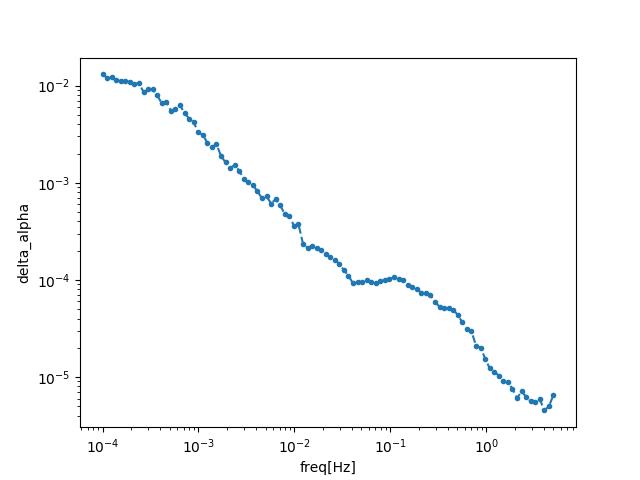

[Text(0, 0.5, 'delta_alpha'), Text(0.5, 0, 'freq[Hz]')]

In [13]:
_, ax = plt.subplots()
ax.loglog(alphas_freq, limit, '.--')
ax.set(xlabel='freq[Hz]', ylabel='delta_alpha')

In [14]:
limits_delta_alpha = 2*np.array(limit)/2 # 2 sigma of delta_alpha over 2 -> because the force is the delta alpha square
mass_ev = alphas_freq/2e14
rho_dm = 0.4*(1.98e-14)**3*(1e9)**4

In [15]:
ge_lim = limits_delta_alpha*mass_ev/np.sqrt(2*rho_dm)

### 60 sec. data

In [5]:
DManalyzer2 = dm_search.DMAnalyser()

In [7]:
fnames = [r'/data/new_trap/20191121/Bead1/DMdata_X8/Discharge_{}.h5'.format(i) for i in range(120)]
foldername = r'/data/new_trap/20191121/Bead1/DMdata_X9/'
# DManalyzer.BDFs = [BeadDataFile.BeadDataFile(fname_) for fname_ in fnames]
DManalyzer.BDFs = load_dir(foldername, file_prefix='DMdata')

No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrode

In [8]:
DManalyzer.estimate_noise()  # estimate noise of x2 and x3

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  9.609473334239448
x3 noise rms:  1.1860464249823146


<IPython.core.display.Javascript object>


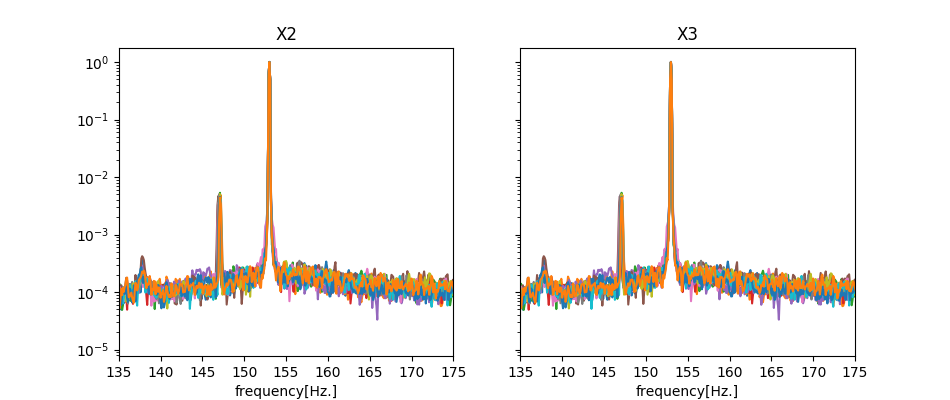

[(135, 175), Text(0.5, 0, 'frequency[Hz.]'), Text(0.5, 1.0, 'X3')]

In [12]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True, sharey=True)
for bb in DManalyzer.BDFs[::10]:
    fft2, freq2 = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=50000)
#     freq2 = np.fft.rfftfreq(len(bb.x2), 1/5000.)
#     fft2 = np.abs(np.fft.rfft(bb.x2))**2
    fft2 /= fft2[freq2==153]
    ax[0].semilogy(freq2, np.sqrt(fft2))
    
    fft3, freq3 = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft3 /= fft3[freq3==153]
    ax[1].semilogy(freq3, np.sqrt(fft3))
ax[0].set(xlim=(135,175), xlabel='frequency[Hz.]', title='X2')
ax[1].set(xlim=(135,175), xlabel='frequency[Hz.]', title='X3')

In [9]:
DManalyzer.get_delta_alpha(bdf_i=10, alpha_frequency=1, frequency=153)

***************************************************
bdf_i:  10 , AM frequency:  1
sensitivity:  3.62e-05


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(3.622275920017511e-05, <iminuit._libiminuit.Minuit at 0x20e90748>)

In [8]:
limit_1Hz = DManalyzer.get_sensitivity(alpha_frequency=0.1, bandwidth=10, frequency=153)

***************************************************
bdf_i:  0 , AM frequency:  0.1
sensitivity:  2.17e-04
***************************************************
bdf_i:  1 , AM frequency:  0.1
sensitivity:  1.68e-03
***************************************************
bdf_i:  2 , AM frequency:  0.1
sensitivity:  2.45e-04


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
bdf_i:  3 , AM frequency:  0.1
sensitivity:  5.38e-04
***************************************************
bdf_i:  4 , AM frequency:  0.1
sensitivity:  1.55e-04
***************************************************
bdf_i:  5 , AM frequency:  0.1
sensitivity:  8.46e-04
***************************************************
bdf_i:  6 , AM frequency:  0.1
sensitivity:  1.58e-03
***************************************************
bdf_i:  7 , AM frequency:  0.1
sensitivity:  1.55e-03
***************************************************
bdf_i:  8 , AM frequency:  0.1
sensitivity:  5.29e-05
***************************************************
bdf_i:  9 , AM frequency:  0.1
sensitivity:  3.37e-04
***************************************************
bdf_i:  10 , AM frequency:  0.1
sensitivity:  9.55e-05
***************************************************
bdf_i:  11 , AM frequency:  0.1
sensitivity:  3.31e-04
********************************************

***************************************************
bdf_i:  80 , AM frequency:  0.1
sensitivity:  9.50e-04
***************************************************
bdf_i:  81 , AM frequency:  0.1
sensitivity:  2.79e-04
***************************************************
bdf_i:  82 , AM frequency:  0.1
sensitivity:  3.79e-04
***************************************************
bdf_i:  83 , AM frequency:  0.1
sensitivity:  2.03e-04
***************************************************
bdf_i:  84 , AM frequency:  0.1
sensitivity:  1.12e-03
***************************************************
bdf_i:  85 , AM frequency:  0.1
sensitivity:  5.72e-05
***************************************************
bdf_i:  86 , AM frequency:  0.1
sensitivity:  6.13e-05
***************************************************
bdf_i:  87 , AM frequency:  0.1
sensitivity:  2.77e-04
***************************************************
bdf_i:  88 , AM frequency:  0.1
sensitivity:  1.54e-03
*************************************

In [10]:
resp_x2 = np.array([np.std(bb.response_at_freq2('x',drive_freq=153)*50000) for bb in DManalyzer.BDFs])
resp_x3 = np.array([np.std(bb.response_at_freq3('x',drive_freq=153)/6) for bb in DManalyzer.BDFs])

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [15]:
A = [res_.values[0] for res_ in DManalyzer.minimizer_2d_results]
Phi = [res_.values[4] for res_ in DManalyzer.minimizer_2d_results]
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(A)),A/resp_x3)
ax[0].set(ylim=(-0.001,0.001))
ax[1].hist(A/resp_x3*1000)
all_vals = A/resp_x3
print('avergae: ', np.mean(all_vals), 'std: ', np.std(all_vals))
print('standard error: ', np.std(all_vals)/np.sqrt(len(all_vals)))

all_vals = [A[i_]/resp_x3[i_] for i_ in i]
print('avergae: ', np.mean(all_vals), 'std: ', np.std(all_vals))
print('standard error: ', np.std(all_vals)/np.sqrt(len(all_vals)))

TypeError: 'NoneType' object is not iterable

In [13]:
alphas_freq = np.logspace(-2, 2, 100)
limit = [DManalyzer.get_sensitivity(alpha_frequency=freq) for freq in alphas_freq]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
bdf_i:  0 , AM frequency:  0.01
sensitivity:  1.98e-04
***************************************************
bdf_i:  1 , AM frequency:  0.01
sensitivity:  1.77e-03
***************************************************
bdf_i:  2 , AM frequency:  0.01
sensitivity:  1.02e-03
***************************************************
bdf_i:  3 , AM frequency:  0.01
sensitivity:  4.50e-04
***************************************************
bdf_i:  4 , AM frequency:  0.01
sensitivity:  1.38e-03
***************************************************
bdf_i:  5 , AM frequency:  0.01
sensitivity:  2.54e-03
***************************************************
bdf_i:  6 , AM frequency:  0.01
sensitivity:  2.18e-03
***************************************************
bdf_i:  7 , AM frequency:  0.01
sensitivity:  2.03e-04
***************************************************
bdf_i:  8 , AM frequency:  0.01
sensitivity:  4.02e-04
*************************************

***************************************************
bdf_i:  76 , AM frequency:  0.01
sensitivity:  1.93e-03
***************************************************
bdf_i:  77 , AM frequency:  0.01
sensitivity:  2.93e-03
***************************************************
bdf_i:  78 , AM frequency:  0.01
sensitivity:  1.36e-03
***************************************************
bdf_i:  79 , AM frequency:  0.01
sensitivity:  8.45e-04
***************************************************
bdf_i:  80 , AM frequency:  0.01
sensitivity:  1.25e-03
***************************************************
bdf_i:  81 , AM frequency:  0.01
sensitivity:  2.71e-03
***************************************************
bdf_i:  82 , AM frequency:  0.01
sensitivity:  1.90e-03
***************************************************
bdf_i:  83 , AM frequency:  0.01
sensitivity:  1.56e-03
***************************************************
bdf_i:  84 , AM frequency:  0.01
sensitivity:  1.42e-03
****************************

***************************************************
bdf_i:  28 , AM frequency:  0.010974987654930561
sensitivity:  1.52e-03
***************************************************
bdf_i:  29 , AM frequency:  0.010974987654930561
sensitivity:  1.10e-03
***************************************************
bdf_i:  30 , AM frequency:  0.010974987654930561
sensitivity:  6.46e-06
***************************************************
bdf_i:  31 , AM frequency:  0.010974987654930561
sensitivity:  1.48e-03
***************************************************
bdf_i:  32 , AM frequency:  0.010974987654930561
sensitivity:  2.37e-04
***************************************************
bdf_i:  33 , AM frequency:  0.010974987654930561
sensitivity:  1.27e-03
***************************************************
bdf_i:  34 , AM frequency:  0.010974987654930561
sensitivity:  6.17e-04
***************************************************
bdf_i:  35 , AM frequency:  0.010974987654930561
sensitivity:  9.15e-04
********

***************************************************
bdf_i:  96 , AM frequency:  0.010974987654930561
sensitivity:  1.87e-03
***************************************************
bdf_i:  97 , AM frequency:  0.010974987654930561
sensitivity:  2.62e-03
***************************************************
bdf_i:  98 , AM frequency:  0.010974987654930561
sensitivity:  4.75e-03
***************************************************
bdf_i:  99 , AM frequency:  0.010974987654930561
sensitivity:  3.57e-05
***************************************************
bdf_i:  100 , AM frequency:  0.010974987654930561
sensitivity:  3.08e-03
***************************************************
bdf_i:  101 , AM frequency:  0.010974987654930561
sensitivity:  9.28e-04
***************************************************
bdf_i:  102 , AM frequency:  0.010974987654930561
sensitivity:  9.94e-03
***************************************************
bdf_i:  103 , AM frequency:  0.010974987654930561
sensitivity:  5.34e-03
****

***************************************************
bdf_i:  44 , AM frequency:  0.012045035402587823
sensitivity:  3.02e-04
***************************************************
bdf_i:  45 , AM frequency:  0.012045035402587823
sensitivity:  1.61e-03
***************************************************
bdf_i:  46 , AM frequency:  0.012045035402587823
sensitivity:  2.55e-04
***************************************************
bdf_i:  47 , AM frequency:  0.012045035402587823
sensitivity:  2.09e-03
***************************************************
bdf_i:  48 , AM frequency:  0.012045035402587823
sensitivity:  6.68e-04
***************************************************
bdf_i:  49 , AM frequency:  0.012045035402587823
sensitivity:  2.11e-04
***************************************************
bdf_i:  50 , AM frequency:  0.012045035402587823
sensitivity:  2.35e-03
***************************************************
bdf_i:  51 , AM frequency:  0.012045035402587823
sensitivity:  3.45e-04
********

***************************************************
bdf_i:  111 , AM frequency:  0.012045035402587823
sensitivity:  1.57e-03
***************************************************
bdf_i:  112 , AM frequency:  0.012045035402587823
sensitivity:  6.68e-04
***************************************************
bdf_i:  113 , AM frequency:  0.012045035402587823
sensitivity:  3.03e-04
***************************************************
bdf_i:  114 , AM frequency:  0.012045035402587823
sensitivity:  3.00e-03
***************************************************
bdf_i:  115 , AM frequency:  0.012045035402587823
sensitivity:  3.10e-03
***************************************************
bdf_i:  116 , AM frequency:  0.012045035402587823
sensitivity:  1.11e-02
***************************************************
bdf_i:  117 , AM frequency:  0.012045035402587823
sensitivity:  1.62e-02
***************************************************
bdf_i:  118 , AM frequency:  0.012045035402587823
sensitivity:  1.26e-02


***************************************************
bdf_i:  57 , AM frequency:  0.013219411484660288
sensitivity:  2.56e-03
***************************************************
bdf_i:  58 , AM frequency:  0.013219411484660288
sensitivity:  2.48e-04
***************************************************
bdf_i:  59 , AM frequency:  0.013219411484660288
sensitivity:  2.26e-03
***************************************************
bdf_i:  60 , AM frequency:  0.013219411484660288
sensitivity:  8.38e-03
***************************************************
bdf_i:  61 , AM frequency:  0.013219411484660288
sensitivity:  2.53e-03
***************************************************
bdf_i:  62 , AM frequency:  0.013219411484660288
sensitivity:  6.11e-03
***************************************************
bdf_i:  63 , AM frequency:  0.013219411484660288
sensitivity:  2.57e-03
***************************************************
bdf_i:  64 , AM frequency:  0.013219411484660288
sensitivity:  1.20e-03
********

***************************************************
bdf_i:  3 , AM frequency:  0.014508287784959394
sensitivity:  3.98e-04
***************************************************
bdf_i:  4 , AM frequency:  0.014508287784959394
sensitivity:  1.44e-03
***************************************************
bdf_i:  5 , AM frequency:  0.014508287784959394
sensitivity:  3.19e-03
***************************************************
bdf_i:  6 , AM frequency:  0.014508287784959394
sensitivity:  2.63e-03
***************************************************
bdf_i:  7 , AM frequency:  0.014508287784959394
sensitivity:  1.90e-03
***************************************************
bdf_i:  8 , AM frequency:  0.014508287784959394
sensitivity:  7.66e-04
***************************************************
bdf_i:  9 , AM frequency:  0.014508287784959394
sensitivity:  1.76e-04
***************************************************
bdf_i:  10 , AM frequency:  0.014508287784959394
sensitivity:  5.19e-04
***************

***************************************************
bdf_i:  71 , AM frequency:  0.014508287784959394
sensitivity:  2.40e-03
***************************************************
bdf_i:  72 , AM frequency:  0.014508287784959394
sensitivity:  6.92e-04
***************************************************
bdf_i:  73 , AM frequency:  0.014508287784959394
sensitivity:  9.21e-04
***************************************************
bdf_i:  74 , AM frequency:  0.014508287784959394
sensitivity:  1.52e-03
***************************************************
bdf_i:  75 , AM frequency:  0.014508287784959394
sensitivity:  2.78e-03
***************************************************
bdf_i:  76 , AM frequency:  0.014508287784959394
sensitivity:  2.15e-03
***************************************************
bdf_i:  77 , AM frequency:  0.014508287784959394
sensitivity:  3.11e-03
***************************************************
bdf_i:  78 , AM frequency:  0.014508287784959394
sensitivity:  1.55e-03
********

***************************************************
bdf_i:  17 , AM frequency:  0.015922827933410922
sensitivity:  9.49e-04
***************************************************
bdf_i:  18 , AM frequency:  0.015922827933410922
sensitivity:  1.66e-04
***************************************************
bdf_i:  19 , AM frequency:  0.015922827933410922
sensitivity:  1.20e-03
***************************************************
bdf_i:  20 , AM frequency:  0.015922827933410922
sensitivity:  2.36e-03
***************************************************
bdf_i:  21 , AM frequency:  0.015922827933410922
sensitivity:  7.05e-04
***************************************************
bdf_i:  22 , AM frequency:  0.015922827933410922
sensitivity:  1.57e-03
***************************************************
bdf_i:  23 , AM frequency:  0.015922827933410922
sensitivity:  1.91e-03
***************************************************
bdf_i:  24 , AM frequency:  0.015922827933410922
sensitivity:  7.16e-04
********

***************************************************
bdf_i:  84 , AM frequency:  0.015922827933410922
sensitivity:  1.92e-03
***************************************************
bdf_i:  85 , AM frequency:  0.015922827933410922
sensitivity:  1.83e-03
***************************************************
bdf_i:  86 , AM frequency:  0.015922827933410922
sensitivity:  1.44e-03
***************************************************
bdf_i:  87 , AM frequency:  0.015922827933410922
sensitivity:  2.21e-04
***************************************************
bdf_i:  88 , AM frequency:  0.015922827933410922
sensitivity:  4.45e-04
***************************************************
bdf_i:  89 , AM frequency:  0.015922827933410922
sensitivity:  8.74e-04
***************************************************
bdf_i:  90 , AM frequency:  0.015922827933410922
sensitivity:  3.91e-04
***************************************************
bdf_i:  91 , AM frequency:  0.015922827933410922
sensitivity:  7.06e-04
********

***************************************************
bdf_i:  31 , AM frequency:  0.01747528400007684
sensitivity:  1.80e-03
***************************************************
bdf_i:  32 , AM frequency:  0.01747528400007684
sensitivity:  4.69e-04
***************************************************
bdf_i:  33 , AM frequency:  0.01747528400007684
sensitivity:  1.52e-03
***************************************************
bdf_i:  34 , AM frequency:  0.01747528400007684
sensitivity:  4.76e-04
***************************************************
bdf_i:  35 , AM frequency:  0.01747528400007684
sensitivity:  2.47e-04
***************************************************
bdf_i:  36 , AM frequency:  0.01747528400007684
sensitivity:  2.90e-03
***************************************************
bdf_i:  37 , AM frequency:  0.01747528400007684
sensitivity:  3.33e-03
***************************************************
bdf_i:  38 , AM frequency:  0.01747528400007684
sensitivity:  8.49e-04
****************

***************************************************
bdf_i:  100 , AM frequency:  0.01747528400007684
sensitivity:  4.12e-03
***************************************************
bdf_i:  101 , AM frequency:  0.01747528400007684
sensitivity:  3.11e-03
***************************************************
bdf_i:  102 , AM frequency:  0.01747528400007684
sensitivity:  1.11e-02
***************************************************
bdf_i:  103 , AM frequency:  0.01747528400007684
sensitivity:  3.47e-03
***************************************************
bdf_i:  104 , AM frequency:  0.01747528400007684
sensitivity:  2.38e-03
***************************************************
bdf_i:  105 , AM frequency:  0.01747528400007684
sensitivity:  2.37e-03
***************************************************
bdf_i:  106 , AM frequency:  0.01747528400007684
sensitivity:  4.67e-03
***************************************************
bdf_i:  107 , AM frequency:  0.01747528400007684
sensitivity:  1.14e-03
********

***************************************************
bdf_i:  46 , AM frequency:  0.019179102616724886
sensitivity:  5.14e-04
***************************************************
bdf_i:  47 , AM frequency:  0.019179102616724886
sensitivity:  1.55e-03
***************************************************
bdf_i:  48 , AM frequency:  0.019179102616724886
sensitivity:  5.35e-04
***************************************************
bdf_i:  49 , AM frequency:  0.019179102616724886
sensitivity:  3.88e-04
***************************************************
bdf_i:  50 , AM frequency:  0.019179102616724886
sensitivity:  1.91e-03
***************************************************
bdf_i:  51 , AM frequency:  0.019179102616724886
sensitivity:  2.94e-03
***************************************************
bdf_i:  52 , AM frequency:  0.019179102616724886
sensitivity:  1.16e-03
***************************************************
bdf_i:  53 , AM frequency:  0.019179102616724886
sensitivity:  1.68e-03
********

***************************************************
bdf_i:  114 , AM frequency:  0.019179102616724886
sensitivity:  2.92e-03
***************************************************
bdf_i:  115 , AM frequency:  0.019179102616724886
sensitivity:  1.98e-03
***************************************************
bdf_i:  116 , AM frequency:  0.019179102616724886
sensitivity:  1.38e-02
***************************************************
bdf_i:  117 , AM frequency:  0.019179102616724886
sensitivity:  1.50e-02
***************************************************
bdf_i:  118 , AM frequency:  0.019179102616724886
sensitivity:  1.20e-02
***************************************************
average:  0.0021352786479691844 std:  0.002515556647046237
standard error:  0.0002306006997536612
***************************************************
bdf_i:  0 , AM frequency:  0.02104904144512021
sensitivity:  1.21e-03
***************************************************
bdf_i:  1 , AM frequency:  0.02104904144512021
sens

***************************************************
bdf_i:  62 , AM frequency:  0.02104904144512021
sensitivity:  2.47e-03
***************************************************
bdf_i:  63 , AM frequency:  0.02104904144512021
sensitivity:  2.50e-03
***************************************************
bdf_i:  64 , AM frequency:  0.02104904144512021
sensitivity:  1.47e-03
***************************************************
bdf_i:  65 , AM frequency:  0.02104904144512021
sensitivity:  8.35e-05
***************************************************
bdf_i:  66 , AM frequency:  0.02104904144512021
sensitivity:  2.17e-04
***************************************************
bdf_i:  67 , AM frequency:  0.02104904144512021
sensitivity:  2.09e-03
***************************************************
bdf_i:  68 , AM frequency:  0.02104904144512021
sensitivity:  6.61e-04
***************************************************
bdf_i:  69 , AM frequency:  0.02104904144512021
sensitivity:  1.16e-05
****************

***************************************************
bdf_i:  11 , AM frequency:  0.023101297000831605
sensitivity:  2.16e-03
***************************************************
bdf_i:  12 , AM frequency:  0.023101297000831605
sensitivity:  6.25e-04
***************************************************
bdf_i:  13 , AM frequency:  0.023101297000831605
sensitivity:  2.20e-03
***************************************************
bdf_i:  14 , AM frequency:  0.023101297000831605
sensitivity:  1.78e-04
***************************************************
bdf_i:  15 , AM frequency:  0.023101297000831605
sensitivity:  1.10e-03
***************************************************
bdf_i:  16 , AM frequency:  0.023101297000831605
sensitivity:  7.56e-04
***************************************************
bdf_i:  17 , AM frequency:  0.023101297000831605
sensitivity:  2.90e-04
***************************************************
bdf_i:  18 , AM frequency:  0.023101297000831605
sensitivity:  3.06e-04
********

***************************************************
bdf_i:  79 , AM frequency:  0.023101297000831605
sensitivity:  1.84e-03
***************************************************
bdf_i:  80 , AM frequency:  0.023101297000831605
sensitivity:  1.87e-03
***************************************************
bdf_i:  81 , AM frequency:  0.023101297000831605
sensitivity:  3.22e-03
***************************************************
bdf_i:  82 , AM frequency:  0.023101297000831605
sensitivity:  2.75e-03
***************************************************
bdf_i:  83 , AM frequency:  0.023101297000831605
sensitivity:  4.68e-04
***************************************************
bdf_i:  84 , AM frequency:  0.023101297000831605
sensitivity:  1.61e-03
***************************************************
bdf_i:  85 , AM frequency:  0.023101297000831605
sensitivity:  4.59e-04
***************************************************
bdf_i:  86 , AM frequency:  0.023101297000831605
sensitivity:  4.83e-04
********

***************************************************
bdf_i:  25 , AM frequency:  0.025353644939701114
sensitivity:  7.47e-04
***************************************************
bdf_i:  26 , AM frequency:  0.025353644939701114
sensitivity:  4.49e-04
***************************************************
bdf_i:  27 , AM frequency:  0.025353644939701114
sensitivity:  1.53e-03
***************************************************
bdf_i:  28 , AM frequency:  0.025353644939701114
sensitivity:  1.50e-03
***************************************************
bdf_i:  29 , AM frequency:  0.025353644939701114
sensitivity:  5.49e-04
***************************************************
bdf_i:  30 , AM frequency:  0.025353644939701114
sensitivity:  9.02e-05
***************************************************
bdf_i:  31 , AM frequency:  0.025353644939701114
sensitivity:  1.20e-03
***************************************************
bdf_i:  32 , AM frequency:  0.025353644939701114
sensitivity:  5.42e-04
********

***************************************************
bdf_i:  93 , AM frequency:  0.025353644939701114
sensitivity:  1.89e-04
***************************************************
bdf_i:  94 , AM frequency:  0.025353644939701114
sensitivity:  2.04e-03
***************************************************
bdf_i:  95 , AM frequency:  0.025353644939701114
sensitivity:  2.03e-03
***************************************************
bdf_i:  96 , AM frequency:  0.025353644939701114
sensitivity:  8.57e-04
***************************************************
bdf_i:  97 , AM frequency:  0.025353644939701114
sensitivity:  1.78e-03
***************************************************
bdf_i:  98 , AM frequency:  0.025353644939701114
sensitivity:  6.68e-05
***************************************************
bdf_i:  99 , AM frequency:  0.025353644939701114
sensitivity:  2.06e-03
***************************************************
bdf_i:  100 , AM frequency:  0.025353644939701114
sensitivity:  2.85e-03
*******

***************************************************
bdf_i:  41 , AM frequency:  0.027825594022071243
sensitivity:  1.52e-03
***************************************************
bdf_i:  42 , AM frequency:  0.027825594022071243
sensitivity:  1.34e-03
***************************************************
bdf_i:  43 , AM frequency:  0.027825594022071243
sensitivity:  1.86e-03
***************************************************
bdf_i:  44 , AM frequency:  0.027825594022071243
sensitivity:  1.32e-03
***************************************************
bdf_i:  45 , AM frequency:  0.027825594022071243
sensitivity:  1.26e-03
***************************************************
bdf_i:  46 , AM frequency:  0.027825594022071243
sensitivity:  1.44e-04
***************************************************
bdf_i:  47 , AM frequency:  0.027825594022071243
sensitivity:  2.88e-03
***************************************************
bdf_i:  48 , AM frequency:  0.027825594022071243
sensitivity:  3.65e-04
********

***************************************************
bdf_i:  109 , AM frequency:  0.027825594022071243
sensitivity:  7.07e-04
***************************************************
bdf_i:  110 , AM frequency:  0.027825594022071243
sensitivity:  3.99e-03
***************************************************
bdf_i:  111 , AM frequency:  0.027825594022071243
sensitivity:  2.48e-03
***************************************************
bdf_i:  112 , AM frequency:  0.027825594022071243
sensitivity:  4.05e-03
***************************************************
bdf_i:  113 , AM frequency:  0.027825594022071243
sensitivity:  2.98e-03
***************************************************
bdf_i:  114 , AM frequency:  0.027825594022071243
sensitivity:  2.34e-04
***************************************************
bdf_i:  115 , AM frequency:  0.027825594022071243
sensitivity:  1.00e-03
***************************************************
bdf_i:  116 , AM frequency:  0.027825594022071243
sensitivity:  6.10e-03


***************************************************
bdf_i:  56 , AM frequency:  0.030538555088334154
sensitivity:  1.19e-03
***************************************************
bdf_i:  57 , AM frequency:  0.030538555088334154
sensitivity:  9.54e-04
***************************************************
bdf_i:  58 , AM frequency:  0.030538555088334154
sensitivity:  1.95e-03
***************************************************
bdf_i:  59 , AM frequency:  0.030538555088334154
sensitivity:  1.85e-03
***************************************************
bdf_i:  60 , AM frequency:  0.030538555088334154
sensitivity:  9.88e-03
***************************************************
bdf_i:  61 , AM frequency:  0.030538555088334154
sensitivity:  4.86e-03
***************************************************
bdf_i:  62 , AM frequency:  0.030538555088334154
sensitivity:  5.14e-03
***************************************************
bdf_i:  63 , AM frequency:  0.030538555088334154
sensitivity:  7.44e-04
********

***************************************************
bdf_i:  3 , AM frequency:  0.033516026509388425
sensitivity:  1.29e-03
***************************************************
bdf_i:  4 , AM frequency:  0.033516026509388425
sensitivity:  1.28e-03
***************************************************
bdf_i:  5 , AM frequency:  0.033516026509388425
sensitivity:  1.28e-03
***************************************************
bdf_i:  6 , AM frequency:  0.033516026509388425
sensitivity:  6.76e-04
***************************************************
bdf_i:  7 , AM frequency:  0.033516026509388425
sensitivity:  4.75e-04
***************************************************
bdf_i:  8 , AM frequency:  0.033516026509388425
sensitivity:  1.02e-03
***************************************************
bdf_i:  9 , AM frequency:  0.033516026509388425
sensitivity:  8.03e-04
***************************************************
bdf_i:  10 , AM frequency:  0.033516026509388425
sensitivity:  2.20e-03
***************

***************************************************
bdf_i:  72 , AM frequency:  0.033516026509388425
sensitivity:  5.62e-04
***************************************************
bdf_i:  73 , AM frequency:  0.033516026509388425
sensitivity:  1.94e-03
***************************************************
bdf_i:  74 , AM frequency:  0.033516026509388425
sensitivity:  1.62e-03
***************************************************
bdf_i:  75 , AM frequency:  0.033516026509388425
sensitivity:  2.56e-03
***************************************************
bdf_i:  76 , AM frequency:  0.033516026509388425
sensitivity:  8.32e-04
***************************************************
bdf_i:  77 , AM frequency:  0.033516026509388425
sensitivity:  3.20e-04
***************************************************
bdf_i:  78 , AM frequency:  0.033516026509388425
sensitivity:  3.33e-03
***************************************************
bdf_i:  79 , AM frequency:  0.033516026509388425
sensitivity:  5.64e-04
********

***************************************************
bdf_i:  20 , AM frequency:  0.03678379771828634
sensitivity:  1.02e-03
***************************************************
bdf_i:  21 , AM frequency:  0.03678379771828634
sensitivity:  1.37e-03
***************************************************
bdf_i:  22 , AM frequency:  0.03678379771828634
sensitivity:  5.21e-04
***************************************************
bdf_i:  23 , AM frequency:  0.03678379771828634
sensitivity:  1.47e-03
***************************************************
bdf_i:  24 , AM frequency:  0.03678379771828634
sensitivity:  2.73e-04
***************************************************
bdf_i:  25 , AM frequency:  0.03678379771828634
sensitivity:  2.99e-03
***************************************************
bdf_i:  26 , AM frequency:  0.03678379771828634
sensitivity:  1.76e-05
***************************************************
bdf_i:  27 , AM frequency:  0.03678379771828634
sensitivity:  1.46e-03
****************

***************************************************
bdf_i:  87 , AM frequency:  0.03678379771828634
sensitivity:  8.96e-04
***************************************************
bdf_i:  88 , AM frequency:  0.03678379771828634
sensitivity:  1.55e-03
***************************************************
bdf_i:  89 , AM frequency:  0.03678379771828634
sensitivity:  7.73e-04
***************************************************
bdf_i:  90 , AM frequency:  0.03678379771828634
sensitivity:  3.94e-03
***************************************************
bdf_i:  91 , AM frequency:  0.03678379771828634
sensitivity:  5.67e-04
***************************************************
bdf_i:  92 , AM frequency:  0.03678379771828634
sensitivity:  3.79e-04
***************************************************
bdf_i:  93 , AM frequency:  0.03678379771828634
sensitivity:  2.15e-03
***************************************************
bdf_i:  94 , AM frequency:  0.03678379771828634
sensitivity:  2.69e-03
****************

***************************************************
bdf_i:  36 , AM frequency:  0.040370172585965536
sensitivity:  1.59e-03
***************************************************
bdf_i:  37 , AM frequency:  0.040370172585965536
sensitivity:  2.45e-03
***************************************************
bdf_i:  38 , AM frequency:  0.040370172585965536
sensitivity:  9.77e-04
***************************************************
bdf_i:  39 , AM frequency:  0.040370172585965536
sensitivity:  5.20e-04
***************************************************
bdf_i:  40 , AM frequency:  0.040370172585965536
sensitivity:  1.68e-03
***************************************************
bdf_i:  41 , AM frequency:  0.040370172585965536
sensitivity:  1.26e-03
***************************************************
bdf_i:  42 , AM frequency:  0.040370172585965536
sensitivity:  1.23e-03
***************************************************
bdf_i:  43 , AM frequency:  0.040370172585965536
sensitivity:  6.73e-04
********

***************************************************
bdf_i:  103 , AM frequency:  0.040370172585965536
sensitivity:  3.86e-03
***************************************************
bdf_i:  104 , AM frequency:  0.040370172585965536
sensitivity:  3.01e-03
***************************************************
bdf_i:  105 , AM frequency:  0.040370172585965536
sensitivity:  1.90e-03
***************************************************
bdf_i:  106 , AM frequency:  0.040370172585965536
sensitivity:  2.66e-03
***************************************************
bdf_i:  107 , AM frequency:  0.040370172585965536
sensitivity:  1.07e-03
***************************************************
bdf_i:  108 , AM frequency:  0.040370172585965536
sensitivity:  2.18e-03
***************************************************
bdf_i:  109 , AM frequency:  0.040370172585965536
sensitivity:  8.78e-05
***************************************************
bdf_i:  110 , AM frequency:  0.040370172585965536
sensitivity:  1.25e-03


***************************************************
bdf_i:  51 , AM frequency:  0.044306214575838825
sensitivity:  1.45e-03
***************************************************
bdf_i:  52 , AM frequency:  0.044306214575838825
sensitivity:  1.24e-03
***************************************************
bdf_i:  53 , AM frequency:  0.044306214575838825
sensitivity:  1.07e-03
***************************************************
bdf_i:  54 , AM frequency:  0.044306214575838825
sensitivity:  7.12e-04
***************************************************
bdf_i:  55 , AM frequency:  0.044306214575838825
sensitivity:  2.48e-03
***************************************************
bdf_i:  56 , AM frequency:  0.044306214575838825
sensitivity:  1.14e-03
***************************************************
bdf_i:  57 , AM frequency:  0.044306214575838825
sensitivity:  2.87e-04
***************************************************
bdf_i:  58 , AM frequency:  0.044306214575838825
sensitivity:  1.72e-03
********

***************************************************
bdf_i:  117 , AM frequency:  0.044306214575838825
sensitivity:  6.74e-03
***************************************************
bdf_i:  118 , AM frequency:  0.044306214575838825
sensitivity:  6.38e-03
***************************************************
average:  0.0014418222781253565 std:  0.0012030618002397539
standard error:  0.00011028449441118365
***************************************************
bdf_i:  0 , AM frequency:  0.04862601580065353
sensitivity:  1.81e-03
***************************************************
bdf_i:  1 , AM frequency:  0.04862601580065353
sensitivity:  2.08e-03
***************************************************
bdf_i:  2 , AM frequency:  0.04862601580065353
sensitivity:  8.86e-04
***************************************************
bdf_i:  3 , AM frequency:  0.04862601580065353
sensitivity:  1.39e-03
***************************************************
bdf_i:  4 , AM frequency:  0.04862601580065353
sensitivity

***************************************************
bdf_i:  65 , AM frequency:  0.04862601580065353
sensitivity:  1.62e-03
***************************************************
bdf_i:  66 , AM frequency:  0.04862601580065353
sensitivity:  2.07e-03
***************************************************
bdf_i:  67 , AM frequency:  0.04862601580065353
sensitivity:  7.32e-04
***************************************************
bdf_i:  68 , AM frequency:  0.04862601580065353
sensitivity:  4.76e-04
***************************************************
bdf_i:  69 , AM frequency:  0.04862601580065353
sensitivity:  2.90e-04
***************************************************
bdf_i:  70 , AM frequency:  0.04862601580065353
sensitivity:  1.52e-03
***************************************************
bdf_i:  71 , AM frequency:  0.04862601580065353
sensitivity:  1.88e-03
***************************************************
bdf_i:  72 , AM frequency:  0.04862601580065353
sensitivity:  8.96e-04
****************

***************************************************
bdf_i:  14 , AM frequency:  0.0533669923120631
sensitivity:  1.38e-03
***************************************************
bdf_i:  15 , AM frequency:  0.0533669923120631
sensitivity:  4.56e-04
***************************************************
bdf_i:  16 , AM frequency:  0.0533669923120631
sensitivity:  8.84e-04
***************************************************
bdf_i:  17 , AM frequency:  0.0533669923120631
sensitivity:  7.75e-04
***************************************************
bdf_i:  18 , AM frequency:  0.0533669923120631
sensitivity:  1.84e-03
***************************************************
bdf_i:  19 , AM frequency:  0.0533669923120631
sensitivity:  1.08e-03
***************************************************
bdf_i:  20 , AM frequency:  0.0533669923120631
sensitivity:  1.30e-03
***************************************************
bdf_i:  21 , AM frequency:  0.0533669923120631
sensitivity:  1.09e-04
************************

***************************************************
bdf_i:  82 , AM frequency:  0.0533669923120631
sensitivity:  8.73e-05
***************************************************
bdf_i:  83 , AM frequency:  0.0533669923120631
sensitivity:  3.75e-03
***************************************************
bdf_i:  84 , AM frequency:  0.0533669923120631
sensitivity:  1.17e-03
***************************************************
bdf_i:  85 , AM frequency:  0.0533669923120631
sensitivity:  6.84e-04
***************************************************
bdf_i:  86 , AM frequency:  0.0533669923120631
sensitivity:  1.04e-03
***************************************************
bdf_i:  87 , AM frequency:  0.0533669923120631
sensitivity:  1.18e-03
***************************************************
bdf_i:  88 , AM frequency:  0.0533669923120631
sensitivity:  1.70e-03
***************************************************
bdf_i:  89 , AM frequency:  0.0533669923120631
sensitivity:  6.54e-04
************************

***************************************************
bdf_i:  29 , AM frequency:  0.05857020818056667
sensitivity:  1.81e-03
***************************************************
bdf_i:  30 , AM frequency:  0.05857020818056667
sensitivity:  3.49e-04
***************************************************
bdf_i:  31 , AM frequency:  0.05857020818056667
sensitivity:  6.62e-04
***************************************************
bdf_i:  32 , AM frequency:  0.05857020818056667
sensitivity:  2.42e-03
***************************************************
bdf_i:  33 , AM frequency:  0.05857020818056667
sensitivity:  8.56e-04
***************************************************
bdf_i:  34 , AM frequency:  0.05857020818056667
sensitivity:  1.58e-03
***************************************************
bdf_i:  35 , AM frequency:  0.05857020818056667
sensitivity:  1.77e-03
***************************************************
bdf_i:  36 , AM frequency:  0.05857020818056667
sensitivity:  4.41e-04
****************

***************************************************
bdf_i:  97 , AM frequency:  0.05857020818056667
sensitivity:  8.40e-04
***************************************************
bdf_i:  98 , AM frequency:  0.05857020818056667
sensitivity:  8.82e-04
***************************************************
bdf_i:  99 , AM frequency:  0.05857020818056667
sensitivity:  1.58e-03
***************************************************
bdf_i:  100 , AM frequency:  0.05857020818056667
sensitivity:  2.19e-03
***************************************************
bdf_i:  101 , AM frequency:  0.05857020818056667
sensitivity:  1.30e-03
***************************************************
bdf_i:  102 , AM frequency:  0.05857020818056667
sensitivity:  1.68e-03
***************************************************
bdf_i:  103 , AM frequency:  0.05857020818056667
sensitivity:  6.21e-04
***************************************************
bdf_i:  104 , AM frequency:  0.05857020818056667
sensitivity:  2.41e-03
***********

***************************************************
bdf_i:  45 , AM frequency:  0.06428073117284322
sensitivity:  2.57e-03
***************************************************
bdf_i:  46 , AM frequency:  0.06428073117284322
sensitivity:  5.00e-04
***************************************************
bdf_i:  47 , AM frequency:  0.06428073117284322
sensitivity:  1.49e-03
***************************************************
bdf_i:  48 , AM frequency:  0.06428073117284322
sensitivity:  6.32e-04
***************************************************
bdf_i:  49 , AM frequency:  0.06428073117284322
sensitivity:  1.66e-03
***************************************************
bdf_i:  50 , AM frequency:  0.06428073117284322
sensitivity:  9.47e-04
***************************************************
bdf_i:  51 , AM frequency:  0.06428073117284322
sensitivity:  2.76e-04
***************************************************
bdf_i:  52 , AM frequency:  0.06428073117284322
sensitivity:  1.77e-03
****************

***************************************************
bdf_i:  114 , AM frequency:  0.06428073117284322
sensitivity:  1.01e-03
***************************************************
bdf_i:  115 , AM frequency:  0.06428073117284322
sensitivity:  1.58e-03
***************************************************
bdf_i:  116 , AM frequency:  0.06428073117284322
sensitivity:  2.04e-05
***************************************************
bdf_i:  117 , AM frequency:  0.06428073117284322
sensitivity:  2.42e-03
***************************************************
bdf_i:  118 , AM frequency:  0.06428073117284322
sensitivity:  1.98e-03
***************************************************
average:  0.001196167758023713 std:  0.0007772778797548754
standard error:  7.125294641445691e-05
***************************************************
bdf_i:  0 , AM frequency:  0.07054802310718646
sensitivity:  1.29e-03
***************************************************
bdf_i:  1 , AM frequency:  0.07054802310718646
sensitivi

***************************************************
bdf_i:  61 , AM frequency:  0.07054802310718646
sensitivity:  4.27e-03
***************************************************
bdf_i:  62 , AM frequency:  0.07054802310718646
sensitivity:  1.65e-03
***************************************************
bdf_i:  63 , AM frequency:  0.07054802310718646
sensitivity:  4.12e-04
***************************************************
bdf_i:  64 , AM frequency:  0.07054802310718646
sensitivity:  7.95e-04
***************************************************
bdf_i:  65 , AM frequency:  0.07054802310718646
sensitivity:  1.85e-03
***************************************************
bdf_i:  66 , AM frequency:  0.07054802310718646
sensitivity:  1.17e-03
***************************************************
bdf_i:  67 , AM frequency:  0.07054802310718646
sensitivity:  1.25e-03
***************************************************
bdf_i:  68 , AM frequency:  0.07054802310718646
sensitivity:  6.43e-04
****************

***************************************************
bdf_i:  8 , AM frequency:  0.0774263682681127
sensitivity:  1.08e-03
***************************************************
bdf_i:  9 , AM frequency:  0.0774263682681127
sensitivity:  1.25e-04
***************************************************
bdf_i:  10 , AM frequency:  0.0774263682681127
sensitivity:  9.76e-04
***************************************************
bdf_i:  11 , AM frequency:  0.0774263682681127
sensitivity:  8.49e-04
***************************************************
bdf_i:  12 , AM frequency:  0.0774263682681127
sensitivity:  3.19e-04
***************************************************
bdf_i:  13 , AM frequency:  0.0774263682681127
sensitivity:  7.22e-04
***************************************************
bdf_i:  14 , AM frequency:  0.0774263682681127
sensitivity:  8.01e-04
***************************************************
bdf_i:  15 , AM frequency:  0.0774263682681127
sensitivity:  8.26e-04
**************************

***************************************************
bdf_i:  77 , AM frequency:  0.0774263682681127
sensitivity:  6.67e-04
***************************************************
bdf_i:  78 , AM frequency:  0.0774263682681127
sensitivity:  3.04e-03
***************************************************
bdf_i:  79 , AM frequency:  0.0774263682681127
sensitivity:  1.04e-03
***************************************************
bdf_i:  80 , AM frequency:  0.0774263682681127
sensitivity:  1.14e-03
***************************************************
bdf_i:  81 , AM frequency:  0.0774263682681127
sensitivity:  2.73e-03
***************************************************
bdf_i:  82 , AM frequency:  0.0774263682681127
sensitivity:  6.87e-04
***************************************************
bdf_i:  83 , AM frequency:  0.0774263682681127
sensitivity:  6.45e-04
***************************************************
bdf_i:  84 , AM frequency:  0.0774263682681127
sensitivity:  6.71e-05
************************

***************************************************
bdf_i:  26 , AM frequency:  0.08497534359086446
sensitivity:  5.57e-04
***************************************************
bdf_i:  27 , AM frequency:  0.08497534359086446
sensitivity:  1.25e-03
***************************************************
bdf_i:  28 , AM frequency:  0.08497534359086446
sensitivity:  1.53e-03
***************************************************
bdf_i:  29 , AM frequency:  0.08497534359086446
sensitivity:  1.09e-03
***************************************************
bdf_i:  30 , AM frequency:  0.08497534359086446
sensitivity:  5.47e-04
***************************************************
bdf_i:  31 , AM frequency:  0.08497534359086446
sensitivity:  9.91e-04
***************************************************
bdf_i:  32 , AM frequency:  0.08497534359086446
sensitivity:  7.11e-04
***************************************************
bdf_i:  33 , AM frequency:  0.08497534359086446
sensitivity:  7.46e-04
****************

***************************************************
bdf_i:  94 , AM frequency:  0.08497534359086446
sensitivity:  1.33e-03
***************************************************
bdf_i:  95 , AM frequency:  0.08497534359086446
sensitivity:  2.59e-03
***************************************************
bdf_i:  96 , AM frequency:  0.08497534359086446
sensitivity:  9.21e-04
***************************************************
bdf_i:  97 , AM frequency:  0.08497534359086446
sensitivity:  3.91e-04
***************************************************
bdf_i:  98 , AM frequency:  0.08497534359086446
sensitivity:  2.02e-03
***************************************************
bdf_i:  99 , AM frequency:  0.08497534359086446
sensitivity:  2.73e-03
***************************************************
bdf_i:  100 , AM frequency:  0.08497534359086446
sensitivity:  8.63e-04
***************************************************
bdf_i:  101 , AM frequency:  0.08497534359086446
sensitivity:  2.24e-03
**************

***************************************************
bdf_i:  42 , AM frequency:  0.093260334688322
sensitivity:  1.19e-03
***************************************************
bdf_i:  43 , AM frequency:  0.093260334688322
sensitivity:  1.77e-04
***************************************************
bdf_i:  44 , AM frequency:  0.093260334688322
sensitivity:  5.08e-05
***************************************************
bdf_i:  45 , AM frequency:  0.093260334688322
sensitivity:  2.20e-03
***************************************************
bdf_i:  46 , AM frequency:  0.093260334688322
sensitivity:  4.56e-04
***************************************************
bdf_i:  47 , AM frequency:  0.093260334688322
sensitivity:  1.06e-03
***************************************************
bdf_i:  48 , AM frequency:  0.093260334688322
sensitivity:  1.00e-03
***************************************************
bdf_i:  49 , AM frequency:  0.093260334688322
sensitivity:  1.21e-03
********************************

***************************************************
bdf_i:  111 , AM frequency:  0.093260334688322
sensitivity:  4.13e-04
***************************************************
bdf_i:  112 , AM frequency:  0.093260334688322
sensitivity:  3.48e-03
***************************************************
bdf_i:  113 , AM frequency:  0.093260334688322
sensitivity:  5.04e-04
***************************************************
bdf_i:  114 , AM frequency:  0.093260334688322
sensitivity:  6.26e-04
***************************************************
bdf_i:  115 , AM frequency:  0.093260334688322
sensitivity:  8.34e-04
***************************************************
bdf_i:  116 , AM frequency:  0.093260334688322
sensitivity:  2.86e-03
***************************************************
bdf_i:  117 , AM frequency:  0.093260334688322
sensitivity:  3.41e-03
***************************************************
bdf_i:  118 , AM frequency:  0.093260334688322
sensitivity:  2.46e-03
************************

***************************************************
bdf_i:  58 , AM frequency:  0.10235310218990264
sensitivity:  9.40e-04
***************************************************
bdf_i:  59 , AM frequency:  0.10235310218990264
sensitivity:  6.37e-04
***************************************************
bdf_i:  60 , AM frequency:  0.10235310218990264
sensitivity:  2.67e-03
***************************************************
bdf_i:  61 , AM frequency:  0.10235310218990264
sensitivity:  1.08e-03
***************************************************
bdf_i:  62 , AM frequency:  0.10235310218990264
sensitivity:  1.56e-03
***************************************************
bdf_i:  63 , AM frequency:  0.10235310218990264
sensitivity:  5.90e-04
***************************************************
bdf_i:  64 , AM frequency:  0.10235310218990264
sensitivity:  1.18e-03
***************************************************
bdf_i:  65 , AM frequency:  0.10235310218990264
sensitivity:  4.53e-04
****************

***************************************************
bdf_i:  5 , AM frequency:  0.11233240329780277
sensitivity:  1.22e-03
***************************************************
bdf_i:  6 , AM frequency:  0.11233240329780277
sensitivity:  2.13e-03
***************************************************
bdf_i:  7 , AM frequency:  0.11233240329780277
sensitivity:  1.42e-04
***************************************************
bdf_i:  8 , AM frequency:  0.11233240329780277
sensitivity:  1.18e-03
***************************************************
bdf_i:  9 , AM frequency:  0.11233240329780277
sensitivity:  7.27e-04
***************************************************
bdf_i:  10 , AM frequency:  0.11233240329780277
sensitivity:  1.05e-03
***************************************************
bdf_i:  11 , AM frequency:  0.11233240329780277
sensitivity:  2.01e-03
***************************************************
bdf_i:  12 , AM frequency:  0.11233240329780277
sensitivity:  1.83e-03
*********************

***************************************************
bdf_i:  72 , AM frequency:  0.11233240329780277
sensitivity:  1.07e-03
***************************************************
bdf_i:  73 , AM frequency:  0.11233240329780277
sensitivity:  1.87e-04
***************************************************
bdf_i:  74 , AM frequency:  0.11233240329780277
sensitivity:  3.16e-04
***************************************************
bdf_i:  75 , AM frequency:  0.11233240329780277
sensitivity:  1.69e-03
***************************************************
bdf_i:  76 , AM frequency:  0.11233240329780277
sensitivity:  2.35e-05
***************************************************
bdf_i:  77 , AM frequency:  0.11233240329780277
sensitivity:  1.72e-04
***************************************************
bdf_i:  78 , AM frequency:  0.11233240329780277
sensitivity:  2.63e-04
***************************************************
bdf_i:  79 , AM frequency:  0.11233240329780277
sensitivity:  3.66e-06
****************

***************************************************
bdf_i:  20 , AM frequency:  0.12328467394420665
sensitivity:  1.21e-03
***************************************************
bdf_i:  21 , AM frequency:  0.12328467394420665
sensitivity:  1.16e-03
***************************************************
bdf_i:  22 , AM frequency:  0.12328467394420665
sensitivity:  8.02e-04
***************************************************
bdf_i:  23 , AM frequency:  0.12328467394420665
sensitivity:  9.95e-04
***************************************************
bdf_i:  24 , AM frequency:  0.12328467394420665
sensitivity:  9.40e-04
***************************************************
bdf_i:  25 , AM frequency:  0.12328467394420665
sensitivity:  2.96e-04
***************************************************
bdf_i:  26 , AM frequency:  0.12328467394420665
sensitivity:  7.25e-04
***************************************************
bdf_i:  27 , AM frequency:  0.12328467394420665
sensitivity:  1.73e-03
****************

***************************************************
bdf_i:  88 , AM frequency:  0.12328467394420665
sensitivity:  1.04e-03
***************************************************
bdf_i:  89 , AM frequency:  0.12328467394420665
sensitivity:  6.15e-04
***************************************************
bdf_i:  90 , AM frequency:  0.12328467394420665
sensitivity:  1.34e-03
***************************************************
bdf_i:  91 , AM frequency:  0.12328467394420665
sensitivity:  7.29e-04
***************************************************
bdf_i:  92 , AM frequency:  0.12328467394420665
sensitivity:  1.81e-03
***************************************************
bdf_i:  93 , AM frequency:  0.12328467394420665
sensitivity:  5.60e-05
***************************************************
bdf_i:  94 , AM frequency:  0.12328467394420665
sensitivity:  1.53e-03
***************************************************
bdf_i:  95 , AM frequency:  0.12328467394420665
sensitivity:  2.34e-04
****************

***************************************************
bdf_i:  37 , AM frequency:  0.13530477745798075
sensitivity:  7.13e-04
***************************************************
bdf_i:  38 , AM frequency:  0.13530477745798075
sensitivity:  5.19e-04
***************************************************
bdf_i:  39 , AM frequency:  0.13530477745798075
sensitivity:  7.88e-04
***************************************************
bdf_i:  40 , AM frequency:  0.13530477745798075
sensitivity:  1.17e-03
***************************************************
bdf_i:  41 , AM frequency:  0.13530477745798075
sensitivity:  7.50e-04
***************************************************
bdf_i:  42 , AM frequency:  0.13530477745798075
sensitivity:  4.59e-04
***************************************************
bdf_i:  43 , AM frequency:  0.13530477745798075
sensitivity:  1.12e-03
***************************************************
bdf_i:  44 , AM frequency:  0.13530477745798075
sensitivity:  7.47e-04
****************

***************************************************
bdf_i:  106 , AM frequency:  0.13530477745798075
sensitivity:  1.23e-03
***************************************************
bdf_i:  107 , AM frequency:  0.13530477745798075
sensitivity:  9.75e-04
***************************************************
bdf_i:  108 , AM frequency:  0.13530477745798075
sensitivity:  1.13e-04
***************************************************
bdf_i:  109 , AM frequency:  0.13530477745798075
sensitivity:  2.93e-04
***************************************************
bdf_i:  110 , AM frequency:  0.13530477745798075
sensitivity:  1.11e-03
***************************************************
bdf_i:  111 , AM frequency:  0.13530477745798075
sensitivity:  3.29e-04
***************************************************
bdf_i:  112 , AM frequency:  0.13530477745798075
sensitivity:  1.44e-03
***************************************************
bdf_i:  113 , AM frequency:  0.13530477745798075
sensitivity:  1.04e-03
********

***************************************************
bdf_i:  55 , AM frequency:  0.1484968262254465
sensitivity:  2.90e-04
***************************************************
bdf_i:  56 , AM frequency:  0.1484968262254465
sensitivity:  9.63e-05
***************************************************
bdf_i:  57 , AM frequency:  0.1484968262254465
sensitivity:  9.24e-04
***************************************************
bdf_i:  58 , AM frequency:  0.1484968262254465
sensitivity:  7.36e-05
***************************************************
bdf_i:  59 , AM frequency:  0.1484968262254465
sensitivity:  3.71e-05
***************************************************
bdf_i:  60 , AM frequency:  0.1484968262254465
sensitivity:  6.61e-04
***************************************************
bdf_i:  61 , AM frequency:  0.1484968262254465
sensitivity:  1.37e-03
***************************************************
bdf_i:  62 , AM frequency:  0.1484968262254465
sensitivity:  1.43e-03
************************

***************************************************
bdf_i:  3 , AM frequency:  0.16297508346206444
sensitivity:  7.72e-04
***************************************************
bdf_i:  4 , AM frequency:  0.16297508346206444
sensitivity:  1.11e-03
***************************************************
bdf_i:  5 , AM frequency:  0.16297508346206444
sensitivity:  6.62e-04
***************************************************
bdf_i:  6 , AM frequency:  0.16297508346206444
sensitivity:  1.10e-03
***************************************************
bdf_i:  7 , AM frequency:  0.16297508346206444
sensitivity:  8.89e-04
***************************************************
bdf_i:  8 , AM frequency:  0.16297508346206444
sensitivity:  1.05e-03
***************************************************
bdf_i:  9 , AM frequency:  0.16297508346206444
sensitivity:  2.82e-04
***************************************************
bdf_i:  10 , AM frequency:  0.16297508346206444
sensitivity:  9.89e-04
***********************

***************************************************
bdf_i:  70 , AM frequency:  0.16297508346206444
sensitivity:  8.22e-04
***************************************************
bdf_i:  71 , AM frequency:  0.16297508346206444
sensitivity:  1.17e-03
***************************************************
bdf_i:  72 , AM frequency:  0.16297508346206444
sensitivity:  2.13e-04
***************************************************
bdf_i:  73 , AM frequency:  0.16297508346206444
sensitivity:  6.90e-04
***************************************************
bdf_i:  74 , AM frequency:  0.16297508346206444
sensitivity:  1.15e-03
***************************************************
bdf_i:  75 , AM frequency:  0.16297508346206444
sensitivity:  4.92e-04
***************************************************
bdf_i:  76 , AM frequency:  0.16297508346206444
sensitivity:  6.95e-04
***************************************************
bdf_i:  77 , AM frequency:  0.16297508346206444
sensitivity:  1.10e-03
****************

***************************************************
bdf_i:  19 , AM frequency:  0.1788649529057435
sensitivity:  5.06e-04
***************************************************
bdf_i:  20 , AM frequency:  0.1788649529057435
sensitivity:  1.06e-03
***************************************************
bdf_i:  21 , AM frequency:  0.1788649529057435
sensitivity:  9.98e-04
***************************************************
bdf_i:  22 , AM frequency:  0.1788649529057435
sensitivity:  5.05e-04
***************************************************
bdf_i:  23 , AM frequency:  0.1788649529057435
sensitivity:  4.91e-04
***************************************************
bdf_i:  24 , AM frequency:  0.1788649529057435
sensitivity:  9.32e-04
***************************************************
bdf_i:  25 , AM frequency:  0.1788649529057435
sensitivity:  4.87e-04
***************************************************
bdf_i:  26 , AM frequency:  0.1788649529057435
sensitivity:  7.32e-04
************************

***************************************************
bdf_i:  88 , AM frequency:  0.1788649529057435
sensitivity:  7.32e-04
***************************************************
bdf_i:  89 , AM frequency:  0.1788649529057435
sensitivity:  3.31e-04
***************************************************
bdf_i:  90 , AM frequency:  0.1788649529057435
sensitivity:  7.70e-04
***************************************************
bdf_i:  91 , AM frequency:  0.1788649529057435
sensitivity:  1.24e-03
***************************************************
bdf_i:  92 , AM frequency:  0.1788649529057435
sensitivity:  2.71e-04
***************************************************
bdf_i:  93 , AM frequency:  0.1788649529057435
sensitivity:  1.54e-04
***************************************************
bdf_i:  94 , AM frequency:  0.1788649529057435
sensitivity:  4.54e-04
***************************************************
bdf_i:  95 , AM frequency:  0.1788649529057435
sensitivity:  2.29e-03
************************

***************************************************
bdf_i:  35 , AM frequency:  0.19630406500402714
sensitivity:  4.15e-04
***************************************************
bdf_i:  36 , AM frequency:  0.19630406500402714
sensitivity:  6.14e-04
***************************************************
bdf_i:  37 , AM frequency:  0.19630406500402714
sensitivity:  3.74e-04
***************************************************
bdf_i:  38 , AM frequency:  0.19630406500402714
sensitivity:  2.62e-04
***************************************************
bdf_i:  39 , AM frequency:  0.19630406500402714
sensitivity:  1.17e-03
***************************************************
bdf_i:  40 , AM frequency:  0.19630406500402714
sensitivity:  5.56e-04
***************************************************
bdf_i:  41 , AM frequency:  0.19630406500402714
sensitivity:  3.72e-04
***************************************************
bdf_i:  42 , AM frequency:  0.19630406500402714
sensitivity:  5.37e-04
****************

***************************************************
bdf_i:  102 , AM frequency:  0.19630406500402714
sensitivity:  1.74e-03
***************************************************
bdf_i:  103 , AM frequency:  0.19630406500402714
sensitivity:  3.32e-03
***************************************************
bdf_i:  104 , AM frequency:  0.19630406500402714
sensitivity:  3.22e-04
***************************************************
bdf_i:  105 , AM frequency:  0.19630406500402714
sensitivity:  4.43e-04
***************************************************
bdf_i:  106 , AM frequency:  0.19630406500402714
sensitivity:  8.41e-04
***************************************************
bdf_i:  107 , AM frequency:  0.19630406500402714
sensitivity:  5.33e-04
***************************************************
bdf_i:  108 , AM frequency:  0.19630406500402714
sensitivity:  4.20e-04
***************************************************
bdf_i:  109 , AM frequency:  0.19630406500402714
sensitivity:  2.79e-04
********

***************************************************
bdf_i:  49 , AM frequency:  0.21544346900318845
sensitivity:  1.57e-03
***************************************************
bdf_i:  50 , AM frequency:  0.21544346900318845
sensitivity:  7.95e-05
***************************************************
bdf_i:  51 , AM frequency:  0.21544346900318845
sensitivity:  1.13e-03
***************************************************
bdf_i:  52 , AM frequency:  0.21544346900318845
sensitivity:  6.34e-04
***************************************************
bdf_i:  53 , AM frequency:  0.21544346900318845
sensitivity:  7.19e-04
***************************************************
bdf_i:  54 , AM frequency:  0.21544346900318845
sensitivity:  1.89e-03
***************************************************
bdf_i:  55 , AM frequency:  0.21544346900318845
sensitivity:  7.70e-04
***************************************************
bdf_i:  56 , AM frequency:  0.21544346900318845
sensitivity:  2.61e-04
****************

***************************************************
bdf_i:  118 , AM frequency:  0.21544346900318845
sensitivity:  6.67e-04
***************************************************
average:  0.0005855696099366099 std:  0.0003889597819649309
standard error:  3.565588475316729e-05
***************************************************
bdf_i:  0 , AM frequency:  0.23644894126454083
sensitivity:  9.61e-04
***************************************************
bdf_i:  1 , AM frequency:  0.23644894126454083
sensitivity:  2.96e-04
***************************************************
bdf_i:  2 , AM frequency:  0.23644894126454083
sensitivity:  1.24e-03
***************************************************
bdf_i:  3 , AM frequency:  0.23644894126454083
sensitivity:  1.59e-04
***************************************************
bdf_i:  4 , AM frequency:  0.23644894126454083
sensitivity:  1.79e-04
***************************************************
bdf_i:  5 , AM frequency:  0.23644894126454083
sensitivity:  1.

***************************************************
bdf_i:  66 , AM frequency:  0.23644894126454083
sensitivity:  1.20e-03
***************************************************
bdf_i:  67 , AM frequency:  0.23644894126454083
sensitivity:  5.55e-04
***************************************************
bdf_i:  68 , AM frequency:  0.23644894126454083
sensitivity:  9.29e-05
***************************************************
bdf_i:  69 , AM frequency:  0.23644894126454083
sensitivity:  7.24e-04
***************************************************
bdf_i:  70 , AM frequency:  0.23644894126454083
sensitivity:  3.37e-04
***************************************************
bdf_i:  71 , AM frequency:  0.23644894126454083
sensitivity:  5.44e-04
***************************************************
bdf_i:  72 , AM frequency:  0.23644894126454083
sensitivity:  6.58e-05
***************************************************
bdf_i:  73 , AM frequency:  0.23644894126454083
sensitivity:  5.27e-04
****************

***************************************************
bdf_i:  14 , AM frequency:  0.25950242113997374
sensitivity:  2.31e-04
***************************************************
bdf_i:  15 , AM frequency:  0.25950242113997374
sensitivity:  8.26e-04
***************************************************
bdf_i:  16 , AM frequency:  0.25950242113997374
sensitivity:  3.84e-04
***************************************************
bdf_i:  17 , AM frequency:  0.25950242113997374
sensitivity:  6.48e-04
***************************************************
bdf_i:  18 , AM frequency:  0.25950242113997374
sensitivity:  1.76e-04
***************************************************
bdf_i:  19 , AM frequency:  0.25950242113997374
sensitivity:  6.14e-04
***************************************************
bdf_i:  20 , AM frequency:  0.25950242113997374
sensitivity:  6.92e-04
***************************************************
bdf_i:  21 , AM frequency:  0.25950242113997374
sensitivity:  3.74e-04
****************

***************************************************
bdf_i:  82 , AM frequency:  0.25950242113997374
sensitivity:  1.34e-04
***************************************************
bdf_i:  83 , AM frequency:  0.25950242113997374
sensitivity:  4.61e-04
***************************************************
bdf_i:  84 , AM frequency:  0.25950242113997374
sensitivity:  6.49e-04
***************************************************
bdf_i:  85 , AM frequency:  0.25950242113997374
sensitivity:  4.99e-04
***************************************************
bdf_i:  86 , AM frequency:  0.25950242113997374
sensitivity:  4.96e-04
***************************************************
bdf_i:  87 , AM frequency:  0.25950242113997374
sensitivity:  1.49e-04
***************************************************
bdf_i:  88 , AM frequency:  0.25950242113997374
sensitivity:  1.51e-04
***************************************************
bdf_i:  89 , AM frequency:  0.25950242113997374
sensitivity:  6.44e-04
****************

***************************************************
bdf_i:  31 , AM frequency:  0.2848035868435802
sensitivity:  7.29e-04
***************************************************
bdf_i:  32 , AM frequency:  0.2848035868435802
sensitivity:  4.71e-04
***************************************************
bdf_i:  33 , AM frequency:  0.2848035868435802
sensitivity:  6.95e-04
***************************************************
bdf_i:  34 , AM frequency:  0.2848035868435802
sensitivity:  5.80e-04
***************************************************
bdf_i:  35 , AM frequency:  0.2848035868435802
sensitivity:  1.33e-04
***************************************************
bdf_i:  36 , AM frequency:  0.2848035868435802
sensitivity:  5.26e-05
***************************************************
bdf_i:  37 , AM frequency:  0.2848035868435802
sensitivity:  1.70e-05
***************************************************
bdf_i:  38 , AM frequency:  0.2848035868435802
sensitivity:  2.02e-04
************************

***************************************************
bdf_i:  100 , AM frequency:  0.2848035868435802
sensitivity:  7.27e-04
***************************************************
bdf_i:  101 , AM frequency:  0.2848035868435802
sensitivity:  1.02e-03
***************************************************
bdf_i:  102 , AM frequency:  0.2848035868435802
sensitivity:  6.19e-04
***************************************************
bdf_i:  103 , AM frequency:  0.2848035868435802
sensitivity:  3.00e-04
***************************************************
bdf_i:  104 , AM frequency:  0.2848035868435802
sensitivity:  2.20e-06
***************************************************
bdf_i:  105 , AM frequency:  0.2848035868435802
sensitivity:  5.22e-04
***************************************************
bdf_i:  106 , AM frequency:  0.2848035868435802
sensitivity:  3.19e-05
***************************************************
bdf_i:  107 , AM frequency:  0.2848035868435802
sensitivity:  5.68e-05
****************

***************************************************
bdf_i:  48 , AM frequency:  0.3125715849688237
sensitivity:  4.25e-04
***************************************************
bdf_i:  49 , AM frequency:  0.3125715849688237
sensitivity:  1.45e-03
***************************************************
bdf_i:  50 , AM frequency:  0.3125715849688237
sensitivity:  5.65e-04
***************************************************
bdf_i:  51 , AM frequency:  0.3125715849688237
sensitivity:  7.23e-04
***************************************************
bdf_i:  52 , AM frequency:  0.3125715849688237
sensitivity:  4.07e-04
***************************************************
bdf_i:  53 , AM frequency:  0.3125715849688237
sensitivity:  4.34e-04
***************************************************
bdf_i:  54 , AM frequency:  0.3125715849688237
sensitivity:  8.60e-04
***************************************************
bdf_i:  55 , AM frequency:  0.3125715849688237
sensitivity:  3.94e-04
************************

***************************************************
bdf_i:  116 , AM frequency:  0.3125715849688237
sensitivity:  6.66e-04
***************************************************
bdf_i:  117 , AM frequency:  0.3125715849688237
sensitivity:  2.60e-04
***************************************************
bdf_i:  118 , AM frequency:  0.3125715849688237
sensitivity:  8.67e-04
***************************************************
average:  0.0004346223046638416 std:  0.0003224139067052312
standard error:  2.955563436976794e-05
***************************************************
bdf_i:  0 , AM frequency:  0.34304692863149194
sensitivity:  1.14e-03
***************************************************
bdf_i:  1 , AM frequency:  0.34304692863149194
sensitivity:  3.54e-04
***************************************************
bdf_i:  2 , AM frequency:  0.34304692863149194
sensitivity:  3.44e-04
***************************************************
bdf_i:  3 , AM frequency:  0.34304692863149194
sensitivity:  1

***************************************************
bdf_i:  63 , AM frequency:  0.34304692863149194
sensitivity:  2.15e-04
***************************************************
bdf_i:  64 , AM frequency:  0.34304692863149194
sensitivity:  2.56e-04
***************************************************
bdf_i:  65 , AM frequency:  0.34304692863149194
sensitivity:  3.57e-04
***************************************************
bdf_i:  66 , AM frequency:  0.34304692863149194
sensitivity:  6.39e-04
***************************************************
bdf_i:  67 , AM frequency:  0.34304692863149194
sensitivity:  2.64e-04
***************************************************
bdf_i:  68 , AM frequency:  0.34304692863149194
sensitivity:  4.85e-04
***************************************************
bdf_i:  69 , AM frequency:  0.34304692863149194
sensitivity:  1.81e-04
***************************************************
bdf_i:  70 , AM frequency:  0.34304692863149194
sensitivity:  3.52e-04
****************

***************************************************
bdf_i:  10 , AM frequency:  0.37649358067924693
sensitivity:  7.28e-05
***************************************************
bdf_i:  11 , AM frequency:  0.37649358067924693
sensitivity:  2.79e-04
***************************************************
bdf_i:  12 , AM frequency:  0.37649358067924693
sensitivity:  1.05e-03
***************************************************
bdf_i:  13 , AM frequency:  0.37649358067924693
sensitivity:  3.46e-04
***************************************************
bdf_i:  14 , AM frequency:  0.37649358067924693
sensitivity:  3.76e-04
***************************************************
bdf_i:  15 , AM frequency:  0.37649358067924693
sensitivity:  7.86e-04
***************************************************
bdf_i:  16 , AM frequency:  0.37649358067924693
sensitivity:  2.83e-04
***************************************************
bdf_i:  17 , AM frequency:  0.37649358067924693
sensitivity:  5.33e-04
****************

***************************************************
bdf_i:  77 , AM frequency:  0.37649358067924693
sensitivity:  5.10e-04
***************************************************
bdf_i:  78 , AM frequency:  0.37649358067924693
sensitivity:  8.44e-05
***************************************************
bdf_i:  79 , AM frequency:  0.37649358067924693
sensitivity:  2.68e-04
***************************************************
bdf_i:  80 , AM frequency:  0.37649358067924693
sensitivity:  7.15e-04
***************************************************
bdf_i:  81 , AM frequency:  0.37649358067924693
sensitivity:  1.47e-04
***************************************************
bdf_i:  82 , AM frequency:  0.37649358067924693
sensitivity:  9.92e-05
***************************************************
bdf_i:  83 , AM frequency:  0.37649358067924693
sensitivity:  1.16e-04
***************************************************
bdf_i:  84 , AM frequency:  0.37649358067924693
sensitivity:  8.06e-05
****************

***************************************************
bdf_i:  24 , AM frequency:  0.41320124001153385
sensitivity:  3.78e-04
***************************************************
bdf_i:  25 , AM frequency:  0.41320124001153385
sensitivity:  1.17e-04
***************************************************
bdf_i:  26 , AM frequency:  0.41320124001153385
sensitivity:  2.90e-04
***************************************************
bdf_i:  27 , AM frequency:  0.41320124001153385
sensitivity:  2.62e-04
***************************************************
bdf_i:  28 , AM frequency:  0.41320124001153385
sensitivity:  6.84e-04
***************************************************
bdf_i:  29 , AM frequency:  0.41320124001153385
sensitivity:  2.78e-04
***************************************************
bdf_i:  30 , AM frequency:  0.41320124001153385
sensitivity:  6.75e-04
***************************************************
bdf_i:  31 , AM frequency:  0.41320124001153385
sensitivity:  5.66e-05
****************

***************************************************
bdf_i:  91 , AM frequency:  0.41320124001153385
sensitivity:  3.20e-04
***************************************************
bdf_i:  92 , AM frequency:  0.41320124001153385
sensitivity:  7.62e-05
***************************************************
bdf_i:  93 , AM frequency:  0.41320124001153385
sensitivity:  7.62e-05
***************************************************
bdf_i:  94 , AM frequency:  0.41320124001153385
sensitivity:  1.85e-04
***************************************************
bdf_i:  95 , AM frequency:  0.41320124001153385
sensitivity:  3.49e-04
***************************************************
bdf_i:  96 , AM frequency:  0.41320124001153385
sensitivity:  7.41e-05
***************************************************
bdf_i:  97 , AM frequency:  0.41320124001153385
sensitivity:  1.67e-04
***************************************************
bdf_i:  98 , AM frequency:  0.41320124001153385
sensitivity:  4.81e-04
****************

***************************************************
bdf_i:  40 , AM frequency:  0.4534878508128584
sensitivity:  5.49e-04
***************************************************
bdf_i:  41 , AM frequency:  0.4534878508128584
sensitivity:  1.89e-04
***************************************************
bdf_i:  42 , AM frequency:  0.4534878508128584
sensitivity:  4.48e-04
***************************************************
bdf_i:  43 , AM frequency:  0.4534878508128584
sensitivity:  2.11e-04
***************************************************
bdf_i:  44 , AM frequency:  0.4534878508128584
sensitivity:  2.13e-04
***************************************************
bdf_i:  45 , AM frequency:  0.4534878508128584
sensitivity:  1.74e-05
***************************************************
bdf_i:  46 , AM frequency:  0.4534878508128584
sensitivity:  2.06e-04
***************************************************
bdf_i:  47 , AM frequency:  0.4534878508128584
sensitivity:  9.18e-05
************************

***************************************************
bdf_i:  110 , AM frequency:  0.4534878508128584
sensitivity:  6.35e-05
***************************************************
bdf_i:  111 , AM frequency:  0.4534878508128584
sensitivity:  2.33e-04
***************************************************
bdf_i:  112 , AM frequency:  0.4534878508128584
sensitivity:  4.73e-04
***************************************************
bdf_i:  113 , AM frequency:  0.4534878508128584
sensitivity:  3.04e-04
***************************************************
bdf_i:  114 , AM frequency:  0.4534878508128584
sensitivity:  7.54e-04
***************************************************
bdf_i:  115 , AM frequency:  0.4534878508128584
sensitivity:  3.34e-05
***************************************************
bdf_i:  116 , AM frequency:  0.4534878508128584
sensitivity:  8.55e-04
***************************************************
bdf_i:  117 , AM frequency:  0.4534878508128584
sensitivity:  2.41e-04
****************

***************************************************
bdf_i:  59 , AM frequency:  0.49770235643321115
sensitivity:  9.84e-06
***************************************************
bdf_i:  60 , AM frequency:  0.49770235643321115
sensitivity:  8.65e-04
***************************************************
bdf_i:  61 , AM frequency:  0.49770235643321115
sensitivity:  3.91e-04
***************************************************
bdf_i:  62 , AM frequency:  0.49770235643321115
sensitivity:  2.01e-05
***************************************************
bdf_i:  63 , AM frequency:  0.49770235643321115
sensitivity:  4.10e-04
***************************************************
bdf_i:  64 , AM frequency:  0.49770235643321115
sensitivity:  1.63e-04
***************************************************
bdf_i:  65 , AM frequency:  0.49770235643321115
sensitivity:  2.42e-04
***************************************************
bdf_i:  66 , AM frequency:  0.49770235643321115
sensitivity:  1.32e-04
****************

***************************************************
bdf_i:  8 , AM frequency:  0.5462277217684343
sensitivity:  2.06e-04
***************************************************
bdf_i:  9 , AM frequency:  0.5462277217684343
sensitivity:  1.35e-04
***************************************************
bdf_i:  10 , AM frequency:  0.5462277217684343
sensitivity:  2.35e-04
***************************************************
bdf_i:  11 , AM frequency:  0.5462277217684343
sensitivity:  2.60e-04
***************************************************
bdf_i:  12 , AM frequency:  0.5462277217684343
sensitivity:  1.77e-04
***************************************************
bdf_i:  13 , AM frequency:  0.5462277217684343
sensitivity:  1.63e-04
***************************************************
bdf_i:  14 , AM frequency:  0.5462277217684343
sensitivity:  1.32e-04
***************************************************
bdf_i:  15 , AM frequency:  0.5462277217684343
sensitivity:  9.21e-05
**************************

***************************************************
bdf_i:  78 , AM frequency:  0.5462277217684343
sensitivity:  1.97e-04
***************************************************
bdf_i:  79 , AM frequency:  0.5462277217684343
sensitivity:  2.95e-04
***************************************************
bdf_i:  80 , AM frequency:  0.5462277217684343
sensitivity:  1.70e-04
***************************************************
bdf_i:  81 , AM frequency:  0.5462277217684343
sensitivity:  1.41e-04
***************************************************
bdf_i:  82 , AM frequency:  0.5462277217684343
sensitivity:  5.35e-05
***************************************************
bdf_i:  83 , AM frequency:  0.5462277217684343
sensitivity:  1.32e-04
***************************************************
bdf_i:  84 , AM frequency:  0.5462277217684343
sensitivity:  2.76e-04
***************************************************
bdf_i:  85 , AM frequency:  0.5462277217684343
sensitivity:  2.56e-04
************************

***************************************************
bdf_i:  27 , AM frequency:  0.5994842503189411
sensitivity:  2.17e-04
***************************************************
bdf_i:  28 , AM frequency:  0.5994842503189411
sensitivity:  7.08e-05
***************************************************
bdf_i:  29 , AM frequency:  0.5994842503189411
sensitivity:  2.79e-04
***************************************************
bdf_i:  30 , AM frequency:  0.5994842503189411
sensitivity:  2.10e-04
***************************************************
bdf_i:  31 , AM frequency:  0.5994842503189411
sensitivity:  1.46e-04
***************************************************
bdf_i:  32 , AM frequency:  0.5994842503189411
sensitivity:  3.05e-04
***************************************************
bdf_i:  33 , AM frequency:  0.5994842503189411
sensitivity:  1.04e-05
***************************************************
bdf_i:  34 , AM frequency:  0.5994842503189411
sensitivity:  6.85e-05
************************

***************************************************
bdf_i:  97 , AM frequency:  0.5994842503189411
sensitivity:  1.58e-04
***************************************************
bdf_i:  98 , AM frequency:  0.5994842503189411
sensitivity:  3.10e-04
***************************************************
bdf_i:  99 , AM frequency:  0.5994842503189411
sensitivity:  2.79e-04
***************************************************
bdf_i:  100 , AM frequency:  0.5994842503189411
sensitivity:  2.60e-04
***************************************************
bdf_i:  101 , AM frequency:  0.5994842503189411
sensitivity:  3.45e-04
***************************************************
bdf_i:  102 , AM frequency:  0.5994842503189411
sensitivity:  7.82e-05
***************************************************
bdf_i:  103 , AM frequency:  0.5994842503189411
sensitivity:  4.53e-04
***************************************************
bdf_i:  104 , AM frequency:  0.5994842503189411
sensitivity:  3.66e-04
*******************

***************************************************
bdf_i:  44 , AM frequency:  0.6579332246575682
sensitivity:  2.46e-04
***************************************************
bdf_i:  45 , AM frequency:  0.6579332246575682
sensitivity:  1.73e-04
***************************************************
bdf_i:  46 , AM frequency:  0.6579332246575682
sensitivity:  1.38e-04
***************************************************
bdf_i:  47 , AM frequency:  0.6579332246575682
sensitivity:  4.25e-05
***************************************************
bdf_i:  48 , AM frequency:  0.6579332246575682
sensitivity:  9.67e-05
***************************************************
bdf_i:  49 , AM frequency:  0.6579332246575682
sensitivity:  9.84e-05
***************************************************
bdf_i:  50 , AM frequency:  0.6579332246575682
sensitivity:  1.39e-04
***************************************************
bdf_i:  51 , AM frequency:  0.6579332246575682
sensitivity:  6.75e-06
************************

***************************************************
bdf_i:  113 , AM frequency:  0.6579332246575682
sensitivity:  2.41e-05
***************************************************
bdf_i:  114 , AM frequency:  0.6579332246575682
sensitivity:  1.49e-04
***************************************************
bdf_i:  115 , AM frequency:  0.6579332246575682
sensitivity:  2.91e-04
***************************************************
bdf_i:  116 , AM frequency:  0.6579332246575682
sensitivity:  3.93e-04
***************************************************
bdf_i:  117 , AM frequency:  0.6579332246575682
sensitivity:  2.95e-04
***************************************************
bdf_i:  118 , AM frequency:  0.6579332246575682
sensitivity:  3.54e-04
***************************************************
average:  0.00014676470629439544 std:  0.00010938560059311765
standard error:  1.0027361566023917e-05
***************************************************
bdf_i:  0 , AM frequency:  0.7220809018385468
sensitivit

***************************************************
bdf_i:  60 , AM frequency:  0.7220809018385468
sensitivity:  3.71e-04
***************************************************
bdf_i:  61 , AM frequency:  0.7220809018385468
sensitivity:  1.57e-04
***************************************************
bdf_i:  62 , AM frequency:  0.7220809018385468
sensitivity:  3.04e-04
***************************************************
bdf_i:  63 , AM frequency:  0.7220809018385468
sensitivity:  1.41e-04
***************************************************
bdf_i:  64 , AM frequency:  0.7220809018385468
sensitivity:  7.99e-05
***************************************************
bdf_i:  65 , AM frequency:  0.7220809018385468
sensitivity:  3.04e-05
***************************************************
bdf_i:  66 , AM frequency:  0.7220809018385468
sensitivity:  5.73e-05
***************************************************
bdf_i:  67 , AM frequency:  0.7220809018385468
sensitivity:  2.59e-04
************************

***************************************************
bdf_i:  9 , AM frequency:  0.7924828983539177
sensitivity:  9.02e-06
***************************************************
bdf_i:  10 , AM frequency:  0.7924828983539177
sensitivity:  8.96e-05
***************************************************
bdf_i:  11 , AM frequency:  0.7924828983539177
sensitivity:  9.00e-05
***************************************************
bdf_i:  12 , AM frequency:  0.7924828983539177
sensitivity:  9.43e-05
***************************************************
bdf_i:  13 , AM frequency:  0.7924828983539177
sensitivity:  7.71e-05
***************************************************
bdf_i:  14 , AM frequency:  0.7924828983539177
sensitivity:  2.91e-04
***************************************************
bdf_i:  15 , AM frequency:  0.7924828983539177
sensitivity:  2.00e-04
***************************************************
bdf_i:  16 , AM frequency:  0.7924828983539177
sensitivity:  2.67e-05
*************************

***************************************************
bdf_i:  79 , AM frequency:  0.7924828983539177
sensitivity:  8.45e-05
***************************************************
bdf_i:  80 , AM frequency:  0.7924828983539177
sensitivity:  1.40e-04
***************************************************
bdf_i:  81 , AM frequency:  0.7924828983539177
sensitivity:  5.84e-05
***************************************************
bdf_i:  82 , AM frequency:  0.7924828983539177
sensitivity:  1.85e-05
***************************************************
bdf_i:  83 , AM frequency:  0.7924828983539177
sensitivity:  7.73e-06
***************************************************
bdf_i:  84 , AM frequency:  0.7924828983539177
sensitivity:  2.85e-05
***************************************************
bdf_i:  85 , AM frequency:  0.7924828983539177
sensitivity:  1.69e-04
***************************************************
bdf_i:  86 , AM frequency:  0.7924828983539177
sensitivity:  7.37e-05
************************

***************************************************
bdf_i:  28 , AM frequency:  0.8697490026177834
sensitivity:  2.71e-04
***************************************************
bdf_i:  29 , AM frequency:  0.8697490026177834
sensitivity:  1.78e-04
***************************************************
bdf_i:  30 , AM frequency:  0.8697490026177834
sensitivity:  1.65e-04
***************************************************
bdf_i:  31 , AM frequency:  0.8697490026177834
sensitivity:  1.58e-04
***************************************************
bdf_i:  32 , AM frequency:  0.8697490026177834
sensitivity:  1.61e-04
***************************************************
bdf_i:  33 , AM frequency:  0.8697490026177834
sensitivity:  5.29e-05
***************************************************
bdf_i:  34 , AM frequency:  0.8697490026177834
sensitivity:  8.30e-05
***************************************************
bdf_i:  35 , AM frequency:  0.8697490026177834
sensitivity:  1.24e-04
************************

***************************************************
bdf_i:  97 , AM frequency:  0.8697490026177834
sensitivity:  4.03e-05
***************************************************
bdf_i:  98 , AM frequency:  0.8697490026177834
sensitivity:  6.16e-05
***************************************************
bdf_i:  99 , AM frequency:  0.8697490026177834
sensitivity:  2.45e-05
***************************************************
bdf_i:  100 , AM frequency:  0.8697490026177834
sensitivity:  1.44e-04
***************************************************
bdf_i:  101 , AM frequency:  0.8697490026177834
sensitivity:  1.30e-04
***************************************************
bdf_i:  102 , AM frequency:  0.8697490026177834
sensitivity:  3.93e-05
***************************************************
bdf_i:  103 , AM frequency:  0.8697490026177834
sensitivity:  9.66e-05
***************************************************
bdf_i:  104 , AM frequency:  0.8697490026177834
sensitivity:  6.65e-05
*******************

***************************************************
bdf_i:  46 , AM frequency:  0.9545484566618342
sensitivity:  1.29e-04
***************************************************
bdf_i:  47 , AM frequency:  0.9545484566618342
sensitivity:  2.17e-04
***************************************************
bdf_i:  48 , AM frequency:  0.9545484566618342
sensitivity:  1.51e-04
***************************************************
bdf_i:  49 , AM frequency:  0.9545484566618342
sensitivity:  1.38e-04
***************************************************
bdf_i:  50 , AM frequency:  0.9545484566618342
sensitivity:  2.21e-04
***************************************************
bdf_i:  51 , AM frequency:  0.9545484566618342
sensitivity:  1.31e-04
***************************************************
bdf_i:  52 , AM frequency:  0.9545484566618342
sensitivity:  4.61e-05
***************************************************
bdf_i:  53 , AM frequency:  0.9545484566618342
sensitivity:  9.96e-05
************************

***************************************************
bdf_i:  116 , AM frequency:  0.9545484566618342
sensitivity:  3.13e-04
***************************************************
bdf_i:  117 , AM frequency:  0.9545484566618342
sensitivity:  3.38e-05
***************************************************
bdf_i:  118 , AM frequency:  0.9545484566618342
sensitivity:  1.26e-04
***************************************************
average:  9.169511780205833e-05 std:  6.80698278670339e-05
standard error:  6.239950889867904e-06
***************************************************
bdf_i:  0 , AM frequency:  1.0476157527896652
sensitivity:  7.44e-05
***************************************************
bdf_i:  1 , AM frequency:  1.0476157527896652
sensitivity:  5.95e-05
***************************************************
bdf_i:  2 , AM frequency:  1.0476157527896652
sensitivity:  1.84e-05
***************************************************
bdf_i:  3 , AM frequency:  1.0476157527896652
sensitivity:  3.35e-

***************************************************
bdf_i:  63 , AM frequency:  1.0476157527896652
sensitivity:  1.90e-06
***************************************************
bdf_i:  64 , AM frequency:  1.0476157527896652
sensitivity:  1.26e-04
***************************************************
bdf_i:  65 , AM frequency:  1.0476157527896652
sensitivity:  1.28e-04
***************************************************
bdf_i:  66 , AM frequency:  1.0476157527896652
sensitivity:  1.02e-04
***************************************************
bdf_i:  67 , AM frequency:  1.0476157527896652
sensitivity:  9.63e-05
***************************************************
bdf_i:  68 , AM frequency:  1.0476157527896652
sensitivity:  1.86e-04
***************************************************
bdf_i:  69 , AM frequency:  1.0476157527896652
sensitivity:  8.23e-05
***************************************************
bdf_i:  70 , AM frequency:  1.0476157527896652
sensitivity:  7.41e-05
************************

***************************************************
bdf_i:  11 , AM frequency:  1.149756995397737
sensitivity:  5.95e-05
***************************************************
bdf_i:  12 , AM frequency:  1.149756995397737
sensitivity:  7.03e-05
***************************************************
bdf_i:  13 , AM frequency:  1.149756995397737
sensitivity:  1.36e-04
***************************************************
bdf_i:  14 , AM frequency:  1.149756995397737
sensitivity:  8.83e-05
***************************************************
bdf_i:  15 , AM frequency:  1.149756995397737
sensitivity:  7.42e-05
***************************************************
bdf_i:  16 , AM frequency:  1.149756995397737
sensitivity:  9.68e-05
***************************************************
bdf_i:  17 , AM frequency:  1.149756995397737
sensitivity:  1.60e-04
***************************************************
bdf_i:  18 , AM frequency:  1.149756995397737
sensitivity:  4.93e-05
********************************

***************************************************
bdf_i:  80 , AM frequency:  1.149756995397737
sensitivity:  4.17e-06
***************************************************
bdf_i:  81 , AM frequency:  1.149756995397737
sensitivity:  5.28e-05
***************************************************
bdf_i:  82 , AM frequency:  1.149756995397737
sensitivity:  4.75e-05
***************************************************
bdf_i:  83 , AM frequency:  1.149756995397737
sensitivity:  1.08e-05
***************************************************
bdf_i:  84 , AM frequency:  1.149756995397737
sensitivity:  7.33e-05
***************************************************
bdf_i:  85 , AM frequency:  1.149756995397737
sensitivity:  2.11e-05
***************************************************
bdf_i:  86 , AM frequency:  1.149756995397737
sensitivity:  1.17e-04
***************************************************
bdf_i:  87 , AM frequency:  1.149756995397737
sensitivity:  6.50e-05
********************************

***************************************************
bdf_i:  29 , AM frequency:  1.261856883066021
sensitivity:  3.95e-05
***************************************************
bdf_i:  30 , AM frequency:  1.261856883066021
sensitivity:  9.69e-05
***************************************************
bdf_i:  31 , AM frequency:  1.261856883066021
sensitivity:  2.75e-05
***************************************************
bdf_i:  32 , AM frequency:  1.261856883066021
sensitivity:  4.73e-05
***************************************************
bdf_i:  33 , AM frequency:  1.261856883066021
sensitivity:  1.06e-04
***************************************************
bdf_i:  34 , AM frequency:  1.261856883066021
sensitivity:  8.55e-05
***************************************************
bdf_i:  35 , AM frequency:  1.261856883066021
sensitivity:  1.75e-04
***************************************************
bdf_i:  36 , AM frequency:  1.261856883066021
sensitivity:  1.01e-04
********************************

***************************************************
bdf_i:  99 , AM frequency:  1.261856883066021
sensitivity:  8.29e-05
***************************************************
bdf_i:  100 , AM frequency:  1.261856883066021
sensitivity:  2.70e-05
***************************************************
bdf_i:  101 , AM frequency:  1.261856883066021
sensitivity:  8.52e-05
***************************************************
bdf_i:  102 , AM frequency:  1.261856883066021
sensitivity:  1.13e-04
***************************************************
bdf_i:  103 , AM frequency:  1.261856883066021
sensitivity:  2.47e-04
***************************************************
bdf_i:  104 , AM frequency:  1.261856883066021
sensitivity:  2.22e-05
***************************************************
bdf_i:  105 , AM frequency:  1.261856883066021
sensitivity:  2.55e-05
***************************************************
bdf_i:  106 , AM frequency:  1.261856883066021
sensitivity:  1.53e-04
*************************

***************************************************
bdf_i:  48 , AM frequency:  1.384886371393873
sensitivity:  5.37e-05
***************************************************
bdf_i:  49 , AM frequency:  1.384886371393873
sensitivity:  8.57e-05
***************************************************
bdf_i:  50 , AM frequency:  1.384886371393873
sensitivity:  1.04e-04
***************************************************
bdf_i:  51 , AM frequency:  1.384886371393873
sensitivity:  4.80e-05
***************************************************
bdf_i:  52 , AM frequency:  1.384886371393873
sensitivity:  5.82e-05
***************************************************
bdf_i:  53 , AM frequency:  1.384886371393873
sensitivity:  1.67e-04
***************************************************
bdf_i:  54 , AM frequency:  1.384886371393873
sensitivity:  1.64e-04
***************************************************
bdf_i:  55 , AM frequency:  1.384886371393873
sensitivity:  5.43e-05
********************************

***************************************************
bdf_i:  116 , AM frequency:  1.384886371393873
sensitivity:  1.65e-04
***************************************************
bdf_i:  117 , AM frequency:  1.384886371393873
sensitivity:  1.40e-04
***************************************************
bdf_i:  118 , AM frequency:  1.384886371393873
sensitivity:  1.24e-04
***************************************************
average:  8.264727571534596e-05 std:  5.069106841099448e-05
standard error:  4.6468426225112885e-06
***************************************************
bdf_i:  0 , AM frequency:  1.5199110829529348
sensitivity:  1.09e-04
***************************************************
bdf_i:  1 , AM frequency:  1.5199110829529348
sensitivity:  2.18e-04
***************************************************
bdf_i:  2 , AM frequency:  1.5199110829529348
sensitivity:  3.32e-05
***************************************************
bdf_i:  3 , AM frequency:  1.5199110829529348
sensitivity:  6.50e-0

***************************************************
bdf_i:  64 , AM frequency:  1.5199110829529348
sensitivity:  7.32e-05
***************************************************
bdf_i:  65 , AM frequency:  1.5199110829529348
sensitivity:  5.32e-05
***************************************************
bdf_i:  66 , AM frequency:  1.5199110829529348
sensitivity:  3.06e-05
***************************************************
bdf_i:  67 , AM frequency:  1.5199110829529348
sensitivity:  4.95e-05
***************************************************
bdf_i:  68 , AM frequency:  1.5199110829529348
sensitivity:  1.55e-05
***************************************************
bdf_i:  69 , AM frequency:  1.5199110829529348
sensitivity:  2.37e-05
***************************************************
bdf_i:  70 , AM frequency:  1.5199110829529348
sensitivity:  1.21e-05
***************************************************
bdf_i:  71 , AM frequency:  1.5199110829529348
sensitivity:  2.16e-04
************************

***************************************************
bdf_i:  11 , AM frequency:  1.6681005372000592
sensitivity:  2.35e-05
***************************************************
bdf_i:  12 , AM frequency:  1.6681005372000592
sensitivity:  1.20e-05
***************************************************
bdf_i:  13 , AM frequency:  1.6681005372000592
sensitivity:  3.17e-05
***************************************************
bdf_i:  14 , AM frequency:  1.6681005372000592
sensitivity:  1.01e-04
***************************************************
bdf_i:  15 , AM frequency:  1.6681005372000592
sensitivity:  6.09e-05
***************************************************
bdf_i:  16 , AM frequency:  1.6681005372000592
sensitivity:  1.88e-06
***************************************************
bdf_i:  17 , AM frequency:  1.6681005372000592
sensitivity:  1.66e-04
***************************************************
bdf_i:  18 , AM frequency:  1.6681005372000592
sensitivity:  8.02e-05
************************

***************************************************
bdf_i:  79 , AM frequency:  1.6681005372000592
sensitivity:  3.71e-05
***************************************************
bdf_i:  80 , AM frequency:  1.6681005372000592
sensitivity:  2.78e-05
***************************************************
bdf_i:  81 , AM frequency:  1.6681005372000592
sensitivity:  8.66e-05
***************************************************
bdf_i:  82 , AM frequency:  1.6681005372000592
sensitivity:  1.57e-04
***************************************************
bdf_i:  83 , AM frequency:  1.6681005372000592
sensitivity:  1.30e-04
***************************************************
bdf_i:  84 , AM frequency:  1.6681005372000592
sensitivity:  2.92e-05
***************************************************
bdf_i:  85 , AM frequency:  1.6681005372000592
sensitivity:  3.24e-05
***************************************************
bdf_i:  86 , AM frequency:  1.6681005372000592
sensitivity:  1.46e-04
************************

***************************************************
bdf_i:  26 , AM frequency:  1.8307382802953698
sensitivity:  5.85e-05
***************************************************
bdf_i:  27 , AM frequency:  1.8307382802953698
sensitivity:  4.86e-06
***************************************************
bdf_i:  28 , AM frequency:  1.8307382802953698
sensitivity:  3.34e-05
***************************************************
bdf_i:  29 , AM frequency:  1.8307382802953698
sensitivity:  1.22e-04
***************************************************
bdf_i:  30 , AM frequency:  1.8307382802953698
sensitivity:  7.53e-05
***************************************************
bdf_i:  31 , AM frequency:  1.8307382802953698
sensitivity:  6.90e-05
***************************************************
bdf_i:  32 , AM frequency:  1.8307382802953698
sensitivity:  1.11e-04
***************************************************
bdf_i:  33 , AM frequency:  1.8307382802953698
sensitivity:  4.09e-07
************************

***************************************************
bdf_i:  95 , AM frequency:  1.8307382802953698
sensitivity:  4.88e-05
***************************************************
bdf_i:  96 , AM frequency:  1.8307382802953698
sensitivity:  6.93e-05
***************************************************
bdf_i:  97 , AM frequency:  1.8307382802953698
sensitivity:  1.12e-04
***************************************************
bdf_i:  98 , AM frequency:  1.8307382802953698
sensitivity:  1.72e-04
***************************************************
bdf_i:  99 , AM frequency:  1.8307382802953698
sensitivity:  1.38e-05
***************************************************
bdf_i:  100 , AM frequency:  1.8307382802953698
sensitivity:  1.37e-05
***************************************************
bdf_i:  101 , AM frequency:  1.8307382802953698
sensitivity:  4.76e-05
***************************************************
bdf_i:  102 , AM frequency:  1.8307382802953698
sensitivity:  9.42e-05
*********************

***************************************************
bdf_i:  42 , AM frequency:  2.0092330025650478
sensitivity:  8.76e-05
***************************************************
bdf_i:  43 , AM frequency:  2.0092330025650478
sensitivity:  3.46e-05
***************************************************
bdf_i:  44 , AM frequency:  2.0092330025650478
sensitivity:  3.98e-05
***************************************************
bdf_i:  45 , AM frequency:  2.0092330025650478
sensitivity:  7.33e-05
***************************************************
bdf_i:  46 , AM frequency:  2.0092330025650478
sensitivity:  6.90e-05
***************************************************
bdf_i:  47 , AM frequency:  2.0092330025650478
sensitivity:  4.89e-05
***************************************************
bdf_i:  48 , AM frequency:  2.0092330025650478
sensitivity:  1.69e-05
***************************************************
bdf_i:  49 , AM frequency:  2.0092330025650478
sensitivity:  4.61e-05
************************

***************************************************
bdf_i:  110 , AM frequency:  2.0092330025650478
sensitivity:  1.50e-04
***************************************************
bdf_i:  111 , AM frequency:  2.0092330025650478
sensitivity:  1.78e-04
***************************************************
bdf_i:  112 , AM frequency:  2.0092330025650478
sensitivity:  9.83e-05
***************************************************
bdf_i:  113 , AM frequency:  2.0092330025650478
sensitivity:  3.53e-05
***************************************************
bdf_i:  114 , AM frequency:  2.0092330025650478
sensitivity:  8.29e-05
***************************************************
bdf_i:  115 , AM frequency:  2.0092330025650478
sensitivity:  5.72e-05
***************************************************
bdf_i:  116 , AM frequency:  2.0092330025650478
sensitivity:  1.70e-04
***************************************************
bdf_i:  117 , AM frequency:  2.0092330025650478
sensitivity:  9.25e-06
****************

***************************************************
bdf_i:  57 , AM frequency:  2.2051307399030455
sensitivity:  1.12e-04
***************************************************
bdf_i:  58 , AM frequency:  2.2051307399030455
sensitivity:  4.53e-07
***************************************************
bdf_i:  59 , AM frequency:  2.2051307399030455
sensitivity:  1.17e-04
***************************************************
bdf_i:  60 , AM frequency:  2.2051307399030455
sensitivity:  4.37e-05
***************************************************
bdf_i:  61 , AM frequency:  2.2051307399030455
sensitivity:  4.39e-05
***************************************************
bdf_i:  62 , AM frequency:  2.2051307399030455
sensitivity:  1.02e-04
***************************************************
bdf_i:  63 , AM frequency:  2.2051307399030455
sensitivity:  2.78e-05
***************************************************
bdf_i:  64 , AM frequency:  2.2051307399030455
sensitivity:  5.84e-05
************************

***************************************************
bdf_i:  4 , AM frequency:  2.4201282647943834
sensitivity:  2.53e-05
***************************************************
bdf_i:  5 , AM frequency:  2.4201282647943834
sensitivity:  9.02e-05
***************************************************
bdf_i:  6 , AM frequency:  2.4201282647943834
sensitivity:  8.27e-05
***************************************************
bdf_i:  7 , AM frequency:  2.4201282647943834
sensitivity:  9.93e-05
***************************************************
bdf_i:  8 , AM frequency:  2.4201282647943834
sensitivity:  3.93e-05
***************************************************
bdf_i:  9 , AM frequency:  2.4201282647943834
sensitivity:  1.23e-04
***************************************************
bdf_i:  10 , AM frequency:  2.4201282647943834
sensitivity:  8.26e-05
***************************************************
bdf_i:  11 , AM frequency:  2.4201282647943834
sensitivity:  6.52e-05
******************************

***************************************************
bdf_i:  73 , AM frequency:  2.4201282647943834
sensitivity:  4.72e-05
***************************************************
bdf_i:  74 , AM frequency:  2.4201282647943834
sensitivity:  5.80e-05
***************************************************
bdf_i:  75 , AM frequency:  2.4201282647943834
sensitivity:  8.64e-05
***************************************************
bdf_i:  76 , AM frequency:  2.4201282647943834
sensitivity:  4.19e-05
***************************************************
bdf_i:  77 , AM frequency:  2.4201282647943834
sensitivity:  3.89e-05
***************************************************
bdf_i:  78 , AM frequency:  2.4201282647943834
sensitivity:  4.04e-05
***************************************************
bdf_i:  79 , AM frequency:  2.4201282647943834
sensitivity:  9.39e-05
***************************************************
bdf_i:  80 , AM frequency:  2.4201282647943834
sensitivity:  7.82e-05
************************

***************************************************
bdf_i:  23 , AM frequency:  2.656087782946687
sensitivity:  3.48e-05
***************************************************
bdf_i:  24 , AM frequency:  2.656087782946687
sensitivity:  3.28e-05
***************************************************
bdf_i:  25 , AM frequency:  2.656087782946687
sensitivity:  1.05e-04
***************************************************
bdf_i:  26 , AM frequency:  2.656087782946687
sensitivity:  3.41e-05
***************************************************
bdf_i:  27 , AM frequency:  2.656087782946687
sensitivity:  8.62e-05
***************************************************
bdf_i:  28 , AM frequency:  2.656087782946687
sensitivity:  6.30e-05
***************************************************
bdf_i:  29 , AM frequency:  2.656087782946687
sensitivity:  4.23e-05
***************************************************
bdf_i:  30 , AM frequency:  2.656087782946687
sensitivity:  2.09e-05
********************************

***************************************************
bdf_i:  93 , AM frequency:  2.656087782946687
sensitivity:  6.36e-05
***************************************************
bdf_i:  94 , AM frequency:  2.656087782946687
sensitivity:  1.37e-04
***************************************************
bdf_i:  95 , AM frequency:  2.656087782946687
sensitivity:  9.43e-05
***************************************************
bdf_i:  96 , AM frequency:  2.656087782946687
sensitivity:  1.12e-04
***************************************************
bdf_i:  97 , AM frequency:  2.656087782946687
sensitivity:  8.77e-05
***************************************************
bdf_i:  98 , AM frequency:  2.656087782946687
sensitivity:  2.86e-05
***************************************************
bdf_i:  99 , AM frequency:  2.656087782946687
sensitivity:  8.17e-05
***************************************************
bdf_i:  100 , AM frequency:  2.656087782946687
sensitivity:  1.65e-05
*******************************

***************************************************
bdf_i:  41 , AM frequency:  2.9150530628251787
sensitivity:  6.14e-06
***************************************************
bdf_i:  42 , AM frequency:  2.9150530628251787
sensitivity:  1.01e-04
***************************************************
bdf_i:  43 , AM frequency:  2.9150530628251787
sensitivity:  1.01e-04
***************************************************
bdf_i:  44 , AM frequency:  2.9150530628251787
sensitivity:  8.25e-05
***************************************************
bdf_i:  45 , AM frequency:  2.9150530628251787
sensitivity:  3.50e-05
***************************************************
bdf_i:  46 , AM frequency:  2.9150530628251787
sensitivity:  1.34e-06
***************************************************
bdf_i:  47 , AM frequency:  2.9150530628251787
sensitivity:  9.94e-05
***************************************************
bdf_i:  48 , AM frequency:  2.9150530628251787
sensitivity:  7.09e-05
************************

***************************************************
bdf_i:  110 , AM frequency:  2.9150530628251787
sensitivity:  1.88e-05
***************************************************
bdf_i:  111 , AM frequency:  2.9150530628251787
sensitivity:  5.46e-05
***************************************************
bdf_i:  112 , AM frequency:  2.9150530628251787
sensitivity:  2.94e-05
***************************************************
bdf_i:  113 , AM frequency:  2.9150530628251787
sensitivity:  8.57e-05
***************************************************
bdf_i:  114 , AM frequency:  2.9150530628251787
sensitivity:  2.85e-05
***************************************************
bdf_i:  115 , AM frequency:  2.9150530628251787
sensitivity:  1.32e-04
***************************************************
bdf_i:  116 , AM frequency:  2.9150530628251787
sensitivity:  6.95e-05
***************************************************
bdf_i:  117 , AM frequency:  2.9150530628251787
sensitivity:  7.19e-05
****************

***************************************************
bdf_i:  59 , AM frequency:  3.1992671377973845
sensitivity:  4.39e-05
***************************************************
bdf_i:  60 , AM frequency:  3.1992671377973845
sensitivity:  1.11e-06
***************************************************
bdf_i:  61 , AM frequency:  3.1992671377973845
sensitivity:  2.31e-05
***************************************************
bdf_i:  62 , AM frequency:  3.1992671377973845
sensitivity:  1.74e-05
***************************************************
bdf_i:  63 , AM frequency:  3.1992671377973845
sensitivity:  2.90e-05
***************************************************
bdf_i:  64 , AM frequency:  3.1992671377973845
sensitivity:  2.33e-05
***************************************************
bdf_i:  65 , AM frequency:  3.1992671377973845
sensitivity:  8.52e-05
***************************************************
bdf_i:  66 , AM frequency:  3.1992671377973845
sensitivity:  1.05e-04
************************

***************************************************
bdf_i:  7 , AM frequency:  3.5111917342151346
sensitivity:  1.14e-05
***************************************************
bdf_i:  8 , AM frequency:  3.5111917342151346
sensitivity:  4.30e-05
***************************************************
bdf_i:  9 , AM frequency:  3.5111917342151346
sensitivity:  2.24e-05
***************************************************
bdf_i:  10 , AM frequency:  3.5111917342151346
sensitivity:  3.56e-05
***************************************************
bdf_i:  11 , AM frequency:  3.5111917342151346
sensitivity:  4.48e-05
***************************************************
bdf_i:  12 , AM frequency:  3.5111917342151346
sensitivity:  9.03e-05
***************************************************
bdf_i:  13 , AM frequency:  3.5111917342151346
sensitivity:  2.38e-05
***************************************************
bdf_i:  14 , AM frequency:  3.5111917342151346
sensitivity:  1.87e-05
***************************

***************************************************
bdf_i:  76 , AM frequency:  3.5111917342151346
sensitivity:  3.67e-05
***************************************************
bdf_i:  77 , AM frequency:  3.5111917342151346
sensitivity:  6.73e-05
***************************************************
bdf_i:  78 , AM frequency:  3.5111917342151346
sensitivity:  3.92e-05
***************************************************
bdf_i:  79 , AM frequency:  3.5111917342151346
sensitivity:  5.62e-06
***************************************************
bdf_i:  80 , AM frequency:  3.5111917342151346
sensitivity:  7.05e-05
***************************************************
bdf_i:  81 , AM frequency:  3.5111917342151346
sensitivity:  5.71e-05
***************************************************
bdf_i:  82 , AM frequency:  3.5111917342151346
sensitivity:  7.46e-05
***************************************************
bdf_i:  83 , AM frequency:  3.5111917342151346
sensitivity:  6.07e-05
************************

***************************************************
bdf_i:  24 , AM frequency:  3.8535285937105312
sensitivity:  7.51e-05
***************************************************
bdf_i:  25 , AM frequency:  3.8535285937105312
sensitivity:  5.16e-05
***************************************************
bdf_i:  26 , AM frequency:  3.8535285937105312
sensitivity:  5.77e-05
***************************************************
bdf_i:  27 , AM frequency:  3.8535285937105312
sensitivity:  7.04e-05
***************************************************
bdf_i:  28 , AM frequency:  3.8535285937105312
sensitivity:  2.25e-05
***************************************************
bdf_i:  29 , AM frequency:  3.8535285937105312
sensitivity:  4.70e-05
***************************************************
bdf_i:  30 , AM frequency:  3.8535285937105312
sensitivity:  1.16e-04
***************************************************
bdf_i:  31 , AM frequency:  3.8535285937105312
sensitivity:  1.54e-04
************************

***************************************************
bdf_i:  92 , AM frequency:  3.8535285937105312
sensitivity:  2.53e-05
***************************************************
bdf_i:  93 , AM frequency:  3.8535285937105312
sensitivity:  9.97e-05
***************************************************
bdf_i:  94 , AM frequency:  3.8535285937105312
sensitivity:  6.18e-05
***************************************************
bdf_i:  95 , AM frequency:  3.8535285937105312
sensitivity:  4.85e-05
***************************************************
bdf_i:  96 , AM frequency:  3.8535285937105312
sensitivity:  7.49e-05
***************************************************
bdf_i:  97 , AM frequency:  3.8535285937105312
sensitivity:  2.01e-05
***************************************************
bdf_i:  98 , AM frequency:  3.8535285937105312
sensitivity:  2.31e-05
***************************************************
bdf_i:  99 , AM frequency:  3.8535285937105312
sensitivity:  1.94e-05
************************

***************************************************
bdf_i:  40 , AM frequency:  4.229242874389499
sensitivity:  2.88e-05
***************************************************
bdf_i:  41 , AM frequency:  4.229242874389499
sensitivity:  5.03e-05
***************************************************
bdf_i:  42 , AM frequency:  4.229242874389499
sensitivity:  1.52e-05
***************************************************
bdf_i:  43 , AM frequency:  4.229242874389499
sensitivity:  3.54e-05
***************************************************
bdf_i:  44 , AM frequency:  4.229242874389499
sensitivity:  5.90e-05
***************************************************
bdf_i:  45 , AM frequency:  4.229242874389499
sensitivity:  3.44e-05
***************************************************
bdf_i:  46 , AM frequency:  4.229242874389499
sensitivity:  1.33e-04
***************************************************
bdf_i:  47 , AM frequency:  4.229242874389499
sensitivity:  1.70e-05
********************************

***************************************************
bdf_i:  108 , AM frequency:  4.229242874389499
sensitivity:  8.56e-06
***************************************************
bdf_i:  109 , AM frequency:  4.229242874389499
sensitivity:  4.39e-05
***************************************************
bdf_i:  110 , AM frequency:  4.229242874389499
sensitivity:  5.01e-05
***************************************************
bdf_i:  111 , AM frequency:  4.229242874389499
sensitivity:  1.50e-05
***************************************************
bdf_i:  112 , AM frequency:  4.229242874389499
sensitivity:  4.15e-05
***************************************************
bdf_i:  113 , AM frequency:  4.229242874389499
sensitivity:  1.75e-05
***************************************************
bdf_i:  114 , AM frequency:  4.229242874389499
sensitivity:  2.38e-06
***************************************************
bdf_i:  115 , AM frequency:  4.229242874389499
sensitivity:  5.17e-05
************************

***************************************************
bdf_i:  56 , AM frequency:  4.641588833612782
sensitivity:  2.55e-05
***************************************************
bdf_i:  57 , AM frequency:  4.641588833612782
sensitivity:  1.27e-05
***************************************************
bdf_i:  58 , AM frequency:  4.641588833612782
sensitivity:  3.36e-05
***************************************************
bdf_i:  59 , AM frequency:  4.641588833612782
sensitivity:  5.99e-05
***************************************************
bdf_i:  60 , AM frequency:  4.641588833612782
sensitivity:  1.20e-04
***************************************************
bdf_i:  61 , AM frequency:  4.641588833612782
sensitivity:  2.95e-07
***************************************************
bdf_i:  62 , AM frequency:  4.641588833612782
sensitivity:  7.23e-06
***************************************************
bdf_i:  63 , AM frequency:  4.641588833612782
sensitivity:  5.16e-05
********************************

***************************************************
bdf_i:  4 , AM frequency:  5.09413801481638
sensitivity:  2.43e-05
***************************************************
bdf_i:  5 , AM frequency:  5.09413801481638
sensitivity:  5.72e-06
***************************************************
bdf_i:  6 , AM frequency:  5.09413801481638
sensitivity:  7.58e-05
***************************************************
bdf_i:  7 , AM frequency:  5.09413801481638
sensitivity:  5.32e-05
***************************************************
bdf_i:  8 , AM frequency:  5.09413801481638
sensitivity:  9.53e-05
***************************************************
bdf_i:  9 , AM frequency:  5.09413801481638
sensitivity:  3.63e-05
***************************************************
bdf_i:  10 , AM frequency:  5.09413801481638
sensitivity:  5.14e-05
***************************************************
bdf_i:  11 , AM frequency:  5.09413801481638
sensitivity:  6.31e-05
**********************************************

***************************************************
bdf_i:  73 , AM frequency:  5.09413801481638
sensitivity:  7.62e-05
***************************************************
bdf_i:  74 , AM frequency:  5.09413801481638
sensitivity:  1.98e-05
***************************************************
bdf_i:  75 , AM frequency:  5.09413801481638
sensitivity:  3.73e-05
***************************************************
bdf_i:  76 , AM frequency:  5.09413801481638
sensitivity:  1.49e-05
***************************************************
bdf_i:  77 , AM frequency:  5.09413801481638
sensitivity:  3.54e-05
***************************************************
bdf_i:  78 , AM frequency:  5.09413801481638
sensitivity:  5.09e-05
***************************************************
bdf_i:  79 , AM frequency:  5.09413801481638
sensitivity:  2.34e-05
***************************************************
bdf_i:  80 , AM frequency:  5.09413801481638
sensitivity:  7.80e-05
****************************************

***************************************************
bdf_i:  21 , AM frequency:  5.590810182512229
sensitivity:  2.74e-06
***************************************************
bdf_i:  22 , AM frequency:  5.590810182512229
sensitivity:  1.48e-06
***************************************************
bdf_i:  23 , AM frequency:  5.590810182512229
sensitivity:  7.56e-05
***************************************************
bdf_i:  24 , AM frequency:  5.590810182512229
sensitivity:  1.25e-04
***************************************************
bdf_i:  25 , AM frequency:  5.590810182512229
sensitivity:  7.18e-05
***************************************************
bdf_i:  26 , AM frequency:  5.590810182512229
sensitivity:  3.97e-05
***************************************************
bdf_i:  27 , AM frequency:  5.590810182512229
sensitivity:  4.25e-05
***************************************************
bdf_i:  28 , AM frequency:  5.590810182512229
sensitivity:  6.40e-05
********************************

***************************************************
bdf_i:  90 , AM frequency:  5.590810182512229
sensitivity:  3.12e-05
***************************************************
bdf_i:  91 , AM frequency:  5.590810182512229
sensitivity:  2.22e-05
***************************************************
bdf_i:  92 , AM frequency:  5.590810182512229
sensitivity:  2.90e-05
***************************************************
bdf_i:  93 , AM frequency:  5.590810182512229
sensitivity:  1.71e-05
***************************************************
bdf_i:  94 , AM frequency:  5.590810182512229
sensitivity:  5.28e-05
***************************************************
bdf_i:  95 , AM frequency:  5.590810182512229
sensitivity:  4.40e-05
***************************************************
bdf_i:  96 , AM frequency:  5.590810182512229
sensitivity:  6.43e-05
***************************************************
bdf_i:  97 , AM frequency:  5.590810182512229
sensitivity:  9.78e-05
********************************

***************************************************
bdf_i:  38 , AM frequency:  6.135907273413176
sensitivity:  1.16e-04
***************************************************
bdf_i:  39 , AM frequency:  6.135907273413176
sensitivity:  1.76e-04
***************************************************
bdf_i:  40 , AM frequency:  6.135907273413176
sensitivity:  2.00e-04
***************************************************
bdf_i:  41 , AM frequency:  6.135907273413176
sensitivity:  1.64e-04
***************************************************
bdf_i:  42 , AM frequency:  6.135907273413176
sensitivity:  3.10e-04
***************************************************
bdf_i:  43 , AM frequency:  6.135907273413176
sensitivity:  8.89e-05
***************************************************
bdf_i:  44 , AM frequency:  6.135907273413176
sensitivity:  9.07e-04
***************************************************
bdf_i:  45 , AM frequency:  6.135907273413176
sensitivity:  5.46e-04
********************************

***************************************************
bdf_i:  107 , AM frequency:  6.135907273413176
sensitivity:  4.30e-05
***************************************************
bdf_i:  108 , AM frequency:  6.135907273413176
sensitivity:  1.05e-04
***************************************************
bdf_i:  109 , AM frequency:  6.135907273413176
sensitivity:  7.09e-05
***************************************************
bdf_i:  110 , AM frequency:  6.135907273413176
sensitivity:  1.54e-04
***************************************************
bdf_i:  111 , AM frequency:  6.135907273413176
sensitivity:  1.53e-04
***************************************************
bdf_i:  112 , AM frequency:  6.135907273413176
sensitivity:  3.23e-05
***************************************************
bdf_i:  113 , AM frequency:  6.135907273413176
sensitivity:  8.59e-05
***************************************************
bdf_i:  114 , AM frequency:  6.135907273413176
sensitivity:  1.98e-05
************************

***************************************************
bdf_i:  55 , AM frequency:  6.7341506577508286
sensitivity:  1.58e-05
***************************************************
bdf_i:  56 , AM frequency:  6.7341506577508286
sensitivity:  4.08e-07
***************************************************
bdf_i:  57 , AM frequency:  6.7341506577508286
sensitivity:  4.25e-05
***************************************************
bdf_i:  58 , AM frequency:  6.7341506577508286
sensitivity:  5.18e-05
***************************************************
bdf_i:  59 , AM frequency:  6.7341506577508286
sensitivity:  2.39e-05
***************************************************
bdf_i:  60 , AM frequency:  6.7341506577508286
sensitivity:  4.29e-05
***************************************************
bdf_i:  61 , AM frequency:  6.7341506577508286
sensitivity:  3.40e-05
***************************************************
bdf_i:  62 , AM frequency:  6.7341506577508286
sensitivity:  1.37e-05
************************

***************************************************
bdf_i:  2 , AM frequency:  7.390722033525782
sensitivity:  2.85e-05
***************************************************
bdf_i:  3 , AM frequency:  7.390722033525782
sensitivity:  6.00e-06
***************************************************
bdf_i:  4 , AM frequency:  7.390722033525782
sensitivity:  1.19e-06
***************************************************
bdf_i:  5 , AM frequency:  7.390722033525782
sensitivity:  3.59e-07
***************************************************
bdf_i:  6 , AM frequency:  7.390722033525782
sensitivity:  5.01e-06
***************************************************
bdf_i:  7 , AM frequency:  7.390722033525782
sensitivity:  1.40e-06
***************************************************
bdf_i:  8 , AM frequency:  7.390722033525782
sensitivity:  2.44e-05
***************************************************
bdf_i:  9 , AM frequency:  7.390722033525782
sensitivity:  9.10e-06
****************************************

***************************************************
bdf_i:  70 , AM frequency:  7.390722033525782
sensitivity:  1.19e-05
***************************************************
bdf_i:  71 , AM frequency:  7.390722033525782
sensitivity:  1.60e-05
***************************************************
bdf_i:  72 , AM frequency:  7.390722033525782
sensitivity:  1.26e-05
***************************************************
bdf_i:  73 , AM frequency:  7.390722033525782
sensitivity:  7.15e-06
***************************************************
bdf_i:  74 , AM frequency:  7.390722033525782
sensitivity:  1.22e-05
***************************************************
bdf_i:  75 , AM frequency:  7.390722033525782
sensitivity:  1.26e-05
***************************************************
bdf_i:  76 , AM frequency:  7.390722033525782
sensitivity:  2.91e-05
***************************************************
bdf_i:  77 , AM frequency:  7.390722033525782
sensitivity:  2.51e-05
********************************

***************************************************
bdf_i:  19 , AM frequency:  8.111308307896872
sensitivity:  2.00e-05
***************************************************
bdf_i:  20 , AM frequency:  8.111308307896872
sensitivity:  1.73e-05
***************************************************
bdf_i:  21 , AM frequency:  8.111308307896872
sensitivity:  1.19e-05
***************************************************
bdf_i:  22 , AM frequency:  8.111308307896872
sensitivity:  1.84e-05
***************************************************
bdf_i:  23 , AM frequency:  8.111308307896872
sensitivity:  4.76e-06
***************************************************
bdf_i:  24 , AM frequency:  8.111308307896872
sensitivity:  2.20e-05
***************************************************
bdf_i:  25 , AM frequency:  8.111308307896872
sensitivity:  6.34e-06
***************************************************
bdf_i:  26 , AM frequency:  8.111308307896872
sensitivity:  2.13e-05
********************************

***************************************************
bdf_i:  89 , AM frequency:  8.111308307896872
sensitivity:  2.27e-05
***************************************************
bdf_i:  90 , AM frequency:  8.111308307896872
sensitivity:  1.30e-05
***************************************************
bdf_i:  91 , AM frequency:  8.111308307896872
sensitivity:  3.30e-06
***************************************************
bdf_i:  92 , AM frequency:  8.111308307896872
sensitivity:  1.15e-05
***************************************************
bdf_i:  93 , AM frequency:  8.111308307896872
sensitivity:  6.72e-07
***************************************************
bdf_i:  94 , AM frequency:  8.111308307896872
sensitivity:  8.48e-06
***************************************************
bdf_i:  95 , AM frequency:  8.111308307896872
sensitivity:  2.04e-05
***************************************************
bdf_i:  96 , AM frequency:  8.111308307896872
sensitivity:  5.00e-06
********************************

***************************************************
bdf_i:  37 , AM frequency:  8.902150854450392
sensitivity:  3.06e-06
***************************************************
bdf_i:  38 , AM frequency:  8.902150854450392
sensitivity:  6.76e-06
***************************************************
bdf_i:  39 , AM frequency:  8.902150854450392
sensitivity:  1.37e-05
***************************************************
bdf_i:  40 , AM frequency:  8.902150854450392
sensitivity:  1.44e-05
***************************************************
bdf_i:  41 , AM frequency:  8.902150854450392
sensitivity:  1.19e-05
***************************************************
bdf_i:  42 , AM frequency:  8.902150854450392
sensitivity:  5.07e-06
***************************************************
bdf_i:  43 , AM frequency:  8.902150854450392
sensitivity:  6.43e-06
***************************************************
bdf_i:  44 , AM frequency:  8.902150854450392
sensitivity:  4.75e-06
********************************

***************************************************
bdf_i:  107 , AM frequency:  8.902150854450392
sensitivity:  4.90e-06
***************************************************
bdf_i:  108 , AM frequency:  8.902150854450392
sensitivity:  3.49e-06
***************************************************
bdf_i:  109 , AM frequency:  8.902150854450392
sensitivity:  6.43e-06
***************************************************
bdf_i:  110 , AM frequency:  8.902150854450392
sensitivity:  1.32e-05
***************************************************
bdf_i:  111 , AM frequency:  8.902150854450392
sensitivity:  6.12e-06
***************************************************
bdf_i:  112 , AM frequency:  8.902150854450392
sensitivity:  9.39e-06
***************************************************
bdf_i:  113 , AM frequency:  8.902150854450392
sensitivity:  8.85e-06
***************************************************
bdf_i:  114 , AM frequency:  8.902150854450392
sensitivity:  3.69e-06
************************

***************************************************
bdf_i:  55 , AM frequency:  9.770099572992256
sensitivity:  5.85e-06
***************************************************
bdf_i:  56 , AM frequency:  9.770099572992256
sensitivity:  1.84e-06
***************************************************
bdf_i:  57 , AM frequency:  9.770099572992256
sensitivity:  2.93e-06
***************************************************
bdf_i:  58 , AM frequency:  9.770099572992256
sensitivity:  1.51e-06
***************************************************
bdf_i:  59 , AM frequency:  9.770099572992256
sensitivity:  2.78e-06
***************************************************
bdf_i:  60 , AM frequency:  9.770099572992256
sensitivity:  4.31e-06
***************************************************
bdf_i:  61 , AM frequency:  9.770099572992256
sensitivity:  7.16e-06
***************************************************
bdf_i:  62 , AM frequency:  9.770099572992256
sensitivity:  7.49e-06
********************************

***************************************************
bdf_i:  3 , AM frequency:  10.722672220103243
sensitivity:  1.91e-06
***************************************************
bdf_i:  4 , AM frequency:  10.722672220103243
sensitivity:  4.45e-06
***************************************************
bdf_i:  5 , AM frequency:  10.722672220103243
sensitivity:  2.87e-06
***************************************************
bdf_i:  6 , AM frequency:  10.722672220103243
sensitivity:  7.38e-06
***************************************************
bdf_i:  7 , AM frequency:  10.722672220103243
sensitivity:  4.01e-06
***************************************************
bdf_i:  8 , AM frequency:  10.722672220103243
sensitivity:  3.28e-06
***************************************************
bdf_i:  9 , AM frequency:  10.722672220103243
sensitivity:  9.50e-07
***************************************************
bdf_i:  10 , AM frequency:  10.722672220103243
sensitivity:  4.98e-06
*******************************

***************************************************
bdf_i:  72 , AM frequency:  10.722672220103243
sensitivity:  4.16e-06
***************************************************
bdf_i:  73 , AM frequency:  10.722672220103243
sensitivity:  1.80e-06
***************************************************
bdf_i:  74 , AM frequency:  10.722672220103243
sensitivity:  4.78e-07
***************************************************
bdf_i:  75 , AM frequency:  10.722672220103243
sensitivity:  8.18e-06
***************************************************
bdf_i:  76 , AM frequency:  10.722672220103243
sensitivity:  3.34e-06
***************************************************
bdf_i:  77 , AM frequency:  10.722672220103243
sensitivity:  1.81e-06
***************************************************
bdf_i:  78 , AM frequency:  10.722672220103243
sensitivity:  5.68e-06
***************************************************
bdf_i:  79 , AM frequency:  10.722672220103243
sensitivity:  1.07e-05
************************

***************************************************
bdf_i:  19 , AM frequency:  11.768119524349991
sensitivity:  2.16e-06
***************************************************
bdf_i:  20 , AM frequency:  11.768119524349991
sensitivity:  2.56e-06
***************************************************
bdf_i:  21 , AM frequency:  11.768119524349991
sensitivity:  1.48e-06
***************************************************
bdf_i:  22 , AM frequency:  11.768119524349991
sensitivity:  5.56e-06
***************************************************
bdf_i:  23 , AM frequency:  11.768119524349991
sensitivity:  1.89e-08
***************************************************
bdf_i:  24 , AM frequency:  11.768119524349991
sensitivity:  9.53e-06
***************************************************
bdf_i:  25 , AM frequency:  11.768119524349991
sensitivity:  3.98e-06
***************************************************
bdf_i:  26 , AM frequency:  11.768119524349991
sensitivity:  3.11e-06
************************

***************************************************
bdf_i:  88 , AM frequency:  11.768119524349991
sensitivity:  4.07e-06
***************************************************
bdf_i:  89 , AM frequency:  11.768119524349991
sensitivity:  2.79e-06
***************************************************
bdf_i:  90 , AM frequency:  11.768119524349991
sensitivity:  2.94e-06
***************************************************
bdf_i:  91 , AM frequency:  11.768119524349991
sensitivity:  2.42e-06
***************************************************
bdf_i:  92 , AM frequency:  11.768119524349991
sensitivity:  5.24e-06
***************************************************
bdf_i:  93 , AM frequency:  11.768119524349991
sensitivity:  3.29e-06
***************************************************
bdf_i:  94 , AM frequency:  11.768119524349991
sensitivity:  6.35e-06
***************************************************
bdf_i:  95 , AM frequency:  11.768119524349991
sensitivity:  6.92e-06
************************

***************************************************
bdf_i:  38 , AM frequency:  12.91549665014884
sensitivity:  2.63e-06
***************************************************
bdf_i:  39 , AM frequency:  12.91549665014884
sensitivity:  3.80e-06
***************************************************
bdf_i:  40 , AM frequency:  12.91549665014884
sensitivity:  3.65e-06
***************************************************
bdf_i:  41 , AM frequency:  12.91549665014884
sensitivity:  2.14e-06
***************************************************
bdf_i:  42 , AM frequency:  12.91549665014884
sensitivity:  2.54e-06
***************************************************
bdf_i:  43 , AM frequency:  12.91549665014884
sensitivity:  1.66e-07
***************************************************
bdf_i:  44 , AM frequency:  12.91549665014884
sensitivity:  5.69e-06
***************************************************
bdf_i:  45 , AM frequency:  12.91549665014884
sensitivity:  2.43e-06
********************************

***************************************************
bdf_i:  106 , AM frequency:  12.91549665014884
sensitivity:  7.62e-07
***************************************************
bdf_i:  107 , AM frequency:  12.91549665014884
sensitivity:  2.84e-06
***************************************************
bdf_i:  108 , AM frequency:  12.91549665014884
sensitivity:  4.25e-06
***************************************************
bdf_i:  109 , AM frequency:  12.91549665014884
sensitivity:  1.36e-06
***************************************************
bdf_i:  110 , AM frequency:  12.91549665014884
sensitivity:  3.97e-06
***************************************************
bdf_i:  111 , AM frequency:  12.91549665014884
sensitivity:  2.62e-06
***************************************************
bdf_i:  112 , AM frequency:  12.91549665014884
sensitivity:  7.49e-06
***************************************************
bdf_i:  113 , AM frequency:  12.91549665014884
sensitivity:  4.06e-06
************************

***************************************************
bdf_i:  54 , AM frequency:  14.174741629268063
sensitivity:  3.70e-06
***************************************************
bdf_i:  55 , AM frequency:  14.174741629268063
sensitivity:  2.70e-06
***************************************************
bdf_i:  56 , AM frequency:  14.174741629268063
sensitivity:  3.22e-06
***************************************************
bdf_i:  57 , AM frequency:  14.174741629268063
sensitivity:  4.20e-06
***************************************************
bdf_i:  58 , AM frequency:  14.174741629268063
sensitivity:  5.32e-06
***************************************************
bdf_i:  59 , AM frequency:  14.174741629268063
sensitivity:  2.50e-06
***************************************************
bdf_i:  60 , AM frequency:  14.174741629268063
sensitivity:  3.27e-06
***************************************************
bdf_i:  61 , AM frequency:  14.174741629268063
sensitivity:  6.71e-06
************************

***************************************************
bdf_i:  2 , AM frequency:  15.556761439304722
sensitivity:  5.86e-07
***************************************************
bdf_i:  3 , AM frequency:  15.556761439304722
sensitivity:  2.02e-07
***************************************************
bdf_i:  4 , AM frequency:  15.556761439304722
sensitivity:  3.79e-07
***************************************************
bdf_i:  5 , AM frequency:  15.556761439304722
sensitivity:  3.95e-07
***************************************************
bdf_i:  6 , AM frequency:  15.556761439304722
sensitivity:  3.31e-06
***************************************************
bdf_i:  7 , AM frequency:  15.556761439304722
sensitivity:  3.15e-06
***************************************************
bdf_i:  8 , AM frequency:  15.556761439304722
sensitivity:  2.68e-06
***************************************************
bdf_i:  9 , AM frequency:  15.556761439304722
sensitivity:  1.07e-06
********************************

***************************************************
bdf_i:  72 , AM frequency:  15.556761439304722
sensitivity:  1.52e-06
***************************************************
bdf_i:  73 , AM frequency:  15.556761439304722
sensitivity:  1.31e-07
***************************************************
bdf_i:  74 , AM frequency:  15.556761439304722
sensitivity:  1.85e-06
***************************************************
bdf_i:  75 , AM frequency:  15.556761439304722
sensitivity:  3.72e-06
***************************************************
bdf_i:  76 , AM frequency:  15.556761439304722
sensitivity:  2.10e-06
***************************************************
bdf_i:  77 , AM frequency:  15.556761439304722
sensitivity:  6.64e-07
***************************************************
bdf_i:  78 , AM frequency:  15.556761439304722
sensitivity:  1.78e-06
***************************************************
bdf_i:  79 , AM frequency:  15.556761439304722
sensitivity:  3.23e-06
************************

***************************************************
bdf_i:  20 , AM frequency:  17.07352647470692
sensitivity:  8.29e-07
***************************************************
bdf_i:  21 , AM frequency:  17.07352647470692
sensitivity:  5.38e-07
***************************************************
bdf_i:  22 , AM frequency:  17.07352647470692
sensitivity:  1.62e-06
***************************************************
bdf_i:  23 , AM frequency:  17.07352647470692
sensitivity:  1.27e-06
***************************************************
bdf_i:  24 , AM frequency:  17.07352647470692
sensitivity:  4.60e-06
***************************************************
bdf_i:  25 , AM frequency:  17.07352647470692
sensitivity:  2.33e-06
***************************************************
bdf_i:  26 , AM frequency:  17.07352647470692
sensitivity:  2.75e-06
***************************************************
bdf_i:  27 , AM frequency:  17.07352647470692
sensitivity:  1.09e-06
********************************

***************************************************
bdf_i:  89 , AM frequency:  17.07352647470692
sensitivity:  2.16e-06
***************************************************
bdf_i:  90 , AM frequency:  17.07352647470692
sensitivity:  5.13e-06
***************************************************
bdf_i:  91 , AM frequency:  17.07352647470692
sensitivity:  1.64e-06
***************************************************
bdf_i:  92 , AM frequency:  17.07352647470692
sensitivity:  2.87e-06
***************************************************
bdf_i:  93 , AM frequency:  17.07352647470692
sensitivity:  3.59e-07
***************************************************
bdf_i:  94 , AM frequency:  17.07352647470692
sensitivity:  1.42e-06
***************************************************
bdf_i:  95 , AM frequency:  17.07352647470692
sensitivity:  2.65e-06
***************************************************
bdf_i:  96 , AM frequency:  17.07352647470692
sensitivity:  1.17e-06
********************************

***************************************************
bdf_i:  38 , AM frequency:  18.73817422860385
sensitivity:  9.45e-07
***************************************************
bdf_i:  39 , AM frequency:  18.73817422860385
sensitivity:  1.41e-06
***************************************************
bdf_i:  40 , AM frequency:  18.73817422860385
sensitivity:  1.43e-06
***************************************************
bdf_i:  41 , AM frequency:  18.73817422860385
sensitivity:  3.79e-07
***************************************************
bdf_i:  42 , AM frequency:  18.73817422860385
sensitivity:  1.68e-06
***************************************************
bdf_i:  43 , AM frequency:  18.73817422860385
sensitivity:  3.25e-07
***************************************************
bdf_i:  44 , AM frequency:  18.73817422860385
sensitivity:  4.27e-06
***************************************************
bdf_i:  45 , AM frequency:  18.73817422860385
sensitivity:  1.91e-06
********************************

***************************************************
bdf_i:  107 , AM frequency:  18.73817422860385
sensitivity:  2.40e-07
***************************************************
bdf_i:  108 , AM frequency:  18.73817422860385
sensitivity:  2.50e-06
***************************************************
bdf_i:  109 , AM frequency:  18.73817422860385
sensitivity:  6.99e-07
***************************************************
bdf_i:  110 , AM frequency:  18.73817422860385
sensitivity:  1.35e-06
***************************************************
bdf_i:  111 , AM frequency:  18.73817422860385
sensitivity:  2.41e-06
***************************************************
bdf_i:  112 , AM frequency:  18.73817422860385
sensitivity:  4.33e-06
***************************************************
bdf_i:  113 , AM frequency:  18.73817422860385
sensitivity:  1.63e-06
***************************************************
bdf_i:  114 , AM frequency:  18.73817422860385
sensitivity:  4.47e-07
************************

***************************************************
bdf_i:  56 , AM frequency:  20.565123083486537
sensitivity:  7.51e-07
***************************************************
bdf_i:  57 , AM frequency:  20.565123083486537
sensitivity:  1.86e-06
***************************************************
bdf_i:  58 , AM frequency:  20.565123083486537
sensitivity:  2.53e-06
***************************************************
bdf_i:  59 , AM frequency:  20.565123083486537
sensitivity:  2.20e-06
***************************************************
bdf_i:  60 , AM frequency:  20.565123083486537
sensitivity:  1.44e-06
***************************************************
bdf_i:  61 , AM frequency:  20.565123083486537
sensitivity:  2.08e-06
***************************************************
bdf_i:  62 , AM frequency:  20.565123083486537
sensitivity:  1.95e-06
***************************************************
bdf_i:  63 , AM frequency:  20.565123083486537
sensitivity:  2.15e-06
************************

***************************************************
bdf_i:  5 , AM frequency:  22.570197196339215
sensitivity:  2.35e-06
***************************************************
bdf_i:  6 , AM frequency:  22.570197196339215
sensitivity:  3.25e-06
***************************************************
bdf_i:  7 , AM frequency:  22.570197196339215
sensitivity:  2.46e-06
***************************************************
bdf_i:  8 , AM frequency:  22.570197196339215
sensitivity:  3.12e-06
***************************************************
bdf_i:  9 , AM frequency:  22.570197196339215
sensitivity:  3.93e-07
***************************************************
bdf_i:  10 , AM frequency:  22.570197196339215
sensitivity:  1.01e-06
***************************************************
bdf_i:  11 , AM frequency:  22.570197196339215
sensitivity:  1.63e-07
***************************************************
bdf_i:  12 , AM frequency:  22.570197196339215
sensitivity:  5.07e-07
*****************************

***************************************************
bdf_i:  73 , AM frequency:  22.570197196339215
sensitivity:  1.02e-06
***************************************************
bdf_i:  74 , AM frequency:  22.570197196339215
sensitivity:  7.76e-07
***************************************************
bdf_i:  75 , AM frequency:  22.570197196339215
sensitivity:  2.43e-06
***************************************************
bdf_i:  76 , AM frequency:  22.570197196339215
sensitivity:  1.73e-06
***************************************************
bdf_i:  77 , AM frequency:  22.570197196339215
sensitivity:  9.08e-07
***************************************************
bdf_i:  78 , AM frequency:  22.570197196339215
sensitivity:  9.45e-07
***************************************************
bdf_i:  79 , AM frequency:  22.570197196339215
sensitivity:  4.49e-06
***************************************************
bdf_i:  80 , AM frequency:  22.570197196339215
sensitivity:  1.68e-06
************************

***************************************************
bdf_i:  20 , AM frequency:  24.770763559917114
sensitivity:  1.08e-07
***************************************************
bdf_i:  21 , AM frequency:  24.770763559917114
sensitivity:  5.79e-07
***************************************************
bdf_i:  22 , AM frequency:  24.770763559917114
sensitivity:  1.64e-06
***************************************************
bdf_i:  23 , AM frequency:  24.770763559917114
sensitivity:  5.42e-07
***************************************************
bdf_i:  24 , AM frequency:  24.770763559917114
sensitivity:  2.97e-06
***************************************************
bdf_i:  25 , AM frequency:  24.770763559917114
sensitivity:  9.04e-08
***************************************************
bdf_i:  26 , AM frequency:  24.770763559917114
sensitivity:  1.58e-06
***************************************************
bdf_i:  27 , AM frequency:  24.770763559917114
sensitivity:  2.02e-06
************************

***************************************************
bdf_i:  89 , AM frequency:  24.770763559917114
sensitivity:  1.83e-06
***************************************************
bdf_i:  90 , AM frequency:  24.770763559917114
sensitivity:  3.24e-06
***************************************************
bdf_i:  91 , AM frequency:  24.770763559917114
sensitivity:  1.47e-06
***************************************************
bdf_i:  92 , AM frequency:  24.770763559917114
sensitivity:  1.72e-06
***************************************************
bdf_i:  93 , AM frequency:  24.770763559917114
sensitivity:  1.36e-06
***************************************************
bdf_i:  94 , AM frequency:  24.770763559917114
sensitivity:  2.35e-06
***************************************************
bdf_i:  95 , AM frequency:  24.770763559917114
sensitivity:  2.63e-06
***************************************************
bdf_i:  96 , AM frequency:  24.770763559917114
sensitivity:  7.53e-07
************************

***************************************************
bdf_i:  38 , AM frequency:  27.185882427329428
sensitivity:  9.97e-07
***************************************************
bdf_i:  39 , AM frequency:  27.185882427329428
sensitivity:  5.62e-07
***************************************************
bdf_i:  40 , AM frequency:  27.185882427329428
sensitivity:  6.46e-07
***************************************************
bdf_i:  41 , AM frequency:  27.185882427329428
sensitivity:  1.15e-06
***************************************************
bdf_i:  42 , AM frequency:  27.185882427329428
sensitivity:  6.87e-08
***************************************************
bdf_i:  43 , AM frequency:  27.185882427329428
sensitivity:  3.53e-07
***************************************************
bdf_i:  44 , AM frequency:  27.185882427329428
sensitivity:  5.04e-08
***************************************************
bdf_i:  45 , AM frequency:  27.185882427329428
sensitivity:  1.49e-06
************************

***************************************************
bdf_i:  106 , AM frequency:  27.185882427329428
sensitivity:  6.84e-07
***************************************************
bdf_i:  107 , AM frequency:  27.185882427329428
sensitivity:  1.57e-06
***************************************************
bdf_i:  108 , AM frequency:  27.185882427329428
sensitivity:  4.67e-07
***************************************************
bdf_i:  109 , AM frequency:  27.185882427329428
sensitivity:  1.79e-07
***************************************************
bdf_i:  110 , AM frequency:  27.185882427329428
sensitivity:  7.38e-08
***************************************************
bdf_i:  111 , AM frequency:  27.185882427329428
sensitivity:  1.39e-06
***************************************************
bdf_i:  112 , AM frequency:  27.185882427329428
sensitivity:  7.00e-07
***************************************************
bdf_i:  113 , AM frequency:  27.185882427329428
sensitivity:  1.54e-06
****************

***************************************************
bdf_i:  53 , AM frequency:  29.836472402833405
sensitivity:  2.79e-07
***************************************************
bdf_i:  54 , AM frequency:  29.836472402833405
sensitivity:  1.29e-06
***************************************************
bdf_i:  55 , AM frequency:  29.836472402833405
sensitivity:  1.62e-06
***************************************************
bdf_i:  56 , AM frequency:  29.836472402833405
sensitivity:  3.73e-07
***************************************************
bdf_i:  57 , AM frequency:  29.836472402833405
sensitivity:  7.77e-08
***************************************************
bdf_i:  58 , AM frequency:  29.836472402833405
sensitivity:  1.12e-07
***************************************************
bdf_i:  59 , AM frequency:  29.836472402833405
sensitivity:  2.24e-07
***************************************************
bdf_i:  60 , AM frequency:  29.836472402833405
sensitivity:  1.21e-06
************************

***************************************************
bdf_i:  1 , AM frequency:  32.745491628777316
sensitivity:  2.10e-07
***************************************************
bdf_i:  2 , AM frequency:  32.745491628777316
sensitivity:  8.06e-07
***************************************************
bdf_i:  3 , AM frequency:  32.745491628777316
sensitivity:  1.55e-07
***************************************************
bdf_i:  4 , AM frequency:  32.745491628777316
sensitivity:  6.81e-07
***************************************************
bdf_i:  5 , AM frequency:  32.745491628777316
sensitivity:  1.55e-06
***************************************************
bdf_i:  6 , AM frequency:  32.745491628777316
sensitivity:  1.82e-06
***************************************************
bdf_i:  7 , AM frequency:  32.745491628777316
sensitivity:  1.37e-06
***************************************************
bdf_i:  8 , AM frequency:  32.745491628777316
sensitivity:  1.82e-06
********************************

***************************************************
bdf_i:  70 , AM frequency:  32.745491628777316
sensitivity:  1.20e-07
***************************************************
bdf_i:  71 , AM frequency:  32.745491628777316
sensitivity:  2.42e-07
***************************************************
bdf_i:  72 , AM frequency:  32.745491628777316
sensitivity:  7.17e-07
***************************************************
bdf_i:  73 , AM frequency:  32.745491628777316
sensitivity:  3.45e-07
***************************************************
bdf_i:  74 , AM frequency:  32.745491628777316
sensitivity:  6.75e-07
***************************************************
bdf_i:  75 , AM frequency:  32.745491628777316
sensitivity:  1.83e-06
***************************************************
bdf_i:  76 , AM frequency:  32.745491628777316
sensitivity:  7.53e-07
***************************************************
bdf_i:  77 , AM frequency:  32.745491628777316
sensitivity:  8.00e-07
************************

***************************************************
bdf_i:  17 , AM frequency:  35.938136638046295
sensitivity:  1.47e-06
***************************************************
bdf_i:  18 , AM frequency:  35.938136638046295
sensitivity:  5.14e-07
***************************************************
bdf_i:  19 , AM frequency:  35.938136638046295
sensitivity:  1.73e-07
***************************************************
bdf_i:  20 , AM frequency:  35.938136638046295
sensitivity:  3.41e-07
***************************************************
bdf_i:  21 , AM frequency:  35.938136638046295
sensitivity:  5.39e-07
***************************************************
bdf_i:  22 , AM frequency:  35.938136638046295
sensitivity:  2.66e-07
***************************************************
bdf_i:  23 , AM frequency:  35.938136638046295
sensitivity:  2.56e-07
***************************************************
bdf_i:  24 , AM frequency:  35.938136638046295
sensitivity:  3.00e-06
************************

***************************************************
bdf_i:  86 , AM frequency:  35.938136638046295
sensitivity:  1.41e-06
***************************************************
bdf_i:  87 , AM frequency:  35.938136638046295
sensitivity:  4.41e-07
***************************************************
bdf_i:  88 , AM frequency:  35.938136638046295
sensitivity:  3.02e-07
***************************************************
bdf_i:  89 , AM frequency:  35.938136638046295
sensitivity:  2.69e-08
***************************************************
bdf_i:  90 , AM frequency:  35.938136638046295
sensitivity:  1.96e-06
***************************************************
bdf_i:  91 , AM frequency:  35.938136638046295
sensitivity:  4.50e-07
***************************************************
bdf_i:  92 , AM frequency:  35.938136638046295
sensitivity:  6.84e-07
***************************************************
bdf_i:  93 , AM frequency:  35.938136638046295
sensitivity:  1.34e-06
************************

***************************************************
bdf_i:  35 , AM frequency:  39.4420605943766
sensitivity:  8.36e-07
***************************************************
bdf_i:  36 , AM frequency:  39.4420605943766
sensitivity:  6.33e-07
***************************************************
bdf_i:  37 , AM frequency:  39.4420605943766
sensitivity:  2.72e-07
***************************************************
bdf_i:  38 , AM frequency:  39.4420605943766
sensitivity:  4.13e-07
***************************************************
bdf_i:  39 , AM frequency:  39.4420605943766
sensitivity:  8.85e-07
***************************************************
bdf_i:  40 , AM frequency:  39.4420605943766
sensitivity:  3.06e-07
***************************************************
bdf_i:  41 , AM frequency:  39.4420605943766
sensitivity:  1.36e-06
***************************************************
bdf_i:  42 , AM frequency:  39.4420605943766
sensitivity:  4.93e-07
****************************************

***************************************************
bdf_i:  105 , AM frequency:  39.4420605943766
sensitivity:  6.09e-08
***************************************************
bdf_i:  106 , AM frequency:  39.4420605943766
sensitivity:  6.56e-07
***************************************************
bdf_i:  107 , AM frequency:  39.4420605943766
sensitivity:  1.29e-06
***************************************************
bdf_i:  108 , AM frequency:  39.4420605943766
sensitivity:  1.10e-07
***************************************************
bdf_i:  109 , AM frequency:  39.4420605943766
sensitivity:  3.95e-08
***************************************************
bdf_i:  110 , AM frequency:  39.4420605943766
sensitivity:  3.62e-07
***************************************************
bdf_i:  111 , AM frequency:  39.4420605943766
sensitivity:  6.39e-07
***************************************************
bdf_i:  112 , AM frequency:  39.4420605943766
sensitivity:  6.78e-07
********************************

***************************************************
bdf_i:  55 , AM frequency:  43.287612810830616
sensitivity:  1.09e-06
***************************************************
bdf_i:  56 , AM frequency:  43.287612810830616
sensitivity:  8.08e-07
***************************************************
bdf_i:  57 , AM frequency:  43.287612810830616
sensitivity:  1.88e-07
***************************************************
bdf_i:  58 , AM frequency:  43.287612810830616
sensitivity:  1.31e-06
***************************************************
bdf_i:  59 , AM frequency:  43.287612810830616
sensitivity:  8.18e-07
***************************************************
bdf_i:  60 , AM frequency:  43.287612810830616
sensitivity:  1.63e-06
***************************************************
bdf_i:  61 , AM frequency:  43.287612810830616
sensitivity:  6.41e-07
***************************************************
bdf_i:  62 , AM frequency:  43.287612810830616
sensitivity:  1.87e-06
************************

***************************************************
bdf_i:  4 , AM frequency:  47.50810162102798
sensitivity:  1.42e-07
***************************************************
bdf_i:  5 , AM frequency:  47.50810162102798
sensitivity:  3.76e-09
***************************************************
bdf_i:  6 , AM frequency:  47.50810162102798
sensitivity:  6.55e-07
***************************************************
bdf_i:  7 , AM frequency:  47.50810162102798
sensitivity:  4.46e-07
***************************************************
bdf_i:  8 , AM frequency:  47.50810162102798
sensitivity:  3.92e-07
***************************************************
bdf_i:  9 , AM frequency:  47.50810162102798
sensitivity:  5.83e-07
***************************************************
bdf_i:  10 , AM frequency:  47.50810162102798
sensitivity:  1.92e-07
***************************************************
bdf_i:  11 , AM frequency:  47.50810162102798
sensitivity:  1.41e-07
**************************************

***************************************************
bdf_i:  73 , AM frequency:  47.50810162102798
sensitivity:  2.98e-07
***************************************************
bdf_i:  74 , AM frequency:  47.50810162102798
sensitivity:  2.00e-07
***************************************************
bdf_i:  75 , AM frequency:  47.50810162102798
sensitivity:  3.48e-07
***************************************************
bdf_i:  76 , AM frequency:  47.50810162102798
sensitivity:  5.92e-08
***************************************************
bdf_i:  77 , AM frequency:  47.50810162102798
sensitivity:  1.89e-06
***************************************************
bdf_i:  78 , AM frequency:  47.50810162102798
sensitivity:  3.34e-06
***************************************************
bdf_i:  79 , AM frequency:  47.50810162102798
sensitivity:  7.99e-08
***************************************************
bdf_i:  80 , AM frequency:  47.50810162102798
sensitivity:  7.68e-07
********************************

***************************************************
bdf_i:  22 , AM frequency:  52.140082879996896
sensitivity:  1.42e-06
***************************************************
bdf_i:  23 , AM frequency:  52.140082879996896
sensitivity:  1.15e-07
***************************************************
bdf_i:  24 , AM frequency:  52.140082879996896
sensitivity:  1.37e-06
***************************************************
bdf_i:  25 , AM frequency:  52.140082879996896
sensitivity:  1.27e-06
***************************************************
bdf_i:  26 , AM frequency:  52.140082879996896
sensitivity:  7.79e-08
***************************************************
bdf_i:  27 , AM frequency:  52.140082879996896
sensitivity:  1.20e-06
***************************************************
bdf_i:  28 , AM frequency:  52.140082879996896
sensitivity:  8.36e-07
***************************************************
bdf_i:  29 , AM frequency:  52.140082879996896
sensitivity:  9.26e-07
************************

***************************************************
bdf_i:  92 , AM frequency:  52.140082879996896
sensitivity:  3.13e-07
***************************************************
bdf_i:  93 , AM frequency:  52.140082879996896
sensitivity:  1.39e-06
***************************************************
bdf_i:  94 , AM frequency:  52.140082879996896
sensitivity:  1.47e-06
***************************************************
bdf_i:  95 , AM frequency:  52.140082879996896
sensitivity:  1.17e-06
***************************************************
bdf_i:  96 , AM frequency:  52.140082879996896
sensitivity:  1.04e-06
***************************************************
bdf_i:  97 , AM frequency:  52.140082879996896
sensitivity:  1.43e-06
***************************************************
bdf_i:  98 , AM frequency:  52.140082879996896
sensitivity:  9.32e-07
***************************************************
bdf_i:  99 , AM frequency:  52.140082879996896
sensitivity:  5.83e-07
************************

***************************************************
bdf_i:  40 , AM frequency:  57.223676593502205
sensitivity:  9.62e-07
***************************************************
bdf_i:  41 , AM frequency:  57.223676593502205
sensitivity:  2.65e-08
***************************************************
bdf_i:  42 , AM frequency:  57.223676593502205
sensitivity:  1.12e-06
***************************************************
bdf_i:  43 , AM frequency:  57.223676593502205
sensitivity:  2.22e-07
***************************************************
bdf_i:  44 , AM frequency:  57.223676593502205
sensitivity:  1.93e-06
***************************************************
bdf_i:  45 , AM frequency:  57.223676593502205
sensitivity:  4.48e-07
***************************************************
bdf_i:  46 , AM frequency:  57.223676593502205
sensitivity:  4.34e-07
***************************************************
bdf_i:  47 , AM frequency:  57.223676593502205
sensitivity:  5.00e-07
************************

***************************************************
bdf_i:  109 , AM frequency:  57.223676593502205
sensitivity:  4.27e-07
***************************************************
bdf_i:  110 , AM frequency:  57.223676593502205
sensitivity:  9.92e-08
***************************************************
bdf_i:  111 , AM frequency:  57.223676593502205
sensitivity:  8.98e-07
***************************************************
bdf_i:  112 , AM frequency:  57.223676593502205
sensitivity:  1.24e-06
***************************************************
bdf_i:  113 , AM frequency:  57.223676593502205
sensitivity:  6.34e-07
***************************************************
bdf_i:  114 , AM frequency:  57.223676593502205
sensitivity:  1.93e-07
***************************************************
bdf_i:  115 , AM frequency:  57.223676593502205
sensitivity:  3.27e-07
***************************************************
bdf_i:  116 , AM frequency:  57.223676593502205
sensitivity:  5.17e-07
****************

***************************************************
bdf_i:  58 , AM frequency:  62.802914418342596
sensitivity:  5.47e-07
***************************************************
bdf_i:  59 , AM frequency:  62.802914418342596
sensitivity:  2.28e-07
***************************************************
bdf_i:  60 , AM frequency:  62.802914418342596
sensitivity:  1.65e-06
***************************************************
bdf_i:  61 , AM frequency:  62.802914418342596
sensitivity:  9.21e-07
***************************************************
bdf_i:  62 , AM frequency:  62.802914418342596
sensitivity:  1.00e-06
***************************************************
bdf_i:  63 , AM frequency:  62.802914418342596
sensitivity:  1.08e-06
***************************************************
bdf_i:  64 , AM frequency:  62.802914418342596
sensitivity:  9.47e-07
***************************************************
bdf_i:  65 , AM frequency:  62.802914418342596
sensitivity:  1.39e-06
************************

***************************************************
bdf_i:  5 , AM frequency:  68.92612104349702
sensitivity:  1.74e-06
***************************************************
bdf_i:  6 , AM frequency:  68.92612104349702
sensitivity:  1.70e-06
***************************************************
bdf_i:  7 , AM frequency:  68.92612104349702
sensitivity:  1.60e-06
***************************************************
bdf_i:  8 , AM frequency:  68.92612104349702
sensitivity:  1.54e-06
***************************************************
bdf_i:  9 , AM frequency:  68.92612104349702
sensitivity:  3.13e-07
***************************************************
bdf_i:  10 , AM frequency:  68.92612104349702
sensitivity:  4.42e-07
***************************************************
bdf_i:  11 , AM frequency:  68.92612104349702
sensitivity:  4.52e-09
***************************************************
bdf_i:  12 , AM frequency:  68.92612104349702
sensitivity:  2.71e-07
*************************************

***************************************************
bdf_i:  73 , AM frequency:  68.92612104349702
sensitivity:  4.58e-07
***************************************************
bdf_i:  74 , AM frequency:  68.92612104349702
sensitivity:  1.13e-06
***************************************************
bdf_i:  75 , AM frequency:  68.92612104349702
sensitivity:  3.93e-07
***************************************************
bdf_i:  76 , AM frequency:  68.92612104349702
sensitivity:  7.98e-07
***************************************************
bdf_i:  77 , AM frequency:  68.92612104349702
sensitivity:  1.23e-06
***************************************************
bdf_i:  78 , AM frequency:  68.92612104349702
sensitivity:  4.81e-07
***************************************************
bdf_i:  79 , AM frequency:  68.92612104349702
sensitivity:  2.29e-06
***************************************************
bdf_i:  80 , AM frequency:  68.92612104349702
sensitivity:  8.97e-07
********************************

***************************************************
bdf_i:  23 , AM frequency:  75.64633275546291
sensitivity:  2.42e-07
***************************************************
bdf_i:  24 , AM frequency:  75.64633275546291
sensitivity:  2.97e-06
***************************************************
bdf_i:  25 , AM frequency:  75.64633275546291
sensitivity:  1.16e-06
***************************************************
bdf_i:  26 , AM frequency:  75.64633275546291
sensitivity:  9.72e-07
***************************************************
bdf_i:  27 , AM frequency:  75.64633275546291
sensitivity:  2.15e-06
***************************************************
bdf_i:  28 , AM frequency:  75.64633275546291
sensitivity:  3.05e-08
***************************************************
bdf_i:  29 , AM frequency:  75.64633275546291
sensitivity:  1.79e-06
***************************************************
bdf_i:  30 , AM frequency:  75.64633275546291
sensitivity:  9.30e-07
********************************

***************************************************
bdf_i:  92 , AM frequency:  75.64633275546291
sensitivity:  1.81e-06
***************************************************
bdf_i:  93 , AM frequency:  75.64633275546291
sensitivity:  1.42e-06
***************************************************
bdf_i:  94 , AM frequency:  75.64633275546291
sensitivity:  2.46e-06
***************************************************
bdf_i:  95 , AM frequency:  75.64633275546291
sensitivity:  2.34e-06
***************************************************
bdf_i:  96 , AM frequency:  75.64633275546291
sensitivity:  9.40e-07
***************************************************
bdf_i:  97 , AM frequency:  75.64633275546291
sensitivity:  4.22e-07
***************************************************
bdf_i:  98 , AM frequency:  75.64633275546291
sensitivity:  3.62e-06
***************************************************
bdf_i:  99 , AM frequency:  75.64633275546291
sensitivity:  1.38e-06
********************************

***************************************************
bdf_i:  42 , AM frequency:  83.02175681319753
sensitivity:  1.67e-06
***************************************************
bdf_i:  43 , AM frequency:  83.02175681319753
sensitivity:  3.70e-07
***************************************************
bdf_i:  44 , AM frequency:  83.02175681319753
sensitivity:  6.39e-07
***************************************************
bdf_i:  45 , AM frequency:  83.02175681319753
sensitivity:  2.47e-06
***************************************************
bdf_i:  46 , AM frequency:  83.02175681319753
sensitivity:  4.65e-07
***************************************************
bdf_i:  47 , AM frequency:  83.02175681319753
sensitivity:  1.46e-06
***************************************************
bdf_i:  48 , AM frequency:  83.02175681319753
sensitivity:  2.17e-08
***************************************************
bdf_i:  49 , AM frequency:  83.02175681319753
sensitivity:  1.49e-06
********************************

***************************************************
bdf_i:  111 , AM frequency:  83.02175681319753
sensitivity:  2.96e-06
***************************************************
bdf_i:  112 , AM frequency:  83.02175681319753
sensitivity:  3.51e-06
***************************************************
bdf_i:  113 , AM frequency:  83.02175681319753
sensitivity:  1.64e-06
***************************************************
bdf_i:  114 , AM frequency:  83.02175681319753
sensitivity:  6.38e-07
***************************************************
bdf_i:  115 , AM frequency:  83.02175681319753
sensitivity:  1.57e-06
***************************************************
bdf_i:  116 , AM frequency:  83.02175681319753
sensitivity:  4.17e-06
***************************************************
bdf_i:  117 , AM frequency:  83.02175681319753
sensitivity:  6.60e-06
***************************************************
bdf_i:  118 , AM frequency:  83.02175681319753
sensitivity:  5.08e-07
************************

***************************************************
bdf_i:  60 , AM frequency:  91.11627561154896
sensitivity:  1.01e-05
***************************************************
bdf_i:  61 , AM frequency:  91.11627561154896
sensitivity:  1.52e-05
***************************************************
bdf_i:  62 , AM frequency:  91.11627561154896
sensitivity:  1.35e-05
***************************************************
bdf_i:  63 , AM frequency:  91.11627561154896
sensitivity:  3.73e-06
***************************************************
bdf_i:  64 , AM frequency:  91.11627561154896
sensitivity:  5.66e-06
***************************************************
bdf_i:  65 , AM frequency:  91.11627561154896
sensitivity:  1.34e-06
***************************************************
bdf_i:  66 , AM frequency:  91.11627561154896
sensitivity:  2.91e-06
***************************************************
bdf_i:  67 , AM frequency:  91.11627561154896
sensitivity:  4.73e-06
********************************

***************************************************
bdf_i:  9 , AM frequency:  100.0
sensitivity:  2.03e-02
***************************************************
bdf_i:  10 , AM frequency:  100.0
sensitivity:  5.52e-07
***************************************************
bdf_i:  11 , AM frequency:  100.0
sensitivity:  7.26e-08
***************************************************
bdf_i:  12 , AM frequency:  100.0
sensitivity:  4.62e-06
***************************************************
bdf_i:  13 , AM frequency:  100.0
sensitivity:  1.08e-06
***************************************************
bdf_i:  14 , AM frequency:  100.0
sensitivity:  1.75e-07
***************************************************
bdf_i:  15 , AM frequency:  100.0
sensitivity:  1.71e-06
***************************************************
bdf_i:  16 , AM frequency:  100.0
sensitivity:  7.63e-02
***************************************************
bdf_i:  17 , AM frequency:  100.0
sensitivity:  1.20e-06
********************

***************************************************
bdf_i:  85 , AM frequency:  100.0
sensitivity:  1.76e-02
***************************************************
bdf_i:  86 , AM frequency:  100.0
sensitivity:  3.31e-02
***************************************************
bdf_i:  87 , AM frequency:  100.0
sensitivity:  2.88e-07
***************************************************
bdf_i:  88 , AM frequency:  100.0
sensitivity:  4.78e-07
***************************************************
bdf_i:  89 , AM frequency:  100.0
sensitivity:  5.51e-02
***************************************************
bdf_i:  90 , AM frequency:  100.0
sensitivity:  3.12e-01
***************************************************
bdf_i:  91 , AM frequency:  100.0
sensitivity:  9.34e-02
***************************************************
bdf_i:  92 , AM frequency:  100.0
sensitivity:  6.42e-07
***************************************************
bdf_i:  93 , AM frequency:  100.0
sensitivity:  1.35e-01
*******************

In [216]:
len(alphas_freq2), len(limit2)

(50, 50)

<IPython.core.display.Javascript object>


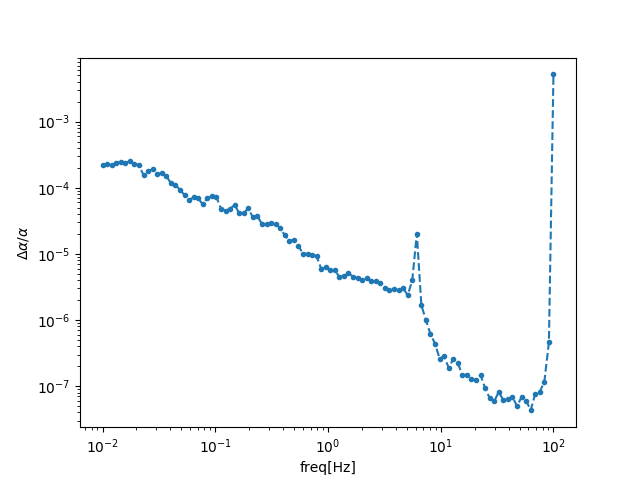

[Text(0, 0.5, '$\\Delta\\alpha$/$\\alpha$'), Text(0.5, 0, 'freq[Hz]')]

In [19]:
_, ax = plt.subplots()
ax.loglog(alphas_freq, limit, '.--')
# ax.loglog(alphas_freq2, limit2, '.--').
ax.set(xlabel='freq[Hz]', ylabel=r'$\Delta\alpha$/$\alpha$')

In [15]:
limits_delta_alpha = 2*np.array(limit)/2 # 2 sigma of delta_alpha over 2 -> because the force is the delta alpha square
mass_ev = alphas_freq/2e14
rho_dm = 0.4*(1.98e-14)**3*(1e9)**4

In [16]:
ge_lim = limits_delta_alpha*mass_ev/np.sqrt(2*rho_dm)
const = 2.4e18*1e9/np.sqrt(2)

<IPython.core.display.Javascript object>


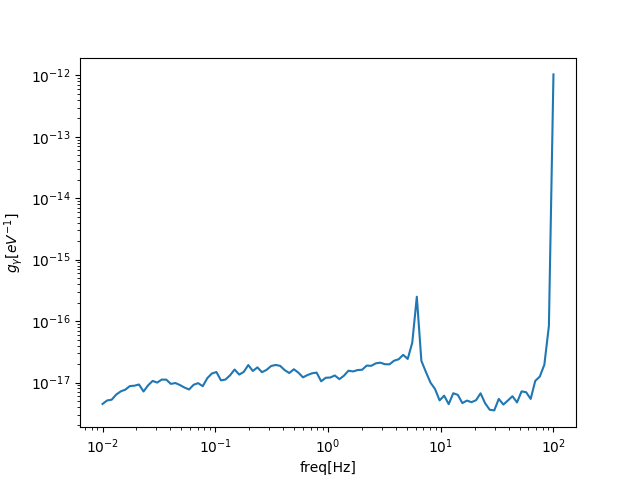

[Text(0, 0.5, '$g_{\\gamma} [eV^{-1}]$'), Text(0.5, 0, 'freq[Hz]')]

In [26]:
_,ax = plt.subplots()
ax.loglog(alphas_freq, ge_lim)
ax.set(xlabel='freq[Hz]', ylabel=r'$g_{\gamma} [eV^{-1}]$')
# ax.loglog(alphas_freq2, ge_lim2)

<IPython.core.display.Javascript object>


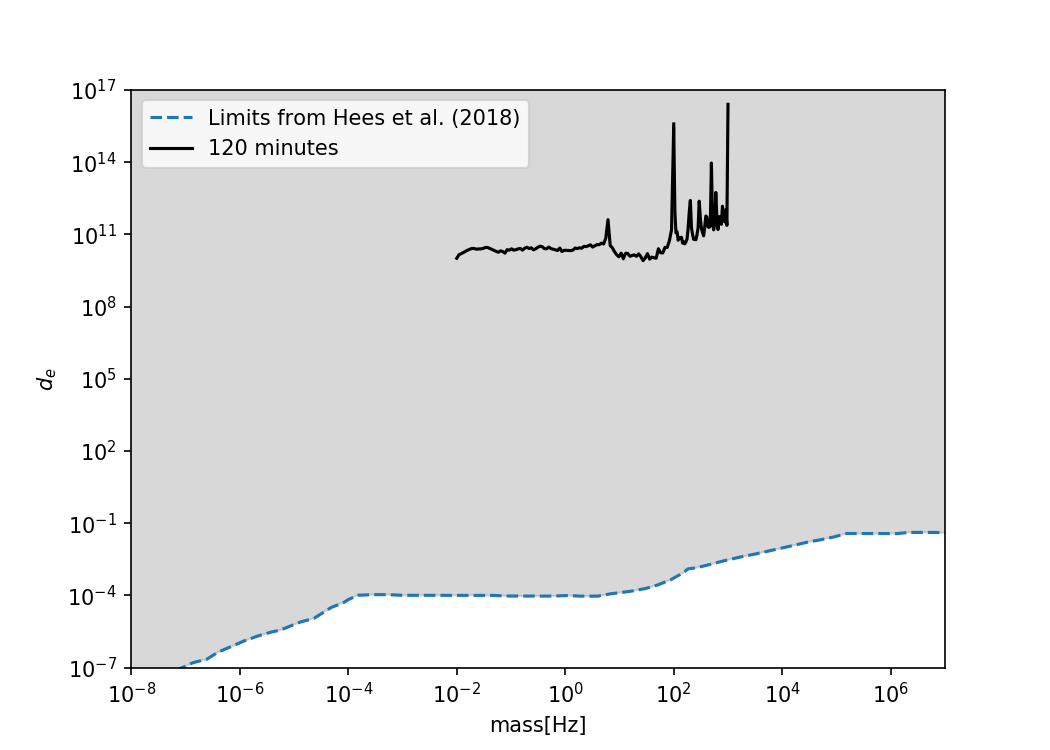

In [232]:
_, ax = plt.subplots(figsize=(7,5))
xs, ys = 10**limit_Hees[::2], 10**limit_Hees[1::2]
d = scipy.zeros(len(ys))+1e17
ax.loglog(xs,ys, '--', label='Limits from Hees et al. (2018)')
ax.fill_between(xs, ys, d, interpolate=True, color='gray', alpha=0.3)
ax.loglog(alphas_freq, ge_lim*const, color='black', label='120 minutes')
ax.loglog(alphas_freq2, ge_lim2*const, color='black')
ax.set(xlabel='mass[Hz]', ylabel='$d_{e}$', ylim=(1e-7,1e17), xlim=(1e-8,1e7))
ax.legend()

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


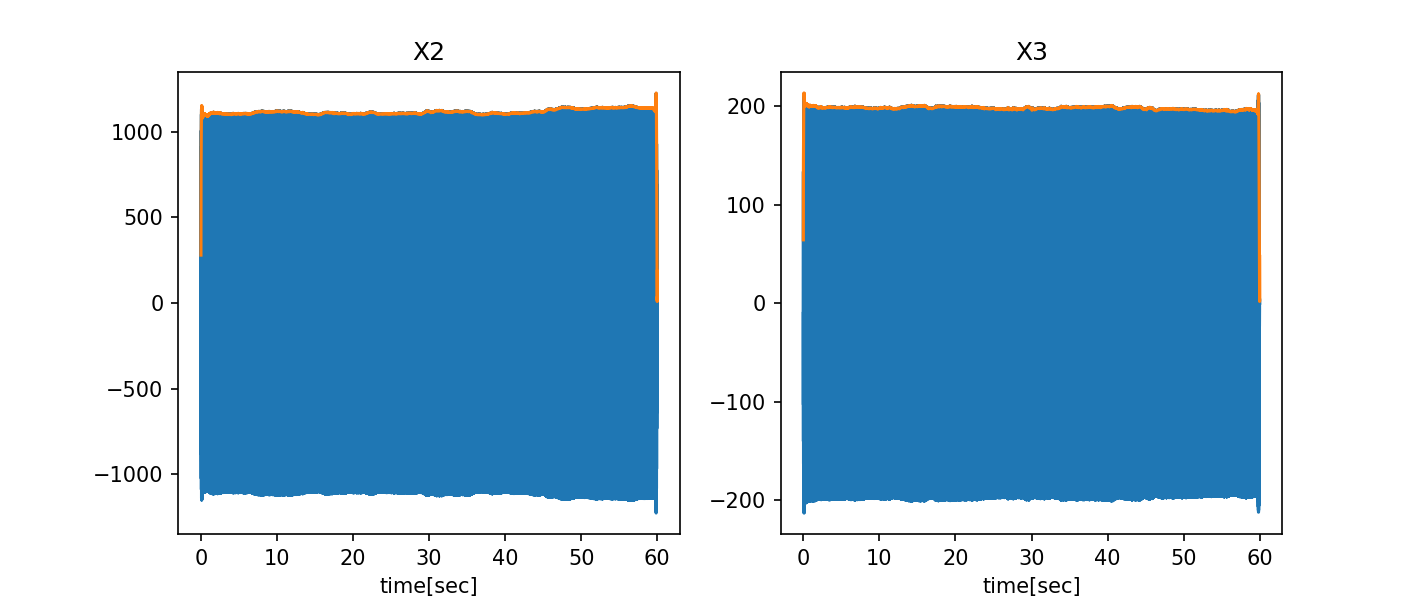

In [61]:
DManalyzer.plot_dataset(bdf_i=30,frequency=153)

<IPython.core.display.Javascript object>


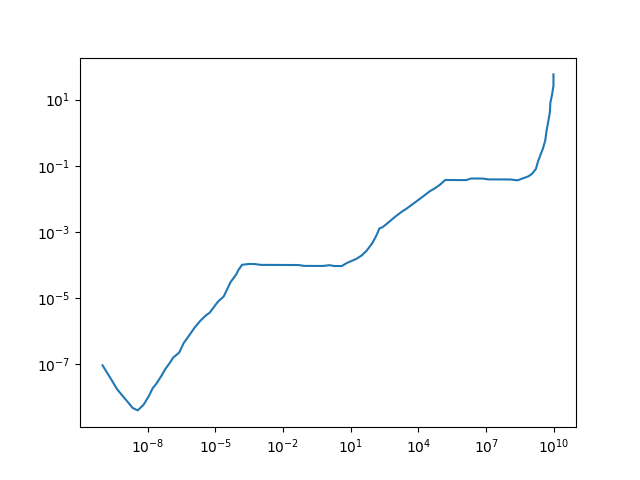

In [147]:
_,ax = plt.subplots()
ax.loglog(10**limit_Hees[::2], 10**limit_Hees[1::2])

In [144]:
limit_Hees = np.array([-10.000000000000002, -7.038961038961039,
-9.61904761904762, -7.459889904334348,
-9.35930735930736, -7.756987868098976,
-9.151515151515152, -7.930468708246487,
-8.874458874458876, -8.15354604243493,
-8.666666666666668, -8.327026882582437,
-8.441558441558442, -8.401795735129069,
-8.181818181818183, -8.22975789642456,
-7.93939393939394, -7.958901181123403,
-7.783549783549784, -7.737159959382181,
-7.610389610389611, -7.5895462562129214,
-7.4025974025974035, -7.3679653679653665,
-7.212121212121213, -7.146331035219923,
-7.004329004329005, -6.9494415049970595,
-6.865800865800867, -6.801720912832023,
-6.606060606060606, -6.654374432152208,
-6.3982683982683985, -6.3587194698305805,
-6.190476190476191, -6.161829939607717,
-5.913419913419913, -5.891080113302335,
-5.670995670995671, -5.694297472075249,
-5.411255411255411, -5.522259633370744,
-5.255411255411255, -5.448666559777671,
-5.012987012987012, -5.227192560525893,
-4.874458874458874, -5.1041633263855495,
-4.632034632034631, -4.956763401207844,
-4.476190476190476, -4.735022179466622,
-4.320346320346319, -4.513280957725401,
-4.077922077922078, -4.291806958473623,
-3.99134199134199, -4.1686173908396125,
-3.8181818181818166, -3.9963123296456624,
-3.523809523809522, -3.972529528085083,
-3.2640692640692635, -3.973331195553417,
-3.004329004329003, -3.9988242210464433,
-2.7965367965367953, -3.9994655550211107,
-2.4848484848484826, -4.000427555983111,
-2.1385281385281374, -4.00149644594089,
-1.8787878787878771, -4.002298113409224,
-1.5844155844155825, -4.003206669873336,
-1.3246753246753222, -4.00400833734167,
-1.064935064935062, -4.029501362834696,
-0.7878787878787854, -4.030356474800919,
-0.49350649350649256, -4.031265031265031,
-0.2337662337662305, -4.032066698733365,
0.06060606060606233, -4.008283897172785,
0.2683982683982702, -4.033616589172144,
0.5974025974026009, -4.034632034632034,
0.8398268398268431, -3.9366148255037148,
1.0129870129870149, -3.8877665544332194,
1.2554112554112589, -3.8144407033295913,
1.480519480519483, -3.7163700497033823,
1.705627705627709, -3.5689166800277903,
1.948051948051953, -3.3474426807760134,
2.0865800865800903, -3.1750307305862853,
2.2077922077922114, -3.0025653358986677,
2.259740259740264, -2.9039602372935693,
2.4155844155844175, -2.855058521725188,
2.640692640692645, -2.7322965100742866,
2.935064935064938, -2.5603655603655593,
3.264069264069269, -2.38854149965261,
3.489177489177493, -2.290470846026402,
3.731601731601735, -2.167762278873389,
3.974025974025979, -2.045053711720378,
4.21645021645022, -1.922345144567366,
4.493506493506498, -1.7750521083854398,
4.683982683982691, -1.701565923788145,
4.94372294372295, -1.5789108011330226,
5.186147186147192, -1.4315108759553192,
5.619047619047624, -1.4328469884025425,
5.982683982683991, -1.4339693228582107,
6.121212121212128, -1.434396878841322,
6.329004329004334, -1.3856554967666073,
6.606060606060609, -1.3865106087328307,
6.8311688311688386, -1.3872053872053867,
7.108225108225113, -1.4127518571963007,
7.47186147186148, -1.4138741916519688,
7.783549783549791, -1.4148361926139703,
8.077922077922086, -1.4157447490780815,
8.389610389610397, -1.4413981080647735,
8.874458874458881, -1.319437763882208,
9.030303030303038, -1.2458446902891334,
9.203463203463212, -1.0982309871198757,
9.307359307359313, -0.851638073860296,
9.515151515151523, -0.48190903746459224,
9.619047619047624, -0.2353161242050117,
9.67099567099568, 0.036128480572925614,
9.757575757575761, 0.35684891240446825,
9.826839826839837, 0.6282400726845179,
9.84415584415585, 0.8997915664582341,
9.913419913419922, 1.1218000106889003,
9.98268398268399, 1.417882528993641,
9.98268398268399, 1.7635615413393202])